# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

# Data Loading and analysis

In [139]:
train=pd.read_csv("train6.csv")
test=pd.read_csv("test6.csv")

In [3]:
train.head()

id  gender   area qualification         income  marital_status  vintage  \
0   1    Male  Urban      Bachelor         5L-10L               1        5   
1   2    Male  Rural   High School         5L-10L               0        8   
2   3    Male  Urban      Bachelor         5L-10L               1        8   
3   4  Female  Rural   High School         5L-10L               0        7   
4   5    Male  Urban   High School  More than 10L               1        6   

   claim_amount num_policies policy type_of_policy    cltv  
0          5790  More than 1      A       Platinum   64308  
1          5080  More than 1      A       Platinum  515400  
2          2599  More than 1      A       Platinum   64212  
3             0  More than 1      A       Platinum   97920  
4          3508  More than 1      A           Gold   59736

In [4]:
test.head()

id  gender   area qualification         income  marital_status  vintage  \
0  89393  Female  Rural   High School         5L-10L               0        6   
1  89394  Female  Urban   High School          2L-5L               0        4   
2  89395    Male  Rural   High School         5L-10L               1        7   
3  89396  Female  Rural      Bachelor  More than 10L               1        2   
4  89397  Female  Urban   High School          2L-5L               0        5   

   claim_amount num_policies policy type_of_policy  
0          2134  More than 1      B         Silver  
1          4102  More than 1      A       Platinum  
2          2925  More than 1      B           Gold  
3             0  More than 1      B         Silver  
4         14059  More than 1      B         Silver

In [5]:
train.isna().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

# EDA Analysis

In [6]:
train.dtypes

id                 int64
gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
cltv               int64
dtype: object

In [7]:
train.describe()

id  marital_status       vintage  claim_amount           cltv
count  89392.000000    89392.000000  89392.000000  89392.000000   89392.000000
mean   44696.500000        0.575488      4.595669   4351.502416   97952.828978
std    25805.391969        0.494272      2.290446   3262.359775   90613.814793
min        1.000000        0.000000      0.000000      0.000000   24828.000000
25%    22348.750000        0.000000      3.000000   2406.000000   52836.000000
50%    44696.500000        1.000000      5.000000   4089.000000   66396.000000
75%    67044.250000        1.000000      6.000000   6094.000000  103440.000000
max    89392.000000        1.000000      8.000000  31894.000000  724068.000000

In [8]:
train.nunique()

id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

In [140]:
obj_col = train.select_dtypes(include=['object']).columns

obj_col=obj_col.append((pd.Index(["marital_status"])))
for obj in obj_col:
    train[obj] = train[obj].astype('category')
obj_col

Index(['gender', 'area', 'qualification', 'income', 'num_policies', 'policy',
       'type_of_policy', 'marital_status'],
      dtype='object')

In [141]:
obj_col = test.select_dtypes(include=['object']).columns

obj_col=obj_col.append((pd.Index(["marital_status"])))
for obj in obj_col:
    test[obj] = test[obj].astype('category')
obj_col

Index(['gender', 'area', 'qualification', 'income', 'num_policies', 'policy',
       'type_of_policy', 'marital_status'],
      dtype='object')

In [142]:
train.dtypes

id                   int64
gender            category
area              category
qualification     category
income            category
marital_status    category
vintage              int64
claim_amount         int64
num_policies      category
policy            category
type_of_policy    category
cltv                 int64
dtype: object

In [143]:
con_col = train.select_dtypes(include=['int64', 'float64'])
con_col = con_col.drop(['id','cltv'], axis=1)
con_col


vintage  claim_amount
0            5          5790
1            8          5080
2            8          2599
3            7             0
4            6          3508
...        ...           ...
89387        6             0
89388        0          3897
89389        4          3363
89390        8             0
89391        6             0

[89392 rows x 2 columns]

Univariate Analysis

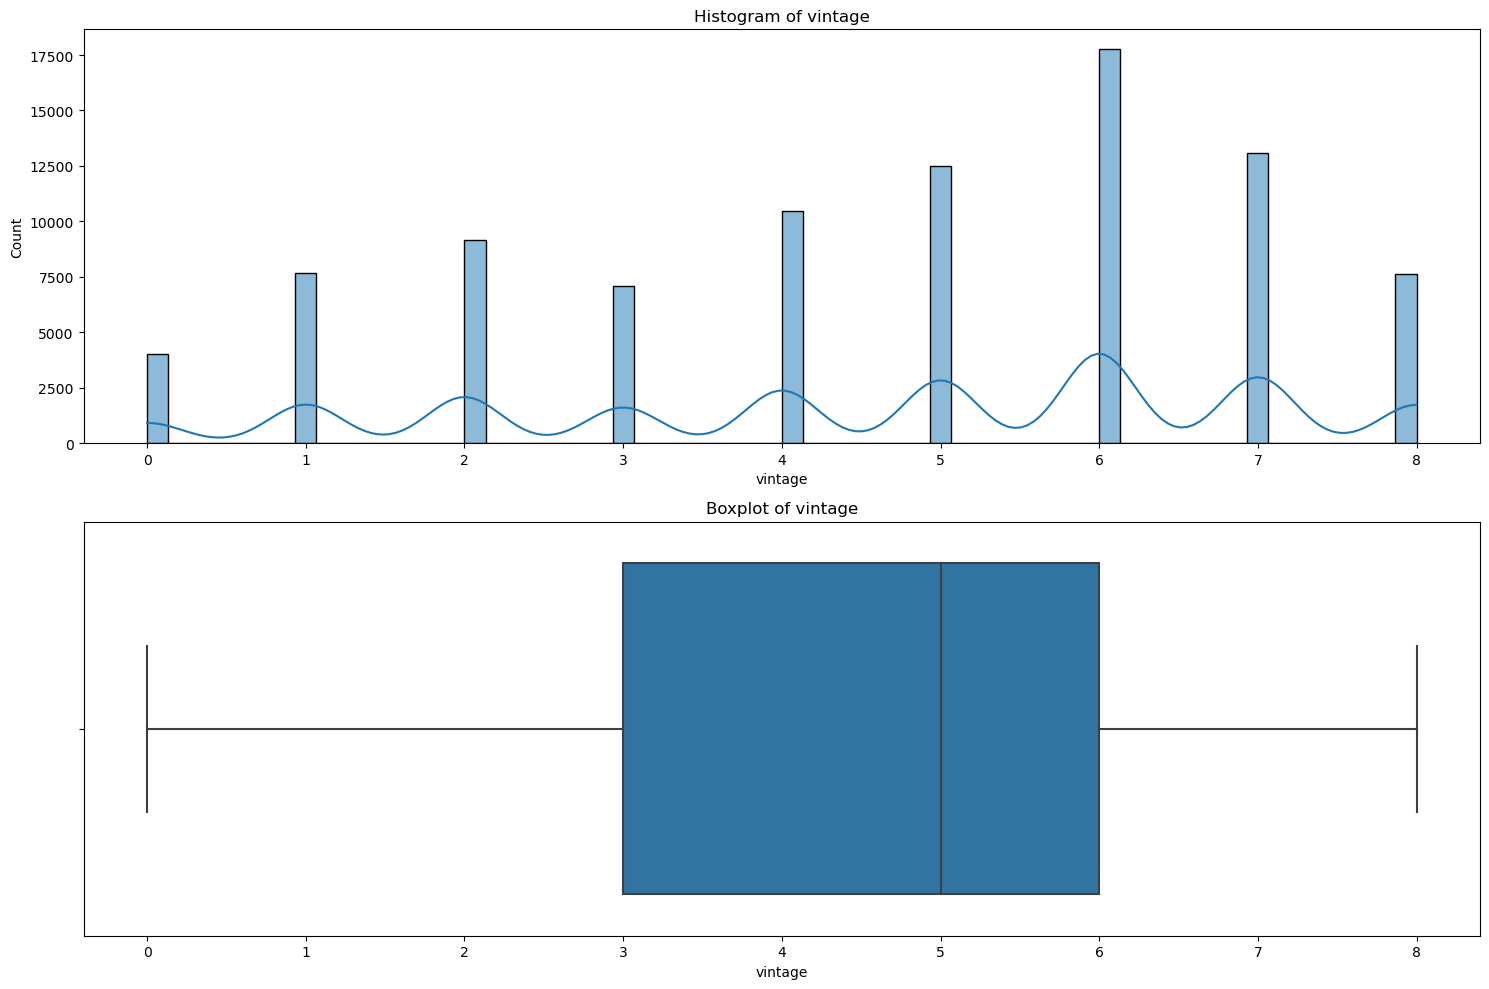

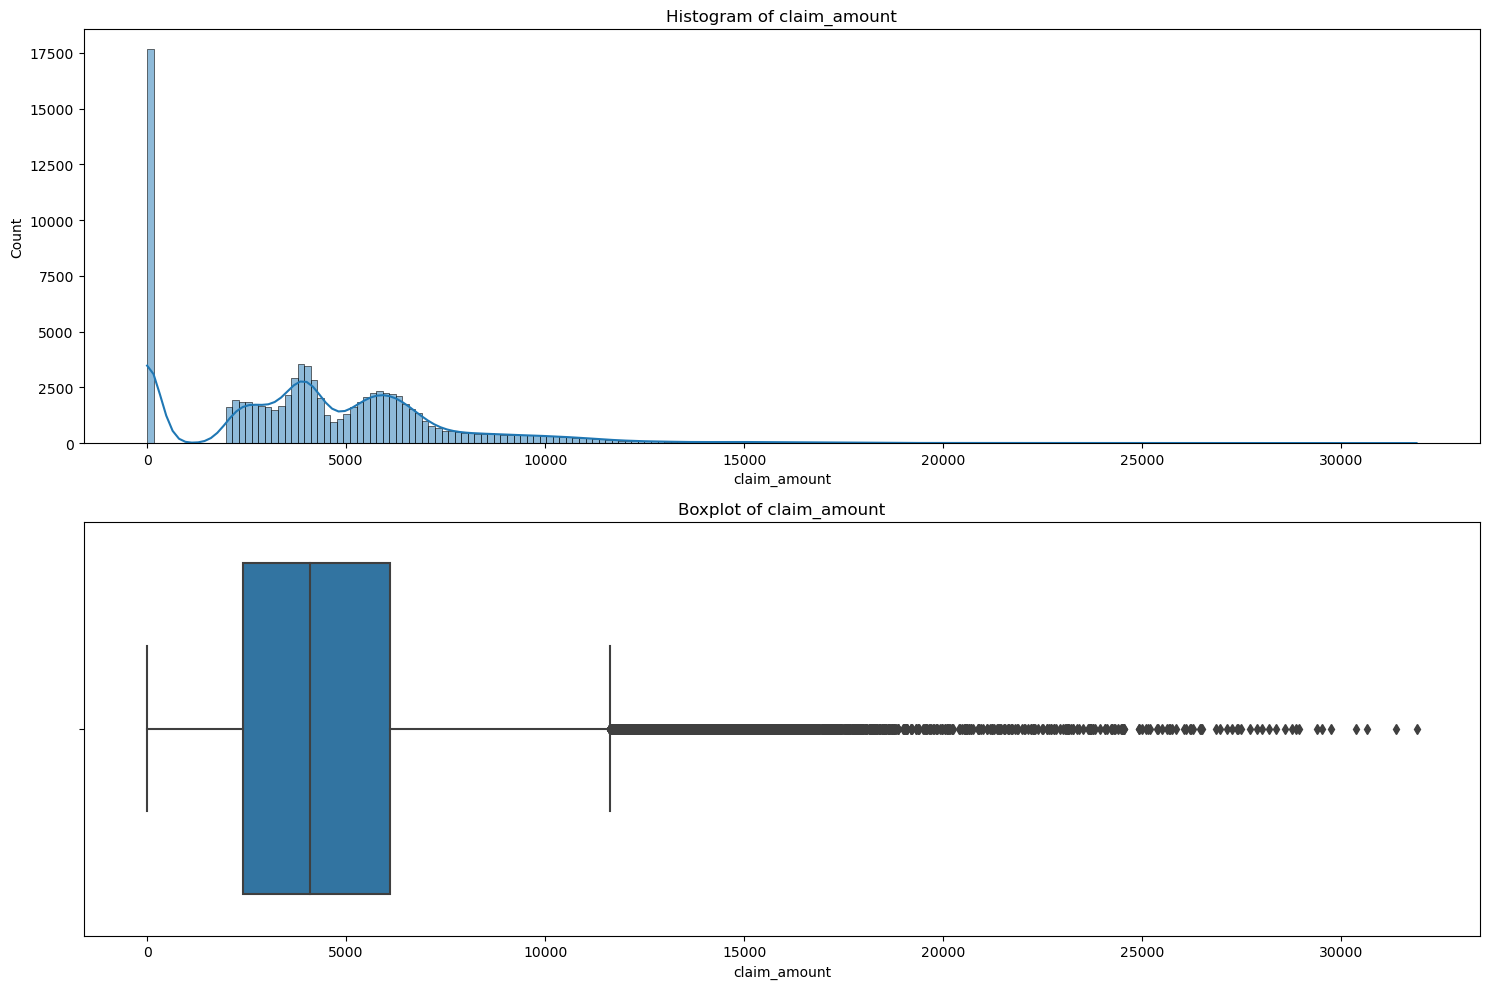

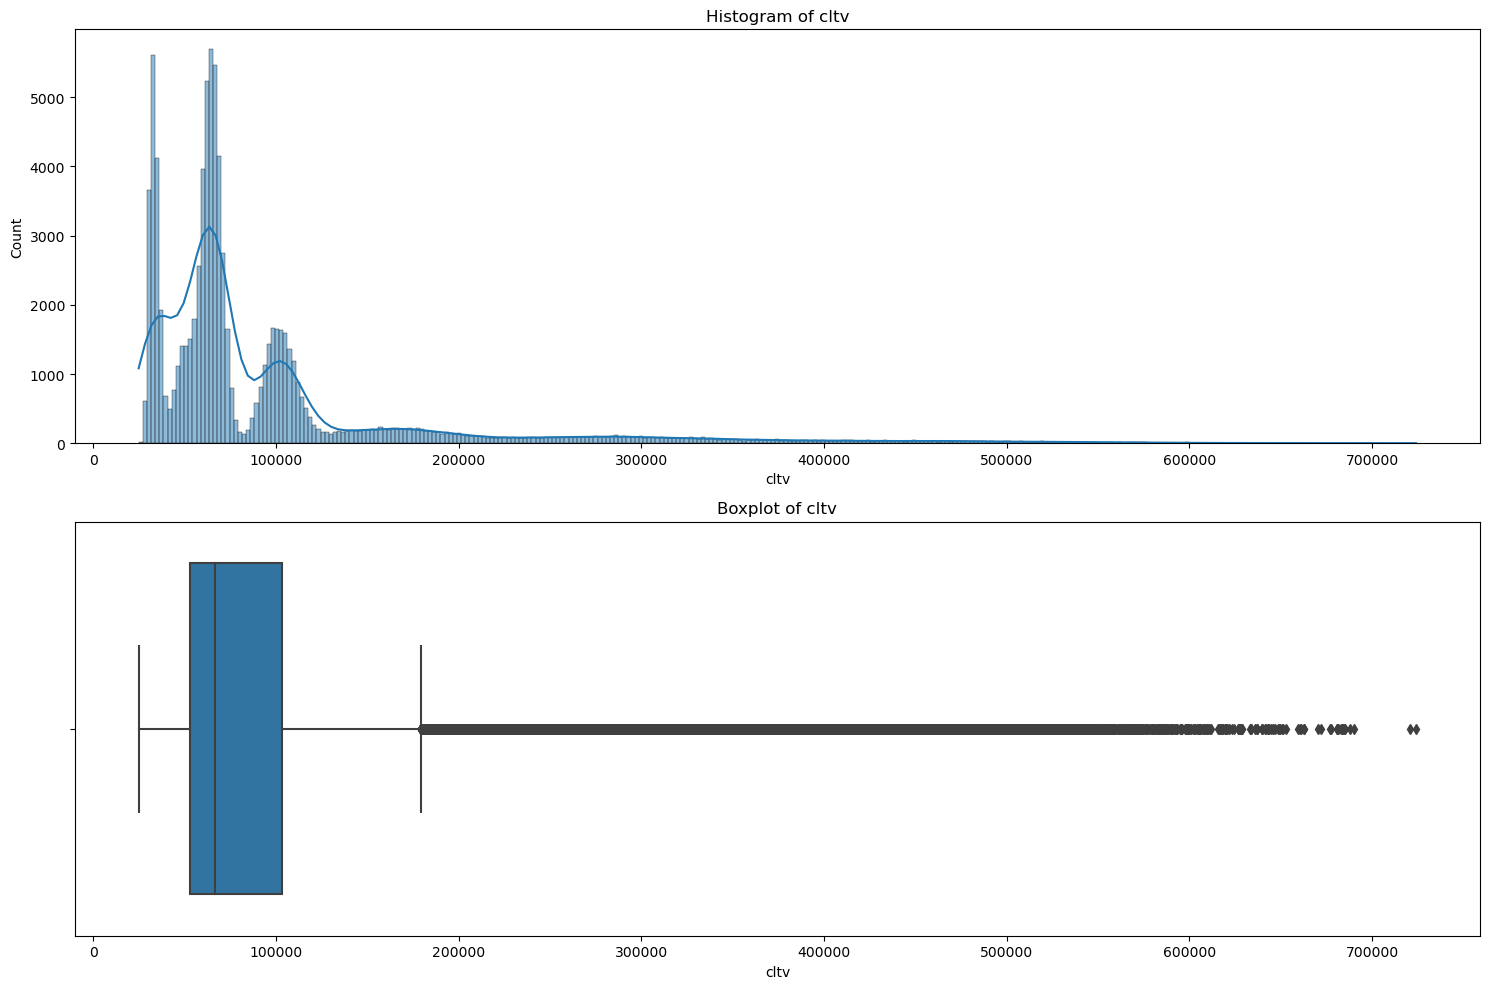

In [77]:
for con in con_col:
    fig, axes = plt.subplots(2,1,figsize=(15,10))  # Create subplots for histogram and boxplot

        # Plot histogram
    sns.histplot(data=train,x=con, ax=axes[0],kde=True)
    axes[0].set_title('Histogram of ' + con)

        # Plot boxplot
    sns.boxplot(data=train, x=con, ax=axes[1])
    axes[1].set_title('Boxplot of ' + con)
    plt.tight_layout()  # Adjust layout to avoid overlapping plots
    plt.show()

1


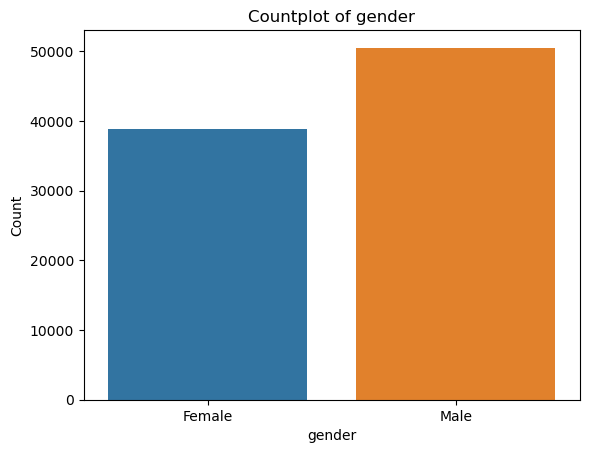

1


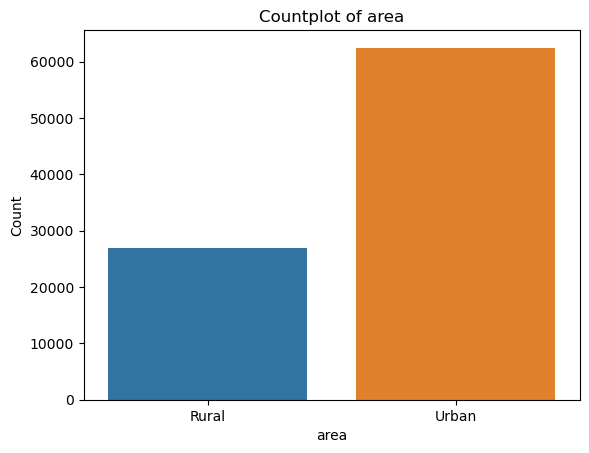

1


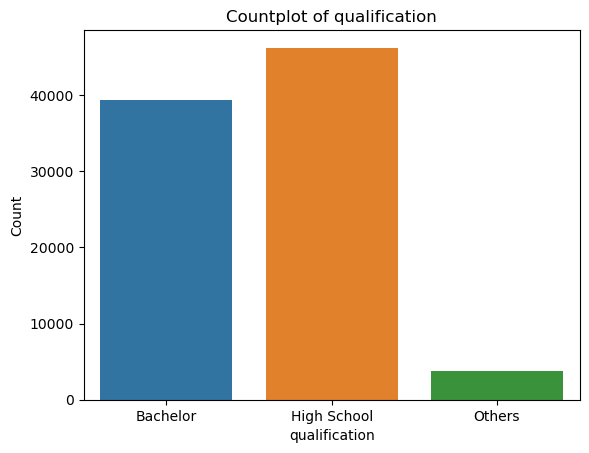

1


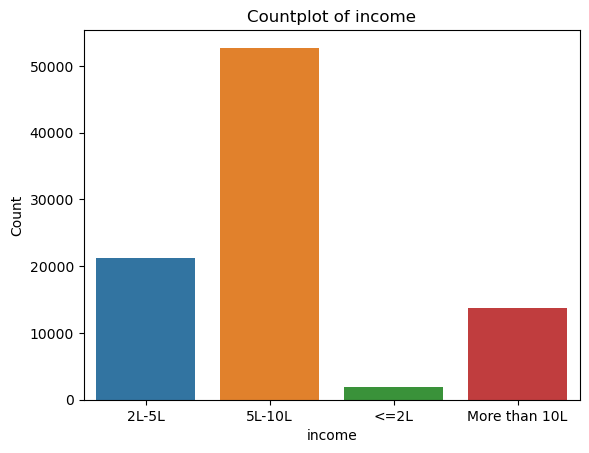

1


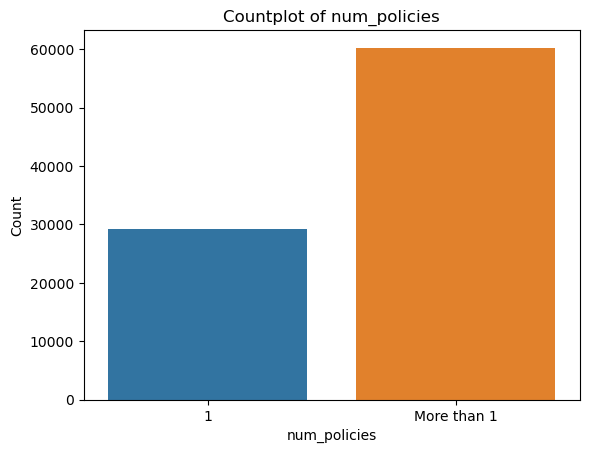

1


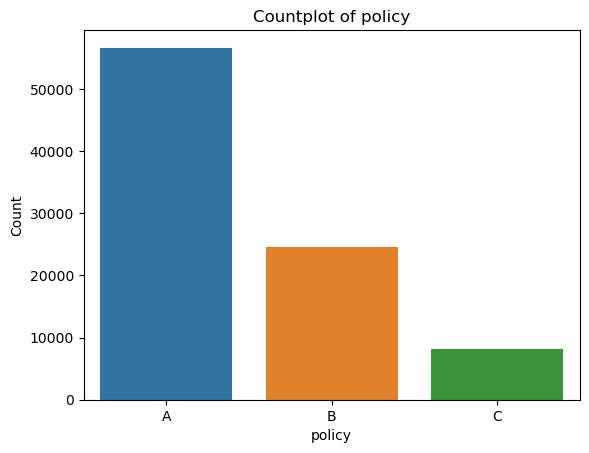

1


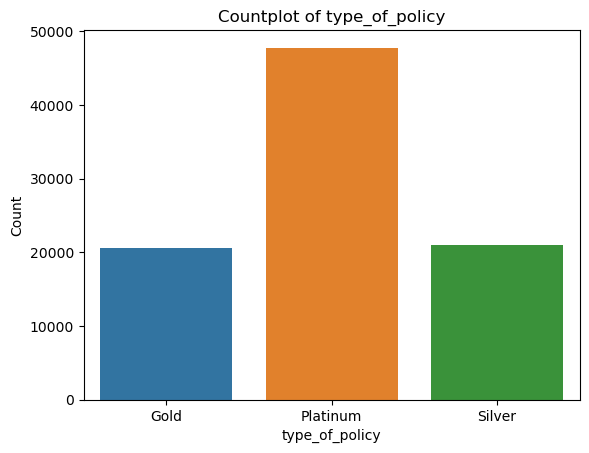

1


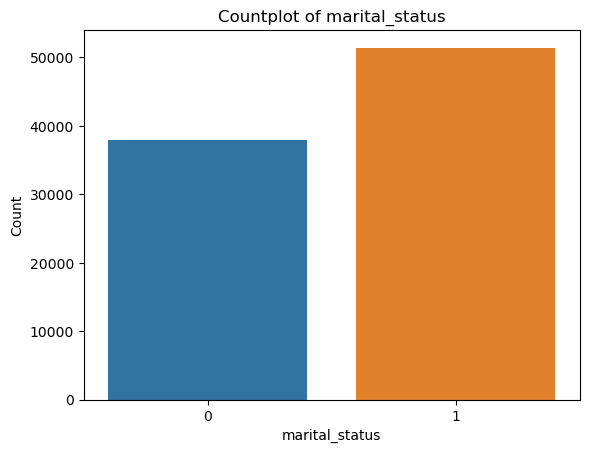

In [71]:
for cat in obj_col:
    fig, axes = plt.subplots(1,1)
    print(1)
    sns.countplot(train,x=cat)
    plt.xlabel(cat)
    plt.ylabel('Count')
    plt.title('Countplot of '+cat)
    plt.show()


Bivariate analysis

In [78]:
train.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [100]:
def bva(train,obj_col):
    for cat  in obj_col:
        plt.figure(figsize=(10, 4)) 
        sns.barplot(data=train, x=cat, y='cltv')
        plt.xlabel(cat)
        plt.ylabel('Customer Lifetime Value')
        plt.title('Bar Plot of target variable vs '+cat)
        plt.show()

        # Violin Plot
        plt.figure(figsize=(10, 4))  
        sns.violinplot(data=train, x=cat, y='cltv')
        plt.xlabel(cat)
        plt.ylabel('Customer Lifetime Value')
        plt.title('Violin Plot of target variable vs '+cat)
        plt.show()
      

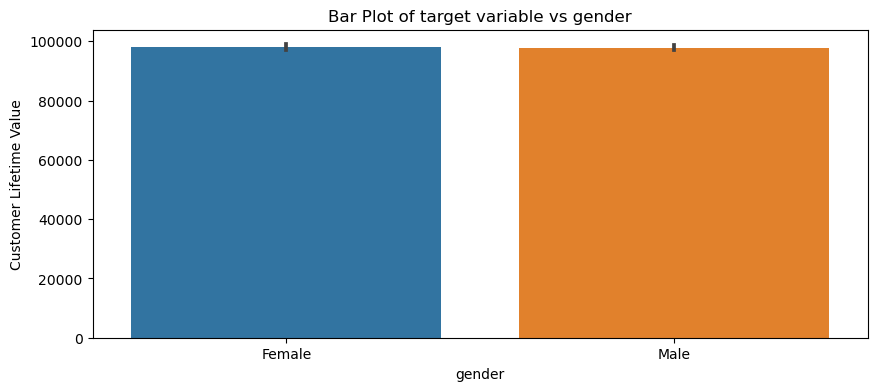

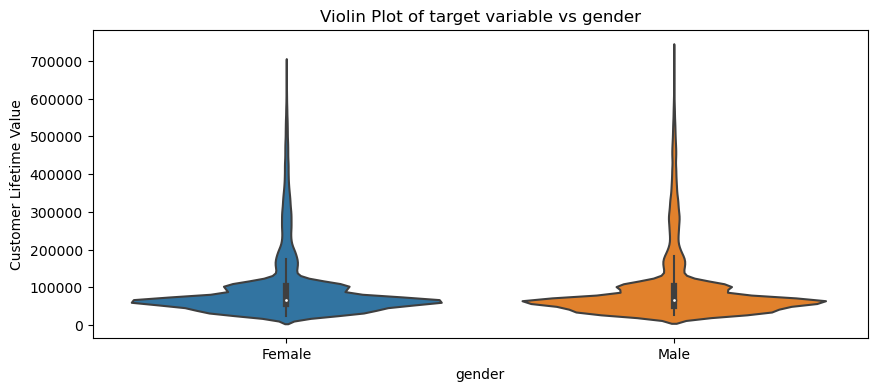

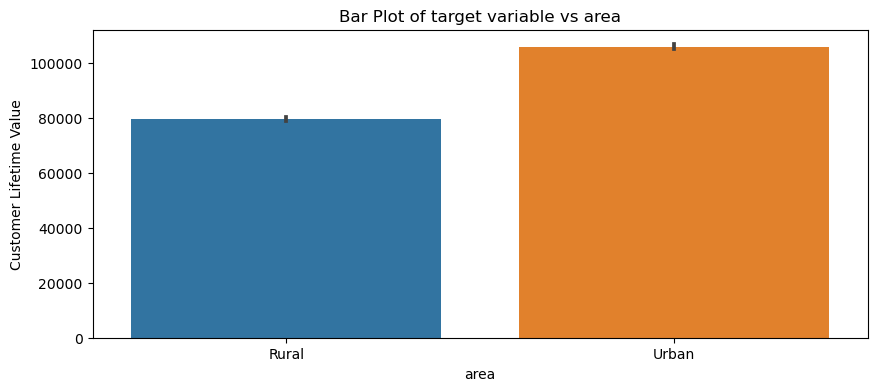

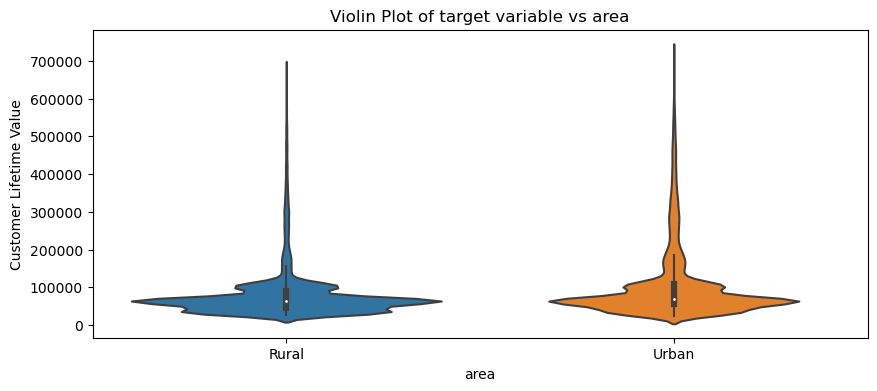

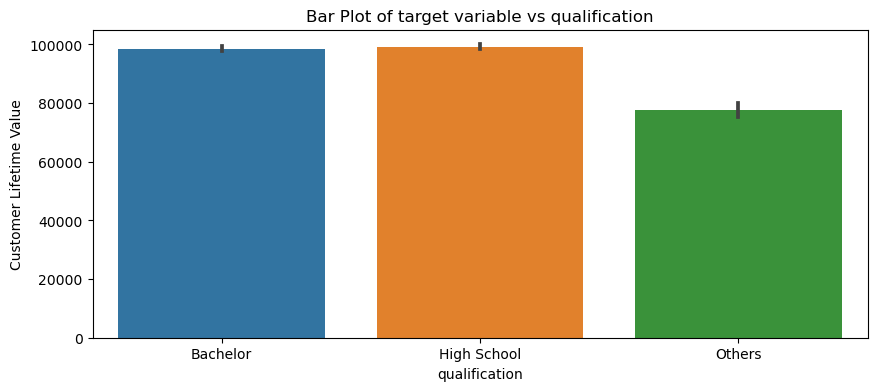

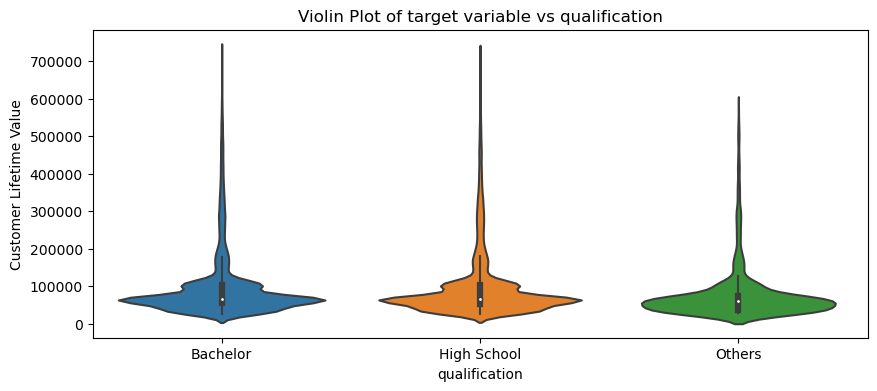

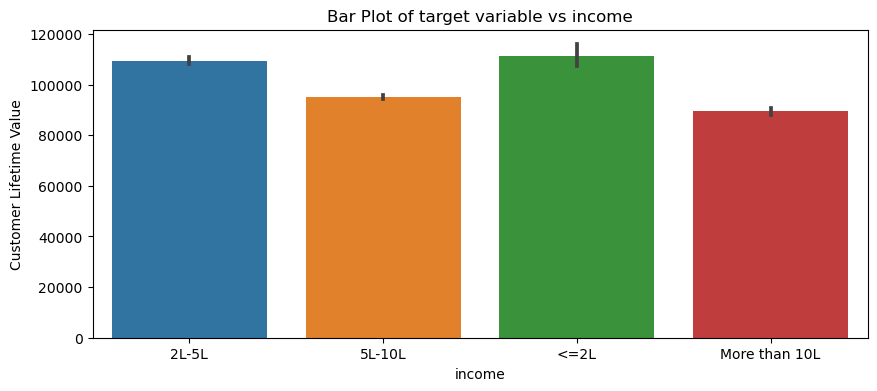

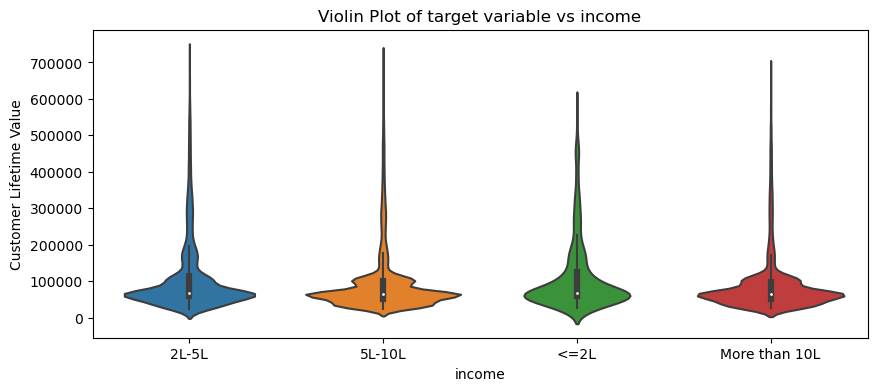

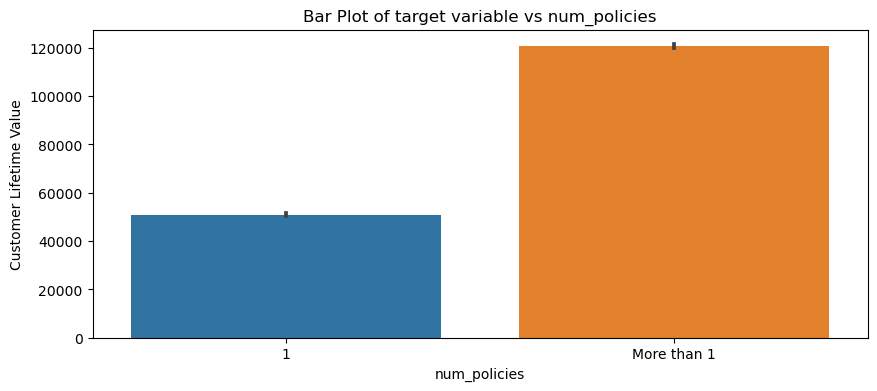

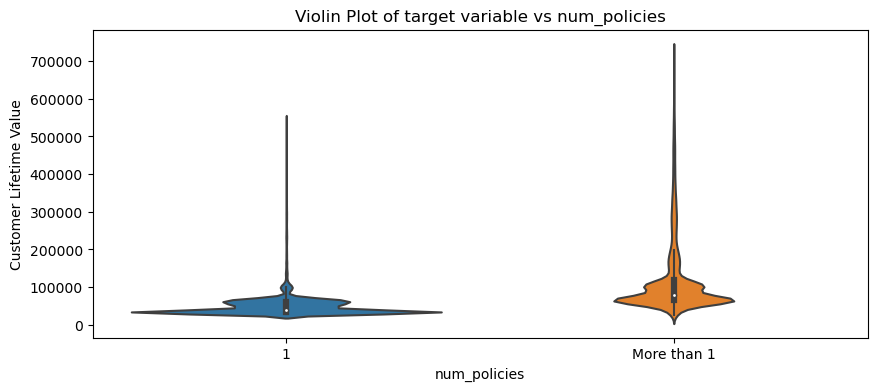

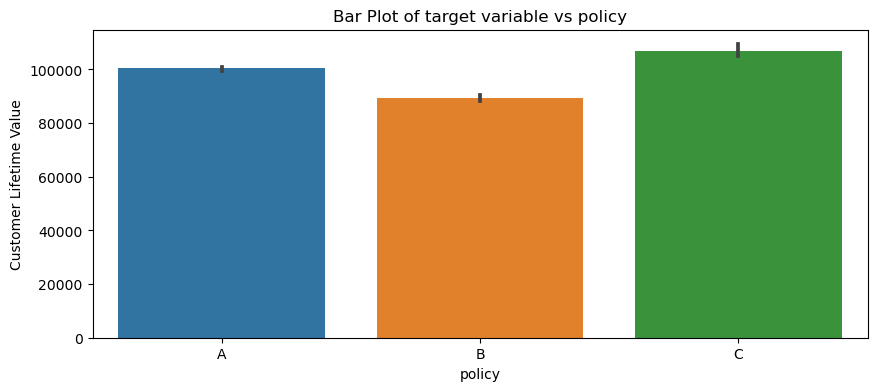

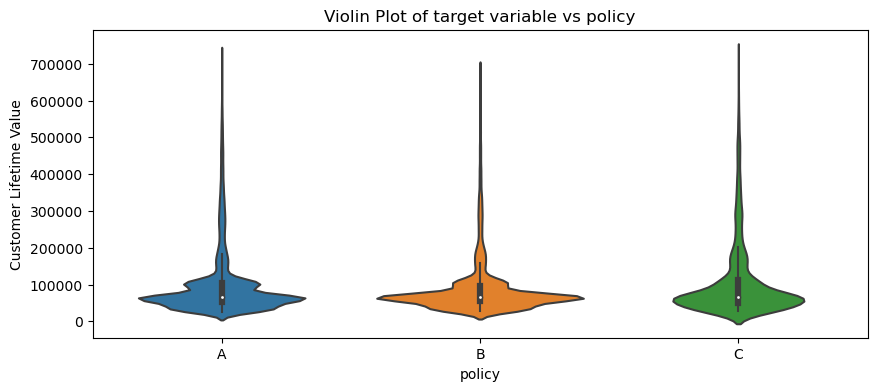

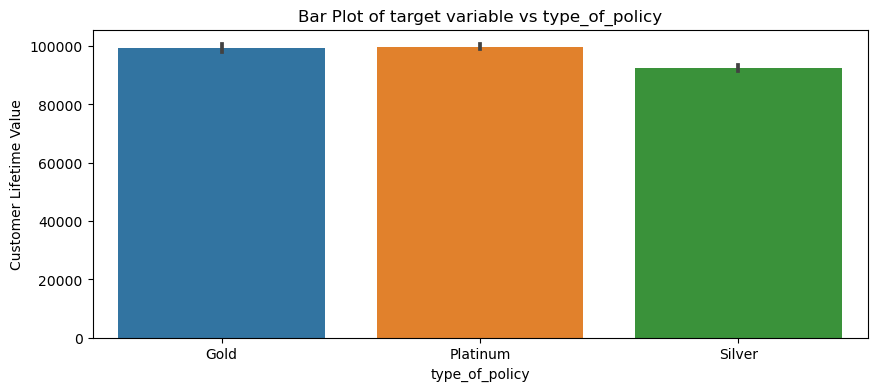

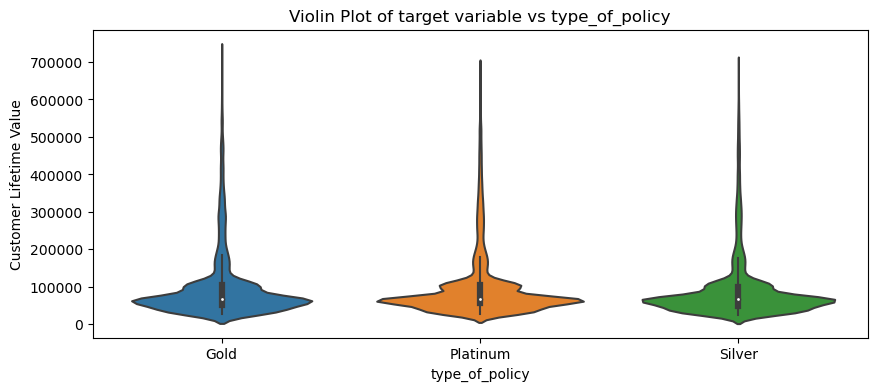

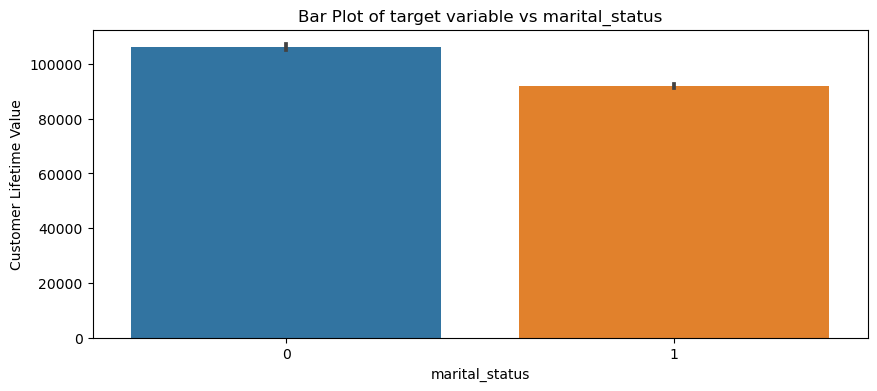

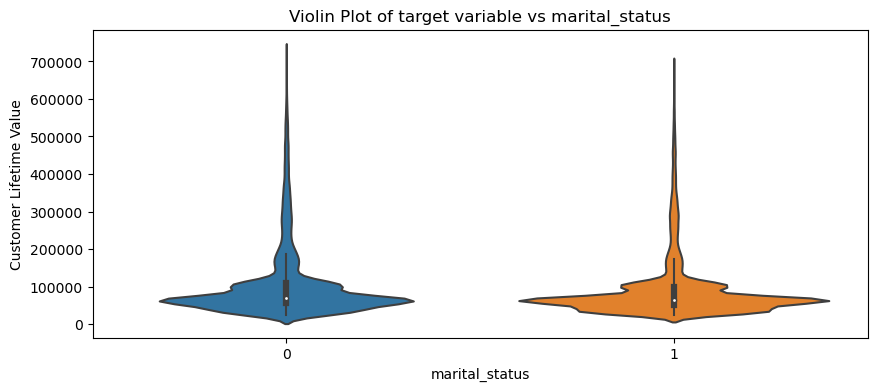

In [101]:
bva(train,obj_col)

In [114]:
def bva_c(train,con_col):
    for con in con_col:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=train, x=con, y='cltv')
        plt.xlabel(con)
        plt.ylabel('Customer Lifetime Value')
        plt.title('Line Plot of target vs'+con)
        plt.show()

        

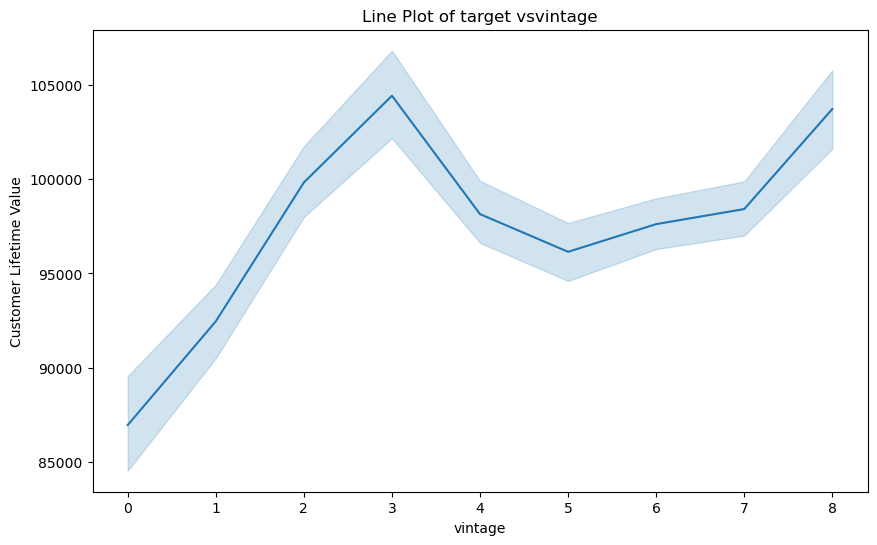

In [ ]:
bva_c(train,con_col)

In [116]:
Rural low 
other qual low
no of policies=1 low
policy type b low
martial status 1 high
vintage 3 high


vintage  claim_amount    cltv
0            5          5790   64308
1            8          5080  515400
2            8          2599   64212
3            7             0   97920
4            6          3508   59736
...        ...           ...     ...
89387        6             0   95736
89388        0          3897   67596
89389        4          3363  114120
89390        8             0   71772
89391        6             0  108144

[89392 rows x 3 columns]

In [14]:
train.nunique()

id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

Multivariate Analysis

In [24]:
table1=train.pivot_table('cltv', ['area', 'qualification'], 'num_policies', aggfunc='mean')
total1 = table1.sum().sum()
table1_percentage = (table1 / total1) * 100

# Display the pivot table with mean percentage
print(table1_percentage)

num_policies                1  More than 1
area  qualification                       
Rural Bachelor       5.251284    10.433749
      High School    5.151604    10.489096
      Others         4.920265     9.685998
Urban Bachelor       5.462023    13.253306
      High School    5.320653    13.374522
      Others         5.023014    11.634485


In [28]:
table2=train.pivot_table('cltv', ['type_of_policy','income'], 'marital_status', aggfunc='mean')
total2 = table2.sum().sum()
table2_percentage = (table2/ total2) * 100

# Display the pivot table with mean percentage
print(table2_percentage)

marital_status                       0         1
type_of_policy income                           
Gold           2L-5L          4.788521  4.311140
               5L-10L         4.356446  3.797687
               <=2L           5.100031  3.989504
               More than 10L  3.956867  3.479875
Platinum       2L-5L          4.953042  4.351551
               5L-10L         4.300049  3.734125
               <=2L           4.663912  4.592918
               More than 10L  4.037415  3.455463
Silver         2L-5L          4.547496  3.891605
               5L-10L         3.931881  3.424639
               <=2L           4.583907  4.507813
               More than 10L  3.962025  3.282087


From EDA Analysis we understand Other Qualification customers have lesser customer lifetime value and people with Income more
than 10 lakhs too have lesser cltv. IN particular case customers with gold and silver policies and marriaged people have lesser
cltv no matter how much income they get

# Encoding

In [144]:
encoded_cols = ['gender', 'area','policy','num_policies']
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
onehot_encoded = onehot_encoder.fit_transform(train[encoded_cols])

onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(encoded_cols))

train_encoded = pd.concat([train.drop(encoded_cols, axis=1), onehot_df], axis=1)

In [145]:
encoded_cols = ['gender', 'area','policy','num_policies']
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
onehot_encoded = onehot_encoder.fit_transform(test[encoded_cols])

onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(encoded_cols))

test_encoded = pd.concat([test.drop(encoded_cols, axis=1), onehot_df], axis=1)

In [146]:

manual_qual = ['High School', 'Bachelor', 'Others']
manual_income=["<=2L","2L-5L","5L-10L","More than 10L"]
manual_policy=['Silver','Gold','Platinum']
# Option 1: Using map() function
label_mapping = {category: label for label, category in enumerate(manual_qual)}
label_mapping1 = {category: label for label, category in enumerate(manual_income)}
label_mapping2 = {category: label for label, category in enumerate(manual_policy)}

train_encoded['qualification'] =train_encoded['qualification'].map(label_mapping)
train_encoded['income'] =train_encoded['income'].map(label_mapping1)
train_encoded['type_of_policy'] =train_encoded['type_of_policy'].map(label_mapping2)
# Display the updated DataFrame with the encoded labels
print(train_encoded[['qualification','income','type_of_policy']])

      qualification income type_of_policy
0                 1      2              2
1                 0      2              2
2                 1      2              2
3                 0      2              2
4                 0      3              1
...             ...    ...            ...
89387             0      3              2
89388             1      2              2
89389             1      2              2
89390             0      1              2
89391             0      2              1

[89392 rows x 3 columns]


In [147]:

test_encoded['qualification'] =test_encoded['qualification'].map(label_mapping)
test_encoded['income'] =test_encoded['income'].map(label_mapping1)
test_encoded['type_of_policy'] =test_encoded['type_of_policy'].map(label_mapping2)
# Display the updated DataFrame with the encoded labels
print(test_encoded[['qualification','income','type_of_policy']])

      qualification income type_of_policy
0                 0      2              0
1                 0      1              2
2                 0      2              1
3                 1      3              0
4                 0      1              0
...             ...    ...            ...
59590             1      2              0
59591             0      2              1
59592             0      1              2
59593             1      2              0
59594             1      2              2

[59595 rows x 3 columns]


In [148]:
train_encoded.dtypes

id                             int64
qualification               category
income                      category
marital_status              category
vintage                        int64
claim_amount                   int64
type_of_policy              category
cltv                           int64
gender_Female                float64
gender_Male                  float64
area_Rural                   float64
area_Urban                   float64
policy_A                     float64
policy_B                     float64
policy_C                     float64
num_policies_1               float64
num_policies_More than 1     float64
dtype: object

In [149]:
test_encoded.dtypes

id                             int64
qualification               category
income                      category
marital_status              category
vintage                        int64
claim_amount                   int64
type_of_policy              category
gender_Female                float64
gender_Male                  float64
area_Rural                   float64
area_Urban                   float64
policy_A                     float64
policy_B                     float64
policy_C                     float64
num_policies_1               float64
num_policies_More than 1     float64
dtype: object

In [248]:
train_encoded.head()

id qualification income marital_status  vintage  claim_amount  \
0   1             1      2              1        5          5790   
1   2             0      2              0        8          5080   
2   3             1      2              1        8          2599   
3   4             0      2              0        7             0   
4   5             0      3              1        6          3508   

  type_of_policy    cltv  gender_Female  gender_Male  area_Rural  area_Urban  \
0              2   64308            0.0          1.0         0.0         1.0   
1              2  515400            0.0          1.0         1.0         0.0   
2              2   64212            0.0          1.0         0.0         1.0   
3              2   97920            1.0          0.0         1.0         0.0   
4              1   59736            0.0          1.0         0.0         1.0   

   policy_A  policy_B  policy_C  num_policies_1  num_policies_More than 1  
0       1.0       0.0       0.0             0.0                       1.0  
1       1.0       0.0       0.0             0.0                       1.0  
2       1.0       0.0       0.0             0.0                       1.0  
3       1.0       0.0       0.0             0.0                       1.0  
4       1.0       0.0       0.0             0.0                       1.0

In [14]:
test_encoded.head()

id  qualification  income  marital_status  vintage  claim_amount  \
0  89393              0       2               0        6          2134   
1  89394              0       1               0        4          4102   
2  89395              0       2               1        7          2925   
3  89396              1       3               1        2             0   
4  89397              0       1               0        5         14059   

   type_of_policy  gender_Female  gender_Male  area_Rural  area_Urban  \
0               0            1.0          0.0         1.0         0.0   
1               2            1.0          0.0         0.0         1.0   
2               1            0.0          1.0         1.0         0.0   
3               0            1.0          0.0         1.0         0.0   
4               0            1.0          0.0         0.0         1.0   

   policy_A  policy_B  policy_C  num_policies_1  num_policies_More than 1  
0       0.0       1.0       0.0             0.0                       1.0  
1       1.0       0.0       0.0             0.0                       1.0  
2       0.0       1.0       0.0             0.0                       1.0  
3       0.0       1.0       0.0             0.0                       1.0  
4       0.0       1.0       0.0             0.0                       1.0

# Base Model

In [150]:

x = train_encoded.drop('cltv', axis=1)
y = train_encoded['cltv']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [152]:
X_train.dtypes

id                             int64
qualification               category
income                      category
marital_status              category
vintage                        int64
claim_amount                   int64
type_of_policy              category
gender_Female                float64
gender_Male                  float64
area_Rural                   float64
area_Urban                   float64
policy_A                     float64
policy_B                     float64
policy_C                     float64
num_policies_1               float64
num_policies_More than 1     float64
dtype: object

In [27]:

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test data
ylr_pred = lr.predict(X_test)

# Calculate the mean squared error
r2_lr =r2_score(y_test, ylr_pred)
r2_lr

0.1516052702405608

In [28]:
lrtrain_pred =lr.predict(X_train)
lr_trainr2=r2_score(y_train,lrtrain_pred)
lr_trainr2

0.15159756181996098

In [29]:
lr_prediction=lr.predict(test_encoded)
lr_prediction

array([102921.5044356 , 129084.02324286, 101542.22131337, ...,
       110791.03489959, 114673.79351134, 113895.30892912])

In [30]:
df1 = pd.DataFrame(test["id"])
df2 = pd.DataFrame(lr_prediction,columns=['cltv'])
final=pd.concat([df1,df2],axis=1)
final.head()

id           cltv
0  89393  102921.504436
1  89394  129084.023243
2  89395  101542.221313
3  89396   85017.845278
4  89397  144747.412977

In [94]:
final.to_csv('base_lr.csv',index=False)

# Random Forest

In [38]:

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
yrf_pred=rf.predict(X_test)
r2_rf=r2_score(y_test,yrf_pred)
r2_rf

0.08766890588931242

In [34]:
rftrain_pred =rf.predict(X_train)
rf_trainr2=r2_score(y_train,rftrain_pred)
rf_trainr2

0.8720025354025334

# Feature Engineering(PCA)

In [35]:
pca=PCA().fit(X_train)

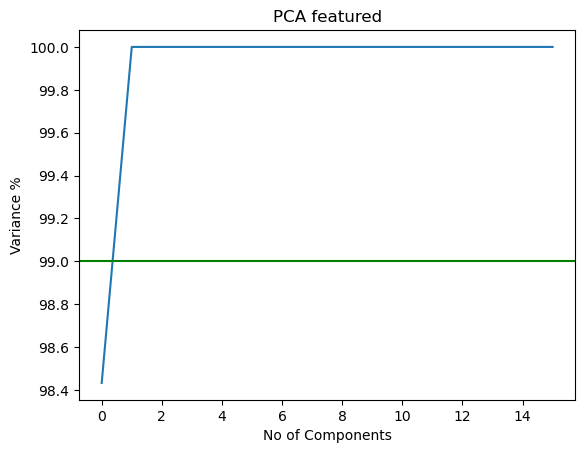

In [36]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No of Components")
plt.ylabel("Variance %")
plt.title("PCA featured")

plt.axhline(y=99,color='g',linestyle='-')
plt.show()

In [37]:
pca=PCA(1).fit(X_train)
X_train_transformed=pca.transform(X_train)
X_test_transformed=pca.transform(X_test)

In [38]:
X_train_transformed.shape

(62574, 1)

In [39]:
pca_rf=RandomForestRegressor()
pca_rf.fit(X_train_transformed,y_train)
ypca_rf_pred=pca_rf.predict(X_test_transformed)
r2_pca_rf=r2_score(y_test,ypca_rf_pred)
r2_pca_rf

-0.4995619323698599

In [40]:
rftrain_pred =rf.predict(X_train)
rf_trainr2=r2_score(y_train,rftrain_pred)
rf_trainr2

0.8720025354025334

In [42]:
pca=PCA(1).fit(test_encoded)
X_train_transformed=pca.transform(X_train)
X_test_transformed=pca.transform(test_encoded)

In [44]:
pca_prediction=pca_rf.predict(X_test_transformed)
pca_prediction

array([35591.76, 54661.44, 58902.72, ..., 67697.4 , 77721.  , 91859.76])

In [45]:
train['qualification'].astype("str") +train['income'].astype("str")

0                  Bachelor5L-10L
1               High School5L-10L
2                  Bachelor5L-10L
3               High School5L-10L
4        High SchoolMore than 10L
                   ...           
89387    High SchoolMore than 10L
89388              Bachelor5L-10L
89389              Bachelor5L-10L
89390            High School2L-5L
89391           High School5L-10L
Length: 89392, dtype: object

# kFold CV Random forest

In [40]:
from sklearn.model_selection import KFold
kFold=KFold(n_splits=10,shuffle=True,random_state=42)
cv_scores=[]
for train_index,test_index in kFold.split(X_train,y_train):
    X_train_fold,X_test_fold=X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_fold,y_test_fold=y_train.iloc[train_index],y_train.iloc[test_index]
    
    rf.fit(X_train_fold,y_train_fold)
    
    ycv_rf_predict=rf.predict(X_test_fold)
    cv=r2_score(y_test_fold,ycv_rf_predict)
    cv_scores.append(cv)
cv_scores

[0.09624562125879688,
 0.09029954241210125,
 0.08061936786117618,
 0.06860473181515192,
 0.08228535292531802,
 0.06724762990685251,
 0.07128251723251289,
 0.07675206768421228,
 0.0881584211104185,
 0.07597734664400457]

# Cat Boost

In [52]:
pip install catboost

     -------------------------------------- 101.0/101.0 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
from catboost import CatBoostRegressor

cat_features = ["qualification","income","type_of_policy","marital_status"]

cb = CatBoostRegressor(cat_features=cat_features)
cb.fit(X_train, y_train)

ycb_pred = cb.predict(X_test)

r2_cb = r2_score(y_test, ycb_pred)


Learning rate set to 0.078706
0:	learn: 89943.8767340	total: 185ms	remaining: 3m 5s
1:	learn: 89026.7973136	total: 226ms	remaining: 1m 52s
2:	learn: 88236.9013800	total: 262ms	remaining: 1m 27s
3:	learn: 87558.0444032	total: 295ms	remaining: 1m 13s
4:	learn: 87001.7498501	total: 325ms	remaining: 1m 4s
5:	learn: 86505.5113678	total: 362ms	remaining: 59.9s
6:	learn: 86076.2084072	total: 397ms	remaining: 56.4s
7:	learn: 85691.1565582	total: 429ms	remaining: 53.2s
8:	learn: 85377.2461472	total: 473ms	remaining: 52.1s
9:	learn: 85111.3237379	total: 501ms	remaining: 49.6s
10:	learn: 84876.5829973	total: 541ms	remaining: 48.6s
11:	learn: 84674.9008144	total: 583ms	remaining: 48s
12:	learn: 84503.4085463	total: 622ms	remaining: 47.3s
13:	learn: 84362.2548833	total: 657ms	remaining: 46.3s
14:	learn: 84232.0046520	total: 691ms	remaining: 45.4s
15:	learn: 84119.0052754	total: 728ms	remaining: 44.8s
16:	learn: 84009.9570737	total: 761ms	remaining: 44s
17:	learn: 83937.0415580	total: 779ms	remainin

152:	learn: 82981.9206777	total: 4.97s	remaining: 27.5s
153:	learn: 82978.9979365	total: 5.01s	remaining: 27.5s
154:	learn: 82973.7748983	total: 5.04s	remaining: 27.5s
155:	learn: 82973.2399467	total: 5.08s	remaining: 27.5s
156:	learn: 82972.0467745	total: 5.11s	remaining: 27.4s
157:	learn: 82965.2355954	total: 5.15s	remaining: 27.4s
158:	learn: 82963.0643323	total: 5.18s	remaining: 27.4s
159:	learn: 82960.9918055	total: 5.21s	remaining: 27.4s
160:	learn: 82956.4245596	total: 5.25s	remaining: 27.4s
161:	learn: 82950.5312437	total: 5.29s	remaining: 27.4s
162:	learn: 82946.5501334	total: 5.32s	remaining: 27.3s
163:	learn: 82942.3565330	total: 5.36s	remaining: 27.3s
164:	learn: 82941.4859567	total: 5.4s	remaining: 27.3s
165:	learn: 82933.9567469	total: 5.43s	remaining: 27.3s
166:	learn: 82933.9234775	total: 5.45s	remaining: 27.2s
167:	learn: 82932.0317224	total: 5.49s	remaining: 27.2s
168:	learn: 82930.4548826	total: 5.52s	remaining: 27.2s
169:	learn: 82927.3579919	total: 5.57s	remaining:

304:	learn: 82546.0398033	total: 10.1s	remaining: 23.1s
305:	learn: 82544.1646930	total: 10.2s	remaining: 23.1s
306:	learn: 82540.0702895	total: 10.2s	remaining: 23s
307:	learn: 82536.1146300	total: 10.3s	remaining: 23s
308:	learn: 82535.1619132	total: 10.3s	remaining: 23s
309:	learn: 82527.0763364	total: 10.4s	remaining: 23.1s
310:	learn: 82522.3153010	total: 10.4s	remaining: 23.1s
311:	learn: 82522.1559678	total: 10.4s	remaining: 23s
312:	learn: 82521.9585710	total: 10.5s	remaining: 23s
313:	learn: 82518.4722132	total: 10.5s	remaining: 23s
314:	learn: 82510.7644609	total: 10.6s	remaining: 23s
315:	learn: 82503.4810724	total: 10.6s	remaining: 22.9s
316:	learn: 82498.2384630	total: 10.6s	remaining: 22.9s
317:	learn: 82496.1620779	total: 10.7s	remaining: 22.9s
318:	learn: 82496.0677713	total: 10.7s	remaining: 22.8s
319:	learn: 82495.5333888	total: 10.7s	remaining: 22.8s
320:	learn: 82495.3136320	total: 10.7s	remaining: 22.7s
321:	learn: 82494.9893049	total: 10.8s	remaining: 22.7s
322:	l

456:	learn: 82149.1076666	total: 15s	remaining: 17.8s
457:	learn: 82145.9494620	total: 15s	remaining: 17.8s
458:	learn: 82144.5313082	total: 15.1s	remaining: 17.8s
459:	learn: 82139.7191304	total: 15.1s	remaining: 17.7s
460:	learn: 82136.6217825	total: 15.1s	remaining: 17.7s
461:	learn: 82134.5847094	total: 15.2s	remaining: 17.7s
462:	learn: 82134.1639120	total: 15.2s	remaining: 17.6s
463:	learn: 82128.9929308	total: 15.2s	remaining: 17.6s
464:	learn: 82124.5018917	total: 15.3s	remaining: 17.6s
465:	learn: 82124.4961805	total: 15.3s	remaining: 17.5s
466:	learn: 82123.6143636	total: 15.3s	remaining: 17.5s
467:	learn: 82123.4089645	total: 15.3s	remaining: 17.4s
468:	learn: 82123.2392195	total: 15.4s	remaining: 17.4s
469:	learn: 82123.1294497	total: 15.4s	remaining: 17.4s
470:	learn: 82118.8627565	total: 15.4s	remaining: 17.3s
471:	learn: 82115.2832385	total: 15.5s	remaining: 17.3s
472:	learn: 82108.6487404	total: 15.5s	remaining: 17.3s
473:	learn: 82106.4847966	total: 15.5s	remaining: 17

608:	learn: 81830.8059346	total: 19.7s	remaining: 12.7s
609:	learn: 81829.6538919	total: 19.7s	remaining: 12.6s
610:	learn: 81825.0043704	total: 19.8s	remaining: 12.6s
611:	learn: 81824.7385043	total: 19.8s	remaining: 12.6s
612:	learn: 81822.4579630	total: 19.8s	remaining: 12.5s
613:	learn: 81822.2705302	total: 19.9s	remaining: 12.5s
614:	learn: 81821.5652743	total: 19.9s	remaining: 12.5s
615:	learn: 81815.0854579	total: 19.9s	remaining: 12.4s
616:	learn: 81814.5516983	total: 20s	remaining: 12.4s
617:	learn: 81808.9370062	total: 20s	remaining: 12.4s
618:	learn: 81805.6854891	total: 20s	remaining: 12.3s
619:	learn: 81805.2478190	total: 20.1s	remaining: 12.3s
620:	learn: 81802.0586572	total: 20.1s	remaining: 12.3s
621:	learn: 81799.0285422	total: 20.1s	remaining: 12.2s
622:	learn: 81796.0061767	total: 20.2s	remaining: 12.2s
623:	learn: 81795.4844897	total: 20.2s	remaining: 12.2s
624:	learn: 81795.3480030	total: 20.2s	remaining: 12.1s
625:	learn: 81791.0196387	total: 20.3s	remaining: 12.1

757:	learn: 81518.8795004	total: 24.4s	remaining: 7.8s
758:	learn: 81518.2705076	total: 24.5s	remaining: 7.77s
759:	learn: 81517.9540505	total: 24.5s	remaining: 7.74s
760:	learn: 81517.9131374	total: 24.5s	remaining: 7.71s
761:	learn: 81517.0498129	total: 24.6s	remaining: 7.68s
762:	learn: 81512.6567834	total: 24.7s	remaining: 7.66s
763:	learn: 81510.6938578	total: 24.7s	remaining: 7.63s
764:	learn: 81510.0222330	total: 24.7s	remaining: 7.6s
765:	learn: 81507.9383155	total: 24.8s	remaining: 7.57s
766:	learn: 81507.7378100	total: 24.8s	remaining: 7.53s
767:	learn: 81505.9151356	total: 24.8s	remaining: 7.5s
768:	learn: 81502.4701904	total: 24.9s	remaining: 7.47s
769:	learn: 81501.7969767	total: 24.9s	remaining: 7.44s
770:	learn: 81497.3069436	total: 24.9s	remaining: 7.41s
771:	learn: 81493.3157536	total: 25s	remaining: 7.38s
772:	learn: 81490.3850282	total: 25s	remaining: 7.34s
773:	learn: 81489.8764304	total: 25s	remaining: 7.31s
774:	learn: 81489.7178280	total: 25.1s	remaining: 7.28s
7

909:	learn: 81245.1495829	total: 29.7s	remaining: 2.93s
910:	learn: 81244.5416676	total: 29.7s	remaining: 2.9s
911:	learn: 81242.1510191	total: 29.7s	remaining: 2.87s
912:	learn: 81240.5494494	total: 29.8s	remaining: 2.84s
913:	learn: 81235.9461708	total: 29.8s	remaining: 2.8s
914:	learn: 81232.3518348	total: 29.8s	remaining: 2.77s
915:	learn: 81227.3924513	total: 29.9s	remaining: 2.74s
916:	learn: 81226.0038256	total: 29.9s	remaining: 2.71s
917:	learn: 81224.1556172	total: 30s	remaining: 2.68s
918:	learn: 81218.7224812	total: 30s	remaining: 2.64s
919:	learn: 81218.5258493	total: 30s	remaining: 2.61s
920:	learn: 81211.9502573	total: 30.1s	remaining: 2.58s
921:	learn: 81211.5742247	total: 30.1s	remaining: 2.55s
922:	learn: 81208.7016327	total: 30.1s	remaining: 2.51s
923:	learn: 81204.9153838	total: 30.2s	remaining: 2.48s
924:	learn: 81200.4230303	total: 30.2s	remaining: 2.45s
925:	learn: 81197.6461484	total: 30.3s	remaining: 2.42s
926:	learn: 81197.5156566	total: 30.3s	remaining: 2.38s


In [19]:
print("R-squared:", r2_cb)

R-squared: 0.15500941330394757


In [66]:
cbtrain_pred = cb.predict(X_train)
cbtrain_r2 = r2_score(y_train, cbtrain_pred)
cbtrain_r2

0.19720210358552148

In [20]:
cb_prediction=cb.predict(test_encoded)
cb_prediction

array([ 94454.10364565, 133442.00250624,  94015.97336239, ...,
       117472.56551769, 107029.50178622, 119599.51947119])

In [21]:
df1 = pd.DataFrame(test["id"])
df2 = pd.DataFrame(cb_prediction,columns=['cltv'])
final=pd.concat([df1,df2],axis=1)
final.head()

id           cltv
0  89393   94454.103646
1  89394  133442.002506
2  89395   94015.973362
3  89396   82344.948497
4  89397  157060.998554

In [71]:
final.to_csv("cb.csv",index=False)

# Hyper Tuning CatBoost

In [149]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 200, 300]
}
cat_features = ["qualification","income","type_of_policy","marital_status"]
hcb = CatBoostRegressor(cat_features =cat_features ) 

random_search = RandomizedSearchCV(hcb, param_distributions=param_grid, cv=4, n_iter=10, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_hcb = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

yhcd_pred = best_hcb.predict(X_test)


0:	learn: 91343.3474720	total: 27.4ms	remaining: 2.71s
1:	learn: 91208.6365761	total: 50.3ms	remaining: 2.47s
2:	learn: 91076.1477199	total: 73ms	remaining: 2.36s
3:	learn: 90946.0988667	total: 95.3ms	remaining: 2.29s
4:	learn: 90818.9880054	total: 117ms	remaining: 2.23s
5:	learn: 90693.8306974	total: 139ms	remaining: 2.17s
6:	learn: 90570.3669066	total: 161ms	remaining: 2.13s
7:	learn: 90453.3283528	total: 182ms	remaining: 2.1s
8:	learn: 90338.7003310	total: 203ms	remaining: 2.05s
9:	learn: 90220.3066329	total: 224ms	remaining: 2.02s
10:	learn: 90104.7804018	total: 250ms	remaining: 2.02s
11:	learn: 89989.8123697	total: 273ms	remaining: 2s
12:	learn: 89879.7815415	total: 295ms	remaining: 1.98s
13:	learn: 89770.8901925	total: 318ms	remaining: 1.95s
14:	learn: 89666.5447559	total: 339ms	remaining: 1.92s
15:	learn: 89560.6844786	total: 362ms	remaining: 1.9s
16:	learn: 89456.3201095	total: 387ms	remaining: 1.89s
17:	learn: 89356.1457493	total: 409ms	remaining: 1.86s
18:	learn: 89257.356090

55:	learn: 85904.7733009	total: 1.45s	remaining: 1.14s
56:	learn: 85854.7796730	total: 1.48s	remaining: 1.11s
57:	learn: 85806.8169032	total: 1.5s	remaining: 1.09s
58:	learn: 85759.0415690	total: 1.53s	remaining: 1.06s
59:	learn: 85710.1431744	total: 1.56s	remaining: 1.04s
60:	learn: 85664.3136470	total: 1.58s	remaining: 1.01s
61:	learn: 85619.2939430	total: 1.61s	remaining: 985ms
62:	learn: 85574.2757352	total: 1.63s	remaining: 957ms
63:	learn: 85534.3270150	total: 1.64s	remaining: 925ms
64:	learn: 85490.2433036	total: 1.67s	remaining: 900ms
65:	learn: 85450.4011199	total: 1.69s	remaining: 872ms
66:	learn: 85409.0794284	total: 1.72s	remaining: 845ms
67:	learn: 85370.3444855	total: 1.74s	remaining: 818ms
68:	learn: 85333.8426704	total: 1.75s	remaining: 788ms
69:	learn: 85295.2596793	total: 1.77s	remaining: 761ms
70:	learn: 85256.9724029	total: 1.8s	remaining: 734ms
71:	learn: 85219.6501717	total: 1.82s	remaining: 708ms
72:	learn: 85183.5519195	total: 1.84s	remaining: 680ms
73:	learn: 8

12:	learn: 89326.8797485	total: 297ms	remaining: 1.99s
13:	learn: 89216.6690299	total: 325ms	remaining: 1.99s
14:	learn: 89109.6873943	total: 350ms	remaining: 1.98s
15:	learn: 89002.0094839	total: 372ms	remaining: 1.95s
16:	learn: 88898.6812238	total: 394ms	remaining: 1.92s
17:	learn: 88798.5817548	total: 417ms	remaining: 1.9s
18:	learn: 88698.5123936	total: 439ms	remaining: 1.87s
19:	learn: 88599.1649386	total: 462ms	remaining: 1.85s
20:	learn: 88504.4267220	total: 485ms	remaining: 1.83s
21:	learn: 88409.4336966	total: 510ms	remaining: 1.81s
22:	learn: 88314.2621198	total: 534ms	remaining: 1.79s
23:	learn: 88223.5386764	total: 557ms	remaining: 1.76s
24:	learn: 88140.3172971	total: 578ms	remaining: 1.74s
25:	learn: 88053.7991223	total: 601ms	remaining: 1.71s
26:	learn: 87969.0135236	total: 624ms	remaining: 1.69s
27:	learn: 87884.8774208	total: 647ms	remaining: 1.66s
28:	learn: 87805.0188999	total: 670ms	remaining: 1.64s
29:	learn: 87723.3604843	total: 692ms	remaining: 1.61s
30:	learn: 

71:	learn: 86111.1263999	total: 1.07s	remaining: 417ms
72:	learn: 86075.5192906	total: 1.09s	remaining: 403ms
73:	learn: 86039.2761088	total: 1.1s	remaining: 388ms
74:	learn: 86004.1426984	total: 1.12s	remaining: 373ms
75:	learn: 85971.8008677	total: 1.13s	remaining: 358ms
76:	learn: 85938.6571808	total: 1.15s	remaining: 343ms
77:	learn: 85906.1497514	total: 1.16s	remaining: 328ms
78:	learn: 85874.2007635	total: 1.18s	remaining: 313ms
79:	learn: 85840.5639918	total: 1.19s	remaining: 298ms
80:	learn: 85810.2055128	total: 1.21s	remaining: 283ms
81:	learn: 85779.1102237	total: 1.22s	remaining: 268ms
82:	learn: 85749.1165933	total: 1.24s	remaining: 253ms
83:	learn: 85721.2453970	total: 1.25s	remaining: 238ms
84:	learn: 85694.3332480	total: 1.27s	remaining: 223ms
85:	learn: 85666.5230128	total: 1.28s	remaining: 209ms
86:	learn: 85637.3912618	total: 1.3s	remaining: 194ms
87:	learn: 85609.9774323	total: 1.31s	remaining: 179ms
88:	learn: 85582.8359385	total: 1.33s	remaining: 164ms
89:	learn: 8

29:	learn: 87685.2529213	total: 475ms	remaining: 1.11s
30:	learn: 87609.3132246	total: 491ms	remaining: 1.09s
31:	learn: 87533.7774833	total: 505ms	remaining: 1.07s
32:	learn: 87461.0773058	total: 520ms	remaining: 1.05s
33:	learn: 87387.8154060	total: 535ms	remaining: 1.04s
34:	learn: 87319.4921827	total: 550ms	remaining: 1.02s
35:	learn: 87249.8131768	total: 565ms	remaining: 1s
36:	learn: 87179.4411027	total: 580ms	remaining: 987ms
37:	learn: 87110.5617400	total: 595ms	remaining: 970ms
38:	learn: 87043.8718381	total: 609ms	remaining: 952ms
39:	learn: 86977.3953169	total: 623ms	remaining: 934ms
40:	learn: 86913.3803996	total: 639ms	remaining: 920ms
41:	learn: 86851.7789916	total: 655ms	remaining: 905ms
42:	learn: 86792.4873542	total: 671ms	remaining: 889ms
43:	learn: 86734.8632873	total: 684ms	remaining: 871ms
44:	learn: 86673.8671804	total: 702ms	remaining: 858ms
45:	learn: 86615.1153032	total: 717ms	remaining: 842ms
46:	learn: 86558.9578716	total: 733ms	remaining: 826ms
47:	learn: 86

83:	learn: 85099.8125010	total: 1.29s	remaining: 246ms
84:	learn: 85071.0958711	total: 1.31s	remaining: 231ms
85:	learn: 85043.2103085	total: 1.32s	remaining: 216ms
86:	learn: 85016.9613773	total: 1.34s	remaining: 200ms
87:	learn: 84989.3857057	total: 1.35s	remaining: 185ms
88:	learn: 84962.5498640	total: 1.37s	remaining: 169ms
89:	learn: 84936.6120565	total: 1.38s	remaining: 154ms
90:	learn: 84910.9786439	total: 1.4s	remaining: 138ms
91:	learn: 84885.2911264	total: 1.41s	remaining: 123ms
92:	learn: 84861.3647669	total: 1.43s	remaining: 107ms
93:	learn: 84836.7378784	total: 1.44s	remaining: 92ms
94:	learn: 84812.5913792	total: 1.46s	remaining: 76.6ms
95:	learn: 84788.0921371	total: 1.47s	remaining: 61.3ms
96:	learn: 84765.1916813	total: 1.49s	remaining: 46ms
97:	learn: 84743.5429018	total: 1.5s	remaining: 30.6ms
98:	learn: 84720.3510243	total: 1.52s	remaining: 15.3ms
99:	learn: 84697.7453030	total: 1.53s	remaining: 0us
0:	learn: 90821.1098496	total: 15.9ms	remaining: 4.77s
1:	learn: 90

133:	learn: 83855.6871884	total: 2.22s	remaining: 2.75s
134:	learn: 83854.2034041	total: 2.24s	remaining: 2.74s
135:	learn: 83853.7941132	total: 2.25s	remaining: 2.72s
136:	learn: 83853.5981650	total: 2.27s	remaining: 2.7s
137:	learn: 83853.5257600	total: 2.29s	remaining: 2.69s
138:	learn: 83852.0190634	total: 2.31s	remaining: 2.67s
139:	learn: 83852.0189771	total: 2.32s	remaining: 2.65s
140:	learn: 83850.4477530	total: 2.33s	remaining: 2.63s
141:	learn: 83850.4476719	total: 2.35s	remaining: 2.61s
142:	learn: 83847.9500899	total: 2.36s	remaining: 2.59s
143:	learn: 83847.4329139	total: 2.38s	remaining: 2.58s
144:	learn: 83846.6873519	total: 2.39s	remaining: 2.56s
145:	learn: 83845.8351383	total: 2.41s	remaining: 2.54s
146:	learn: 83844.8148157	total: 2.42s	remaining: 2.52s
147:	learn: 83843.7064250	total: 2.44s	remaining: 2.51s
148:	learn: 83843.1254431	total: 2.46s	remaining: 2.49s
149:	learn: 83843.0169311	total: 2.47s	remaining: 2.47s
150:	learn: 83841.5295671	total: 2.49s	remaining:

285:	learn: 83775.0501812	total: 4.58s	remaining: 224ms
286:	learn: 83774.0068111	total: 4.6s	remaining: 208ms
287:	learn: 83773.9449064	total: 4.61s	remaining: 192ms
288:	learn: 83773.8936182	total: 4.63s	remaining: 176ms
289:	learn: 83773.7758138	total: 4.64s	remaining: 160ms
290:	learn: 83773.7049588	total: 4.66s	remaining: 144ms
291:	learn: 83771.5825643	total: 4.67s	remaining: 128ms
292:	learn: 83771.3769343	total: 4.69s	remaining: 112ms
293:	learn: 83771.3240771	total: 4.7s	remaining: 96ms
294:	learn: 83771.2054230	total: 4.72s	remaining: 80ms
295:	learn: 83770.2681154	total: 4.73s	remaining: 63.9ms
296:	learn: 83770.1555373	total: 4.75s	remaining: 47.9ms
297:	learn: 83770.0487535	total: 4.76s	remaining: 32ms
298:	learn: 83769.8315834	total: 4.78s	remaining: 16ms
299:	learn: 83769.6163222	total: 4.79s	remaining: 0us
0:	learn: 90122.8030670	total: 33.5ms	remaining: 10s
1:	learn: 89510.7100127	total: 52.7ms	remaining: 7.86s
2:	learn: 88956.2387743	total: 68.2ms	remaining: 6.75s
3:	

136:	learn: 83088.4306865	total: 2.27s	remaining: 2.71s
137:	learn: 83088.4242164	total: 2.29s	remaining: 2.68s
138:	learn: 83086.8585546	total: 2.3s	remaining: 2.67s
139:	learn: 83086.7574884	total: 2.32s	remaining: 2.65s
140:	learn: 83085.2327916	total: 2.34s	remaining: 2.63s
141:	learn: 83085.0987581	total: 2.35s	remaining: 2.62s
142:	learn: 83082.6979639	total: 2.37s	remaining: 2.6s
143:	learn: 83082.4499103	total: 2.38s	remaining: 2.58s
144:	learn: 83081.1795875	total: 2.4s	remaining: 2.56s
145:	learn: 83080.4520369	total: 2.41s	remaining: 2.55s
146:	learn: 83077.8627298	total: 2.43s	remaining: 2.53s
147:	learn: 83077.5258766	total: 2.45s	remaining: 2.51s
148:	learn: 83076.5354181	total: 2.46s	remaining: 2.5s
149:	learn: 83076.4707645	total: 2.48s	remaining: 2.48s
150:	learn: 83075.8125726	total: 2.5s	remaining: 2.46s
151:	learn: 83075.0879156	total: 2.51s	remaining: 2.45s
152:	learn: 83072.7682358	total: 2.53s	remaining: 2.43s
153:	learn: 83072.6391501	total: 2.55s	remaining: 2.4

289:	learn: 82974.9126449	total: 4.65s	remaining: 160ms
290:	learn: 82974.8865019	total: 4.67s	remaining: 144ms
291:	learn: 82974.1555025	total: 4.68s	remaining: 128ms
292:	learn: 82972.4423591	total: 4.7s	remaining: 112ms
293:	learn: 82972.2482928	total: 4.72s	remaining: 96.3ms
294:	learn: 82972.2326515	total: 4.73s	remaining: 80.2ms
295:	learn: 82972.1451027	total: 4.75s	remaining: 64.2ms
296:	learn: 82971.9735326	total: 4.77s	remaining: 48.1ms
297:	learn: 82969.2860486	total: 4.78s	remaining: 32.1ms
298:	learn: 82968.8554409	total: 4.8s	remaining: 16ms
299:	learn: 82968.4587458	total: 4.81s	remaining: 0us
0:	learn: 90120.1026268	total: 15.4ms	remaining: 4.6s
1:	learn: 89515.1202980	total: 46.2ms	remaining: 6.89s
2:	learn: 88963.0522683	total: 64.8ms	remaining: 6.42s
3:	learn: 88491.1038855	total: 80.5ms	remaining: 5.95s
4:	learn: 88039.6878910	total: 97.5ms	remaining: 5.75s
5:	learn: 87641.6867531	total: 114ms	remaining: 5.58s
6:	learn: 87262.3714882	total: 130ms	remaining: 5.44s
7:

143:	learn: 83211.1334856	total: 2.39s	remaining: 2.59s
144:	learn: 83209.6542341	total: 2.4s	remaining: 2.57s
145:	learn: 83207.3612596	total: 2.42s	remaining: 2.55s
146:	learn: 83206.4856604	total: 2.44s	remaining: 2.54s
147:	learn: 83206.0298587	total: 2.45s	remaining: 2.52s
148:	learn: 83205.9585234	total: 2.47s	remaining: 2.5s
149:	learn: 83205.3132214	total: 2.48s	remaining: 2.48s
150:	learn: 83204.8227543	total: 2.5s	remaining: 2.47s
151:	learn: 83203.5081108	total: 2.52s	remaining: 2.45s
152:	learn: 83202.6387188	total: 2.53s	remaining: 2.43s
153:	learn: 83201.9406855	total: 2.55s	remaining: 2.42s
154:	learn: 83201.2638956	total: 2.57s	remaining: 2.4s
155:	learn: 83201.0682813	total: 2.58s	remaining: 2.38s
156:	learn: 83200.5949673	total: 2.6s	remaining: 2.37s
157:	learn: 83198.9988647	total: 2.62s	remaining: 2.35s
158:	learn: 83198.3589462	total: 2.63s	remaining: 2.33s
159:	learn: 83197.7818982	total: 2.65s	remaining: 2.32s
160:	learn: 83197.3065036	total: 2.67s	remaining: 2.3

298:	learn: 83093.5141493	total: 4.95s	remaining: 16.6ms
299:	learn: 83093.1907303	total: 4.96s	remaining: 0us
0:	learn: 90264.0126861	total: 16.1ms	remaining: 4.8s
1:	learn: 89651.7514829	total: 31.1ms	remaining: 4.63s
2:	learn: 89095.6506917	total: 47.3ms	remaining: 4.68s
3:	learn: 88590.5498725	total: 77ms	remaining: 5.7s
4:	learn: 88141.6250356	total: 93.2ms	remaining: 5.5s
5:	learn: 87740.4059258	total: 126ms	remaining: 6.16s
6:	learn: 87355.1897207	total: 142ms	remaining: 5.92s
7:	learn: 87015.7834801	total: 159ms	remaining: 5.8s
8:	learn: 86716.7190738	total: 175ms	remaining: 5.67s
9:	learn: 86424.8873619	total: 192ms	remaining: 5.58s
10:	learn: 86162.3748628	total: 209ms	remaining: 5.5s
11:	learn: 85932.9743273	total: 226ms	remaining: 5.43s
12:	learn: 85716.9157763	total: 243ms	remaining: 5.35s
13:	learn: 85524.9770932	total: 259ms	remaining: 5.28s
14:	learn: 85346.2241998	total: 275ms	remaining: 5.22s
15:	learn: 85181.9036690	total: 291ms	remaining: 5.16s
16:	learn: 85034.2907

147:	learn: 83275.5237499	total: 2.44s	remaining: 2.5s
148:	learn: 83273.9350272	total: 2.46s	remaining: 2.49s
149:	learn: 83272.0978191	total: 2.48s	remaining: 2.48s
150:	learn: 83271.2650450	total: 2.49s	remaining: 2.46s
151:	learn: 83271.1590787	total: 2.51s	remaining: 2.44s
152:	learn: 83270.9628870	total: 2.52s	remaining: 2.43s
153:	learn: 83270.5347684	total: 2.54s	remaining: 2.41s
154:	learn: 83269.6478314	total: 2.56s	remaining: 2.39s
155:	learn: 83269.6253659	total: 2.57s	remaining: 2.37s
156:	learn: 83269.4773341	total: 2.59s	remaining: 2.36s
157:	learn: 83268.8880948	total: 2.6s	remaining: 2.34s
158:	learn: 83268.8706012	total: 2.61s	remaining: 2.32s
159:	learn: 83268.5417165	total: 2.63s	remaining: 2.3s
160:	learn: 83267.5162438	total: 2.64s	remaining: 2.28s
161:	learn: 83266.4386673	total: 2.66s	remaining: 2.27s
162:	learn: 83265.3605844	total: 2.68s	remaining: 2.25s
163:	learn: 83263.8646292	total: 2.69s	remaining: 2.23s
164:	learn: 83262.6365054	total: 2.71s	remaining: 2

295:	learn: 83174.8396198	total: 4.78s	remaining: 64.6ms
296:	learn: 83174.5345067	total: 4.8s	remaining: 48.5ms
297:	learn: 83172.5832458	total: 4.82s	remaining: 32.3ms
298:	learn: 83172.5549888	total: 4.83s	remaining: 16.2ms
299:	learn: 83172.2111721	total: 4.85s	remaining: 0us
0:	learn: 90803.6097500	total: 20.8ms	remaining: 2.06s
1:	learn: 90189.5793844	total: 42.5ms	remaining: 2.08s
2:	learn: 89630.4401394	total: 73.4ms	remaining: 2.37s
3:	learn: 89121.7166489	total: 99.3ms	remaining: 2.38s
4:	learn: 88657.2007294	total: 124ms	remaining: 2.35s
5:	learn: 88240.4617057	total: 145ms	remaining: 2.27s
6:	learn: 87856.8571910	total: 170ms	remaining: 2.26s
7:	learn: 87512.7175653	total: 195ms	remaining: 2.24s
8:	learn: 87190.0322311	total: 222ms	remaining: 2.25s
9:	learn: 86893.3060170	total: 246ms	remaining: 2.21s
10:	learn: 86627.0360257	total: 272ms	remaining: 2.2s
11:	learn: 86377.8537300	total: 300ms	remaining: 2.2s
12:	learn: 86154.8449442	total: 328ms	remaining: 2.2s
13:	learn: 85

46:	learn: 83195.6580416	total: 1.06s	remaining: 1.2s
47:	learn: 83184.5979769	total: 1.09s	remaining: 1.18s
48:	learn: 83172.8194259	total: 1.11s	remaining: 1.16s
49:	learn: 83159.4408942	total: 1.13s	remaining: 1.13s
50:	learn: 83152.2349345	total: 1.15s	remaining: 1.1s
51:	learn: 83146.0166145	total: 1.16s	remaining: 1.07s
52:	learn: 83135.7029583	total: 1.18s	remaining: 1.05s
53:	learn: 83127.7615045	total: 1.21s	remaining: 1.03s
54:	learn: 83122.2039652	total: 1.23s	remaining: 1s
55:	learn: 83109.2956464	total: 1.25s	remaining: 981ms
56:	learn: 83100.2287224	total: 1.27s	remaining: 960ms
57:	learn: 83091.5199707	total: 1.29s	remaining: 938ms
58:	learn: 83085.3787888	total: 1.32s	remaining: 915ms
59:	learn: 83079.7846463	total: 1.34s	remaining: 893ms
60:	learn: 83073.5527257	total: 1.36s	remaining: 871ms
61:	learn: 83066.8209973	total: 1.38s	remaining: 848ms
62:	learn: 83060.4948749	total: 1.41s	remaining: 826ms
63:	learn: 83056.9051882	total: 1.42s	remaining: 801ms
64:	learn: 8305

99:	learn: 83117.4706090	total: 2.22s	remaining: 0us
0:	learn: 90263.4186815	total: 20.5ms	remaining: 2.03s
1:	learn: 89632.8632998	total: 41ms	remaining: 2.01s
2:	learn: 89086.5070521	total: 61.8ms	remaining: 2s
3:	learn: 88566.9846402	total: 84.3ms	remaining: 2.02s
4:	learn: 88103.3432165	total: 106ms	remaining: 2.02s
5:	learn: 87680.6267596	total: 129ms	remaining: 2.02s
6:	learn: 87304.4796197	total: 153ms	remaining: 2.04s
7:	learn: 86951.2378861	total: 176ms	remaining: 2.03s
8:	learn: 86626.7738165	total: 200ms	remaining: 2.02s
9:	learn: 86324.5983425	total: 223ms	remaining: 2s
10:	learn: 86057.9286641	total: 246ms	remaining: 1.99s
11:	learn: 85816.7198318	total: 268ms	remaining: 1.97s
12:	learn: 85600.4416625	total: 290ms	remaining: 1.94s
13:	learn: 85392.6847097	total: 312ms	remaining: 1.92s
14:	learn: 85217.4834379	total: 334ms	remaining: 1.89s
15:	learn: 85039.9330375	total: 359ms	remaining: 1.88s
16:	learn: 84890.4035563	total: 382ms	remaining: 1.86s
17:	learn: 84748.1301381	t

55:	learn: 86765.4218267	total: 924ms	remaining: 4.03s
56:	learn: 86717.3096065	total: 942ms	remaining: 4.01s
57:	learn: 86670.1287320	total: 959ms	remaining: 4s
58:	learn: 86622.6535288	total: 976ms	remaining: 3.98s
59:	learn: 86579.5805533	total: 992ms	remaining: 3.97s
60:	learn: 86534.9452820	total: 1.01s	remaining: 3.95s
61:	learn: 86491.9093950	total: 1.02s	remaining: 3.93s
62:	learn: 86447.4961005	total: 1.04s	remaining: 3.91s
63:	learn: 86405.5318270	total: 1.05s	remaining: 3.89s
64:	learn: 86363.6410921	total: 1.07s	remaining: 3.87s
65:	learn: 86323.1058256	total: 1.09s	remaining: 3.85s
66:	learn: 86283.6483456	total: 1.1s	remaining: 3.83s
67:	learn: 86245.0934816	total: 1.12s	remaining: 3.82s
68:	learn: 86206.7271645	total: 1.14s	remaining: 3.81s
69:	learn: 86166.9846236	total: 1.15s	remaining: 3.79s
70:	learn: 86129.6692478	total: 1.17s	remaining: 3.77s
71:	learn: 86093.6761185	total: 1.19s	remaining: 3.76s
72:	learn: 86059.8203962	total: 1.2s	remaining: 3.74s
73:	learn: 8602

208:	learn: 84212.3666593	total: 3.45s	remaining: 1.5s
209:	learn: 84208.4714090	total: 3.47s	remaining: 1.49s
210:	learn: 84204.7136818	total: 3.48s	remaining: 1.47s
211:	learn: 84201.1363044	total: 3.5s	remaining: 1.45s
212:	learn: 84197.5326730	total: 3.52s	remaining: 1.44s
213:	learn: 84193.8667973	total: 3.53s	remaining: 1.42s
214:	learn: 84190.6578924	total: 3.55s	remaining: 1.4s
215:	learn: 84187.0111425	total: 3.57s	remaining: 1.39s
216:	learn: 84183.8521143	total: 3.58s	remaining: 1.37s
217:	learn: 84180.6615284	total: 3.6s	remaining: 1.35s
218:	learn: 84177.2266845	total: 3.62s	remaining: 1.34s
219:	learn: 84174.7019741	total: 3.64s	remaining: 1.32s
220:	learn: 84171.0698905	total: 3.65s	remaining: 1.31s
221:	learn: 84167.2377013	total: 3.67s	remaining: 1.29s
222:	learn: 84163.4815863	total: 3.69s	remaining: 1.27s
223:	learn: 84160.5668537	total: 3.71s	remaining: 1.26s
224:	learn: 84158.2291015	total: 3.73s	remaining: 1.24s
225:	learn: 84155.0808562	total: 3.74s	remaining: 1.

63:	learn: 85669.1492836	total: 1.1s	remaining: 4.08s
64:	learn: 85626.3819689	total: 1.12s	remaining: 4.06s
65:	learn: 85585.9761698	total: 1.14s	remaining: 4.04s
66:	learn: 85546.3639326	total: 1.16s	remaining: 4.02s
67:	learn: 85507.0651489	total: 1.17s	remaining: 4s
68:	learn: 85467.9817309	total: 1.19s	remaining: 3.98s
69:	learn: 85428.0950598	total: 1.2s	remaining: 3.96s
70:	learn: 85390.8928327	total: 1.22s	remaining: 3.94s
71:	learn: 85354.7784867	total: 1.24s	remaining: 3.91s
72:	learn: 85320.1047528	total: 1.25s	remaining: 3.89s
73:	learn: 85284.0953628	total: 1.27s	remaining: 3.88s
74:	learn: 85247.4065359	total: 1.28s	remaining: 3.86s
75:	learn: 85213.0284209	total: 1.3s	remaining: 3.83s
76:	learn: 85180.5131380	total: 1.32s	remaining: 3.82s
77:	learn: 85148.2493631	total: 1.34s	remaining: 3.8s
78:	learn: 85115.6030591	total: 1.35s	remaining: 3.79s
79:	learn: 85084.1777768	total: 1.37s	remaining: 3.76s
80:	learn: 85054.3467440	total: 1.39s	remaining: 3.75s
81:	learn: 85023.

217:	learn: 83417.4021938	total: 3.68s	remaining: 1.39s
218:	learn: 83413.7300085	total: 3.7s	remaining: 1.37s
219:	learn: 83410.0478400	total: 3.72s	remaining: 1.35s
220:	learn: 83406.9668328	total: 3.74s	remaining: 1.34s
221:	learn: 83403.9377962	total: 3.75s	remaining: 1.32s
222:	learn: 83401.1273165	total: 3.77s	remaining: 1.3s
223:	learn: 83398.1281046	total: 3.8s	remaining: 1.29s
224:	learn: 83394.7899476	total: 3.82s	remaining: 1.27s
225:	learn: 83391.5252636	total: 3.84s	remaining: 1.26s
226:	learn: 83388.5759038	total: 3.85s	remaining: 1.24s
227:	learn: 83385.6324238	total: 3.87s	remaining: 1.22s
228:	learn: 83382.1292068	total: 3.89s	remaining: 1.21s
229:	learn: 83378.9725301	total: 3.91s	remaining: 1.19s
230:	learn: 83376.5361906	total: 3.93s	remaining: 1.17s
231:	learn: 83373.5010871	total: 3.95s	remaining: 1.16s
232:	learn: 83370.3029680	total: 3.97s	remaining: 1.14s
233:	learn: 83368.1079985	total: 3.98s	remaining: 1.12s
234:	learn: 83364.8799010	total: 4s	remaining: 1.11

77:	learn: 85215.1541592	total: 1.3s	remaining: 3.72s
78:	learn: 85183.4080321	total: 1.32s	remaining: 3.7s
79:	learn: 85151.5390115	total: 1.34s	remaining: 3.68s
80:	learn: 85120.4061319	total: 1.35s	remaining: 3.66s
81:	learn: 85089.7130112	total: 1.37s	remaining: 3.64s
82:	learn: 85061.4246383	total: 1.39s	remaining: 3.63s
83:	learn: 85034.3797206	total: 1.4s	remaining: 3.61s
84:	learn: 85006.1458050	total: 1.42s	remaining: 3.59s
85:	learn: 84977.4628056	total: 1.43s	remaining: 3.57s
86:	learn: 84949.5516010	total: 1.45s	remaining: 3.55s
87:	learn: 84921.9958241	total: 1.47s	remaining: 3.54s
88:	learn: 84894.0187536	total: 1.48s	remaining: 3.52s
89:	learn: 84867.7350316	total: 1.5s	remaining: 3.5s
90:	learn: 84841.8456546	total: 1.52s	remaining: 3.49s
91:	learn: 84815.4841227	total: 1.53s	remaining: 3.47s
92:	learn: 84790.7222014	total: 1.55s	remaining: 3.45s
93:	learn: 84766.4579213	total: 1.56s	remaining: 3.43s
94:	learn: 84743.1828735	total: 1.58s	remaining: 3.41s
95:	learn: 8472

231:	learn: 83492.0180153	total: 3.84s	remaining: 1.12s
232:	learn: 83488.8601100	total: 3.86s	remaining: 1.11s
233:	learn: 83486.0001583	total: 3.87s	remaining: 1.09s
234:	learn: 83483.4385946	total: 3.89s	remaining: 1.07s
235:	learn: 83481.2989678	total: 3.9s	remaining: 1.06s
236:	learn: 83479.3767676	total: 3.92s	remaining: 1.04s
237:	learn: 83477.4476930	total: 3.94s	remaining: 1.02s
238:	learn: 83475.7232301	total: 3.95s	remaining: 1.01s
239:	learn: 83473.3781236	total: 3.97s	remaining: 992ms
240:	learn: 83471.1162155	total: 3.98s	remaining: 975ms
241:	learn: 83469.1405374	total: 4s	remaining: 959ms
242:	learn: 83466.9267496	total: 4.01s	remaining: 942ms
243:	learn: 83465.2031445	total: 4.03s	remaining: 925ms
244:	learn: 83463.1202489	total: 4.05s	remaining: 909ms
245:	learn: 83461.1908888	total: 4.07s	remaining: 893ms
246:	learn: 83458.9094202	total: 4.08s	remaining: 876ms
247:	learn: 83456.6378897	total: 4.1s	remaining: 860ms
248:	learn: 83454.0324669	total: 4.12s	remaining: 843

81:	learn: 85176.2897680	total: 1.34s	remaining: 3.57s
82:	learn: 85146.4446286	total: 1.36s	remaining: 3.56s
83:	learn: 85119.0241167	total: 1.38s	remaining: 3.55s
84:	learn: 85090.3824530	total: 1.4s	remaining: 3.54s
85:	learn: 85061.0131358	total: 1.42s	remaining: 3.52s
86:	learn: 85032.8819476	total: 1.43s	remaining: 3.5s
87:	learn: 85004.9677781	total: 1.45s	remaining: 3.49s
88:	learn: 84976.5360517	total: 1.46s	remaining: 3.47s
89:	learn: 84949.6741439	total: 1.48s	remaining: 3.45s
90:	learn: 84923.5811250	total: 1.49s	remaining: 3.43s
91:	learn: 84896.5939661	total: 1.51s	remaining: 3.42s
92:	learn: 84871.8000470	total: 1.53s	remaining: 3.4s
93:	learn: 84847.3160751	total: 1.54s	remaining: 3.38s
94:	learn: 84824.1872596	total: 1.56s	remaining: 3.37s
95:	learn: 84800.6595752	total: 1.58s	remaining: 3.35s
96:	learn: 84776.7169937	total: 1.59s	remaining: 3.34s
97:	learn: 84753.6940717	total: 1.61s	remaining: 3.32s
98:	learn: 84731.3311640	total: 1.63s	remaining: 3.3s
99:	learn: 847

230:	learn: 83560.8237664	total: 3.95s	remaining: 1.18s
231:	learn: 83558.5291374	total: 3.97s	remaining: 1.16s
232:	learn: 83555.5509113	total: 4s	remaining: 1.15s
233:	learn: 83552.7669747	total: 4.02s	remaining: 1.14s
234:	learn: 83550.1361594	total: 4.04s	remaining: 1.12s
235:	learn: 83547.4369772	total: 4.07s	remaining: 1.1s
236:	learn: 83545.3058681	total: 4.09s	remaining: 1.09s
237:	learn: 83542.6361888	total: 4.11s	remaining: 1.07s
238:	learn: 83540.6217698	total: 4.15s	remaining: 1.06s
239:	learn: 83538.1433270	total: 4.17s	remaining: 1.04s
240:	learn: 83535.8880736	total: 4.2s	remaining: 1.03s
241:	learn: 83533.4702293	total: 4.22s	remaining: 1.01s
242:	learn: 83531.6236090	total: 4.24s	remaining: 996ms
243:	learn: 83529.1898208	total: 4.27s	remaining: 979ms
244:	learn: 83527.3422265	total: 4.29s	remaining: 963ms
245:	learn: 83524.8035573	total: 4.33s	remaining: 950ms
246:	learn: 83522.2139016	total: 4.35s	remaining: 933ms
247:	learn: 83519.6476734	total: 4.37s	remaining: 917

79:	learn: 83783.5493079	total: 1.79s	remaining: 449ms
80:	learn: 83782.3680837	total: 1.82s	remaining: 426ms
81:	learn: 83779.4903393	total: 1.84s	remaining: 404ms
82:	learn: 83777.7900955	total: 1.86s	remaining: 381ms
83:	learn: 83775.0673187	total: 1.88s	remaining: 358ms
84:	learn: 83770.8364372	total: 1.91s	remaining: 337ms
85:	learn: 83768.4674024	total: 1.93s	remaining: 314ms
86:	learn: 83765.1234332	total: 1.95s	remaining: 292ms
87:	learn: 83760.7302921	total: 1.97s	remaining: 269ms
88:	learn: 83759.2371025	total: 2s	remaining: 247ms
89:	learn: 83757.1890426	total: 2.02s	remaining: 225ms
90:	learn: 83754.1494802	total: 2.04s	remaining: 202ms
91:	learn: 83754.0240909	total: 2.06s	remaining: 179ms
92:	learn: 83752.4713713	total: 2.08s	remaining: 156ms
93:	learn: 83750.0773230	total: 2.1s	remaining: 134ms
94:	learn: 83747.5019000	total: 2.12s	remaining: 112ms
95:	learn: 83747.5017194	total: 2.13s	remaining: 88.9ms
96:	learn: 83742.7347187	total: 2.15s	remaining: 66.6ms
97:	learn: 8

31:	learn: 83657.3715223	total: 711ms	remaining: 1.51s
32:	learn: 83625.6541469	total: 734ms	remaining: 1.49s
33:	learn: 83593.4454380	total: 757ms	remaining: 1.47s
34:	learn: 83563.8255888	total: 778ms	remaining: 1.45s
35:	learn: 83534.4903630	total: 800ms	remaining: 1.42s
36:	learn: 83511.8125728	total: 823ms	remaining: 1.4s
37:	learn: 83490.3950319	total: 844ms	remaining: 1.38s
38:	learn: 83468.3637477	total: 866ms	remaining: 1.35s
39:	learn: 83448.0094303	total: 887ms	remaining: 1.33s
40:	learn: 83430.0830252	total: 910ms	remaining: 1.31s
41:	learn: 83411.3161074	total: 936ms	remaining: 1.29s
42:	learn: 83396.5061028	total: 961ms	remaining: 1.27s
43:	learn: 83384.7186233	total: 983ms	remaining: 1.25s
44:	learn: 83371.9824253	total: 1.01s	remaining: 1.23s
45:	learn: 83365.8249189	total: 1.02s	remaining: 1.19s
46:	learn: 83353.8045222	total: 1.04s	remaining: 1.17s
47:	learn: 83342.4437072	total: 1.06s	remaining: 1.15s
48:	learn: 83332.7722833	total: 1.08s	remaining: 1.13s
49:	learn: 

87:	learn: 83207.5716654	total: 1.95s	remaining: 266ms
88:	learn: 83202.2817986	total: 1.98s	remaining: 244ms
89:	learn: 83201.0837180	total: 1.99s	remaining: 221ms
90:	learn: 83198.9147700	total: 2.01s	remaining: 199ms
91:	learn: 83198.3883512	total: 2.03s	remaining: 177ms
92:	learn: 83195.5559276	total: 2.05s	remaining: 155ms
93:	learn: 83192.8856318	total: 2.07s	remaining: 132ms
94:	learn: 83191.4893853	total: 2.1s	remaining: 110ms
95:	learn: 83189.3492754	total: 2.12s	remaining: 88.3ms
96:	learn: 83187.1128321	total: 2.14s	remaining: 66.2ms
97:	learn: 83185.9661289	total: 2.16s	remaining: 44.1ms
98:	learn: 83185.5086789	total: 2.19s	remaining: 22.1ms
99:	learn: 83184.6575337	total: 2.21s	remaining: 0us
0:	learn: 90820.8620722	total: 22.5ms	remaining: 4.47s
1:	learn: 90216.1971848	total: 37.9ms	remaining: 3.75s
2:	learn: 89669.8128941	total: 53.4ms	remaining: 3.51s
3:	learn: 89185.9815336	total: 68.7ms	remaining: 3.36s
4:	learn: 88730.0163826	total: 86.5ms	remaining: 3.37s
5:	learn:

139:	learn: 83853.5718842	total: 2.28s	remaining: 978ms
140:	learn: 83853.1329383	total: 2.3s	remaining: 962ms
141:	learn: 83852.1120734	total: 2.31s	remaining: 945ms
142:	learn: 83850.1029852	total: 2.33s	remaining: 929ms
143:	learn: 83847.1095743	total: 2.35s	remaining: 913ms
144:	learn: 83846.6468987	total: 2.36s	remaining: 896ms
145:	learn: 83846.5466184	total: 2.38s	remaining: 880ms
146:	learn: 83846.2710908	total: 2.39s	remaining: 863ms
147:	learn: 83846.0263218	total: 2.4s	remaining: 845ms
148:	learn: 83845.1326901	total: 2.42s	remaining: 829ms
149:	learn: 83844.4881222	total: 2.44s	remaining: 813ms
150:	learn: 83843.7066764	total: 2.45s	remaining: 797ms
151:	learn: 83843.3925365	total: 2.47s	remaining: 780ms
152:	learn: 83842.9940075	total: 2.48s	remaining: 763ms
153:	learn: 83842.1104678	total: 2.5s	remaining: 747ms
154:	learn: 83840.9194664	total: 2.52s	remaining: 731ms
155:	learn: 83840.1583725	total: 2.53s	remaining: 715ms
156:	learn: 83839.8028760	total: 2.55s	remaining: 6

96:	learn: 83132.7259137	total: 1.74s	remaining: 1.85s
97:	learn: 83129.1555460	total: 1.77s	remaining: 1.84s
98:	learn: 83127.7463368	total: 1.79s	remaining: 1.82s
99:	learn: 83125.0939215	total: 1.81s	remaining: 1.81s
100:	learn: 83122.6614921	total: 1.83s	remaining: 1.79s
101:	learn: 83120.6963825	total: 1.85s	remaining: 1.78s
102:	learn: 83117.9859972	total: 1.88s	remaining: 1.77s
103:	learn: 83116.8931923	total: 1.9s	remaining: 1.76s
104:	learn: 83116.1123558	total: 1.92s	remaining: 1.73s
105:	learn: 83111.5021965	total: 1.94s	remaining: 1.72s
106:	learn: 83111.3725571	total: 1.96s	remaining: 1.7s
107:	learn: 83110.4388682	total: 1.98s	remaining: 1.68s
108:	learn: 83109.5234119	total: 2s	remaining: 1.67s
109:	learn: 83109.4652227	total: 2.02s	remaining: 1.65s
110:	learn: 83107.7927490	total: 2.04s	remaining: 1.64s
111:	learn: 83106.3448450	total: 2.07s	remaining: 1.63s
112:	learn: 83105.9239699	total: 2.1s	remaining: 1.62s
113:	learn: 83105.4700221	total: 2.12s	remaining: 1.6s
114

54:	learn: 83398.4507694	total: 1.1s	remaining: 2.9s
55:	learn: 83391.4858225	total: 1.12s	remaining: 2.88s
56:	learn: 83383.1280585	total: 1.14s	remaining: 2.85s
57:	learn: 83377.5816203	total: 1.15s	remaining: 2.82s
58:	learn: 83373.2704700	total: 1.17s	remaining: 2.8s
59:	learn: 83368.3843829	total: 1.19s	remaining: 2.77s
60:	learn: 83362.4535927	total: 1.21s	remaining: 2.75s
61:	learn: 83356.9687588	total: 1.22s	remaining: 2.72s
62:	learn: 83350.2002254	total: 1.24s	remaining: 2.7s
63:	learn: 83343.1884007	total: 1.26s	remaining: 2.67s
64:	learn: 83336.8594276	total: 1.27s	remaining: 2.65s
65:	learn: 83330.7689757	total: 1.29s	remaining: 2.62s
66:	learn: 83326.6482976	total: 1.31s	remaining: 2.6s
67:	learn: 83323.8724228	total: 1.32s	remaining: 2.57s
68:	learn: 83321.1835429	total: 1.34s	remaining: 2.55s
69:	learn: 83316.2047910	total: 1.36s	remaining: 2.52s
70:	learn: 83312.7850717	total: 1.37s	remaining: 2.5s
71:	learn: 83309.4103833	total: 1.39s	remaining: 2.47s
72:	learn: 83305

2:	learn: 89095.0491789	total: 68.3ms	remaining: 4.49s
3:	learn: 88589.7961046	total: 86.6ms	remaining: 4.24s
4:	learn: 88140.7358195	total: 103ms	remaining: 4.01s
5:	learn: 87739.4426480	total: 119ms	remaining: 3.84s
6:	learn: 87354.1775322	total: 135ms	remaining: 3.72s
7:	learn: 87014.7659672	total: 157ms	remaining: 3.77s
8:	learn: 86715.6781149	total: 173ms	remaining: 3.67s
9:	learn: 86423.8320646	total: 190ms	remaining: 3.6s
10:	learn: 86161.3237811	total: 207ms	remaining: 3.56s
11:	learn: 85931.9460226	total: 224ms	remaining: 3.52s
12:	learn: 85715.9038735	total: 241ms	remaining: 3.46s
13:	learn: 85524.0081321	total: 281ms	remaining: 3.73s
14:	learn: 85345.2902766	total: 300ms	remaining: 3.7s
15:	learn: 85180.9938716	total: 316ms	remaining: 3.63s
16:	learn: 85033.4131942	total: 330ms	remaining: 3.56s
17:	learn: 84899.0741417	total: 346ms	remaining: 3.5s
18:	learn: 84777.0770323	total: 362ms	remaining: 3.45s
19:	learn: 84667.5932997	total: 379ms	remaining: 3.41s
20:	learn: 84562.33

155:	learn: 83259.0642755	total: 2.64s	remaining: 745ms
156:	learn: 83258.9309742	total: 2.65s	remaining: 727ms
157:	learn: 83258.8149109	total: 2.67s	remaining: 710ms
158:	learn: 83256.6788159	total: 2.69s	remaining: 693ms
159:	learn: 83255.5286413	total: 2.7s	remaining: 676ms
160:	learn: 83254.9283571	total: 2.72s	remaining: 659ms
161:	learn: 83254.6425882	total: 2.73s	remaining: 641ms
162:	learn: 83254.6209374	total: 2.75s	remaining: 624ms
163:	learn: 83254.4493366	total: 2.76s	remaining: 606ms
164:	learn: 83254.1112272	total: 2.78s	remaining: 589ms
165:	learn: 83252.0866550	total: 2.79s	remaining: 572ms
166:	learn: 83251.4622092	total: 2.81s	remaining: 555ms
167:	learn: 83250.8828351	total: 2.82s	remaining: 538ms
168:	learn: 83250.7110925	total: 2.84s	remaining: 521ms
169:	learn: 83249.2434921	total: 2.86s	remaining: 505ms
170:	learn: 83249.1681169	total: 2.88s	remaining: 488ms
171:	learn: 83248.5877545	total: 2.89s	remaining: 471ms
172:	learn: 83248.3888633	total: 2.91s	remaining:

109:	learn: 83604.2743824	total: 3.42s	remaining: 2.79s
110:	learn: 83594.4155159	total: 3.45s	remaining: 2.77s
111:	learn: 83594.4151332	total: 3.46s	remaining: 2.72s
112:	learn: 83593.8134375	total: 3.49s	remaining: 2.69s
113:	learn: 83587.5794726	total: 3.53s	remaining: 2.66s
114:	learn: 83586.9291888	total: 3.56s	remaining: 2.63s
115:	learn: 83585.4781343	total: 3.59s	remaining: 2.6s
116:	learn: 83585.2260845	total: 3.61s	remaining: 2.56s
117:	learn: 83584.3860163	total: 3.63s	remaining: 2.52s
118:	learn: 83584.3853860	total: 3.65s	remaining: 2.48s
119:	learn: 83583.6743822	total: 3.68s	remaining: 2.46s
120:	learn: 83583.6699881	total: 3.7s	remaining: 2.41s
121:	learn: 83579.6401905	total: 3.73s	remaining: 2.39s
122:	learn: 83574.4406718	total: 3.77s	remaining: 2.36s
123:	learn: 83574.4057881	total: 3.78s	remaining: 2.32s
124:	learn: 83573.4302816	total: 3.81s	remaining: 2.29s
125:	learn: 83569.2776312	total: 3.85s	remaining: 2.26s
126:	learn: 83568.1084942	total: 3.89s	remaining: 

59:	learn: 82989.9205188	total: 2.07s	remaining: 4.83s
60:	learn: 82984.1586616	total: 2.1s	remaining: 4.8s
61:	learn: 82975.2004102	total: 2.14s	remaining: 4.77s
62:	learn: 82975.1839193	total: 2.15s	remaining: 4.69s
63:	learn: 82970.5395338	total: 2.19s	remaining: 4.66s
64:	learn: 82963.3992138	total: 2.23s	remaining: 4.62s
65:	learn: 82958.9911492	total: 2.26s	remaining: 4.58s
66:	learn: 82954.7002464	total: 2.3s	remaining: 4.56s
67:	learn: 82945.6932867	total: 2.33s	remaining: 4.52s
68:	learn: 82939.7973388	total: 2.37s	remaining: 4.49s
69:	learn: 82939.7831088	total: 2.38s	remaining: 4.42s
70:	learn: 82934.8564726	total: 2.42s	remaining: 4.39s
71:	learn: 82930.1556196	total: 2.45s	remaining: 4.36s
72:	learn: 82928.1435452	total: 2.47s	remaining: 4.29s
73:	learn: 82927.7669688	total: 2.5s	remaining: 4.25s
74:	learn: 82919.8355965	total: 2.54s	remaining: 4.23s
75:	learn: 82919.3979701	total: 2.56s	remaining: 4.18s
76:	learn: 82918.3379160	total: 2.59s	remaining: 4.13s
77:	learn: 829

13:	learn: 85338.2949167	total: 530ms	remaining: 7.04s
14:	learn: 85147.7109839	total: 565ms	remaining: 6.97s
15:	learn: 84974.9730924	total: 605ms	remaining: 6.95s
16:	learn: 84828.7384888	total: 639ms	remaining: 6.87s
17:	learn: 84721.1901837	total: 651ms	remaining: 6.58s
18:	learn: 84582.1325668	total: 691ms	remaining: 6.58s
19:	learn: 84454.9599557	total: 734ms	remaining: 6.61s
20:	learn: 84361.9171361	total: 755ms	remaining: 6.44s
21:	learn: 84271.3755011	total: 778ms	remaining: 6.29s
22:	learn: 84181.5338327	total: 815ms	remaining: 6.27s
23:	learn: 84104.9234304	total: 843ms	remaining: 6.18s
24:	learn: 84042.4500983	total: 858ms	remaining: 6.01s
25:	learn: 83970.8705080	total: 895ms	remaining: 5.99s
26:	learn: 83900.7122174	total: 935ms	remaining: 5.99s
27:	learn: 83854.1978886	total: 957ms	remaining: 5.88s
28:	learn: 83800.2201209	total: 997ms	remaining: 5.88s
29:	learn: 83749.6816643	total: 1.02s	remaining: 5.81s
30:	learn: 83720.8341516	total: 1.04s	remaining: 5.67s
31:	learn:

162:	learn: 82794.4407211	total: 5.38s	remaining: 1.22s
163:	learn: 82792.2130095	total: 5.42s	remaining: 1.19s
164:	learn: 82792.0310794	total: 5.44s	remaining: 1.15s
165:	learn: 82790.1403758	total: 5.48s	remaining: 1.12s
166:	learn: 82784.3168856	total: 5.51s	remaining: 1.09s
167:	learn: 82780.9133305	total: 5.55s	remaining: 1.06s
168:	learn: 82780.8868936	total: 5.57s	remaining: 1.02s
169:	learn: 82775.1365799	total: 5.6s	remaining: 989ms
170:	learn: 82774.7884502	total: 5.62s	remaining: 953ms
171:	learn: 82772.8143192	total: 5.65s	remaining: 920ms
172:	learn: 82772.6921524	total: 5.68s	remaining: 887ms
173:	learn: 82770.8089128	total: 5.72s	remaining: 855ms
174:	learn: 82770.7313255	total: 5.73s	remaining: 819ms
175:	learn: 82770.6201228	total: 5.75s	remaining: 785ms
176:	learn: 82770.5823314	total: 5.77s	remaining: 750ms
177:	learn: 82770.5585431	total: 5.78s	remaining: 715ms
178:	learn: 82770.0641132	total: 5.82s	remaining: 682ms
179:	learn: 82767.5970109	total: 5.85s	remaining:

117:	learn: 82987.6058783	total: 3.77s	remaining: 2.62s
118:	learn: 82983.1928290	total: 3.8s	remaining: 2.59s
119:	learn: 82979.3750157	total: 3.83s	remaining: 2.56s
120:	learn: 82979.3720041	total: 3.85s	remaining: 2.51s
121:	learn: 82967.0770433	total: 3.88s	remaining: 2.48s
122:	learn: 82965.8186049	total: 3.92s	remaining: 2.45s
123:	learn: 82965.7871644	total: 3.93s	remaining: 2.41s
124:	learn: 82957.4397882	total: 3.97s	remaining: 2.38s
125:	learn: 82954.6427552	total: 4.01s	remaining: 2.35s
126:	learn: 82952.9762621	total: 4.04s	remaining: 2.32s
127:	learn: 82940.6308934	total: 4.08s	remaining: 2.29s
128:	learn: 82940.5380961	total: 4.09s	remaining: 2.25s
129:	learn: 82939.6765667	total: 4.12s	remaining: 2.22s
130:	learn: 82936.7239817	total: 4.16s	remaining: 2.19s
131:	learn: 82931.1144255	total: 4.19s	remaining: 2.16s
132:	learn: 82922.5112243	total: 4.24s	remaining: 2.13s
133:	learn: 82920.7962326	total: 4.27s	remaining: 2.1s
134:	learn: 82915.7779741	total: 4.31s	remaining: 

66:	learn: 83971.7633159	total: 999ms	remaining: 492ms
67:	learn: 83967.8911209	total: 1.01s	remaining: 477ms
68:	learn: 83963.5092010	total: 1.03s	remaining: 462ms
69:	learn: 83959.6783085	total: 1.04s	remaining: 447ms
70:	learn: 83956.6314068	total: 1.06s	remaining: 431ms
71:	learn: 83954.3421741	total: 1.07s	remaining: 417ms
72:	learn: 83954.2688339	total: 1.09s	remaining: 402ms
73:	learn: 83950.7661371	total: 1.1s	remaining: 387ms
74:	learn: 83945.4862474	total: 1.12s	remaining: 373ms
75:	learn: 83943.5759202	total: 1.14s	remaining: 359ms
76:	learn: 83941.6928192	total: 1.15s	remaining: 344ms
77:	learn: 83937.1756365	total: 1.17s	remaining: 329ms
78:	learn: 83933.9856009	total: 1.18s	remaining: 314ms
79:	learn: 83931.1647876	total: 1.19s	remaining: 299ms
80:	learn: 83931.1567537	total: 1.21s	remaining: 283ms
81:	learn: 83927.0118083	total: 1.22s	remaining: 268ms
82:	learn: 83923.3729029	total: 1.24s	remaining: 254ms
83:	learn: 83919.4873419	total: 1.25s	remaining: 239ms
84:	learn: 

24:	learn: 84167.1894160	total: 466ms	remaining: 1.4s
25:	learn: 84099.7715145	total: 484ms	remaining: 1.38s
26:	learn: 84039.9168899	total: 499ms	remaining: 1.35s
27:	learn: 83982.2181560	total: 514ms	remaining: 1.32s
28:	learn: 83936.9804873	total: 530ms	remaining: 1.3s
29:	learn: 83889.3671637	total: 545ms	remaining: 1.27s
30:	learn: 83845.8296370	total: 560ms	remaining: 1.25s
31:	learn: 83807.8989922	total: 577ms	remaining: 1.23s
32:	learn: 83779.5827081	total: 592ms	remaining: 1.2s
33:	learn: 83748.0794897	total: 607ms	remaining: 1.18s
34:	learn: 83718.6577160	total: 627ms	remaining: 1.16s
35:	learn: 83690.3359841	total: 644ms	remaining: 1.14s
36:	learn: 83662.8411725	total: 659ms	remaining: 1.12s
37:	learn: 83634.7089429	total: 675ms	remaining: 1.1s
38:	learn: 83611.4743819	total: 691ms	remaining: 1.08s
39:	learn: 83588.4761965	total: 706ms	remaining: 1.06s
40:	learn: 83570.1778198	total: 721ms	remaining: 1.04s
41:	learn: 83552.8856500	total: 737ms	remaining: 1.02s
42:	learn: 835

87:	learn: 83330.4758801	total: 1.32s	remaining: 180ms
88:	learn: 83329.9599241	total: 1.34s	remaining: 166ms
89:	learn: 83328.1299676	total: 1.36s	remaining: 151ms
90:	learn: 83325.3062964	total: 1.37s	remaining: 136ms
91:	learn: 83323.3482342	total: 1.39s	remaining: 121ms
92:	learn: 83322.1254087	total: 1.4s	remaining: 105ms
93:	learn: 83319.0318064	total: 1.42s	remaining: 90.4ms
94:	learn: 83318.6843856	total: 1.43s	remaining: 75.2ms
95:	learn: 83317.4105506	total: 1.44s	remaining: 60.2ms
96:	learn: 83316.0569420	total: 1.46s	remaining: 45.2ms
97:	learn: 83315.6204361	total: 1.47s	remaining: 30.1ms
98:	learn: 83313.1921188	total: 1.49s	remaining: 15ms
99:	learn: 83310.8862205	total: 1.5s	remaining: 0us
0:	learn: 91346.8976596	total: 15.6ms	remaining: 3.1s
1:	learn: 91214.2668553	total: 31.8ms	remaining: 3.15s
2:	learn: 91084.7606622	total: 48.3ms	remaining: 3.17s
3:	learn: 90961.1335865	total: 64.4ms	remaining: 3.16s
4:	learn: 90836.8584947	total: 117ms	remaining: 4.58s
5:	learn: 90

137:	learn: 84691.7098081	total: 2.37s	remaining: 1.06s
138:	learn: 84680.2814836	total: 2.39s	remaining: 1.05s
139:	learn: 84669.2316138	total: 2.4s	remaining: 1.03s
140:	learn: 84658.2828991	total: 2.42s	remaining: 1.01s
141:	learn: 84647.6031222	total: 2.44s	remaining: 996ms
142:	learn: 84636.5249759	total: 2.45s	remaining: 978ms
143:	learn: 84627.3961554	total: 2.47s	remaining: 961ms
144:	learn: 84616.2622799	total: 2.49s	remaining: 944ms
145:	learn: 84606.2610520	total: 2.51s	remaining: 927ms
146:	learn: 84596.5168750	total: 2.52s	remaining: 910ms
147:	learn: 84586.4597636	total: 2.54s	remaining: 892ms
148:	learn: 84577.0467293	total: 2.56s	remaining: 875ms
149:	learn: 84567.4378095	total: 2.57s	remaining: 857ms
150:	learn: 84557.6878228	total: 2.59s	remaining: 841ms
151:	learn: 84548.5988221	total: 2.61s	remaining: 825ms
152:	learn: 84539.5177948	total: 2.63s	remaining: 807ms
153:	learn: 84530.3661374	total: 2.65s	remaining: 790ms
154:	learn: 84521.6589235	total: 2.66s	remaining:

87:	learn: 84849.2709602	total: 1.53s	remaining: 1.95s
88:	learn: 84822.6410219	total: 1.54s	remaining: 1.93s
89:	learn: 84795.1284780	total: 1.56s	remaining: 1.91s
90:	learn: 84767.3374126	total: 1.58s	remaining: 1.89s
91:	learn: 84742.1420173	total: 1.6s	remaining: 1.88s
92:	learn: 84718.4330237	total: 1.61s	remaining: 1.85s
93:	learn: 84695.3457845	total: 1.63s	remaining: 1.84s
94:	learn: 84671.9086296	total: 1.65s	remaining: 1.82s
95:	learn: 84647.4399591	total: 1.66s	remaining: 1.8s
96:	learn: 84623.6574527	total: 1.68s	remaining: 1.78s
97:	learn: 84600.9224288	total: 1.7s	remaining: 1.76s
98:	learn: 84577.7473837	total: 1.71s	remaining: 1.75s
99:	learn: 84553.9880265	total: 1.73s	remaining: 1.73s
100:	learn: 84532.5232543	total: 1.75s	remaining: 1.71s
101:	learn: 84511.3552164	total: 1.77s	remaining: 1.7s
102:	learn: 84490.8810829	total: 1.78s	remaining: 1.68s
103:	learn: 84470.1415692	total: 1.8s	remaining: 1.66s
104:	learn: 84449.3888737	total: 1.82s	remaining: 1.64s
105:	learn

43:	learn: 86732.5797057	total: 759ms	remaining: 2.69s
44:	learn: 86672.3313809	total: 781ms	remaining: 2.69s
45:	learn: 86616.0300001	total: 798ms	remaining: 2.67s
46:	learn: 86558.1742149	total: 814ms	remaining: 2.65s
47:	learn: 86504.7359257	total: 831ms	remaining: 2.63s
48:	learn: 86448.2651143	total: 847ms	remaining: 2.61s
49:	learn: 86393.6130258	total: 865ms	remaining: 2.59s
50:	learn: 86339.7474293	total: 882ms	remaining: 2.58s
51:	learn: 86286.8765207	total: 899ms	remaining: 2.56s
52:	learn: 86234.1597201	total: 916ms	remaining: 2.54s
53:	learn: 86183.8023117	total: 932ms	remaining: 2.52s
54:	learn: 86136.2599460	total: 949ms	remaining: 2.5s
55:	learn: 86087.3222022	total: 968ms	remaining: 2.49s
56:	learn: 86042.3254794	total: 985ms	remaining: 2.47s
57:	learn: 85994.3188552	total: 1s	remaining: 2.45s
58:	learn: 85946.5484974	total: 1.02s	remaining: 2.43s
59:	learn: 85901.0730939	total: 1.03s	remaining: 2.41s
60:	learn: 85855.9516506	total: 1.05s	remaining: 2.39s
61:	learn: 858

195:	learn: 83618.9281701	total: 3.33s	remaining: 67.9ms
196:	learn: 83615.1679741	total: 3.35s	remaining: 51ms
197:	learn: 83610.7263894	total: 3.36s	remaining: 34ms
198:	learn: 83606.3493156	total: 3.38s	remaining: 17ms
199:	learn: 83602.2404312	total: 3.39s	remaining: 0us
0:	learn: 90796.1149571	total: 32.7ms	remaining: 6.5s
1:	learn: 90661.8564954	total: 81.1ms	remaining: 8.03s
2:	learn: 90530.1566757	total: 113ms	remaining: 7.41s
3:	learn: 90408.1882430	total: 132ms	remaining: 6.45s
4:	learn: 90285.4724800	total: 148ms	remaining: 5.79s
5:	learn: 90164.7518333	total: 165ms	remaining: 5.33s
6:	learn: 90041.7596186	total: 183ms	remaining: 5.05s
7:	learn: 89922.7692576	total: 201ms	remaining: 4.82s
8:	learn: 89810.2439461	total: 217ms	remaining: 4.6s
9:	learn: 89693.8238952	total: 233ms	remaining: 4.43s
10:	learn: 89579.7167999	total: 251ms	remaining: 4.32s
11:	learn: 89471.2645747	total: 269ms	remaining: 4.21s
12:	learn: 89361.4268439	total: 285ms	remaining: 4.1s
13:	learn: 89255.976

152:	learn: 83957.6022739	total: 2.63s	remaining: 807ms
153:	learn: 83948.0504394	total: 2.65s	remaining: 791ms
154:	learn: 83938.8263015	total: 2.66s	remaining: 773ms
155:	learn: 83930.4142540	total: 2.68s	remaining: 756ms
156:	learn: 83921.9307928	total: 2.69s	remaining: 738ms
157:	learn: 83913.2911696	total: 2.71s	remaining: 721ms
158:	learn: 83905.3905984	total: 2.73s	remaining: 703ms
159:	learn: 83899.0006966	total: 2.74s	remaining: 686ms
160:	learn: 83890.2187405	total: 2.76s	remaining: 668ms
161:	learn: 83882.5630160	total: 2.77s	remaining: 651ms
162:	learn: 83874.5903615	total: 2.79s	remaining: 634ms
163:	learn: 83867.1603452	total: 2.81s	remaining: 616ms
164:	learn: 83859.0751123	total: 2.82s	remaining: 599ms
165:	learn: 83851.9108800	total: 2.84s	remaining: 582ms
166:	learn: 83844.9985833	total: 2.86s	remaining: 565ms
167:	learn: 83837.7363095	total: 2.87s	remaining: 547ms
168:	learn: 83830.6178711	total: 2.89s	remaining: 530ms
169:	learn: 83823.8789032	total: 2.9s	remaining:

102:	learn: 83136.8434576	total: 4.33s	remaining: 4.07s
103:	learn: 83130.4246595	total: 4.38s	remaining: 4.04s
104:	learn: 83127.0740415	total: 4.42s	remaining: 4s
105:	learn: 83126.3256293	total: 4.45s	remaining: 3.94s
106:	learn: 83123.4018071	total: 4.49s	remaining: 3.9s
107:	learn: 83123.3885437	total: 4.5s	remaining: 3.83s
108:	learn: 83121.8896190	total: 4.53s	remaining: 3.78s
109:	learn: 83118.0175836	total: 4.57s	remaining: 3.74s
110:	learn: 83118.0056132	total: 4.58s	remaining: 3.68s
111:	learn: 83116.3742506	total: 4.62s	remaining: 3.63s
112:	learn: 83113.4906243	total: 4.66s	remaining: 3.59s
113:	learn: 83112.6109434	total: 4.69s	remaining: 3.54s
114:	learn: 83110.6616845	total: 4.73s	remaining: 3.49s
115:	learn: 83106.2784431	total: 4.77s	remaining: 3.45s
116:	learn: 83100.9218455	total: 4.81s	remaining: 3.41s
117:	learn: 83099.7972751	total: 4.85s	remaining: 3.37s
118:	learn: 83097.3300360	total: 4.89s	remaining: 3.33s
119:	learn: 83097.3181866	total: 4.9s	remaining: 3.27

In [150]:
r2_hcb=r2_score(y_test,yhcd_pred)
r2_hcb

0.16008563769142714

In [293]:
ythcd_tpred = best_hcb.predict(X_train)
r2_thcb=r2_score(y_train,ythcd_tpred)
r2_thcb

0.16546031642663872

In [34]:
hcb_prediction=best_hcb.predict(test_encoded)
hcb_prediction

array([ 92009.12144283, 130709.39780304,  90309.68110156, ...,
       107084.29815265, 105965.96002601, 114445.20866549])

In [155]:
X_train.head()


id qualification income marital_status  vintage  claim_amount  \
0  43600             0      3              1        6          4222   
1  27626             0      3              1        5          3851   
2  28097             1      1              1        0          3856   
3  50982             1      2              1        0             0   
4  36027             0      3              0        7             0   

  type_of_policy  gender_Female  gender_Male  area_Rural  area_Urban  \
0              1            1.0          0.0         0.0         1.0   
1              1            1.0          0.0         0.0         1.0   
2              2            0.0          1.0         0.0         1.0   
3              2            0.0          1.0         1.0         0.0   
4              2            0.0          1.0         1.0         0.0   

   policy_A  policy_B  policy_C  num_policies_1  num_policies_More than 1  
0       1.0       0.0       0.0             1.0                       0.0  
1       1.0       0.0       0.0             0.0                       1.0  
2       1.0       0.0       0.0             0.0                       1.0  
3       0.0       1.0       0.0             1.0                       0.0  
4       1.0       0.0       0.0             0.0                       1.0

In [41]:
df1 = pd.DataFrame(test["id"])
df2 = pd.DataFrame(hcb_prediction,columns=['cltv'])
final=pd.concat([df1,df2],axis=1)
final.head()

id           cltv
0  89393   92009.121443
1  89394  130709.397803
2  89395   90309.681102
3  89396   84966.101260
4  89397  141675.217527

In [36]:
final.to_csv("hcb.csv",index=False)

In [49]:
grid_search = GridSearchCV(best_hcb, param_grid=param_grid, cv=4, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
grid_hcb = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

yghcb_pred = grid_hcb.predict(X_test)

0:	learn: 91346.1115723	total: 13.4ms	remaining: 1.33s
1:	learn: 91216.0656916	total: 26.1ms	remaining: 1.28s
2:	learn: 91086.1412012	total: 38.9ms	remaining: 1.26s
3:	learn: 90958.1023322	total: 51.7ms	remaining: 1.24s
4:	learn: 90832.4589493	total: 65.1ms	remaining: 1.24s
5:	learn: 90713.4504806	total: 76.4ms	remaining: 1.2s
6:	learn: 90595.3517706	total: 89.6ms	remaining: 1.19s
7:	learn: 90476.9521590	total: 102ms	remaining: 1.18s
8:	learn: 90359.7453143	total: 116ms	remaining: 1.17s
9:	learn: 90244.8629685	total: 130ms	remaining: 1.17s
10:	learn: 90132.9554304	total: 143ms	remaining: 1.15s
11:	learn: 90024.6359308	total: 156ms	remaining: 1.15s
12:	learn: 89921.2734404	total: 169ms	remaining: 1.13s
13:	learn: 89816.4669058	total: 182ms	remaining: 1.12s
14:	learn: 89711.7049405	total: 196ms	remaining: 1.11s
15:	learn: 89609.3747637	total: 209ms	remaining: 1.09s
16:	learn: 89510.4614124	total: 221ms	remaining: 1.08s
17:	learn: 89416.6408890	total: 238ms	remaining: 1.08s
18:	learn: 893

53:	learn: 86128.1273350	total: 852ms	remaining: 726ms
54:	learn: 86078.9603206	total: 869ms	remaining: 711ms
55:	learn: 86031.4871781	total: 884ms	remaining: 695ms
56:	learn: 85981.5931552	total: 900ms	remaining: 679ms
57:	learn: 85934.6000336	total: 914ms	remaining: 662ms
58:	learn: 85887.3979904	total: 928ms	remaining: 645ms
59:	learn: 85841.3838175	total: 942ms	remaining: 628ms
60:	learn: 85798.1658718	total: 957ms	remaining: 612ms
61:	learn: 85753.5122325	total: 971ms	remaining: 595ms
62:	learn: 85710.8619928	total: 985ms	remaining: 579ms
63:	learn: 85667.0789281	total: 1000ms	remaining: 562ms
64:	learn: 85627.3731542	total: 1.01s	remaining: 547ms
65:	learn: 85587.6800566	total: 1.03s	remaining: 530ms
66:	learn: 85546.9427256	total: 1.04s	remaining: 513ms
67:	learn: 85508.3959355	total: 1.06s	remaining: 498ms
68:	learn: 85471.2732368	total: 1.08s	remaining: 484ms
69:	learn: 85433.7679451	total: 1.09s	remaining: 468ms
70:	learn: 85397.5222745	total: 1.1s	remaining: 452ms
71:	learn:

16:	learn: 88959.9713785	total: 217ms	remaining: 1.06s
17:	learn: 88859.1959434	total: 234ms	remaining: 1.06s
18:	learn: 88766.3888820	total: 247ms	remaining: 1.05s
19:	learn: 88669.6205677	total: 260ms	remaining: 1.04s
20:	learn: 88574.0654523	total: 273ms	remaining: 1.02s
21:	learn: 88482.9472717	total: 285ms	remaining: 1.01s
22:	learn: 88394.4058910	total: 299ms	remaining: 1s
23:	learn: 88306.6067223	total: 312ms	remaining: 988ms
24:	learn: 88221.5118972	total: 325ms	remaining: 974ms
25:	learn: 88134.0686055	total: 338ms	remaining: 961ms
26:	learn: 88049.1181133	total: 351ms	remaining: 948ms
27:	learn: 87966.1426170	total: 363ms	remaining: 934ms
28:	learn: 87884.1840957	total: 376ms	remaining: 920ms
29:	learn: 87803.0703435	total: 389ms	remaining: 908ms
30:	learn: 87726.4662426	total: 402ms	remaining: 894ms
31:	learn: 87650.0896062	total: 414ms	remaining: 881ms
32:	learn: 87576.6327363	total: 430ms	remaining: 873ms
33:	learn: 87502.4757716	total: 446ms	remaining: 867ms
34:	learn: 87

68:	learn: 83965.2219757	total: 930ms	remaining: 418ms
69:	learn: 83961.2699334	total: 946ms	remaining: 405ms
70:	learn: 83958.1302296	total: 960ms	remaining: 392ms
71:	learn: 83955.8035620	total: 972ms	remaining: 378ms
72:	learn: 83955.7079501	total: 985ms	remaining: 364ms
73:	learn: 83953.6566880	total: 998ms	remaining: 351ms
74:	learn: 83949.3583639	total: 1.01s	remaining: 337ms
75:	learn: 83946.5495625	total: 1.02s	remaining: 323ms
76:	learn: 83942.6827595	total: 1.04s	remaining: 310ms
77:	learn: 83939.4339958	total: 1.05s	remaining: 297ms
78:	learn: 83935.0702177	total: 1.06s	remaining: 283ms
79:	learn: 83930.4827793	total: 1.08s	remaining: 269ms
80:	learn: 83930.4715851	total: 1.09s	remaining: 255ms
81:	learn: 83927.9557500	total: 1.1s	remaining: 242ms
82:	learn: 83924.0563439	total: 1.11s	remaining: 228ms
83:	learn: 83920.0286926	total: 1.13s	remaining: 214ms
84:	learn: 83916.3970538	total: 1.14s	remaining: 201ms
85:	learn: 83915.3427050	total: 1.15s	remaining: 188ms
86:	learn: 

24:	learn: 84166.5458722	total: 321ms	remaining: 964ms
25:	learn: 84099.1603149	total: 338ms	remaining: 961ms
26:	learn: 84039.3364981	total: 352ms	remaining: 952ms
27:	learn: 83981.6683506	total: 365ms	remaining: 938ms
28:	learn: 83936.4668327	total: 378ms	remaining: 925ms
29:	learn: 83888.8794081	total: 391ms	remaining: 912ms
30:	learn: 83845.3673995	total: 404ms	remaining: 899ms
31:	learn: 83807.4643934	total: 417ms	remaining: 885ms
32:	learn: 83779.1686398	total: 429ms	remaining: 872ms
33:	learn: 83747.6888092	total: 442ms	remaining: 859ms
34:	learn: 83718.2868879	total: 455ms	remaining: 845ms
35:	learn: 83689.9849770	total: 467ms	remaining: 831ms
36:	learn: 83662.5091583	total: 481ms	remaining: 819ms
37:	learn: 83634.3802715	total: 496ms	remaining: 809ms
38:	learn: 83611.1612114	total: 510ms	remaining: 797ms
39:	learn: 83588.1804441	total: 524ms	remaining: 785ms
40:	learn: 83569.8978307	total: 539ms	remaining: 775ms
41:	learn: 83552.6189820	total: 553ms	remaining: 763ms
42:	learn:

79:	learn: 83353.1343263	total: 1.07s	remaining: 267ms
80:	learn: 83349.0459255	total: 1.13s	remaining: 265ms
81:	learn: 83347.4974046	total: 1.14s	remaining: 251ms
82:	learn: 83344.3629353	total: 1.16s	remaining: 237ms
83:	learn: 83342.5384674	total: 1.17s	remaining: 223ms
84:	learn: 83338.9555003	total: 1.18s	remaining: 209ms
85:	learn: 83338.8334747	total: 1.19s	remaining: 194ms
86:	learn: 83333.6151026	total: 1.2s	remaining: 180ms
87:	learn: 83331.1589748	total: 1.22s	remaining: 166ms
88:	learn: 83327.9012458	total: 1.23s	remaining: 152ms
89:	learn: 83326.9235585	total: 1.24s	remaining: 138ms
90:	learn: 83325.0622513	total: 1.25s	remaining: 124ms
91:	learn: 83324.3943958	total: 1.27s	remaining: 110ms
92:	learn: 83323.3112081	total: 1.28s	remaining: 96.5ms
93:	learn: 83322.2223604	total: 1.3s	remaining: 82.9ms
94:	learn: 83319.5555227	total: 1.31s	remaining: 69ms
95:	learn: 83319.0290774	total: 1.32s	remaining: 55.2ms
96:	learn: 83317.6429151	total: 1.34s	remaining: 41.4ms
97:	learn

40:	learn: 83156.3327906	total: 562ms	remaining: 809ms
41:	learn: 83150.6524739	total: 578ms	remaining: 798ms
42:	learn: 83144.8739274	total: 591ms	remaining: 783ms
43:	learn: 83138.0256373	total: 603ms	remaining: 768ms
44:	learn: 83134.9493332	total: 616ms	remaining: 753ms
45:	learn: 83132.4874217	total: 629ms	remaining: 738ms
46:	learn: 83127.2638050	total: 642ms	remaining: 724ms
47:	learn: 83121.9535149	total: 655ms	remaining: 710ms
48:	learn: 83121.6366282	total: 668ms	remaining: 695ms
49:	learn: 83121.0305065	total: 680ms	remaining: 680ms
50:	learn: 83116.8924643	total: 694ms	remaining: 666ms
51:	learn: 83113.9781478	total: 706ms	remaining: 652ms
52:	learn: 83110.5086301	total: 719ms	remaining: 637ms
53:	learn: 83107.6131823	total: 731ms	remaining: 623ms
54:	learn: 83106.7534546	total: 744ms	remaining: 609ms
55:	learn: 83104.3799918	total: 757ms	remaining: 595ms
56:	learn: 83102.6678807	total: 769ms	remaining: 580ms
57:	learn: 83099.3659130	total: 784ms	remaining: 567ms
58:	learn:

97:	learn: 83167.6405404	total: 1.3s	remaining: 26.6ms
98:	learn: 83167.1506692	total: 1.32s	remaining: 13.3ms
99:	learn: 83166.3062999	total: 1.33s	remaining: 0us
0:	learn: 89656.6200862	total: 12ms	remaining: 1.18s
1:	learn: 88620.4557217	total: 23.9ms	remaining: 1.17s
2:	learn: 87778.0006674	total: 35.8ms	remaining: 1.16s
3:	learn: 87043.8622324	total: 48.9ms	remaining: 1.17s
4:	learn: 86426.2395680	total: 62ms	remaining: 1.18s
5:	learn: 85904.7579969	total: 74.6ms	remaining: 1.17s
6:	learn: 85490.3392632	total: 87.7ms	remaining: 1.17s
7:	learn: 85137.3686340	total: 100ms	remaining: 1.15s
8:	learn: 84863.0234265	total: 114ms	remaining: 1.15s
9:	learn: 84639.4363545	total: 131ms	remaining: 1.18s
10:	learn: 84433.4597421	total: 145ms	remaining: 1.18s
11:	learn: 84273.7122324	total: 158ms	remaining: 1.16s
12:	learn: 84134.0260049	total: 171ms	remaining: 1.14s
13:	learn: 84024.3381768	total: 184ms	remaining: 1.13s
14:	learn: 83937.9118306	total: 197ms	remaining: 1.12s
15:	learn: 83856.8

60:	learn: 86548.3966016	total: 834ms	remaining: 533ms
61:	learn: 86503.8886877	total: 850ms	remaining: 521ms
62:	learn: 86461.9183672	total: 864ms	remaining: 507ms
63:	learn: 86418.1948614	total: 876ms	remaining: 493ms
64:	learn: 86378.6983798	total: 889ms	remaining: 479ms
65:	learn: 86338.8259484	total: 902ms	remaining: 465ms
66:	learn: 86298.6712732	total: 915ms	remaining: 451ms
67:	learn: 86259.7418907	total: 928ms	remaining: 437ms
68:	learn: 86223.4403854	total: 940ms	remaining: 422ms
69:	learn: 86185.8596929	total: 953ms	remaining: 409ms
70:	learn: 86147.8279753	total: 967ms	remaining: 395ms
71:	learn: 86112.0746763	total: 979ms	remaining: 381ms
72:	learn: 86076.4603321	total: 992ms	remaining: 367ms
73:	learn: 86040.2121792	total: 1s	remaining: 353ms
74:	learn: 86005.0739881	total: 1.02s	remaining: 339ms
75:	learn: 85972.7224865	total: 1.03s	remaining: 325ms
76:	learn: 85939.5741003	total: 1.04s	remaining: 312ms
77:	learn: 85907.0622885	total: 1.07s	remaining: 303ms
78:	learn: 85

16:	learn: 88834.8177387	total: 220ms	remaining: 1.07s
17:	learn: 88735.3938142	total: 235ms	remaining: 1.07s
18:	learn: 88636.9274216	total: 249ms	remaining: 1.06s
19:	learn: 88541.6188345	total: 262ms	remaining: 1.05s
20:	learn: 88447.1623171	total: 276ms	remaining: 1.04s
21:	learn: 88358.1046095	total: 288ms	remaining: 1.02s
22:	learn: 88270.9090193	total: 301ms	remaining: 1.01s
23:	learn: 88183.5100127	total: 314ms	remaining: 994ms
24:	learn: 88099.2917848	total: 327ms	remaining: 980ms
25:	learn: 88013.0791682	total: 340ms	remaining: 967ms
26:	learn: 87928.6424966	total: 352ms	remaining: 952ms
27:	learn: 87846.8742129	total: 365ms	remaining: 938ms
28:	learn: 87765.7788844	total: 377ms	remaining: 924ms
29:	learn: 87686.0930301	total: 391ms	remaining: 911ms
30:	learn: 87610.1659516	total: 404ms	remaining: 899ms
31:	learn: 87534.6372918	total: 417ms	remaining: 885ms
32:	learn: 87461.9488841	total: 429ms	remaining: 872ms
33:	learn: 87388.6970103	total: 446ms	remaining: 865ms
34:	learn:

71:	learn: 85495.1090915	total: 948ms	remaining: 369ms
72:	learn: 85457.6434283	total: 983ms	remaining: 364ms
73:	learn: 85421.8234986	total: 1s	remaining: 352ms
74:	learn: 85386.1038048	total: 1.01s	remaining: 338ms
75:	learn: 85351.2731531	total: 1.03s	remaining: 325ms
76:	learn: 85317.2020614	total: 1.04s	remaining: 311ms
77:	learn: 85284.8231016	total: 1.05s	remaining: 297ms
78:	learn: 85251.8433297	total: 1.06s	remaining: 283ms
79:	learn: 85220.2416746	total: 1.08s	remaining: 270ms
80:	learn: 85189.6407084	total: 1.09s	remaining: 256ms
81:	learn: 85159.3361853	total: 1.1s	remaining: 242ms
82:	learn: 85130.3728734	total: 1.12s	remaining: 229ms
83:	learn: 85100.6793886	total: 1.13s	remaining: 215ms
84:	learn: 85071.9585885	total: 1.14s	remaining: 202ms
85:	learn: 85044.0673987	total: 1.15s	remaining: 188ms
86:	learn: 85017.8113139	total: 1.17s	remaining: 175ms
87:	learn: 84990.2296977	total: 1.18s	remaining: 161ms
88:	learn: 84963.3965784	total: 1.2s	remaining: 148ms
89:	learn: 8493

25:	learn: 84013.1591214	total: 332ms	remaining: 944ms
26:	learn: 83949.8608666	total: 347ms	remaining: 938ms
27:	learn: 83900.4898629	total: 361ms	remaining: 928ms
28:	learn: 83845.8345060	total: 374ms	remaining: 916ms
29:	learn: 83797.1854484	total: 387ms	remaining: 902ms
30:	learn: 83753.8020612	total: 399ms	remaining: 889ms
31:	learn: 83714.9994545	total: 413ms	remaining: 877ms
32:	learn: 83677.0719492	total: 425ms	remaining: 863ms
33:	learn: 83640.3839047	total: 438ms	remaining: 850ms
34:	learn: 83608.0673068	total: 450ms	remaining: 836ms
35:	learn: 83576.3741889	total: 463ms	remaining: 823ms
36:	learn: 83548.6136037	total: 477ms	remaining: 811ms
37:	learn: 83524.6101325	total: 489ms	remaining: 798ms
38:	learn: 83500.9191615	total: 502ms	remaining: 785ms
39:	learn: 83477.0567484	total: 515ms	remaining: 772ms
40:	learn: 83459.5558412	total: 528ms	remaining: 760ms
41:	learn: 83439.1891559	total: 541ms	remaining: 747ms
42:	learn: 83425.9522022	total: 557ms	remaining: 738ms
43:	learn:

85:	learn: 83276.1258422	total: 1.13s	remaining: 183ms
86:	learn: 83273.6568553	total: 1.14s	remaining: 170ms
87:	learn: 83272.3215523	total: 1.15s	remaining: 157ms
88:	learn: 83269.6499744	total: 1.17s	remaining: 144ms
89:	learn: 83268.3247019	total: 1.18s	remaining: 131ms
90:	learn: 83267.0922038	total: 1.19s	remaining: 118ms
91:	learn: 83265.0372833	total: 1.2s	remaining: 105ms
92:	learn: 83263.5389509	total: 1.22s	remaining: 91.6ms
93:	learn: 83261.5823287	total: 1.23s	remaining: 78.5ms
94:	learn: 83259.3501103	total: 1.24s	remaining: 65.3ms
95:	learn: 83259.1828072	total: 1.25s	remaining: 52.3ms
96:	learn: 83256.2668456	total: 1.27s	remaining: 39.2ms
97:	learn: 83253.7369804	total: 1.28s	remaining: 26.1ms
98:	learn: 83253.5774569	total: 1.29s	remaining: 13.1ms
99:	learn: 83252.6790777	total: 1.3s	remaining: 0us
0:	learn: 90279.9986124	total: 12.1ms	remaining: 1.2s
1:	learn: 89696.7514134	total: 23.5ms	remaining: 1.15s
2:	learn: 89172.0444386	total: 34.8ms	remaining: 1.12s
3:	learn

39:	learn: 83913.5180253	total: 528ms	remaining: 793ms
40:	learn: 83913.4981367	total: 540ms	remaining: 776ms
41:	learn: 83913.4971414	total: 552ms	remaining: 762ms
42:	learn: 83911.5020043	total: 562ms	remaining: 744ms
43:	learn: 83906.4572496	total: 574ms	remaining: 731ms
44:	learn: 83902.4756769	total: 587ms	remaining: 718ms
45:	learn: 83896.8589845	total: 601ms	remaining: 705ms
46:	learn: 83894.0778842	total: 614ms	remaining: 692ms
47:	learn: 83891.8279127	total: 628ms	remaining: 680ms
48:	learn: 83889.8954496	total: 640ms	remaining: 667ms
49:	learn: 83886.3729376	total: 653ms	remaining: 653ms
50:	learn: 83886.2183471	total: 665ms	remaining: 639ms
51:	learn: 83882.6402209	total: 678ms	remaining: 626ms
52:	learn: 83882.2486296	total: 691ms	remaining: 613ms
53:	learn: 83882.0257106	total: 704ms	remaining: 599ms
54:	learn: 83882.0256697	total: 713ms	remaining: 583ms
55:	learn: 83881.8617602	total: 726ms	remaining: 570ms
56:	learn: 83879.3444079	total: 741ms	remaining: 559ms
57:	learn:

98:	learn: 83036.1317719	total: 1.29s	remaining: 13ms
99:	learn: 83033.8992724	total: 1.3s	remaining: 0us
0:	learn: 89522.5403659	total: 11.4ms	remaining: 1.13s
1:	learn: 88493.2013756	total: 23ms	remaining: 1.12s
2:	learn: 87663.3133094	total: 34.7ms	remaining: 1.12s
3:	learn: 86941.1058102	total: 50.4ms	remaining: 1.21s
4:	learn: 86332.5448422	total: 64.5ms	remaining: 1.23s
5:	learn: 85818.5317198	total: 78.9ms	remaining: 1.24s
6:	learn: 85409.7856905	total: 92.5ms	remaining: 1.23s
7:	learn: 85062.2122882	total: 106ms	remaining: 1.21s
8:	learn: 84792.7822381	total: 118ms	remaining: 1.19s
9:	learn: 84571.4740935	total: 133ms	remaining: 1.2s
10:	learn: 84362.8811533	total: 146ms	remaining: 1.18s
11:	learn: 84199.9563184	total: 160ms	remaining: 1.17s
12:	learn: 84058.6986018	total: 173ms	remaining: 1.16s
13:	learn: 83956.4945537	total: 186ms	remaining: 1.14s
14:	learn: 83865.3607940	total: 198ms	remaining: 1.12s
15:	learn: 83784.8119449	total: 211ms	remaining: 1.11s
16:	learn: 83721.403

48:	learn: 83331.1313595	total: 642ms	remaining: 668ms
49:	learn: 83325.2697566	total: 655ms	remaining: 655ms
50:	learn: 83325.1099591	total: 665ms	remaining: 639ms
51:	learn: 83323.1580324	total: 674ms	remaining: 623ms
52:	learn: 83319.5277548	total: 688ms	remaining: 610ms
53:	learn: 83317.3416511	total: 701ms	remaining: 598ms
54:	learn: 83317.0025014	total: 711ms	remaining: 582ms
55:	learn: 83314.9635845	total: 724ms	remaining: 569ms
56:	learn: 83313.9786328	total: 734ms	remaining: 553ms
57:	learn: 83312.5429294	total: 747ms	remaining: 541ms
58:	learn: 83310.2632026	total: 759ms	remaining: 528ms
59:	learn: 83306.4519113	total: 772ms	remaining: 515ms
60:	learn: 83305.4277372	total: 785ms	remaining: 502ms
61:	learn: 83304.4483986	total: 798ms	remaining: 489ms
62:	learn: 83301.0504159	total: 810ms	remaining: 476ms
63:	learn: 83299.0559651	total: 823ms	remaining: 463ms
64:	learn: 83297.2247733	total: 837ms	remaining: 451ms
65:	learn: 83296.4054210	total: 853ms	remaining: 440ms
66:	learn:

0:	learn: 90656.3933049	total: 12.6ms	remaining: 1.25s
1:	learn: 90525.1631111	total: 24.9ms	remaining: 1.22s
2:	learn: 90393.7241665	total: 37.6ms	remaining: 1.21s
3:	learn: 90264.4800651	total: 50.2ms	remaining: 1.21s
4:	learn: 90137.1779534	total: 63.2ms	remaining: 1.2s
5:	learn: 90017.1155345	total: 75.2ms	remaining: 1.18s
6:	learn: 89898.0617350	total: 87.8ms	remaining: 1.17s
7:	learn: 89778.0415187	total: 101ms	remaining: 1.16s
8:	learn: 89660.3229804	total: 114ms	remaining: 1.15s
9:	learn: 89543.4331360	total: 126ms	remaining: 1.14s
10:	learn: 89434.1540614	total: 140ms	remaining: 1.13s
11:	learn: 89324.6588966	total: 153ms	remaining: 1.12s
12:	learn: 89219.5570065	total: 165ms	remaining: 1.11s
13:	learn: 89113.9559987	total: 178ms	remaining: 1.1s
14:	learn: 89008.8966350	total: 191ms	remaining: 1.08s
15:	learn: 88904.9646491	total: 205ms	remaining: 1.08s
16:	learn: 88804.7302027	total: 217ms	remaining: 1.06s
17:	learn: 88704.9537813	total: 231ms	remaining: 1.05s
18:	learn: 8860

54:	learn: 86140.8096379	total: 723ms	remaining: 591ms
55:	learn: 86091.3116448	total: 738ms	remaining: 580ms
56:	learn: 86043.5042126	total: 751ms	remaining: 567ms
57:	learn: 85995.9498021	total: 764ms	remaining: 554ms
58:	learn: 85950.4508774	total: 778ms	remaining: 540ms
59:	learn: 85904.8598701	total: 791ms	remaining: 528ms
60:	learn: 85859.7145130	total: 804ms	remaining: 514ms
61:	learn: 85816.3924126	total: 817ms	remaining: 500ms
62:	learn: 85772.5118585	total: 830ms	remaining: 488ms
63:	learn: 85730.0184946	total: 843ms	remaining: 474ms
64:	learn: 85691.2397492	total: 855ms	remaining: 461ms
65:	learn: 85650.3963549	total: 868ms	remaining: 447ms
66:	learn: 85609.7942183	total: 882ms	remaining: 434ms
67:	learn: 85569.5197756	total: 894ms	remaining: 421ms
68:	learn: 85532.8297332	total: 906ms	remaining: 407ms
69:	learn: 85493.7148143	total: 919ms	remaining: 394ms
70:	learn: 85455.6610286	total: 932ms	remaining: 381ms
71:	learn: 85418.0299684	total: 948ms	remaining: 369ms
72:	learn:

9:	learn: 87003.1205633	total: 128ms	remaining: 1.15s
10:	learn: 86748.5251039	total: 142ms	remaining: 1.15s
11:	learn: 86513.9690058	total: 156ms	remaining: 1.14s
12:	learn: 86314.6470683	total: 169ms	remaining: 1.13s
13:	learn: 86111.9090628	total: 182ms	remaining: 1.11s
14:	learn: 85926.5269137	total: 196ms	remaining: 1.11s
15:	learn: 85763.5871105	total: 209ms	remaining: 1.1s
16:	learn: 85614.3203450	total: 222ms	remaining: 1.08s
17:	learn: 85478.3237256	total: 235ms	remaining: 1.07s
18:	learn: 85363.8019372	total: 247ms	remaining: 1.05s
19:	learn: 85253.2824981	total: 261ms	remaining: 1.04s
20:	learn: 85146.4689340	total: 273ms	remaining: 1.03s
21:	learn: 85048.2790596	total: 286ms	remaining: 1.01s
22:	learn: 84960.1747200	total: 299ms	remaining: 1000ms
23:	learn: 84881.7956460	total: 311ms	remaining: 986ms
24:	learn: 84815.7316163	total: 324ms	remaining: 973ms
25:	learn: 84750.1403172	total: 340ms	remaining: 967ms
26:	learn: 84689.8398133	total: 353ms	remaining: 955ms
27:	learn: 

60:	learn: 83243.5175377	total: 842ms	remaining: 538ms
61:	learn: 83237.6711346	total: 857ms	remaining: 525ms
62:	learn: 83231.1699739	total: 870ms	remaining: 511ms
63:	learn: 83223.3449942	total: 883ms	remaining: 497ms
64:	learn: 83219.0726015	total: 897ms	remaining: 483ms
65:	learn: 83217.4411888	total: 907ms	remaining: 467ms
66:	learn: 83211.9583507	total: 919ms	remaining: 453ms
67:	learn: 83206.0781127	total: 932ms	remaining: 439ms
68:	learn: 83200.8613411	total: 946ms	remaining: 425ms
69:	learn: 83196.8873360	total: 958ms	remaining: 411ms
70:	learn: 83193.9090437	total: 970ms	remaining: 396ms
71:	learn: 83191.1629300	total: 984ms	remaining: 383ms
72:	learn: 83188.6149643	total: 997ms	remaining: 369ms
73:	learn: 83184.6144207	total: 1.01s	remaining: 355ms
74:	learn: 83179.3187446	total: 1.02s	remaining: 341ms
75:	learn: 83175.8833930	total: 1.03s	remaining: 327ms
76:	learn: 83173.4864380	total: 1.05s	remaining: 313ms
77:	learn: 83170.3855699	total: 1.07s	remaining: 301ms
78:	learn:

16:	learn: 85060.5316134	total: 220ms	remaining: 1.07s
17:	learn: 84920.7059596	total: 235ms	remaining: 1.07s
18:	learn: 84804.3241078	total: 249ms	remaining: 1.06s
19:	learn: 84686.9572924	total: 262ms	remaining: 1.05s
20:	learn: 84577.8221269	total: 275ms	remaining: 1.03s
21:	learn: 84484.4095959	total: 287ms	remaining: 1.02s
22:	learn: 84401.7180207	total: 300ms	remaining: 1s
23:	learn: 84320.3866652	total: 313ms	remaining: 991ms
24:	learn: 84250.6284195	total: 326ms	remaining: 979ms
25:	learn: 84185.7768944	total: 339ms	remaining: 964ms
26:	learn: 84127.0007082	total: 351ms	remaining: 950ms
27:	learn: 84066.5486780	total: 364ms	remaining: 937ms
28:	learn: 84021.2724688	total: 377ms	remaining: 924ms
29:	learn: 83971.7073538	total: 390ms	remaining: 910ms
30:	learn: 83927.0897546	total: 403ms	remaining: 897ms
31:	learn: 83889.7022814	total: 416ms	remaining: 884ms
32:	learn: 83861.4235106	total: 429ms	remaining: 871ms
33:	learn: 83829.2898192	total: 445ms	remaining: 863ms
34:	learn: 83

77:	learn: 83832.8201821	total: 999ms	remaining: 282ms
78:	learn: 83832.7690378	total: 1.01s	remaining: 269ms
79:	learn: 83829.2236580	total: 1.03s	remaining: 257ms
80:	learn: 83829.1571719	total: 1.04s	remaining: 244ms
81:	learn: 83829.0859901	total: 1.05s	remaining: 231ms
82:	learn: 83828.3345323	total: 1.06s	remaining: 218ms
83:	learn: 83827.5415599	total: 1.07s	remaining: 205ms
84:	learn: 83827.5413634	total: 1.08s	remaining: 191ms
85:	learn: 83827.4451617	total: 1.09s	remaining: 178ms
86:	learn: 83827.3542076	total: 1.1s	remaining: 165ms
87:	learn: 83825.8756752	total: 1.12s	remaining: 152ms
88:	learn: 83825.8667363	total: 1.13s	remaining: 139ms
89:	learn: 83825.0553144	total: 1.14s	remaining: 127ms
90:	learn: 83824.8711224	total: 1.15s	remaining: 114ms
91:	learn: 83824.8709828	total: 1.16s	remaining: 101ms
92:	learn: 83823.5314981	total: 1.17s	remaining: 88.4ms
93:	learn: 83823.5313741	total: 1.18s	remaining: 75.6ms
94:	learn: 83823.3799615	total: 1.2s	remaining: 63ms
95:	learn: 

32:	learn: 83329.2651789	total: 434ms	remaining: 880ms
33:	learn: 83323.6968471	total: 450ms	remaining: 874ms
34:	learn: 83318.2122987	total: 463ms	remaining: 860ms
35:	learn: 83312.6238924	total: 476ms	remaining: 846ms
36:	learn: 83308.0066651	total: 488ms	remaining: 831ms
37:	learn: 83302.9842480	total: 501ms	remaining: 818ms
38:	learn: 83294.1117050	total: 515ms	remaining: 805ms
39:	learn: 83290.5081762	total: 527ms	remaining: 790ms
40:	learn: 83286.0098978	total: 539ms	remaining: 776ms
41:	learn: 83281.5520963	total: 553ms	remaining: 763ms
42:	learn: 83277.3329995	total: 566ms	remaining: 750ms
43:	learn: 83272.9539282	total: 578ms	remaining: 736ms
44:	learn: 83272.8836468	total: 590ms	remaining: 722ms
45:	learn: 83271.4620584	total: 603ms	remaining: 708ms
46:	learn: 83268.1980453	total: 616ms	remaining: 695ms
47:	learn: 83264.5059639	total: 629ms	remaining: 681ms
48:	learn: 83260.6570976	total: 642ms	remaining: 669ms
49:	learn: 83258.2915862	total: 658ms	remaining: 658ms
50:	learn:

90:	learn: 83260.1993933	total: 1.2s	remaining: 119ms
91:	learn: 83260.0158377	total: 1.22s	remaining: 106ms
92:	learn: 83256.7671290	total: 1.23s	remaining: 92.8ms
93:	learn: 83256.6587308	total: 1.25s	remaining: 79.5ms
94:	learn: 83255.6668462	total: 1.26s	remaining: 66.3ms
95:	learn: 83253.8754473	total: 1.27s	remaining: 53ms
96:	learn: 83253.8045114	total: 1.28s	remaining: 39.6ms
97:	learn: 83253.1478905	total: 1.29s	remaining: 26.4ms
98:	learn: 83252.9839222	total: 1.31s	remaining: 13.2ms
99:	learn: 83249.7663721	total: 1.32s	remaining: 0us
0:	learn: 91346.8463182	total: 38.1ms	remaining: 7.58s
1:	learn: 91214.1669769	total: 58.2ms	remaining: 5.77s
2:	learn: 91084.6131506	total: 73ms	remaining: 4.8s
3:	learn: 90960.9367386	total: 87.6ms	remaining: 4.29s
4:	learn: 90836.6267861	total: 103ms	remaining: 4.02s
5:	learn: 90715.4749338	total: 118ms	remaining: 3.81s
6:	learn: 90596.9246263	total: 133ms	remaining: 3.68s
7:	learn: 90477.5521401	total: 148ms	remaining: 3.55s
8:	learn: 90363

152:	learn: 84539.0493367	total: 2.35s	remaining: 721ms
153:	learn: 84529.9031341	total: 2.36s	remaining: 706ms
154:	learn: 84521.2015557	total: 2.38s	remaining: 691ms
155:	learn: 84512.6064548	total: 2.39s	remaining: 675ms
156:	learn: 84503.9375347	total: 2.41s	remaining: 660ms
157:	learn: 84495.7020703	total: 2.42s	remaining: 644ms
158:	learn: 84487.1652907	total: 2.44s	remaining: 629ms
159:	learn: 84479.2257578	total: 2.46s	remaining: 614ms
160:	learn: 84471.1113572	total: 2.47s	remaining: 598ms
161:	learn: 84463.7750854	total: 2.48s	remaining: 582ms
162:	learn: 84455.4697644	total: 2.5s	remaining: 567ms
163:	learn: 84449.0970551	total: 2.51s	remaining: 552ms
164:	learn: 84442.7856385	total: 2.53s	remaining: 537ms
165:	learn: 84434.6411077	total: 2.54s	remaining: 521ms
166:	learn: 84428.7423968	total: 2.56s	remaining: 506ms
167:	learn: 84421.3315078	total: 2.6s	remaining: 494ms
168:	learn: 84414.0674392	total: 2.61s	remaining: 479ms
169:	learn: 84407.2923875	total: 2.62s	remaining: 

102:	learn: 84490.1242636	total: 1.57s	remaining: 1.48s
103:	learn: 84469.4193666	total: 1.59s	remaining: 1.47s
104:	learn: 84448.6886267	total: 1.6s	remaining: 1.45s
105:	learn: 84427.2578452	total: 1.62s	remaining: 1.44s
106:	learn: 84406.2460617	total: 1.63s	remaining: 1.42s
107:	learn: 84386.2083510	total: 1.67s	remaining: 1.42s
108:	learn: 84367.5745389	total: 1.68s	remaining: 1.41s
109:	learn: 84347.9017290	total: 1.7s	remaining: 1.39s
110:	learn: 84329.0470644	total: 1.71s	remaining: 1.37s
111:	learn: 84310.2278776	total: 1.73s	remaining: 1.36s
112:	learn: 84292.0233873	total: 1.74s	remaining: 1.34s
113:	learn: 84274.7779785	total: 1.75s	remaining: 1.32s
114:	learn: 84258.0107127	total: 1.77s	remaining: 1.31s
115:	learn: 84242.3475360	total: 1.79s	remaining: 1.29s
116:	learn: 84226.3503665	total: 1.8s	remaining: 1.28s
117:	learn: 84208.8765475	total: 1.82s	remaining: 1.26s
118:	learn: 84193.3933698	total: 1.83s	remaining: 1.25s
119:	learn: 84177.4416427	total: 1.85s	remaining: 1

59:	learn: 85900.1211262	total: 871ms	remaining: 2.03s
60:	learn: 85855.0005524	total: 888ms	remaining: 2.02s
61:	learn: 85810.5135015	total: 902ms	remaining: 2.01s
62:	learn: 85767.5228406	total: 918ms	remaining: 2s
63:	learn: 85725.7730798	total: 932ms	remaining: 1.98s
64:	learn: 85684.2653721	total: 949ms	remaining: 1.97s
65:	learn: 85644.5919482	total: 965ms	remaining: 1.96s
66:	learn: 85603.4657493	total: 979ms	remaining: 1.94s
67:	learn: 85564.7418145	total: 994ms	remaining: 1.93s
68:	learn: 85527.0580319	total: 1.01s	remaining: 1.91s
69:	learn: 85491.4023717	total: 1.02s	remaining: 1.9s
70:	learn: 85454.2215461	total: 1.04s	remaining: 1.89s
71:	learn: 85418.5608493	total: 1.05s	remaining: 1.87s
72:	learn: 85384.8192347	total: 1.06s	remaining: 1.85s
73:	learn: 85349.4634057	total: 1.08s	remaining: 1.84s
74:	learn: 85315.8043181	total: 1.1s	remaining: 1.83s
75:	learn: 85280.8597881	total: 1.11s	remaining: 1.82s
76:	learn: 85248.5953615	total: 1.13s	remaining: 1.8s
77:	learn: 85215

15:	learn: 89048.5897106	total: 248ms	remaining: 2.85s
16:	learn: 88946.4139809	total: 264ms	remaining: 2.85s
17:	learn: 88847.0717670	total: 280ms	remaining: 2.83s
18:	learn: 88748.4035827	total: 294ms	remaining: 2.8s
19:	learn: 88655.0714233	total: 309ms	remaining: 2.78s
20:	learn: 88562.3527915	total: 322ms	remaining: 2.75s
21:	learn: 88471.3846348	total: 336ms	remaining: 2.72s
22:	learn: 88380.8435324	total: 350ms	remaining: 2.7s
23:	learn: 88291.1092386	total: 365ms	remaining: 2.68s
24:	learn: 88202.6270092	total: 379ms	remaining: 2.65s
25:	learn: 88118.1021603	total: 393ms	remaining: 2.63s
26:	learn: 88032.8678857	total: 406ms	remaining: 2.6s
27:	learn: 87954.5084073	total: 421ms	remaining: 2.59s
28:	learn: 87877.6726882	total: 434ms	remaining: 2.56s
29:	learn: 87797.1264964	total: 448ms	remaining: 2.54s
30:	learn: 87721.7900079	total: 466ms	remaining: 2.54s
31:	learn: 87648.3386553	total: 481ms	remaining: 2.52s
32:	learn: 87575.3996787	total: 495ms	remaining: 2.5s
33:	learn: 875

174:	learn: 83791.9873180	total: 2.58s	remaining: 369ms
175:	learn: 83786.0966137	total: 2.6s	remaining: 354ms
176:	learn: 83780.0041074	total: 2.61s	remaining: 339ms
177:	learn: 83773.6463511	total: 2.62s	remaining: 324ms
178:	learn: 83767.8455520	total: 2.64s	remaining: 310ms
179:	learn: 83762.1179586	total: 2.65s	remaining: 295ms
180:	learn: 83756.3137104	total: 2.67s	remaining: 280ms
181:	learn: 83751.3051540	total: 2.68s	remaining: 265ms
182:	learn: 83745.8633055	total: 2.7s	remaining: 250ms
183:	learn: 83740.1990083	total: 2.71s	remaining: 236ms
184:	learn: 83734.9564113	total: 2.72s	remaining: 221ms
185:	learn: 83729.0389663	total: 2.74s	remaining: 206ms
186:	learn: 83723.8827244	total: 2.75s	remaining: 191ms
187:	learn: 83718.3714541	total: 2.77s	remaining: 177ms
188:	learn: 83713.5130674	total: 2.78s	remaining: 162ms
189:	learn: 83708.1646006	total: 2.8s	remaining: 147ms
190:	learn: 83703.2174033	total: 2.81s	remaining: 133ms
191:	learn: 83699.1454172	total: 2.83s	remaining: 1

131:	learn: 83862.4946562	total: 1.94s	remaining: 997ms
132:	learn: 83861.4572560	total: 1.95s	remaining: 984ms
133:	learn: 83861.1615517	total: 1.97s	remaining: 968ms
134:	learn: 83860.6828563	total: 1.98s	remaining: 953ms
135:	learn: 83860.4913230	total: 1.99s	remaining: 937ms
136:	learn: 83858.1919256	total: 2s	remaining: 922ms
137:	learn: 83856.6596536	total: 2.02s	remaining: 908ms
138:	learn: 83855.8737928	total: 2.03s	remaining: 893ms
139:	learn: 83853.5718842	total: 2.05s	remaining: 878ms
140:	learn: 83853.1329383	total: 2.06s	remaining: 863ms
141:	learn: 83852.1120734	total: 2.08s	remaining: 848ms
142:	learn: 83850.1029852	total: 2.09s	remaining: 833ms
143:	learn: 83847.1095743	total: 2.1s	remaining: 819ms
144:	learn: 83846.6468987	total: 2.12s	remaining: 804ms
145:	learn: 83846.5466184	total: 2.13s	remaining: 789ms
146:	learn: 83846.2710908	total: 2.17s	remaining: 783ms
147:	learn: 83846.0263218	total: 2.18s	remaining: 768ms
148:	learn: 83845.1326901	total: 2.2s	remaining: 755

85:	learn: 83157.3709282	total: 1.27s	remaining: 1.69s
86:	learn: 83155.5700195	total: 1.29s	remaining: 1.68s
87:	learn: 83152.4413388	total: 1.31s	remaining: 1.67s
88:	learn: 83149.5656416	total: 1.32s	remaining: 1.65s
89:	learn: 83145.4295092	total: 1.34s	remaining: 1.64s
90:	learn: 83142.2988508	total: 1.35s	remaining: 1.62s
91:	learn: 83140.2565200	total: 1.37s	remaining: 1.6s
92:	learn: 83137.8421164	total: 1.38s	remaining: 1.59s
93:	learn: 83136.9676852	total: 1.4s	remaining: 1.57s
94:	learn: 83136.1049490	total: 1.41s	remaining: 1.56s
95:	learn: 83134.4302133	total: 1.42s	remaining: 1.54s
96:	learn: 83132.7259137	total: 1.44s	remaining: 1.52s
97:	learn: 83129.1555460	total: 1.45s	remaining: 1.51s
98:	learn: 83127.7463368	total: 1.46s	remaining: 1.49s
99:	learn: 83125.0939215	total: 1.48s	remaining: 1.48s
100:	learn: 83122.6614921	total: 1.49s	remaining: 1.47s
101:	learn: 83120.6963825	total: 1.51s	remaining: 1.45s
102:	learn: 83117.9859972	total: 1.52s	remaining: 1.44s
103:	lear

43:	learn: 83517.5794854	total: 652ms	remaining: 2.31s
44:	learn: 83502.0610889	total: 669ms	remaining: 2.3s
45:	learn: 83485.7979235	total: 684ms	remaining: 2.29s
46:	learn: 83473.7819069	total: 698ms	remaining: 2.27s
47:	learn: 83462.4241433	total: 711ms	remaining: 2.25s
48:	learn: 83453.4661965	total: 726ms	remaining: 2.24s
49:	learn: 83442.8405950	total: 742ms	remaining: 2.23s
50:	learn: 83434.0469808	total: 758ms	remaining: 2.21s
51:	learn: 83423.5805594	total: 773ms	remaining: 2.2s
52:	learn: 83414.9723938	total: 790ms	remaining: 2.19s
53:	learn: 83405.2076435	total: 806ms	remaining: 2.18s
54:	learn: 83398.4507694	total: 821ms	remaining: 2.16s
55:	learn: 83391.4858225	total: 837ms	remaining: 2.15s
56:	learn: 83383.1280585	total: 850ms	remaining: 2.13s
57:	learn: 83377.5816203	total: 866ms	remaining: 2.12s
58:	learn: 83373.2704700	total: 884ms	remaining: 2.11s
59:	learn: 83368.3843829	total: 899ms	remaining: 2.1s
60:	learn: 83362.4535927	total: 916ms	remaining: 2.09s
61:	learn: 83

0:	learn: 90263.7729172	total: 14.7ms	remaining: 2.92s
1:	learn: 89651.3107154	total: 29ms	remaining: 2.87s
2:	learn: 89095.0491789	total: 43.6ms	remaining: 2.87s
3:	learn: 88589.7961046	total: 57.8ms	remaining: 2.83s
4:	learn: 88140.7358195	total: 72.5ms	remaining: 2.83s
5:	learn: 87739.4426480	total: 88.2ms	remaining: 2.85s
6:	learn: 87354.1775322	total: 103ms	remaining: 2.83s
7:	learn: 87014.7659672	total: 118ms	remaining: 2.83s
8:	learn: 86715.6781149	total: 133ms	remaining: 2.81s
9:	learn: 86423.8320646	total: 148ms	remaining: 2.81s
10:	learn: 86161.3237811	total: 163ms	remaining: 2.8s
11:	learn: 85931.9460226	total: 179ms	remaining: 2.8s
12:	learn: 85715.9038735	total: 194ms	remaining: 2.79s
13:	learn: 85524.0081321	total: 209ms	remaining: 2.78s
14:	learn: 85345.2902766	total: 228ms	remaining: 2.81s
15:	learn: 85180.9938716	total: 241ms	remaining: 2.77s
16:	learn: 85033.4131942	total: 254ms	remaining: 2.73s
17:	learn: 84899.0741417	total: 268ms	remaining: 2.71s
18:	learn: 84777.0

157:	learn: 83258.8149109	total: 2.35s	remaining: 624ms
158:	learn: 83256.6788159	total: 2.37s	remaining: 610ms
159:	learn: 83255.5286413	total: 2.38s	remaining: 595ms
160:	learn: 83254.9283571	total: 2.39s	remaining: 580ms
161:	learn: 83254.6425882	total: 2.41s	remaining: 565ms
162:	learn: 83254.6209374	total: 2.42s	remaining: 549ms
163:	learn: 83254.4493366	total: 2.43s	remaining: 534ms
164:	learn: 83254.1112272	total: 2.44s	remaining: 519ms
165:	learn: 83252.0866550	total: 2.46s	remaining: 504ms
166:	learn: 83251.4622092	total: 2.47s	remaining: 489ms
167:	learn: 83250.8828351	total: 2.49s	remaining: 474ms
168:	learn: 83250.7110925	total: 2.5s	remaining: 459ms
169:	learn: 83249.2434921	total: 2.52s	remaining: 444ms
170:	learn: 83249.1681169	total: 2.53s	remaining: 429ms
171:	learn: 83248.5877545	total: 2.54s	remaining: 414ms
172:	learn: 83248.3888633	total: 2.56s	remaining: 400ms
173:	learn: 83248.1284014	total: 2.58s	remaining: 385ms
174:	learn: 83247.8694379	total: 2.59s	remaining:

117:	learn: 83774.8833530	total: 1.71s	remaining: 1.19s
118:	learn: 83774.0821033	total: 1.73s	remaining: 1.18s
119:	learn: 83773.5953135	total: 1.74s	remaining: 1.16s
120:	learn: 83770.5373224	total: 1.76s	remaining: 1.15s
121:	learn: 83766.7017273	total: 1.77s	remaining: 1.13s
122:	learn: 83766.2145285	total: 1.79s	remaining: 1.12s
123:	learn: 83765.9407999	total: 1.8s	remaining: 1.1s
124:	learn: 83765.7630667	total: 1.81s	remaining: 1.09s
125:	learn: 83765.2837532	total: 1.82s	remaining: 1.07s
126:	learn: 83765.1744889	total: 1.84s	remaining: 1.06s
127:	learn: 83763.7174251	total: 1.85s	remaining: 1.04s
128:	learn: 83762.9431129	total: 1.87s	remaining: 1.03s
129:	learn: 83762.4032325	total: 1.88s	remaining: 1.01s
130:	learn: 83760.5009121	total: 1.9s	remaining: 998ms
131:	learn: 83757.7694129	total: 1.91s	remaining: 983ms
132:	learn: 83757.6703448	total: 1.92s	remaining: 968ms
133:	learn: 83756.4658079	total: 1.94s	remaining: 955ms
134:	learn: 83755.4955750	total: 1.95s	remaining: 9

69:	learn: 83064.9500009	total: 1.04s	remaining: 1.93s
70:	learn: 83064.2359143	total: 1.05s	remaining: 1.91s
71:	learn: 83063.6732888	total: 1.06s	remaining: 1.89s
72:	learn: 83061.1214548	total: 1.08s	remaining: 1.88s
73:	learn: 83058.1358653	total: 1.09s	remaining: 1.86s
74:	learn: 83056.8647722	total: 1.11s	remaining: 1.85s
75:	learn: 83056.1141757	total: 1.12s	remaining: 1.83s
76:	learn: 83055.6416075	total: 1.14s	remaining: 1.81s
77:	learn: 83052.5272504	total: 1.15s	remaining: 1.8s
78:	learn: 83050.6692038	total: 1.17s	remaining: 1.79s
79:	learn: 83050.6101996	total: 1.18s	remaining: 1.77s
80:	learn: 83049.4152801	total: 1.2s	remaining: 1.76s
81:	learn: 83049.2276137	total: 1.21s	remaining: 1.74s
82:	learn: 83047.0971436	total: 1.22s	remaining: 1.72s
83:	learn: 83045.1733728	total: 1.24s	remaining: 1.71s
84:	learn: 83042.9883824	total: 1.25s	remaining: 1.69s
85:	learn: 83042.1223688	total: 1.27s	remaining: 1.68s
86:	learn: 83033.8369204	total: 1.29s	remaining: 1.67s
87:	learn: 8

28:	learn: 83363.7055058	total: 447ms	remaining: 2.64s
29:	learn: 83352.0732591	total: 465ms	remaining: 2.63s
30:	learn: 83342.1147624	total: 479ms	remaining: 2.61s
31:	learn: 83335.2257508	total: 494ms	remaining: 2.59s
32:	learn: 83322.5499648	total: 509ms	remaining: 2.58s
33:	learn: 83314.7264064	total: 525ms	remaining: 2.56s
34:	learn: 83304.4587295	total: 540ms	remaining: 2.55s
35:	learn: 83298.6285153	total: 556ms	remaining: 2.53s
36:	learn: 83292.0168476	total: 572ms	remaining: 2.52s
37:	learn: 83286.7495688	total: 587ms	remaining: 2.5s
38:	learn: 83281.0010754	total: 601ms	remaining: 2.48s
39:	learn: 83278.4874597	total: 616ms	remaining: 2.46s
40:	learn: 83275.5096132	total: 630ms	remaining: 2.44s
41:	learn: 83270.1475984	total: 647ms	remaining: 2.43s
42:	learn: 83265.7167888	total: 665ms	remaining: 2.43s
43:	learn: 83263.7140257	total: 680ms	remaining: 2.41s
44:	learn: 83260.1171412	total: 695ms	remaining: 2.39s
45:	learn: 83256.9574768	total: 708ms	remaining: 2.37s
46:	learn: 

185:	learn: 83027.0911088	total: 2.79s	remaining: 210ms
186:	learn: 83026.2291134	total: 2.81s	remaining: 195ms
187:	learn: 83025.8080850	total: 2.82s	remaining: 180ms
188:	learn: 83024.9831224	total: 2.84s	remaining: 165ms
189:	learn: 83024.9734904	total: 2.85s	remaining: 150ms
190:	learn: 83024.7514758	total: 2.87s	remaining: 135ms
191:	learn: 83024.3028466	total: 2.88s	remaining: 120ms
192:	learn: 83023.0461609	total: 2.9s	remaining: 105ms
193:	learn: 83022.2642943	total: 2.91s	remaining: 90.1ms
194:	learn: 83022.2443271	total: 2.93s	remaining: 75.1ms
195:	learn: 83020.7379595	total: 2.94s	remaining: 60.1ms
196:	learn: 83018.6701216	total: 2.96s	remaining: 45ms
197:	learn: 83017.9623789	total: 2.97s	remaining: 30ms
198:	learn: 83015.4825927	total: 2.98s	remaining: 15ms
199:	learn: 83015.0754228	total: 3s	remaining: 0us
0:	learn: 89625.1390108	total: 14.4ms	remaining: 2.86s
1:	learn: 88540.1323158	total: 28.6ms	remaining: 2.83s
2:	learn: 87650.9961023	total: 42.9ms	remaining: 2.82s
3

137:	learn: 83162.3757552	total: 2.04s	remaining: 917ms
138:	learn: 83158.6481625	total: 2.06s	remaining: 904ms
139:	learn: 83157.8558227	total: 2.08s	remaining: 890ms
140:	learn: 83156.5738648	total: 2.09s	remaining: 874ms
141:	learn: 83156.1949099	total: 2.11s	remaining: 860ms
142:	learn: 83155.5467949	total: 2.12s	remaining: 846ms
143:	learn: 83155.5067056	total: 2.14s	remaining: 831ms
144:	learn: 83154.4559209	total: 2.15s	remaining: 816ms
145:	learn: 83154.2705007	total: 2.16s	remaining: 800ms
146:	learn: 83152.1421116	total: 2.18s	remaining: 785ms
147:	learn: 83152.0909901	total: 2.19s	remaining: 769ms
148:	learn: 83147.3745709	total: 2.21s	remaining: 755ms
149:	learn: 83146.4512707	total: 2.22s	remaining: 740ms
150:	learn: 83146.4115385	total: 2.23s	remaining: 724ms
151:	learn: 83143.4909352	total: 2.25s	remaining: 710ms
152:	learn: 83142.8627470	total: 2.26s	remaining: 696ms
153:	learn: 83138.0003338	total: 2.28s	remaining: 681ms
154:	learn: 83137.0534140	total: 2.29s	remaining

87:	learn: 85595.6137869	total: 1.34s	remaining: 1.7s
88:	learn: 85569.0371844	total: 1.35s	remaining: 1.69s
89:	learn: 85541.0132117	total: 1.37s	remaining: 1.67s
90:	learn: 85513.5135368	total: 1.38s	remaining: 1.66s
91:	learn: 85488.8271577	total: 1.4s	remaining: 1.64s
92:	learn: 85465.4418256	total: 1.41s	remaining: 1.62s
93:	learn: 85442.3791929	total: 1.43s	remaining: 1.61s
94:	learn: 85418.4842636	total: 1.44s	remaining: 1.59s
95:	learn: 85394.4650037	total: 1.46s	remaining: 1.58s
96:	learn: 85371.2411543	total: 1.47s	remaining: 1.56s
97:	learn: 85348.5045667	total: 1.48s	remaining: 1.54s
98:	learn: 85325.5985034	total: 1.5s	remaining: 1.53s
99:	learn: 85301.7983468	total: 1.51s	remaining: 1.51s
100:	learn: 85280.3901740	total: 1.53s	remaining: 1.5s
101:	learn: 85259.2171140	total: 1.54s	remaining: 1.48s
102:	learn: 85238.7842495	total: 1.56s	remaining: 1.47s
103:	learn: 85217.8935586	total: 1.57s	remaining: 1.45s
104:	learn: 85198.8187824	total: 1.59s	remaining: 1.44s
105:	lear

44:	learn: 86629.6093766	total: 669ms	remaining: 2.3s
45:	learn: 86569.3760931	total: 687ms	remaining: 2.3s
46:	learn: 86512.6011173	total: 703ms	remaining: 2.29s
47:	learn: 86453.6572627	total: 720ms	remaining: 2.28s
48:	learn: 86397.1654423	total: 736ms	remaining: 2.27s
49:	learn: 86340.6799681	total: 750ms	remaining: 2.25s
50:	learn: 86285.5440904	total: 764ms	remaining: 2.23s
51:	learn: 86235.3685805	total: 777ms	remaining: 2.21s
52:	learn: 86183.0753865	total: 793ms	remaining: 2.2s
53:	learn: 86131.2231413	total: 805ms	remaining: 2.18s
54:	learn: 86080.9909604	total: 819ms	remaining: 2.16s
55:	learn: 86030.1949920	total: 832ms	remaining: 2.14s
56:	learn: 85981.7813826	total: 847ms	remaining: 2.12s
57:	learn: 85932.8066286	total: 861ms	remaining: 2.11s
58:	learn: 85884.8895511	total: 875ms	remaining: 2.09s
59:	learn: 85841.3701678	total: 891ms	remaining: 2.08s
60:	learn: 85796.3950453	total: 907ms	remaining: 2.06s
61:	learn: 85753.6089855	total: 920ms	remaining: 2.05s
62:	learn: 85

0:	learn: 90646.2558433	total: 15.1ms	remaining: 3.01s
1:	learn: 90513.5557325	total: 29.8ms	remaining: 2.95s
2:	learn: 90382.8162359	total: 44.3ms	remaining: 2.91s
3:	learn: 90254.4532243	total: 59ms	remaining: 2.89s
4:	learn: 90131.4963084	total: 74.3ms	remaining: 2.9s
5:	learn: 90014.0683913	total: 88.5ms	remaining: 2.86s
6:	learn: 89892.9610698	total: 102ms	remaining: 2.82s
7:	learn: 89776.8754039	total: 118ms	remaining: 2.83s
8:	learn: 89665.9074771	total: 133ms	remaining: 2.82s
9:	learn: 89551.3184669	total: 147ms	remaining: 2.79s
10:	learn: 89438.3945686	total: 162ms	remaining: 2.78s
11:	learn: 89331.3867351	total: 178ms	remaining: 2.79s
12:	learn: 89222.9750623	total: 193ms	remaining: 2.77s
13:	learn: 89118.9832422	total: 207ms	remaining: 2.75s
14:	learn: 89017.7899438	total: 221ms	remaining: 2.73s
15:	learn: 88915.1916680	total: 237ms	remaining: 2.73s
16:	learn: 88814.4155302	total: 251ms	remaining: 2.71s
17:	learn: 88716.5204884	total: 265ms	remaining: 2.68s
18:	learn: 88618.

160:	learn: 83822.4689668	total: 2.35s	remaining: 570ms
161:	learn: 83815.0220544	total: 2.37s	remaining: 556ms
162:	learn: 83807.2850890	total: 2.38s	remaining: 542ms
163:	learn: 83799.8939157	total: 2.4s	remaining: 527ms
164:	learn: 83791.8245227	total: 2.42s	remaining: 513ms
165:	learn: 83784.8600806	total: 2.43s	remaining: 498ms
166:	learn: 83778.7152760	total: 2.44s	remaining: 483ms
167:	learn: 83771.4434074	total: 2.46s	remaining: 468ms
168:	learn: 83764.3155631	total: 2.47s	remaining: 453ms
169:	learn: 83758.3422641	total: 2.49s	remaining: 439ms
170:	learn: 83752.5765778	total: 2.5s	remaining: 424ms
171:	learn: 83746.5613289	total: 2.51s	remaining: 409ms
172:	learn: 83740.2309371	total: 2.53s	remaining: 395ms
173:	learn: 83734.0259222	total: 2.54s	remaining: 380ms
174:	learn: 83727.7105918	total: 2.56s	remaining: 366ms
175:	learn: 83721.7088136	total: 2.58s	remaining: 351ms
176:	learn: 83716.1334926	total: 2.59s	remaining: 337ms
177:	learn: 83710.0335952	total: 2.6s	remaining: 3

116:	learn: 84391.5641737	total: 1.73s	remaining: 1.23s
117:	learn: 84375.5644204	total: 1.75s	remaining: 1.22s
118:	learn: 84359.6712918	total: 1.76s	remaining: 1.2s
119:	learn: 84343.7175219	total: 1.78s	remaining: 1.19s
120:	learn: 84328.4995636	total: 1.8s	remaining: 1.17s
121:	learn: 84313.3884055	total: 1.81s	remaining: 1.16s
122:	learn: 84300.1014922	total: 1.82s	remaining: 1.14s
123:	learn: 84286.5201418	total: 1.84s	remaining: 1.13s
124:	learn: 84271.9867720	total: 1.85s	remaining: 1.11s
125:	learn: 84257.9380042	total: 1.87s	remaining: 1.1s
126:	learn: 84243.5612049	total: 1.88s	remaining: 1.08s
127:	learn: 84231.2508988	total: 1.89s	remaining: 1.06s
128:	learn: 84217.5470654	total: 1.91s	remaining: 1.05s
129:	learn: 84203.9575058	total: 1.92s	remaining: 1.03s
130:	learn: 84191.2532411	total: 1.94s	remaining: 1.02s
131:	learn: 84179.9474358	total: 1.95s	remaining: 1.01s
132:	learn: 84168.5637201	total: 1.97s	remaining: 993ms
133:	learn: 84156.1989864	total: 1.98s	remaining: 9

69:	learn: 83972.7730701	total: 1.05s	remaining: 1.96s
70:	learn: 83971.0767841	total: 1.07s	remaining: 1.94s
71:	learn: 83970.9897635	total: 1.08s	remaining: 1.92s
72:	learn: 83969.9277174	total: 1.09s	remaining: 1.9s
73:	learn: 83968.7806126	total: 1.11s	remaining: 1.89s
74:	learn: 83964.9091216	total: 1.12s	remaining: 1.87s
75:	learn: 83961.9492277	total: 1.14s	remaining: 1.85s
76:	learn: 83957.5196793	total: 1.15s	remaining: 1.84s
77:	learn: 83954.4140814	total: 1.16s	remaining: 1.82s
78:	learn: 83949.2798338	total: 1.18s	remaining: 1.8s
79:	learn: 83948.2860470	total: 1.19s	remaining: 1.78s
80:	learn: 83943.8491633	total: 1.21s	remaining: 1.77s
81:	learn: 83941.8336090	total: 1.22s	remaining: 1.76s
82:	learn: 83940.2525422	total: 1.23s	remaining: 1.74s
83:	learn: 83938.0348967	total: 1.25s	remaining: 1.73s
84:	learn: 83936.0772929	total: 1.26s	remaining: 1.71s
85:	learn: 83936.0002488	total: 1.28s	remaining: 1.7s
86:	learn: 83934.6837898	total: 1.29s	remaining: 1.68s
87:	learn: 83

29:	learn: 83786.0169969	total: 454ms	remaining: 2.57s
30:	learn: 83743.4838442	total: 470ms	remaining: 2.56s
31:	learn: 83702.8114008	total: 486ms	remaining: 2.55s
32:	learn: 83669.1742588	total: 500ms	remaining: 2.53s
33:	learn: 83634.9709989	total: 515ms	remaining: 2.51s
34:	learn: 83603.7812039	total: 530ms	remaining: 2.5s
35:	learn: 83575.9411586	total: 544ms	remaining: 2.48s
36:	learn: 83549.9556792	total: 558ms	remaining: 2.46s
37:	learn: 83521.9959118	total: 573ms	remaining: 2.44s
38:	learn: 83496.1836551	total: 588ms	remaining: 2.42s
39:	learn: 83473.5579025	total: 602ms	remaining: 2.41s
40:	learn: 83454.7393052	total: 617ms	remaining: 2.39s
41:	learn: 83436.3368155	total: 631ms	remaining: 2.38s
42:	learn: 83420.1030241	total: 648ms	remaining: 2.36s
43:	learn: 83403.4872751	total: 663ms	remaining: 2.35s
44:	learn: 83389.5568329	total: 684ms	remaining: 2.35s
45:	learn: 83375.0858392	total: 701ms	remaining: 2.35s
46:	learn: 83362.4548134	total: 717ms	remaining: 2.33s
47:	learn: 

190:	learn: 83039.4462508	total: 2.76s	remaining: 130ms
191:	learn: 83038.9673186	total: 2.78s	remaining: 116ms
192:	learn: 83038.8460265	total: 2.79s	remaining: 101ms
193:	learn: 83038.6663448	total: 2.8s	remaining: 86.7ms
194:	learn: 83038.5800000	total: 2.82s	remaining: 72.3ms
195:	learn: 83036.6834108	total: 2.83s	remaining: 57.8ms
196:	learn: 83036.1258038	total: 2.85s	remaining: 43.3ms
197:	learn: 83035.8192349	total: 2.86s	remaining: 28.9ms
198:	learn: 83035.0780630	total: 2.87s	remaining: 14.4ms
199:	learn: 83033.2691574	total: 2.89s	remaining: 0us
0:	learn: 90120.1026268	total: 16.1ms	remaining: 3.2s
1:	learn: 89515.1202980	total: 31.1ms	remaining: 3.08s
2:	learn: 88963.0522683	total: 45.6ms	remaining: 2.99s
3:	learn: 88491.1038855	total: 60.1ms	remaining: 2.94s
4:	learn: 88039.6878910	total: 75.2ms	remaining: 2.93s
5:	learn: 87641.6867531	total: 89.4ms	remaining: 2.89s
6:	learn: 87262.3714882	total: 104ms	remaining: 2.86s
7:	learn: 86919.7489622	total: 120ms	remaining: 2.89s


144:	learn: 83209.6542341	total: 2.13s	remaining: 808ms
145:	learn: 83207.3612596	total: 2.15s	remaining: 794ms
146:	learn: 83206.4856604	total: 2.16s	remaining: 780ms
147:	learn: 83206.0298587	total: 2.18s	remaining: 765ms
148:	learn: 83205.9585234	total: 2.19s	remaining: 749ms
149:	learn: 83205.3132214	total: 2.2s	remaining: 734ms
150:	learn: 83204.8227543	total: 2.22s	remaining: 719ms
151:	learn: 83203.5081108	total: 2.23s	remaining: 705ms
152:	learn: 83202.6387188	total: 2.24s	remaining: 690ms
153:	learn: 83201.9406855	total: 2.26s	remaining: 676ms
154:	learn: 83201.2638956	total: 2.28s	remaining: 661ms
155:	learn: 83201.0682813	total: 2.29s	remaining: 646ms
156:	learn: 83200.5949673	total: 2.3s	remaining: 631ms
157:	learn: 83198.9988647	total: 2.32s	remaining: 616ms
158:	learn: 83198.3589462	total: 2.33s	remaining: 602ms
159:	learn: 83197.7818982	total: 2.35s	remaining: 587ms
160:	learn: 83197.3065036	total: 2.37s	remaining: 573ms
161:	learn: 83195.4640004	total: 2.38s	remaining: 

103:	learn: 83311.8898098	total: 1.54s	remaining: 1.42s
104:	learn: 83310.1455370	total: 1.55s	remaining: 1.4s
105:	learn: 83310.0262106	total: 1.56s	remaining: 1.39s
106:	learn: 83308.0993962	total: 1.58s	remaining: 1.37s
107:	learn: 83307.0527497	total: 1.59s	remaining: 1.36s
108:	learn: 83305.4146165	total: 1.61s	remaining: 1.34s
109:	learn: 83304.5578162	total: 1.62s	remaining: 1.33s
110:	learn: 83303.8006779	total: 1.63s	remaining: 1.31s
111:	learn: 83302.9304672	total: 1.65s	remaining: 1.29s
112:	learn: 83302.4669501	total: 1.66s	remaining: 1.28s
113:	learn: 83299.6846019	total: 1.68s	remaining: 1.26s
114:	learn: 83297.6296092	total: 1.69s	remaining: 1.25s
115:	learn: 83295.7611190	total: 1.7s	remaining: 1.23s
116:	learn: 83295.2156872	total: 1.72s	remaining: 1.22s
117:	learn: 83293.8306233	total: 1.74s	remaining: 1.21s
118:	learn: 83293.6322797	total: 1.75s	remaining: 1.19s
119:	learn: 83292.5401175	total: 1.76s	remaining: 1.18s
120:	learn: 83291.6841648	total: 1.78s	remaining: 

60:	learn: 83875.0149605	total: 896ms	remaining: 2.04s
61:	learn: 83874.7040545	total: 913ms	remaining: 2.03s
62:	learn: 83870.8863407	total: 930ms	remaining: 2.02s
63:	learn: 83870.4930740	total: 946ms	remaining: 2.01s
64:	learn: 83869.9479836	total: 960ms	remaining: 1.99s
65:	learn: 83869.6908917	total: 974ms	remaining: 1.98s
66:	learn: 83868.1795843	total: 989ms	remaining: 1.96s
67:	learn: 83865.3232170	total: 1s	remaining: 1.95s
68:	learn: 83855.7862276	total: 1.02s	remaining: 1.93s
69:	learn: 83855.4104504	total: 1.03s	remaining: 1.91s
70:	learn: 83853.3863639	total: 1.04s	remaining: 1.89s
71:	learn: 83849.7439650	total: 1.06s	remaining: 1.88s
72:	learn: 83849.1809673	total: 1.07s	remaining: 1.86s
73:	learn: 83848.2670464	total: 1.08s	remaining: 1.85s
74:	learn: 83845.9987598	total: 1.1s	remaining: 1.83s
75:	learn: 83843.5514029	total: 1.12s	remaining: 1.82s
76:	learn: 83843.4606422	total: 1.13s	remaining: 1.8s
77:	learn: 83843.4586419	total: 1.14s	remaining: 1.79s
78:	learn: 8384

16:	learn: 83625.0003800	total: 276ms	remaining: 2.97s
17:	learn: 83567.8939842	total: 293ms	remaining: 2.96s
18:	learn: 83509.9432527	total: 309ms	remaining: 2.95s
19:	learn: 83463.0248985	total: 324ms	remaining: 2.91s
20:	learn: 83428.1808968	total: 340ms	remaining: 2.9s
21:	learn: 83395.5929313	total: 355ms	remaining: 2.87s
22:	learn: 83363.6220738	total: 369ms	remaining: 2.84s
23:	learn: 83336.7398853	total: 384ms	remaining: 2.82s
24:	learn: 83312.6237862	total: 400ms	remaining: 2.8s
25:	learn: 83290.3902970	total: 415ms	remaining: 2.77s
26:	learn: 83274.7861291	total: 429ms	remaining: 2.75s
27:	learn: 83257.3719567	total: 445ms	remaining: 2.73s
28:	learn: 83245.5861819	total: 461ms	remaining: 2.72s
29:	learn: 83234.8768632	total: 475ms	remaining: 2.69s
30:	learn: 83225.9196836	total: 493ms	remaining: 2.69s
31:	learn: 83214.3158783	total: 510ms	remaining: 2.68s
32:	learn: 83204.1117050	total: 524ms	remaining: 2.65s
33:	learn: 83195.7917683	total: 538ms	remaining: 2.63s
34:	learn: 8

177:	learn: 82927.4386379	total: 2.57s	remaining: 318ms
178:	learn: 82927.0055728	total: 2.59s	remaining: 304ms
179:	learn: 82926.6974536	total: 2.6s	remaining: 289ms
180:	learn: 82926.1008319	total: 2.62s	remaining: 275ms
181:	learn: 82922.2224984	total: 2.63s	remaining: 260ms
182:	learn: 82921.3247272	total: 2.64s	remaining: 245ms
183:	learn: 82920.0908951	total: 2.65s	remaining: 231ms
184:	learn: 82919.3196492	total: 2.67s	remaining: 216ms
185:	learn: 82919.2251812	total: 2.68s	remaining: 202ms
186:	learn: 82918.9494737	total: 2.69s	remaining: 187ms
187:	learn: 82918.7787411	total: 2.71s	remaining: 173ms
188:	learn: 82918.6126997	total: 2.72s	remaining: 158ms
189:	learn: 82918.4864961	total: 2.73s	remaining: 144ms
190:	learn: 82917.2709951	total: 2.75s	remaining: 129ms
191:	learn: 82915.6758070	total: 2.76s	remaining: 115ms
192:	learn: 82912.5502795	total: 2.77s	remaining: 101ms
193:	learn: 82910.6089793	total: 2.79s	remaining: 86.4ms
194:	learn: 82910.2701456	total: 2.81s	remaining

129:	learn: 83117.7771641	total: 1.93s	remaining: 1.04s
130:	learn: 83116.0285447	total: 1.95s	remaining: 1.03s
131:	learn: 83115.3128492	total: 1.97s	remaining: 1.01s
132:	learn: 83115.1261811	total: 1.98s	remaining: 998ms
133:	learn: 83115.1056820	total: 1.99s	remaining: 982ms
134:	learn: 83114.9034295	total: 2.01s	remaining: 966ms
135:	learn: 83112.7112428	total: 2.02s	remaining: 951ms
136:	learn: 83108.9750894	total: 2.04s	remaining: 937ms
137:	learn: 83108.7931658	total: 2.05s	remaining: 922ms
138:	learn: 83107.7716198	total: 2.07s	remaining: 908ms
139:	learn: 83103.3154094	total: 2.08s	remaining: 893ms
140:	learn: 83100.2892024	total: 2.1s	remaining: 878ms
141:	learn: 83100.1614843	total: 2.11s	remaining: 863ms
142:	learn: 83095.4803750	total: 2.13s	remaining: 848ms
143:	learn: 83094.8807303	total: 2.14s	remaining: 832ms
144:	learn: 83092.5173043	total: 2.16s	remaining: 819ms
145:	learn: 83092.0088443	total: 2.17s	remaining: 805ms
146:	learn: 83090.5039023	total: 2.19s	remaining:

87:	learn: 83256.1014480	total: 1.28s	remaining: 1.63s
88:	learn: 83255.7547931	total: 1.3s	remaining: 1.62s
89:	learn: 83254.5597960	total: 1.31s	remaining: 1.6s
90:	learn: 83249.9924960	total: 1.33s	remaining: 1.59s
91:	learn: 83249.9255137	total: 1.34s	remaining: 1.57s
92:	learn: 83247.4163734	total: 1.35s	remaining: 1.56s
93:	learn: 83247.1238858	total: 1.37s	remaining: 1.54s
94:	learn: 83244.1288680	total: 1.38s	remaining: 1.53s
95:	learn: 83243.0355994	total: 1.4s	remaining: 1.51s
96:	learn: 83240.1875793	total: 1.41s	remaining: 1.5s
97:	learn: 83239.2045825	total: 1.42s	remaining: 1.48s
98:	learn: 83237.0659657	total: 1.44s	remaining: 1.47s
99:	learn: 83235.0638859	total: 1.45s	remaining: 1.45s
100:	learn: 83231.9335786	total: 1.47s	remaining: 1.44s
101:	learn: 83231.9325659	total: 1.48s	remaining: 1.42s
102:	learn: 83231.7989109	total: 1.49s	remaining: 1.4s
103:	learn: 83231.6451834	total: 1.51s	remaining: 1.39s
104:	learn: 83228.7621165	total: 1.52s	remaining: 1.38s
105:	learn

43:	learn: 87417.1543603	total: 650ms	remaining: 2.31s
44:	learn: 87357.7791321	total: 676ms	remaining: 2.33s
45:	learn: 87297.7134935	total: 691ms	remaining: 2.31s
46:	learn: 87241.3335517	total: 706ms	remaining: 2.3s
47:	learn: 87188.0433119	total: 723ms	remaining: 2.29s
48:	learn: 87132.0067261	total: 738ms	remaining: 2.27s
49:	learn: 87076.1647398	total: 754ms	remaining: 2.26s
50:	learn: 87021.3231355	total: 768ms	remaining: 2.24s
51:	learn: 86969.5115845	total: 782ms	remaining: 2.23s
52:	learn: 86917.8118689	total: 796ms	remaining: 2.21s
53:	learn: 86866.8637528	total: 809ms	remaining: 2.19s
54:	learn: 86817.5857894	total: 823ms	remaining: 2.17s
55:	learn: 86767.6026768	total: 838ms	remaining: 2.15s
56:	learn: 86719.4975996	total: 852ms	remaining: 2.14s
57:	learn: 86671.2247677	total: 870ms	remaining: 2.13s
58:	learn: 86623.7544015	total: 884ms	remaining: 2.11s
59:	learn: 86580.7125235	total: 900ms	remaining: 2.1s
60:	learn: 86536.0240724	total: 914ms	remaining: 2.08s
61:	learn: 8

0:	learn: 90656.4555032	total: 40.3ms	remaining: 8.02s
1:	learn: 90522.7242145	total: 58.7ms	remaining: 5.81s
2:	learn: 90391.4123145	total: 74ms	remaining: 4.86s
3:	learn: 90266.5934576	total: 88.5ms	remaining: 4.33s
4:	learn: 90140.6317119	total: 104ms	remaining: 4.05s
5:	learn: 90019.0215796	total: 119ms	remaining: 3.84s
6:	learn: 89898.9274462	total: 134ms	remaining: 3.71s
7:	learn: 89777.8424697	total: 148ms	remaining: 3.54s
8:	learn: 89662.5924636	total: 162ms	remaining: 3.44s
9:	learn: 89546.1785427	total: 176ms	remaining: 3.35s
10:	learn: 89432.3864654	total: 190ms	remaining: 3.27s
11:	learn: 89319.3804824	total: 205ms	remaining: 3.21s
12:	learn: 89216.2752894	total: 219ms	remaining: 3.15s
13:	learn: 89108.8931148	total: 233ms	remaining: 3.1s
14:	learn: 89004.6435854	total: 250ms	remaining: 3.08s
15:	learn: 88900.7057072	total: 266ms	remaining: 3.06s
16:	learn: 88804.8505884	total: 280ms	remaining: 3.02s
17:	learn: 88704.1499551	total: 295ms	remaining: 2.99s
18:	learn: 88605.64

156:	learn: 83751.2320315	total: 2.36s	remaining: 648ms
157:	learn: 83743.0225072	total: 2.38s	remaining: 633ms
158:	learn: 83734.4840776	total: 2.4s	remaining: 618ms
159:	learn: 83726.5689339	total: 2.41s	remaining: 603ms
160:	learn: 83718.2316081	total: 2.43s	remaining: 588ms
161:	learn: 83710.0383897	total: 2.44s	remaining: 573ms
162:	learn: 83702.5544708	total: 2.45s	remaining: 557ms
163:	learn: 83695.6315316	total: 2.47s	remaining: 542ms
164:	learn: 83688.5151858	total: 2.48s	remaining: 527ms
165:	learn: 83680.7056122	total: 2.5s	remaining: 512ms
166:	learn: 83673.8921884	total: 2.51s	remaining: 497ms
167:	learn: 83666.7772637	total: 2.53s	remaining: 481ms
168:	learn: 83659.4649316	total: 2.54s	remaining: 466ms
169:	learn: 83652.6991055	total: 2.56s	remaining: 451ms
170:	learn: 83645.6405265	total: 2.57s	remaining: 437ms
171:	learn: 83638.7241419	total: 2.59s	remaining: 421ms
172:	learn: 83631.7423500	total: 2.6s	remaining: 406ms
173:	learn: 83625.0568746	total: 2.62s	remaining: 3

115:	learn: 84334.2137788	total: 1.73s	remaining: 1.25s
116:	learn: 84317.7135691	total: 1.75s	remaining: 1.24s
117:	learn: 84302.0931285	total: 1.76s	remaining: 1.23s
118:	learn: 84286.1029180	total: 1.78s	remaining: 1.21s
119:	learn: 84270.6396089	total: 1.79s	remaining: 1.2s
120:	learn: 84255.6589282	total: 1.81s	remaining: 1.18s
121:	learn: 84240.7843367	total: 1.83s	remaining: 1.17s
122:	learn: 84227.6309961	total: 1.84s	remaining: 1.15s
123:	learn: 84213.5073873	total: 1.85s	remaining: 1.14s
124:	learn: 84198.9803654	total: 1.87s	remaining: 1.12s
125:	learn: 84185.1819925	total: 1.88s	remaining: 1.1s
126:	learn: 84171.1781114	total: 1.9s	remaining: 1.09s
127:	learn: 84159.1038962	total: 1.91s	remaining: 1.07s
128:	learn: 84145.3631904	total: 1.92s	remaining: 1.06s
129:	learn: 84132.6368526	total: 1.94s	remaining: 1.04s
130:	learn: 84120.2936066	total: 1.95s	remaining: 1.03s
131:	learn: 84108.8612421	total: 1.97s	remaining: 1.01s
132:	learn: 84096.3420281	total: 1.98s	remaining: 9

71:	learn: 85512.6530196	total: 1.07s	remaining: 1.9s
72:	learn: 85478.2389193	total: 1.08s	remaining: 1.89s
73:	learn: 85442.6027367	total: 1.1s	remaining: 1.87s
74:	learn: 85408.0707855	total: 1.11s	remaining: 1.85s
75:	learn: 85372.8996784	total: 1.13s	remaining: 1.84s
76:	learn: 85340.0038075	total: 1.14s	remaining: 1.83s
77:	learn: 85305.9412859	total: 1.16s	remaining: 1.81s
78:	learn: 85273.4978143	total: 1.17s	remaining: 1.79s
79:	learn: 85241.4412778	total: 1.19s	remaining: 1.78s
80:	learn: 85209.5733864	total: 1.2s	remaining: 1.76s
81:	learn: 85178.3300427	total: 1.22s	remaining: 1.75s
82:	learn: 85148.4644380	total: 1.23s	remaining: 1.73s
83:	learn: 85121.0213655	total: 1.24s	remaining: 1.72s
84:	learn: 85092.3494047	total: 1.26s	remaining: 1.7s
85:	learn: 85062.9834186	total: 1.27s	remaining: 1.69s
86:	learn: 85034.8328218	total: 1.29s	remaining: 1.68s
87:	learn: 85006.8916609	total: 1.3s	remaining: 1.66s
88:	learn: 84978.4799094	total: 1.32s	remaining: 1.65s
89:	learn: 8495

28:	learn: 84594.4244955	total: 434ms	remaining: 2.56s
29:	learn: 84547.7039430	total: 450ms	remaining: 2.55s
30:	learn: 84504.7263612	total: 464ms	remaining: 2.53s
31:	learn: 84464.2952893	total: 480ms	remaining: 2.52s
32:	learn: 84431.3915913	total: 494ms	remaining: 2.5s
33:	learn: 84396.8636390	total: 508ms	remaining: 2.48s
34:	learn: 84365.4354938	total: 521ms	remaining: 2.46s
35:	learn: 84337.2735927	total: 535ms	remaining: 2.44s
36:	learn: 84311.1648965	total: 551ms	remaining: 2.42s
37:	learn: 84283.2084095	total: 564ms	remaining: 2.41s
38:	learn: 84258.3840644	total: 579ms	remaining: 2.39s
39:	learn: 84235.9718716	total: 593ms	remaining: 2.37s
40:	learn: 84216.1772554	total: 608ms	remaining: 2.36s
41:	learn: 84197.9541326	total: 622ms	remaining: 2.34s
42:	learn: 84180.1633477	total: 639ms	remaining: 2.33s
43:	learn: 84161.5698758	total: 657ms	remaining: 2.33s
44:	learn: 84148.0773001	total: 674ms	remaining: 2.32s
45:	learn: 84134.4671738	total: 690ms	remaining: 2.31s
46:	learn: 

191:	learn: 83832.2516490	total: 2.76s	remaining: 115ms
192:	learn: 83832.0194202	total: 2.78s	remaining: 101ms
193:	learn: 83832.0172158	total: 2.8s	remaining: 86.7ms
194:	learn: 83831.9485722	total: 2.82s	remaining: 72.2ms
195:	learn: 83831.8536919	total: 2.83s	remaining: 57.7ms
196:	learn: 83831.8451426	total: 2.84s	remaining: 43.3ms
197:	learn: 83831.3860509	total: 2.86s	remaining: 28.9ms
198:	learn: 83830.2289272	total: 2.87s	remaining: 14.4ms
199:	learn: 83830.2288597	total: 2.88s	remaining: 0us
0:	learn: 90123.0512016	total: 14.5ms	remaining: 2.89s
1:	learn: 89511.1559763	total: 32ms	remaining: 3.17s
2:	learn: 88956.8489493	total: 46.4ms	remaining: 3.04s
3:	learn: 88468.3176467	total: 61.5ms	remaining: 3.01s
4:	learn: 88009.1388130	total: 77.3ms	remaining: 3.02s
5:	learn: 87597.4059318	total: 91.7ms	remaining: 2.96s
6:	learn: 87233.3853759	total: 107ms	remaining: 2.95s
7:	learn: 86877.4049990	total: 120ms	remaining: 2.88s
8:	learn: 86567.9825261	total: 134ms	remaining: 2.84s
9:	

147:	learn: 83073.3736812	total: 2.14s	remaining: 753ms
148:	learn: 83072.7045383	total: 2.16s	remaining: 739ms
149:	learn: 83072.1039012	total: 2.17s	remaining: 724ms
150:	learn: 83071.1055626	total: 2.19s	remaining: 710ms
151:	learn: 83068.6401229	total: 2.2s	remaining: 696ms
152:	learn: 83067.6017533	total: 2.22s	remaining: 681ms
153:	learn: 83067.1862546	total: 2.23s	remaining: 666ms
154:	learn: 83067.0467003	total: 2.24s	remaining: 651ms
155:	learn: 83065.3743413	total: 2.26s	remaining: 637ms
156:	learn: 83063.7966249	total: 2.27s	remaining: 622ms
157:	learn: 83062.7247903	total: 2.29s	remaining: 608ms
158:	learn: 83059.7843742	total: 2.3s	remaining: 593ms
159:	learn: 83058.1401833	total: 2.32s	remaining: 579ms
160:	learn: 83057.3173739	total: 2.33s	remaining: 565ms
161:	learn: 83056.0666446	total: 2.35s	remaining: 550ms
162:	learn: 83055.5924511	total: 2.36s	remaining: 536ms
163:	learn: 83054.3290797	total: 2.38s	remaining: 521ms
164:	learn: 83054.0607507	total: 2.39s	remaining: 

101:	learn: 83246.1866036	total: 1.51s	remaining: 1.45s
102:	learn: 83245.3648801	total: 1.53s	remaining: 1.44s
103:	learn: 83244.6752889	total: 1.55s	remaining: 1.43s
104:	learn: 83244.4834676	total: 1.56s	remaining: 1.41s
105:	learn: 83243.7878207	total: 1.57s	remaining: 1.4s
106:	learn: 83242.9124239	total: 1.59s	remaining: 1.38s
107:	learn: 83242.2268807	total: 1.6s	remaining: 1.36s
108:	learn: 83240.8009184	total: 1.62s	remaining: 1.35s
109:	learn: 83239.3962820	total: 1.63s	remaining: 1.33s
110:	learn: 83236.9236470	total: 1.65s	remaining: 1.32s
111:	learn: 83235.8815463	total: 1.66s	remaining: 1.3s
112:	learn: 83234.9723228	total: 1.67s	remaining: 1.29s
113:	learn: 83233.6327097	total: 1.69s	remaining: 1.27s
114:	learn: 83233.4239097	total: 1.7s	remaining: 1.26s
115:	learn: 83230.3115012	total: 1.72s	remaining: 1.25s
116:	learn: 83229.0760794	total: 1.74s	remaining: 1.23s
117:	learn: 83226.8809064	total: 1.75s	remaining: 1.22s
118:	learn: 83226.5486727	total: 1.76s	remaining: 1.

57:	learn: 83450.6638698	total: 868ms	remaining: 2.13s
58:	learn: 83444.8426485	total: 893ms	remaining: 2.13s
59:	learn: 83438.8215497	total: 910ms	remaining: 2.12s
60:	learn: 83434.3394111	total: 924ms	remaining: 2.1s
61:	learn: 83427.2801521	total: 940ms	remaining: 2.09s
62:	learn: 83422.5149140	total: 957ms	remaining: 2.08s
63:	learn: 83416.0390744	total: 972ms	remaining: 2.06s
64:	learn: 83411.4677532	total: 989ms	remaining: 2.05s
65:	learn: 83405.7138769	total: 1s	remaining: 2.04s
66:	learn: 83402.3366053	total: 1.01s	remaining: 2.02s
67:	learn: 83396.8744122	total: 1.03s	remaining: 2s
68:	learn: 83393.2839786	total: 1.05s	remaining: 1.99s
69:	learn: 83390.7258225	total: 1.06s	remaining: 1.97s
70:	learn: 83385.9301472	total: 1.08s	remaining: 1.96s
71:	learn: 83381.7891734	total: 1.09s	remaining: 1.95s
72:	learn: 83380.3901944	total: 1.11s	remaining: 1.93s
73:	learn: 83374.8582613	total: 1.12s	remaining: 1.91s
74:	learn: 83373.7349410	total: 1.14s	remaining: 1.9s
75:	learn: 83370.2

17:	learn: 84332.1372994	total: 266ms	remaining: 2.69s
18:	learn: 84275.6162895	total: 285ms	remaining: 2.72s
19:	learn: 84227.1631807	total: 299ms	remaining: 2.69s
20:	learn: 84187.8886303	total: 316ms	remaining: 2.69s
21:	learn: 84156.2574201	total: 330ms	remaining: 2.67s
22:	learn: 84128.1170933	total: 344ms	remaining: 2.65s
23:	learn: 84102.1475667	total: 358ms	remaining: 2.63s
24:	learn: 84081.4662927	total: 374ms	remaining: 2.62s
25:	learn: 84061.0142449	total: 391ms	remaining: 2.61s
26:	learn: 84047.0648190	total: 404ms	remaining: 2.59s
27:	learn: 84032.3547785	total: 418ms	remaining: 2.56s
28:	learn: 84022.6860351	total: 434ms	remaining: 2.56s
29:	learn: 84005.9253078	total: 450ms	remaining: 2.55s
30:	learn: 83996.3079059	total: 464ms	remaining: 2.53s
31:	learn: 83986.2145495	total: 480ms	remaining: 2.52s
32:	learn: 83973.8176347	total: 496ms	remaining: 2.51s
33:	learn: 83967.3191763	total: 513ms	remaining: 2.5s
34:	learn: 83959.5482532	total: 528ms	remaining: 2.49s
35:	learn: 

170:	learn: 83778.4132813	total: 2.4s	remaining: 407ms
171:	learn: 83778.0977561	total: 2.41s	remaining: 393ms
172:	learn: 83777.8996429	total: 2.43s	remaining: 379ms
173:	learn: 83775.3537611	total: 2.44s	remaining: 365ms
174:	learn: 83775.0965347	total: 2.45s	remaining: 351ms
175:	learn: 83775.0510669	total: 2.47s	remaining: 336ms
176:	learn: 83772.0045326	total: 2.48s	remaining: 323ms
177:	learn: 83771.9821105	total: 2.49s	remaining: 308ms
178:	learn: 83769.7763283	total: 2.51s	remaining: 294ms
179:	learn: 83769.5208962	total: 2.52s	remaining: 280ms
180:	learn: 83769.4172823	total: 2.54s	remaining: 266ms
181:	learn: 83768.6892870	total: 2.55s	remaining: 252ms
182:	learn: 83764.9938143	total: 2.56s	remaining: 238ms
183:	learn: 83764.5563420	total: 2.58s	remaining: 224ms
184:	learn: 83763.7225179	total: 2.59s	remaining: 210ms
185:	learn: 83760.3371088	total: 2.61s	remaining: 196ms
186:	learn: 83760.2888388	total: 2.62s	remaining: 182ms
187:	learn: 83760.2406654	total: 2.64s	remaining:

120:	learn: 83014.5457595	total: 1.7s	remaining: 1.11s
121:	learn: 83013.9681569	total: 1.71s	remaining: 1.09s
122:	learn: 83013.9668752	total: 1.72s	remaining: 1.08s
123:	learn: 83013.2412043	total: 1.74s	remaining: 1.06s
124:	learn: 83011.8637434	total: 1.75s	remaining: 1.05s
125:	learn: 83011.8251594	total: 1.76s	remaining: 1.03s
126:	learn: 83011.6489321	total: 1.77s	remaining: 1.02s
127:	learn: 83011.6048167	total: 1.78s	remaining: 1s
128:	learn: 83010.9522127	total: 1.8s	remaining: 989ms
129:	learn: 83010.5704091	total: 1.81s	remaining: 975ms
130:	learn: 83006.6732419	total: 1.82s	remaining: 962ms
131:	learn: 83006.6732414	total: 1.83s	remaining: 945ms
132:	learn: 83006.6325847	total: 1.85s	remaining: 931ms
133:	learn: 83002.6645213	total: 1.86s	remaining: 917ms
134:	learn: 83002.5957477	total: 1.88s	remaining: 904ms
135:	learn: 83001.9082519	total: 1.89s	remaining: 889ms
136:	learn: 82998.6431010	total: 1.9s	remaining: 876ms
137:	learn: 82997.5764120	total: 1.92s	remaining: 863m

71:	learn: 83203.7570535	total: 1.08s	remaining: 1.93s
72:	learn: 83203.0001165	total: 1.1s	remaining: 1.91s
73:	learn: 83201.0691872	total: 1.11s	remaining: 1.9s
74:	learn: 83199.8331497	total: 1.13s	remaining: 1.88s
75:	learn: 83199.7647576	total: 1.15s	remaining: 1.87s
76:	learn: 83199.1837653	total: 1.16s	remaining: 1.85s
77:	learn: 83195.8546874	total: 1.17s	remaining: 1.84s
78:	learn: 83190.8285248	total: 1.19s	remaining: 1.82s
79:	learn: 83189.3550668	total: 1.2s	remaining: 1.8s
80:	learn: 83187.9658562	total: 1.22s	remaining: 1.79s
81:	learn: 83186.2952741	total: 1.23s	remaining: 1.77s
82:	learn: 83185.1520710	total: 1.24s	remaining: 1.75s
83:	learn: 83184.5948485	total: 1.26s	remaining: 1.74s
84:	learn: 83184.0278475	total: 1.27s	remaining: 1.72s
85:	learn: 83183.9506558	total: 1.28s	remaining: 1.7s
86:	learn: 83183.6016980	total: 1.29s	remaining: 1.68s
87:	learn: 83182.2810628	total: 1.31s	remaining: 1.67s
88:	learn: 83182.2390127	total: 1.32s	remaining: 1.65s
89:	learn: 8318

29:	learn: 83415.0020515	total: 448ms	remaining: 2.54s
30:	learn: 83401.1220286	total: 464ms	remaining: 2.53s
31:	learn: 83396.3100138	total: 476ms	remaining: 2.5s
32:	learn: 83387.7934102	total: 492ms	remaining: 2.49s
33:	learn: 83377.1930053	total: 508ms	remaining: 2.48s
34:	learn: 83371.9057682	total: 521ms	remaining: 2.45s
35:	learn: 83368.8624610	total: 535ms	remaining: 2.44s
36:	learn: 83362.4608967	total: 551ms	remaining: 2.43s
37:	learn: 83352.3437265	total: 566ms	remaining: 2.41s
38:	learn: 83347.7941203	total: 580ms	remaining: 2.39s
39:	learn: 83345.1593271	total: 594ms	remaining: 2.38s
40:	learn: 83341.9306727	total: 607ms	remaining: 2.35s
41:	learn: 83341.4843295	total: 620ms	remaining: 2.33s
42:	learn: 83338.2086140	total: 636ms	remaining: 2.32s
43:	learn: 83332.9042855	total: 651ms	remaining: 2.31s
44:	learn: 83327.9310604	total: 670ms	remaining: 2.31s
45:	learn: 83322.6886281	total: 684ms	remaining: 2.29s
46:	learn: 83321.4667938	total: 701ms	remaining: 2.28s
47:	learn: 

190:	learn: 83124.3353292	total: 2.76s	remaining: 130ms
191:	learn: 83124.3049251	total: 2.78s	remaining: 116ms
192:	learn: 83124.2757124	total: 2.79s	remaining: 101ms
193:	learn: 83122.6314233	total: 2.81s	remaining: 86.8ms
194:	learn: 83122.6031610	total: 2.82s	remaining: 72.3ms
195:	learn: 83122.5807573	total: 2.83s	remaining: 57.8ms
196:	learn: 83122.5736532	total: 2.85s	remaining: 43.4ms
197:	learn: 83122.5177902	total: 2.86s	remaining: 28.9ms
198:	learn: 83120.8777409	total: 2.88s	remaining: 14.4ms
199:	learn: 83120.8720078	total: 2.89s	remaining: 0us
0:	learn: 91346.8463182	total: 22.3ms	remaining: 6.67s
1:	learn: 91214.1669769	total: 37.6ms	remaining: 5.6s
2:	learn: 91084.6131506	total: 52.1ms	remaining: 5.16s
3:	learn: 90960.9367386	total: 67.4ms	remaining: 4.99s
4:	learn: 90836.6267861	total: 83.4ms	remaining: 4.92s
5:	learn: 90715.4749338	total: 97.6ms	remaining: 4.78s
6:	learn: 90596.9246263	total: 113ms	remaining: 4.73s
7:	learn: 90477.5521401	total: 126ms	remaining: 4.59s

144:	learn: 84615.7529801	total: 2.16s	remaining: 2.31s
145:	learn: 84605.7580468	total: 2.18s	remaining: 2.3s
146:	learn: 84596.0186131	total: 2.19s	remaining: 2.28s
147:	learn: 84585.9667097	total: 2.21s	remaining: 2.27s
148:	learn: 84576.5598384	total: 2.22s	remaining: 2.25s
149:	learn: 84566.9528650	total: 2.24s	remaining: 2.24s
150:	learn: 84557.2085370	total: 2.25s	remaining: 2.22s
151:	learn: 84548.1245211	total: 2.27s	remaining: 2.21s
152:	learn: 84539.0493367	total: 2.28s	remaining: 2.19s
153:	learn: 84529.9031341	total: 2.29s	remaining: 2.18s
154:	learn: 84521.2015557	total: 2.31s	remaining: 2.16s
155:	learn: 84512.6064548	total: 2.32s	remaining: 2.15s
156:	learn: 84503.9375347	total: 2.34s	remaining: 2.13s
157:	learn: 84495.7020703	total: 2.35s	remaining: 2.12s
158:	learn: 84487.1652907	total: 2.37s	remaining: 2.1s
159:	learn: 84479.2257578	total: 2.39s	remaining: 2.09s
160:	learn: 84471.1113572	total: 2.4s	remaining: 2.07s
161:	learn: 84463.7750854	total: 2.42s	remaining: 2

298:	learn: 84016.8194118	total: 4.47s	remaining: 15ms
299:	learn: 84015.5004737	total: 4.49s	remaining: 0us
0:	learn: 90656.3525398	total: 27ms	remaining: 8.07s
1:	learn: 90522.5218841	total: 41.2ms	remaining: 6.14s
2:	learn: 90391.1145503	total: 56.6ms	remaining: 5.61s
3:	learn: 90266.1944547	total: 71.1ms	remaining: 5.26s
4:	learn: 90140.1622682	total: 86.6ms	remaining: 5.11s
5:	learn: 90018.4588170	total: 101ms	remaining: 4.95s
6:	learn: 89898.3026683	total: 117ms	remaining: 4.89s
7:	learn: 89777.1371471	total: 133ms	remaining: 4.85s
8:	learn: 89661.8313425	total: 149ms	remaining: 4.81s
9:	learn: 89545.3459690	total: 164ms	remaining: 4.75s
10:	learn: 89431.4844493	total: 178ms	remaining: 4.68s
11:	learn: 89318.4101800	total: 193ms	remaining: 4.62s
12:	learn: 89215.2423756	total: 207ms	remaining: 4.58s
13:	learn: 89107.8135839	total: 221ms	remaining: 4.52s
14:	learn: 89003.5186556	total: 236ms	remaining: 4.48s
15:	learn: 88899.5258509	total: 250ms	remaining: 4.44s
16:	learn: 88803.6

148:	learn: 83822.9937809	total: 2.22s	remaining: 2.25s
149:	learn: 83813.1077348	total: 2.24s	remaining: 2.24s
150:	learn: 83803.3333181	total: 2.25s	remaining: 2.22s
151:	learn: 83795.3414423	total: 2.27s	remaining: 2.21s
152:	learn: 83786.1160852	total: 2.28s	remaining: 2.19s
153:	learn: 83776.7586963	total: 2.3s	remaining: 2.18s
154:	learn: 83768.1040431	total: 2.31s	remaining: 2.16s
155:	learn: 83759.4467916	total: 2.33s	remaining: 2.15s
156:	learn: 83750.6780436	total: 2.34s	remaining: 2.13s
157:	learn: 83742.4761525	total: 2.36s	remaining: 2.12s
158:	learn: 83733.9329727	total: 2.37s	remaining: 2.1s
159:	learn: 83726.0254312	total: 2.38s	remaining: 2.09s
160:	learn: 83717.6920618	total: 2.4s	remaining: 2.07s
161:	learn: 83709.5057011	total: 2.41s	remaining: 2.06s
162:	learn: 83702.0307989	total: 2.43s	remaining: 2.04s
163:	learn: 83695.1169870	total: 2.44s	remaining: 2.03s
164:	learn: 83688.0132858	total: 2.46s	remaining: 2.01s
165:	learn: 83680.2086370	total: 2.47s	remaining: 2

0:	learn: 90646.2055635	total: 15.3ms	remaining: 4.58s
1:	learn: 90513.4569766	total: 29.4ms	remaining: 4.39s
2:	learn: 90382.6703883	total: 43.8ms	remaining: 4.34s
3:	learn: 90254.2625972	total: 58.3ms	remaining: 4.31s
4:	learn: 90131.2623252	total: 72.9ms	remaining: 4.3s
5:	learn: 90013.7918035	total: 87.3ms	remaining: 4.28s
6:	learn: 89892.6447558	total: 102ms	remaining: 4.27s
7:	learn: 89776.5299918	total: 119ms	remaining: 4.34s
8:	learn: 89665.5239974	total: 134ms	remaining: 4.34s
9:	learn: 89550.8993772	total: 148ms	remaining: 4.3s
10:	learn: 89437.9414204	total: 164ms	remaining: 4.32s
11:	learn: 89330.9066344	total: 180ms	remaining: 4.33s
12:	learn: 89222.4626461	total: 195ms	remaining: 4.3s
13:	learn: 89118.4500038	total: 208ms	remaining: 4.26s
14:	learn: 89017.2354489	total: 223ms	remaining: 4.24s
15:	learn: 88914.6073546	total: 239ms	remaining: 4.24s
16:	learn: 88813.8045978	total: 254ms	remaining: 4.22s
17:	learn: 88715.8910777	total: 268ms	remaining: 4.2s
18:	learn: 88618.3

159:	learn: 83828.6769670	total: 2.36s	remaining: 2.06s
160:	learn: 83822.0454465	total: 2.37s	remaining: 2.05s
161:	learn: 83814.6030945	total: 2.39s	remaining: 2.04s
162:	learn: 83806.8711569	total: 2.4s	remaining: 2.02s
163:	learn: 83799.4843290	total: 2.42s	remaining: 2s
164:	learn: 83791.4194683	total: 2.44s	remaining: 1.99s
165:	learn: 83784.4594065	total: 2.45s	remaining: 1.98s
166:	learn: 83778.3196377	total: 2.46s	remaining: 1.96s
167:	learn: 83771.0518987	total: 2.48s	remaining: 1.95s
168:	learn: 83763.9281514	total: 2.49s	remaining: 1.93s
169:	learn: 83757.9590500	total: 2.5s	remaining: 1.92s
170:	learn: 83752.1978157	total: 2.52s	remaining: 1.9s
171:	learn: 83746.1866945	total: 2.53s	remaining: 1.89s
172:	learn: 83739.8580930	total: 2.55s	remaining: 1.87s
173:	learn: 83733.6549220	total: 2.56s	remaining: 1.85s
174:	learn: 83727.3437375	total: 2.58s	remaining: 1.84s
175:	learn: 83721.3438248	total: 2.59s	remaining: 1.83s
176:	learn: 83715.7711246	total: 2.61s	remaining: 1.81

14:	learn: 89150.8119993	total: 222ms	remaining: 4.22s
15:	learn: 89048.5897106	total: 239ms	remaining: 4.24s
16:	learn: 88946.4139809	total: 253ms	remaining: 4.21s
17:	learn: 88847.0717670	total: 267ms	remaining: 4.18s
18:	learn: 88748.4035827	total: 281ms	remaining: 4.16s
19:	learn: 88655.0714233	total: 296ms	remaining: 4.14s
20:	learn: 88562.3527915	total: 309ms	remaining: 4.11s
21:	learn: 88471.3846348	total: 323ms	remaining: 4.08s
22:	learn: 88380.8435324	total: 337ms	remaining: 4.06s
23:	learn: 88291.1092386	total: 351ms	remaining: 4.04s
24:	learn: 88202.6270092	total: 365ms	remaining: 4.01s
25:	learn: 88118.1021603	total: 378ms	remaining: 3.99s
26:	learn: 88032.8678857	total: 392ms	remaining: 3.97s
27:	learn: 87954.5084073	total: 407ms	remaining: 3.95s
28:	learn: 87877.6726882	total: 420ms	remaining: 3.93s
29:	learn: 87797.1264964	total: 435ms	remaining: 3.92s
30:	learn: 87721.7900079	total: 452ms	remaining: 3.92s
31:	learn: 87648.3386553	total: 467ms	remaining: 3.91s
32:	learn:

172:	learn: 83804.3581649	total: 2.54s	remaining: 1.86s
173:	learn: 83798.2658933	total: 2.56s	remaining: 1.85s
174:	learn: 83791.9873180	total: 2.57s	remaining: 1.84s
175:	learn: 83786.0966137	total: 2.58s	remaining: 1.82s
176:	learn: 83780.0041074	total: 2.6s	remaining: 1.8s
177:	learn: 83773.6463511	total: 2.61s	remaining: 1.79s
178:	learn: 83767.8455520	total: 2.62s	remaining: 1.77s
179:	learn: 83762.1179586	total: 2.64s	remaining: 1.76s
180:	learn: 83756.3137104	total: 2.65s	remaining: 1.75s
181:	learn: 83751.3051540	total: 2.67s	remaining: 1.73s
182:	learn: 83745.8633055	total: 2.68s	remaining: 1.72s
183:	learn: 83740.1990083	total: 2.7s	remaining: 1.7s
184:	learn: 83734.9564113	total: 2.71s	remaining: 1.69s
185:	learn: 83729.0389663	total: 2.73s	remaining: 1.67s
186:	learn: 83723.8827244	total: 2.74s	remaining: 1.66s
187:	learn: 83718.3714541	total: 2.76s	remaining: 1.64s
188:	learn: 83713.5130674	total: 2.77s	remaining: 1.63s
189:	learn: 83708.1646006	total: 2.79s	remaining: 1.

29:	learn: 84546.7430995	total: 459ms	remaining: 4.13s
30:	learn: 84503.8166479	total: 474ms	remaining: 4.11s
31:	learn: 84463.4351949	total: 488ms	remaining: 4.09s
32:	learn: 84432.0721432	total: 504ms	remaining: 4.08s
33:	learn: 84400.2187531	total: 519ms	remaining: 4.06s
34:	learn: 84368.5831183	total: 532ms	remaining: 4.03s
35:	learn: 84340.1073753	total: 546ms	remaining: 4s
36:	learn: 84313.9837072	total: 561ms	remaining: 3.98s
37:	learn: 84285.7343528	total: 575ms	remaining: 3.97s
38:	learn: 84260.8338453	total: 590ms	remaining: 3.95s
39:	learn: 84238.3544289	total: 603ms	remaining: 3.92s
40:	learn: 84218.4168033	total: 618ms	remaining: 3.9s
41:	learn: 84199.9945135	total: 633ms	remaining: 3.89s
42:	learn: 84182.0807165	total: 649ms	remaining: 3.88s
43:	learn: 84163.3677801	total: 665ms	remaining: 3.87s
44:	learn: 84149.7812498	total: 684ms	remaining: 3.87s
45:	learn: 84135.8926967	total: 700ms	remaining: 3.86s
46:	learn: 84122.8591167	total: 717ms	remaining: 3.86s
47:	learn: 841

191:	learn: 83810.6965500	total: 2.78s	remaining: 1.56s
192:	learn: 83810.6386670	total: 2.79s	remaining: 1.55s
193:	learn: 83808.6700164	total: 2.81s	remaining: 1.53s
194:	learn: 83807.9907231	total: 2.83s	remaining: 1.52s
195:	learn: 83807.6910338	total: 2.84s	remaining: 1.51s
196:	learn: 83807.2968386	total: 2.85s	remaining: 1.49s
197:	learn: 83806.5123324	total: 2.87s	remaining: 1.48s
198:	learn: 83806.1125121	total: 2.88s	remaining: 1.46s
199:	learn: 83805.8167612	total: 2.89s	remaining: 1.45s
200:	learn: 83804.7999927	total: 2.91s	remaining: 1.43s
201:	learn: 83803.4725539	total: 2.92s	remaining: 1.42s
202:	learn: 83803.1303328	total: 2.93s	remaining: 1.4s
203:	learn: 83802.4871857	total: 2.95s	remaining: 1.39s
204:	learn: 83802.4753264	total: 2.96s	remaining: 1.37s
205:	learn: 83801.6394307	total: 2.98s	remaining: 1.36s
206:	learn: 83797.9010935	total: 3s	remaining: 1.35s
207:	learn: 83796.0994764	total: 3.01s	remaining: 1.33s
208:	learn: 83796.0214428	total: 3.03s	remaining: 1.

46:	learn: 83362.2464032	total: 743ms	remaining: 4s
47:	learn: 83353.6375382	total: 759ms	remaining: 3.98s
48:	learn: 83344.6861270	total: 774ms	remaining: 3.96s
49:	learn: 83337.1954615	total: 790ms	remaining: 3.95s
50:	learn: 83326.0805336	total: 805ms	remaining: 3.93s
51:	learn: 83315.3894100	total: 818ms	remaining: 3.9s
52:	learn: 83305.7521391	total: 832ms	remaining: 3.88s
53:	learn: 83293.8353910	total: 847ms	remaining: 3.86s
54:	learn: 83286.4070493	total: 862ms	remaining: 3.84s
55:	learn: 83276.9763097	total: 877ms	remaining: 3.82s
56:	learn: 83267.5811856	total: 891ms	remaining: 3.8s
57:	learn: 83260.8307244	total: 905ms	remaining: 3.78s
58:	learn: 83252.7980396	total: 920ms	remaining: 3.76s
59:	learn: 83246.6607990	total: 938ms	remaining: 3.75s
60:	learn: 83241.0024839	total: 955ms	remaining: 3.74s
61:	learn: 83236.7791666	total: 971ms	remaining: 3.73s
62:	learn: 83231.7022086	total: 984ms	remaining: 3.7s
63:	learn: 83224.5440863	total: 997ms	remaining: 3.68s
64:	learn: 83220

195:	learn: 83022.8191967	total: 2.86s	remaining: 1.52s
196:	learn: 83022.5488297	total: 2.87s	remaining: 1.5s
197:	learn: 83022.2480628	total: 2.89s	remaining: 1.49s
198:	learn: 83021.9022360	total: 2.9s	remaining: 1.47s
199:	learn: 83021.2362844	total: 2.91s	remaining: 1.46s
200:	learn: 83020.6086736	total: 2.93s	remaining: 1.44s
201:	learn: 83020.3545924	total: 2.94s	remaining: 1.43s
202:	learn: 83020.0540087	total: 2.95s	remaining: 1.41s
203:	learn: 83019.9881226	total: 2.96s	remaining: 1.39s
204:	learn: 83019.5240774	total: 2.98s	remaining: 1.38s
205:	learn: 83018.6623069	total: 2.99s	remaining: 1.36s
206:	learn: 83017.6562886	total: 3.01s	remaining: 1.35s
207:	learn: 83016.4492488	total: 3.02s	remaining: 1.34s
208:	learn: 83014.5716266	total: 3.04s	remaining: 1.32s
209:	learn: 83012.8638195	total: 3.05s	remaining: 1.31s
210:	learn: 83011.5561465	total: 3.07s	remaining: 1.29s
211:	learn: 83011.4219489	total: 3.08s	remaining: 1.28s
212:	learn: 83011.2694352	total: 3.1s	remaining: 1

49:	learn: 83442.8405950	total: 752ms	remaining: 3.76s
50:	learn: 83434.0469808	total: 771ms	remaining: 3.76s
51:	learn: 83423.5805594	total: 787ms	remaining: 3.75s
52:	learn: 83414.9723938	total: 804ms	remaining: 3.75s
53:	learn: 83405.2076435	total: 820ms	remaining: 3.74s
54:	learn: 83398.4507694	total: 836ms	remaining: 3.72s
55:	learn: 83391.4858225	total: 851ms	remaining: 3.71s
56:	learn: 83383.1280585	total: 864ms	remaining: 3.68s
57:	learn: 83377.5816203	total: 879ms	remaining: 3.67s
58:	learn: 83373.2704700	total: 893ms	remaining: 3.65s
59:	learn: 83368.3843829	total: 908ms	remaining: 3.63s
60:	learn: 83362.4535927	total: 923ms	remaining: 3.62s
61:	learn: 83356.9687588	total: 941ms	remaining: 3.61s
62:	learn: 83350.2002254	total: 956ms	remaining: 3.6s
63:	learn: 83343.1884007	total: 974ms	remaining: 3.59s
64:	learn: 83336.8594276	total: 990ms	remaining: 3.58s
65:	learn: 83330.7689757	total: 1s	remaining: 3.56s
66:	learn: 83326.6482976	total: 1.02s	remaining: 3.55s
67:	learn: 833

209:	learn: 83152.4323098	total: 3.11s	remaining: 1.33s
210:	learn: 83152.1875479	total: 3.12s	remaining: 1.32s
211:	learn: 83151.6128269	total: 3.14s	remaining: 1.3s
212:	learn: 83150.1039151	total: 3.15s	remaining: 1.29s
213:	learn: 83149.9050289	total: 3.17s	remaining: 1.27s
214:	learn: 83148.6620051	total: 3.18s	remaining: 1.26s
215:	learn: 83147.7935884	total: 3.19s	remaining: 1.24s
216:	learn: 83147.5740041	total: 3.2s	remaining: 1.23s
217:	learn: 83147.4570081	total: 3.22s	remaining: 1.21s
218:	learn: 83147.4532030	total: 3.23s	remaining: 1.19s
219:	learn: 83145.5912397	total: 3.24s	remaining: 1.18s
220:	learn: 83144.6162252	total: 3.26s	remaining: 1.17s
221:	learn: 83143.9670674	total: 3.27s	remaining: 1.15s
222:	learn: 83143.7172136	total: 3.29s	remaining: 1.14s
223:	learn: 83143.4472549	total: 3.3s	remaining: 1.12s
224:	learn: 83141.4723904	total: 3.31s	remaining: 1.1s
225:	learn: 83139.1556793	total: 3.33s	remaining: 1.09s
226:	learn: 83138.7780519	total: 3.35s	remaining: 1.

59:	learn: 83437.7530102	total: 960ms	remaining: 3.84s
60:	learn: 83434.4311536	total: 978ms	remaining: 3.83s
61:	learn: 83427.3581436	total: 994ms	remaining: 3.82s
62:	learn: 83422.5852269	total: 1.01s	remaining: 3.8s
63:	learn: 83416.0660327	total: 1.02s	remaining: 3.77s
64:	learn: 83411.4921352	total: 1.04s	remaining: 3.75s
65:	learn: 83405.6951641	total: 1.05s	remaining: 3.73s
66:	learn: 83402.2672525	total: 1.07s	remaining: 3.71s
67:	learn: 83398.9480567	total: 1.08s	remaining: 3.69s
68:	learn: 83397.1862920	total: 1.09s	remaining: 3.66s
69:	learn: 83393.2165417	total: 1.11s	remaining: 3.64s
70:	learn: 83387.4523521	total: 1.12s	remaining: 3.63s
71:	learn: 83383.5112076	total: 1.14s	remaining: 3.61s
72:	learn: 83378.3743543	total: 1.16s	remaining: 3.59s
73:	learn: 83374.6900982	total: 1.17s	remaining: 3.57s
74:	learn: 83372.5664328	total: 1.19s	remaining: 3.56s
75:	learn: 83368.5488852	total: 1.21s	remaining: 3.55s
76:	learn: 83364.6651797	total: 1.22s	remaining: 3.54s
77:	learn: 

208:	learn: 83225.8783525	total: 3.1s	remaining: 1.35s
209:	learn: 83223.9149064	total: 3.12s	remaining: 1.34s
210:	learn: 83222.9242011	total: 3.14s	remaining: 1.32s
211:	learn: 83222.7391181	total: 3.15s	remaining: 1.31s
212:	learn: 83222.4266717	total: 3.16s	remaining: 1.29s
213:	learn: 83221.6170178	total: 3.18s	remaining: 1.28s
214:	learn: 83220.5364393	total: 3.19s	remaining: 1.26s
215:	learn: 83219.9360263	total: 3.21s	remaining: 1.25s
216:	learn: 83219.7544649	total: 3.22s	remaining: 1.23s
217:	learn: 83218.7282257	total: 3.24s	remaining: 1.22s
218:	learn: 83216.7429078	total: 3.25s	remaining: 1.2s
219:	learn: 83215.9754626	total: 3.27s	remaining: 1.19s
220:	learn: 83215.7900222	total: 3.28s	remaining: 1.17s
221:	learn: 83215.7566966	total: 3.29s	remaining: 1.16s
222:	learn: 83215.6598115	total: 3.3s	remaining: 1.14s
223:	learn: 83215.5458624	total: 3.32s	remaining: 1.13s
224:	learn: 83214.3429160	total: 3.34s	remaining: 1.11s
225:	learn: 83212.5639446	total: 3.35s	remaining: 1

63:	learn: 83876.2731075	total: 967ms	remaining: 3.56s
64:	learn: 83875.0253057	total: 1s	remaining: 3.62s
65:	learn: 83871.5030661	total: 1.02s	remaining: 3.61s
66:	learn: 83869.7050145	total: 1.03s	remaining: 3.58s
67:	learn: 83866.6039774	total: 1.04s	remaining: 3.56s
68:	learn: 83865.6638739	total: 1.05s	remaining: 3.53s
69:	learn: 83861.8471105	total: 1.07s	remaining: 3.51s
70:	learn: 83861.0943712	total: 1.08s	remaining: 3.49s
71:	learn: 83856.6390229	total: 1.1s	remaining: 3.47s
72:	learn: 83856.0799067	total: 1.11s	remaining: 3.44s
73:	learn: 83855.8059270	total: 1.12s	remaining: 3.42s
74:	learn: 83854.4742905	total: 1.14s	remaining: 3.41s
75:	learn: 83849.3435253	total: 1.15s	remaining: 3.4s
76:	learn: 83844.3149936	total: 1.17s	remaining: 3.38s
77:	learn: 83842.2430448	total: 1.18s	remaining: 3.37s
78:	learn: 83839.3401969	total: 1.2s	remaining: 3.35s
79:	learn: 83836.0039665	total: 1.21s	remaining: 3.33s
80:	learn: 83831.6527066	total: 1.23s	remaining: 3.32s
81:	learn: 83831

211:	learn: 83636.9321920	total: 3.12s	remaining: 1.29s
212:	learn: 83636.1743862	total: 3.15s	remaining: 1.29s
213:	learn: 83635.6404024	total: 3.17s	remaining: 1.27s
214:	learn: 83635.4721907	total: 3.18s	remaining: 1.26s
215:	learn: 83632.1841769	total: 3.2s	remaining: 1.24s
216:	learn: 83631.0782660	total: 3.21s	remaining: 1.23s
217:	learn: 83630.8735445	total: 3.23s	remaining: 1.21s
218:	learn: 83628.7249639	total: 3.24s	remaining: 1.2s
219:	learn: 83628.4944351	total: 3.25s	remaining: 1.18s
220:	learn: 83628.3461501	total: 3.27s	remaining: 1.17s
221:	learn: 83627.9449449	total: 3.28s	remaining: 1.15s
222:	learn: 83627.2942032	total: 3.29s	remaining: 1.14s
223:	learn: 83623.7212982	total: 3.31s	remaining: 1.12s
224:	learn: 83622.5084815	total: 3.32s	remaining: 1.11s
225:	learn: 83620.8327197	total: 3.34s	remaining: 1.09s
226:	learn: 83620.6286471	total: 3.35s	remaining: 1.08s
227:	learn: 83620.5129894	total: 3.37s	remaining: 1.06s
228:	learn: 83620.1953023	total: 3.39s	remaining: 

64:	learn: 83080.3329006	total: 956ms	remaining: 3.45s
65:	learn: 83074.4036263	total: 976ms	remaining: 3.46s
66:	learn: 83072.0070829	total: 990ms	remaining: 3.44s
67:	learn: 83070.5621130	total: 1s	remaining: 3.43s
68:	learn: 83067.5643949	total: 1.02s	remaining: 3.41s
69:	learn: 83064.9500009	total: 1.03s	remaining: 3.4s
70:	learn: 83064.2359143	total: 1.05s	remaining: 3.38s
71:	learn: 83063.6732888	total: 1.06s	remaining: 3.35s
72:	learn: 83061.1214548	total: 1.07s	remaining: 3.34s
73:	learn: 83058.1358653	total: 1.09s	remaining: 3.32s
74:	learn: 83056.8647722	total: 1.1s	remaining: 3.3s
75:	learn: 83056.1141757	total: 1.11s	remaining: 3.29s
76:	learn: 83055.6416075	total: 1.13s	remaining: 3.27s
77:	learn: 83052.5272504	total: 1.14s	remaining: 3.25s
78:	learn: 83050.6692038	total: 1.16s	remaining: 3.24s
79:	learn: 83050.6101996	total: 1.18s	remaining: 3.24s
80:	learn: 83049.4152801	total: 1.19s	remaining: 3.22s
81:	learn: 83049.2276137	total: 1.21s	remaining: 3.2s
82:	learn: 83047.

212:	learn: 82856.8369092	total: 3.07s	remaining: 1.25s
213:	learn: 82853.9239057	total: 3.09s	remaining: 1.24s
214:	learn: 82853.0929034	total: 3.1s	remaining: 1.23s
215:	learn: 82853.0082514	total: 3.12s	remaining: 1.21s
216:	learn: 82852.1330370	total: 3.13s	remaining: 1.2s
217:	learn: 82850.1254414	total: 3.15s	remaining: 1.18s
218:	learn: 82849.8494463	total: 3.16s	remaining: 1.17s
219:	learn: 82848.7662003	total: 3.18s	remaining: 1.16s
220:	learn: 82847.0576840	total: 3.19s	remaining: 1.14s
221:	learn: 82845.2679854	total: 3.21s	remaining: 1.13s
222:	learn: 82842.3619421	total: 3.22s	remaining: 1.11s
223:	learn: 82842.1082056	total: 3.24s	remaining: 1.1s
224:	learn: 82840.0817650	total: 3.25s	remaining: 1.08s
225:	learn: 82835.8784018	total: 3.27s	remaining: 1.07s
226:	learn: 82835.7382016	total: 3.28s	remaining: 1.05s
227:	learn: 82835.4935371	total: 3.3s	remaining: 1.04s
228:	learn: 82835.4313346	total: 3.31s	remaining: 1.03s
229:	learn: 82835.2494375	total: 3.33s	remaining: 1.

69:	learn: 83199.5281866	total: 1.06s	remaining: 3.5s
70:	learn: 83197.8733884	total: 1.08s	remaining: 3.49s
71:	learn: 83195.3439236	total: 1.1s	remaining: 3.48s
72:	learn: 83195.0561194	total: 1.11s	remaining: 3.46s
73:	learn: 83194.2922768	total: 1.13s	remaining: 3.45s
74:	learn: 83192.4790293	total: 1.14s	remaining: 3.43s
75:	learn: 83191.3183926	total: 1.16s	remaining: 3.41s
76:	learn: 83190.7323807	total: 1.17s	remaining: 3.39s
77:	learn: 83188.3863504	total: 1.19s	remaining: 3.37s
78:	learn: 83187.6481624	total: 1.2s	remaining: 3.35s
79:	learn: 83185.7252882	total: 1.21s	remaining: 3.33s
80:	learn: 83185.4542867	total: 1.22s	remaining: 3.31s
81:	learn: 83185.1055561	total: 1.24s	remaining: 3.29s
82:	learn: 83184.8611374	total: 1.25s	remaining: 3.27s
83:	learn: 83180.0306940	total: 1.26s	remaining: 3.25s
84:	learn: 83178.8991566	total: 1.3s	remaining: 3.29s
85:	learn: 83177.7479069	total: 1.32s	remaining: 3.28s
86:	learn: 83174.9506820	total: 1.33s	remaining: 3.26s
87:	learn: 831

220:	learn: 82991.3694899	total: 3.33s	remaining: 1.19s
221:	learn: 82989.2428857	total: 3.35s	remaining: 1.18s
222:	learn: 82988.3128824	total: 3.37s	remaining: 1.16s
223:	learn: 82988.0752458	total: 3.38s	remaining: 1.15s
224:	learn: 82985.9183891	total: 3.4s	remaining: 1.13s
225:	learn: 82984.8911414	total: 3.41s	remaining: 1.12s
226:	learn: 82984.7483476	total: 3.43s	remaining: 1.1s
227:	learn: 82980.9640956	total: 3.45s	remaining: 1.09s
228:	learn: 82980.5960103	total: 3.46s	remaining: 1.07s
229:	learn: 82980.4091719	total: 3.48s	remaining: 1.06s
230:	learn: 82980.2358552	total: 3.49s	remaining: 1.04s
231:	learn: 82978.4380157	total: 3.51s	remaining: 1.03s
232:	learn: 82977.9687888	total: 3.52s	remaining: 1.01s
233:	learn: 82976.7889597	total: 3.54s	remaining: 998ms
234:	learn: 82975.1931353	total: 3.56s	remaining: 984ms
235:	learn: 82973.6509408	total: 3.57s	remaining: 969ms
236:	learn: 82971.9894704	total: 3.59s	remaining: 954ms
237:	learn: 82971.4244060	total: 3.6s	remaining: 9

70:	learn: 83261.6963291	total: 1.09s	remaining: 3.51s
71:	learn: 83261.5015561	total: 1.11s	remaining: 3.52s
72:	learn: 83259.3579606	total: 1.13s	remaining: 3.52s
73:	learn: 83256.2064923	total: 1.15s	remaining: 3.51s
74:	learn: 83255.7317337	total: 1.16s	remaining: 3.49s
75:	learn: 83255.0003474	total: 1.18s	remaining: 3.47s
76:	learn: 83251.6219007	total: 1.19s	remaining: 3.45s
77:	learn: 83248.1981620	total: 1.21s	remaining: 3.43s
78:	learn: 83245.9224222	total: 1.22s	remaining: 3.42s
79:	learn: 83243.9073059	total: 1.24s	remaining: 3.4s
80:	learn: 83243.6510267	total: 1.25s	remaining: 3.38s
81:	learn: 83242.4236860	total: 1.26s	remaining: 3.36s
82:	learn: 83242.3765053	total: 1.27s	remaining: 3.33s
83:	learn: 83241.6644689	total: 1.29s	remaining: 3.31s
84:	learn: 83240.2061164	total: 1.3s	remaining: 3.29s
85:	learn: 83239.9566455	total: 1.32s	remaining: 3.28s
86:	learn: 83234.5666299	total: 1.33s	remaining: 3.27s
87:	learn: 83232.5117684	total: 1.35s	remaining: 3.25s
88:	learn: 8

232:	learn: 83070.3052882	total: 3.42s	remaining: 983ms
233:	learn: 83070.1387864	total: 3.44s	remaining: 969ms
234:	learn: 83067.5524118	total: 3.45s	remaining: 955ms
235:	learn: 83067.5062699	total: 3.46s	remaining: 940ms
236:	learn: 83067.4203682	total: 3.48s	remaining: 925ms
237:	learn: 83065.3702631	total: 3.49s	remaining: 910ms
238:	learn: 83063.3926970	total: 3.51s	remaining: 896ms
239:	learn: 83062.6819063	total: 3.52s	remaining: 881ms
240:	learn: 83061.5342679	total: 3.54s	remaining: 866ms
241:	learn: 83059.4787416	total: 3.55s	remaining: 852ms
242:	learn: 83058.2221991	total: 3.57s	remaining: 837ms
243:	learn: 83057.7937782	total: 3.58s	remaining: 822ms
244:	learn: 83057.3216389	total: 3.59s	remaining: 807ms
245:	learn: 83056.8399355	total: 3.61s	remaining: 792ms
246:	learn: 83056.2064147	total: 3.62s	remaining: 778ms
247:	learn: 83055.7199566	total: 3.64s	remaining: 763ms
248:	learn: 83055.0892768	total: 3.66s	remaining: 749ms
249:	learn: 83054.7144726	total: 3.67s	remaining

87:	learn: 85595.6137869	total: 1.3s	remaining: 3.12s
88:	learn: 85569.0371844	total: 1.31s	remaining: 3.11s
89:	learn: 85541.0132117	total: 1.33s	remaining: 3.1s
90:	learn: 85513.5135368	total: 1.34s	remaining: 3.08s
91:	learn: 85488.8271577	total: 1.36s	remaining: 3.07s
92:	learn: 85465.4418256	total: 1.37s	remaining: 3.06s
93:	learn: 85442.3791929	total: 1.39s	remaining: 3.04s
94:	learn: 85418.4842636	total: 1.4s	remaining: 3.02s
95:	learn: 85394.4650037	total: 1.42s	remaining: 3.01s
96:	learn: 85371.2411543	total: 1.43s	remaining: 2.99s
97:	learn: 85348.5045667	total: 1.45s	remaining: 2.98s
98:	learn: 85325.5985034	total: 1.46s	remaining: 2.96s
99:	learn: 85301.7983468	total: 1.47s	remaining: 2.95s
100:	learn: 85280.3901740	total: 1.49s	remaining: 2.93s
101:	learn: 85259.2171140	total: 1.5s	remaining: 2.92s
102:	learn: 85238.7842495	total: 1.52s	remaining: 2.91s
103:	learn: 85217.8935586	total: 1.53s	remaining: 2.89s
104:	learn: 85198.8187824	total: 1.55s	remaining: 2.88s
105:	lear

247:	learn: 84098.8078226	total: 3.67s	remaining: 769ms
248:	learn: 84096.0891596	total: 3.71s	remaining: 760ms
249:	learn: 84094.3167128	total: 3.73s	remaining: 746ms
250:	learn: 84091.7107738	total: 3.75s	remaining: 731ms
251:	learn: 84089.9946726	total: 3.76s	remaining: 717ms
252:	learn: 84087.8729041	total: 3.78s	remaining: 702ms
253:	learn: 84086.2565225	total: 3.79s	remaining: 687ms
254:	learn: 84084.0632517	total: 3.81s	remaining: 672ms
255:	learn: 84082.2071094	total: 3.82s	remaining: 657ms
256:	learn: 84079.9146406	total: 3.84s	remaining: 642ms
257:	learn: 84077.9507355	total: 3.85s	remaining: 627ms
258:	learn: 84076.2761108	total: 3.87s	remaining: 612ms
259:	learn: 84074.1162984	total: 3.88s	remaining: 597ms
260:	learn: 84072.7011139	total: 3.9s	remaining: 583ms
261:	learn: 84070.6737101	total: 3.92s	remaining: 568ms
262:	learn: 84069.1343775	total: 3.93s	remaining: 553ms
263:	learn: 84067.3379301	total: 3.94s	remaining: 538ms
264:	learn: 84065.6353031	total: 3.96s	remaining:

98:	learn: 84577.7473837	total: 1.48s	remaining: 3s
99:	learn: 84553.9880265	total: 1.49s	remaining: 2.99s
100:	learn: 84532.5232543	total: 1.51s	remaining: 2.97s
101:	learn: 84511.3552164	total: 1.52s	remaining: 2.96s
102:	learn: 84490.8810829	total: 1.54s	remaining: 2.94s
103:	learn: 84470.1415692	total: 1.55s	remaining: 2.93s
104:	learn: 84449.3888737	total: 1.57s	remaining: 2.91s
105:	learn: 84427.9515353	total: 1.58s	remaining: 2.9s
106:	learn: 84406.9316874	total: 1.6s	remaining: 2.89s
107:	learn: 84386.9168553	total: 1.61s	remaining: 2.87s
108:	learn: 84368.2300353	total: 1.63s	remaining: 2.86s
109:	learn: 84348.5558732	total: 1.64s	remaining: 2.84s
110:	learn: 84329.6578957	total: 1.66s	remaining: 2.82s
111:	learn: 84310.7925987	total: 1.67s	remaining: 2.81s
112:	learn: 84292.5382853	total: 1.69s	remaining: 2.79s
113:	learn: 84275.2333106	total: 1.7s	remaining: 2.78s
114:	learn: 84258.4162651	total: 1.72s	remaining: 2.76s
115:	learn: 84242.7374984	total: 1.73s	remaining: 2.75s


253:	learn: 83322.7152028	total: 3.79s	remaining: 687ms
254:	learn: 83320.9137404	total: 3.81s	remaining: 672ms
255:	learn: 83318.6084003	total: 3.83s	remaining: 657ms
256:	learn: 83316.4689898	total: 3.84s	remaining: 642ms
257:	learn: 83314.6693077	total: 3.85s	remaining: 627ms
258:	learn: 83312.6504470	total: 3.87s	remaining: 612ms
259:	learn: 83310.7092574	total: 3.88s	remaining: 597ms
260:	learn: 83308.7660202	total: 3.9s	remaining: 582ms
261:	learn: 83307.1092580	total: 3.91s	remaining: 567ms
262:	learn: 83305.0139243	total: 3.93s	remaining: 553ms
263:	learn: 83302.9935539	total: 3.94s	remaining: 537ms
264:	learn: 83301.5541273	total: 3.95s	remaining: 522ms
265:	learn: 83299.6521187	total: 3.97s	remaining: 507ms
266:	learn: 83297.7163139	total: 3.98s	remaining: 492ms
267:	learn: 83295.5098983	total: 4s	remaining: 478ms
268:	learn: 83294.0337794	total: 4.02s	remaining: 463ms
269:	learn: 83292.3094980	total: 4.03s	remaining: 448ms
270:	learn: 83290.8660398	total: 4.04s	remaining: 43

103:	learn: 84551.2959828	total: 1.55s	remaining: 2.92s
104:	learn: 84531.7337878	total: 1.56s	remaining: 2.91s
105:	learn: 84512.4042199	total: 1.58s	remaining: 2.89s
106:	learn: 84493.0602930	total: 1.59s	remaining: 2.88s
107:	learn: 84475.2792134	total: 1.61s	remaining: 2.86s
108:	learn: 84456.9137620	total: 1.62s	remaining: 2.85s
109:	learn: 84437.6317810	total: 1.64s	remaining: 2.83s
110:	learn: 84419.1013444	total: 1.65s	remaining: 2.81s
111:	learn: 84401.8585187	total: 1.67s	remaining: 2.79s
112:	learn: 84384.4728793	total: 1.68s	remaining: 2.78s
113:	learn: 84367.0677849	total: 1.69s	remaining: 2.76s
114:	learn: 84350.3875270	total: 1.71s	remaining: 2.75s
115:	learn: 84333.5581399	total: 1.72s	remaining: 2.73s
116:	learn: 84317.0643488	total: 1.74s	remaining: 2.72s
117:	learn: 84301.4502925	total: 1.75s	remaining: 2.7s
118:	learn: 84285.4666305	total: 1.77s	remaining: 2.69s
119:	learn: 84270.0066145	total: 1.78s	remaining: 2.67s
120:	learn: 84255.0317577	total: 1.8s	remaining: 

262:	learn: 83427.8046650	total: 3.86s	remaining: 543ms
263:	learn: 83426.5637330	total: 3.88s	remaining: 529ms
264:	learn: 83424.5943184	total: 3.9s	remaining: 515ms
265:	learn: 83422.8144164	total: 3.91s	remaining: 500ms
266:	learn: 83421.3923795	total: 3.92s	remaining: 485ms
267:	learn: 83419.5959396	total: 3.94s	remaining: 470ms
268:	learn: 83417.8782053	total: 3.95s	remaining: 456ms
269:	learn: 83416.4500074	total: 3.97s	remaining: 441ms
270:	learn: 83414.3957941	total: 3.98s	remaining: 426ms
271:	learn: 83412.3421802	total: 4s	remaining: 411ms
272:	learn: 83410.7407046	total: 4.01s	remaining: 397ms
273:	learn: 83408.9584509	total: 4.03s	remaining: 382ms
274:	learn: 83406.9632606	total: 4.04s	remaining: 368ms
275:	learn: 83405.0245640	total: 4.06s	remaining: 353ms
276:	learn: 83403.5156316	total: 4.08s	remaining: 339ms
277:	learn: 83402.0287157	total: 4.09s	remaining: 324ms
278:	learn: 83400.5035359	total: 4.11s	remaining: 309ms
279:	learn: 83399.2142763	total: 4.13s	remaining: 29

116:	learn: 84391.5641737	total: 1.75s	remaining: 2.74s
117:	learn: 84375.5644204	total: 1.77s	remaining: 2.73s
118:	learn: 84359.6712918	total: 1.78s	remaining: 2.71s
119:	learn: 84343.7175219	total: 1.8s	remaining: 2.7s
120:	learn: 84328.4995636	total: 1.81s	remaining: 2.68s
121:	learn: 84313.3884055	total: 1.83s	remaining: 2.67s
122:	learn: 84300.1014922	total: 1.84s	remaining: 2.65s
123:	learn: 84286.5201418	total: 1.85s	remaining: 2.63s
124:	learn: 84271.9867720	total: 1.87s	remaining: 2.62s
125:	learn: 84257.9380042	total: 1.88s	remaining: 2.6s
126:	learn: 84243.5612049	total: 1.9s	remaining: 2.59s
127:	learn: 84231.2508988	total: 1.91s	remaining: 2.57s
128:	learn: 84217.5470654	total: 1.93s	remaining: 2.55s
129:	learn: 84203.9575058	total: 1.94s	remaining: 2.54s
130:	learn: 84191.2532411	total: 1.96s	remaining: 2.52s
131:	learn: 84179.9474358	total: 1.97s	remaining: 2.51s
132:	learn: 84168.5637201	total: 1.99s	remaining: 2.49s
133:	learn: 84156.1989864	total: 2s	remaining: 2.48s

271:	learn: 83477.1287443	total: 4.07s	remaining: 419ms
272:	learn: 83475.1499746	total: 4.09s	remaining: 405ms
273:	learn: 83474.0416385	total: 4.11s	remaining: 390ms
274:	learn: 83472.5439497	total: 4.12s	remaining: 375ms
275:	learn: 83470.6609516	total: 4.14s	remaining: 360ms
276:	learn: 83469.2187410	total: 4.15s	remaining: 345ms
277:	learn: 83467.4614433	total: 4.17s	remaining: 330ms
278:	learn: 83466.0720975	total: 4.18s	remaining: 315ms
279:	learn: 83464.8504134	total: 4.2s	remaining: 300ms
280:	learn: 83463.1315972	total: 4.21s	remaining: 285ms
281:	learn: 83462.0168508	total: 4.23s	remaining: 270ms
282:	learn: 83460.7788830	total: 4.24s	remaining: 255ms
283:	learn: 83459.1633207	total: 4.26s	remaining: 240ms
284:	learn: 83457.8462862	total: 4.27s	remaining: 225ms
285:	learn: 83456.9052569	total: 4.29s	remaining: 210ms
286:	learn: 83455.3279227	total: 4.31s	remaining: 195ms
287:	learn: 83453.9386338	total: 4.32s	remaining: 180ms
288:	learn: 83452.4827822	total: 4.33s	remaining:

125:	learn: 83868.3413650	total: 1.89s	remaining: 2.61s
126:	learn: 83867.3850135	total: 1.91s	remaining: 2.6s
127:	learn: 83865.5530209	total: 1.92s	remaining: 2.58s
128:	learn: 83863.3752516	total: 1.94s	remaining: 2.57s
129:	learn: 83861.7095969	total: 1.95s	remaining: 2.55s
130:	learn: 83858.9212914	total: 1.98s	remaining: 2.56s
131:	learn: 83856.4935763	total: 2s	remaining: 2.55s
132:	learn: 83856.3017470	total: 2.02s	remaining: 2.53s
133:	learn: 83855.6871884	total: 2.03s	remaining: 2.52s
134:	learn: 83854.2034041	total: 2.05s	remaining: 2.5s
135:	learn: 83853.7941132	total: 2.06s	remaining: 2.49s
136:	learn: 83853.5981650	total: 2.08s	remaining: 2.48s
137:	learn: 83853.5257600	total: 2.1s	remaining: 2.46s
138:	learn: 83852.0190634	total: 2.11s	remaining: 2.45s
139:	learn: 83852.0189771	total: 2.12s	remaining: 2.43s
140:	learn: 83850.4477530	total: 2.14s	remaining: 2.42s
141:	learn: 83850.4476719	total: 2.15s	remaining: 2.4s
142:	learn: 83847.9500899	total: 2.17s	remaining: 2.38s

275:	learn: 83778.1366292	total: 4.03s	remaining: 351ms
276:	learn: 83778.1269466	total: 4.05s	remaining: 336ms
277:	learn: 83778.0441821	total: 4.06s	remaining: 321ms
278:	learn: 83778.0179523	total: 4.07s	remaining: 307ms
279:	learn: 83777.8407805	total: 4.09s	remaining: 292ms
280:	learn: 83777.7905171	total: 4.1s	remaining: 277ms
281:	learn: 83777.7194161	total: 4.11s	remaining: 263ms
282:	learn: 83777.6582870	total: 4.13s	remaining: 248ms
283:	learn: 83775.2268205	total: 4.14s	remaining: 233ms
284:	learn: 83775.1688772	total: 4.15s	remaining: 219ms
285:	learn: 83775.0501812	total: 4.17s	remaining: 204ms
286:	learn: 83774.0068111	total: 4.18s	remaining: 189ms
287:	learn: 83773.9449064	total: 4.19s	remaining: 175ms
288:	learn: 83773.8936182	total: 4.21s	remaining: 160ms
289:	learn: 83773.7758138	total: 4.22s	remaining: 145ms
290:	learn: 83773.7049588	total: 4.23s	remaining: 131ms
291:	learn: 83771.5825643	total: 4.25s	remaining: 116ms
292:	learn: 83771.3769343	total: 4.26s	remaining:

130:	learn: 83095.8671448	total: 1.93s	remaining: 2.49s
131:	learn: 83094.8443065	total: 1.95s	remaining: 2.48s
132:	learn: 83093.6625576	total: 1.96s	remaining: 2.46s
133:	learn: 83091.5460402	total: 1.98s	remaining: 2.45s
134:	learn: 83090.2436795	total: 1.99s	remaining: 2.43s
135:	learn: 83089.6887138	total: 2.01s	remaining: 2.42s
136:	learn: 83088.4306865	total: 2.02s	remaining: 2.41s
137:	learn: 83088.4242164	total: 2.03s	remaining: 2.39s
138:	learn: 83086.8585546	total: 2.05s	remaining: 2.37s
139:	learn: 83086.7574884	total: 2.06s	remaining: 2.36s
140:	learn: 83085.2327916	total: 2.08s	remaining: 2.34s
141:	learn: 83085.0987581	total: 2.09s	remaining: 2.33s
142:	learn: 83082.6979639	total: 2.1s	remaining: 2.31s
143:	learn: 83082.4499103	total: 2.12s	remaining: 2.29s
144:	learn: 83081.1795875	total: 2.13s	remaining: 2.28s
145:	learn: 83080.4520369	total: 2.15s	remaining: 2.27s
146:	learn: 83077.8627298	total: 2.17s	remaining: 2.26s
147:	learn: 83077.5258766	total: 2.18s	remaining:

281:	learn: 82979.5614779	total: 4.04s	remaining: 258ms
282:	learn: 82979.1011364	total: 4.05s	remaining: 244ms
283:	learn: 82978.8525885	total: 4.07s	remaining: 229ms
284:	learn: 82975.8821594	total: 4.08s	remaining: 215ms
285:	learn: 82975.8057072	total: 4.1s	remaining: 201ms
286:	learn: 82975.7115161	total: 4.11s	remaining: 186ms
287:	learn: 82975.5522853	total: 4.12s	remaining: 172ms
288:	learn: 82975.4668215	total: 4.14s	remaining: 158ms
289:	learn: 82974.9126449	total: 4.15s	remaining: 143ms
290:	learn: 82974.8865019	total: 4.17s	remaining: 129ms
291:	learn: 82974.1555025	total: 4.18s	remaining: 115ms
292:	learn: 82972.4423591	total: 4.2s	remaining: 100ms
293:	learn: 82972.2482928	total: 4.21s	remaining: 86ms
294:	learn: 82972.2326515	total: 4.22s	remaining: 71.6ms
295:	learn: 82972.1451027	total: 4.24s	remaining: 57.3ms
296:	learn: 82971.9735326	total: 4.26s	remaining: 43ms
297:	learn: 82969.2860486	total: 4.27s	remaining: 28.7ms
298:	learn: 82968.8554409	total: 4.29s	remaining:

135:	learn: 83215.2343288	total: 2.01s	remaining: 2.43s
136:	learn: 83213.7950379	total: 2.03s	remaining: 2.42s
137:	learn: 83213.0373713	total: 2.05s	remaining: 2.4s
138:	learn: 83212.1917444	total: 2.06s	remaining: 2.38s
139:	learn: 83212.1355410	total: 2.07s	remaining: 2.37s
140:	learn: 83211.8874149	total: 2.08s	remaining: 2.35s
141:	learn: 83211.7320757	total: 2.1s	remaining: 2.33s
142:	learn: 83211.3024227	total: 2.11s	remaining: 2.32s
143:	learn: 83211.1334856	total: 2.13s	remaining: 2.3s
144:	learn: 83209.6542341	total: 2.14s	remaining: 2.29s
145:	learn: 83207.3612596	total: 2.15s	remaining: 2.27s
146:	learn: 83206.4856604	total: 2.17s	remaining: 2.26s
147:	learn: 83206.0298587	total: 2.18s	remaining: 2.24s
148:	learn: 83205.9585234	total: 2.2s	remaining: 2.23s
149:	learn: 83205.3132214	total: 2.21s	remaining: 2.21s
150:	learn: 83204.8227543	total: 2.23s	remaining: 2.19s
151:	learn: 83203.5081108	total: 2.24s	remaining: 2.18s
152:	learn: 83202.6387188	total: 2.26s	remaining: 2.

292:	learn: 83095.4904765	total: 4.32s	remaining: 103ms
293:	learn: 83094.5910805	total: 4.34s	remaining: 88.6ms
294:	learn: 83094.5520955	total: 4.35s	remaining: 73.8ms
295:	learn: 83094.5053771	total: 4.37s	remaining: 59ms
296:	learn: 83094.4430829	total: 4.38s	remaining: 44.2ms
297:	learn: 83094.3550925	total: 4.39s	remaining: 29.5ms
298:	learn: 83093.5141493	total: 4.41s	remaining: 14.7ms
299:	learn: 83093.1907303	total: 4.42s	remaining: 0us
0:	learn: 90264.0126861	total: 38.1ms	remaining: 11.4s
1:	learn: 89651.7514829	total: 58.7ms	remaining: 8.75s
2:	learn: 89095.6506917	total: 74.3ms	remaining: 7.35s
3:	learn: 88590.5498725	total: 129ms	remaining: 9.56s
4:	learn: 88141.6250356	total: 150ms	remaining: 8.85s
5:	learn: 87740.4059258	total: 166ms	remaining: 8.13s
6:	learn: 87355.1897207	total: 180ms	remaining: 7.54s
7:	learn: 87015.7834801	total: 195ms	remaining: 7.13s
8:	learn: 86716.7190738	total: 210ms	remaining: 6.79s
9:	learn: 86424.8873619	total: 225ms	remaining: 6.54s
10:	lea

151:	learn: 83271.1590787	total: 2.34s	remaining: 2.27s
152:	learn: 83270.9628870	total: 2.35s	remaining: 2.26s
153:	learn: 83270.5347684	total: 2.37s	remaining: 2.24s
154:	learn: 83269.6478314	total: 2.38s	remaining: 2.23s
155:	learn: 83269.6253659	total: 2.39s	remaining: 2.21s
156:	learn: 83269.4773341	total: 2.41s	remaining: 2.19s
157:	learn: 83268.8880948	total: 2.42s	remaining: 2.17s
158:	learn: 83268.8706012	total: 2.43s	remaining: 2.15s
159:	learn: 83268.5417165	total: 2.44s	remaining: 2.14s
160:	learn: 83267.5162438	total: 2.46s	remaining: 2.12s
161:	learn: 83266.4386673	total: 2.47s	remaining: 2.1s
162:	learn: 83265.3605844	total: 2.48s	remaining: 2.09s
163:	learn: 83263.8646292	total: 2.5s	remaining: 2.07s
164:	learn: 83262.6365054	total: 2.52s	remaining: 2.06s
165:	learn: 83262.5581173	total: 2.52s	remaining: 2.04s
166:	learn: 83261.6151669	total: 2.54s	remaining: 2.02s
167:	learn: 83260.7780678	total: 2.56s	remaining: 2.01s
168:	learn: 83260.3516700	total: 2.57s	remaining: 

0:	learn: 90190.3426597	total: 14.5ms	remaining: 4.32s
1:	learn: 89118.3012803	total: 29.1ms	remaining: 4.34s
2:	learn: 88239.9700625	total: 43.2ms	remaining: 4.28s
3:	learn: 87541.8379177	total: 57.6ms	remaining: 4.26s
4:	learn: 86938.2676653	total: 73.3ms	remaining: 4.33s
5:	learn: 86448.4212514	total: 88.2ms	remaining: 4.32s
6:	learn: 86072.2214408	total: 104ms	remaining: 4.34s
7:	learn: 85721.9851412	total: 117ms	remaining: 4.26s
8:	learn: 85454.5090601	total: 131ms	remaining: 4.23s
9:	learn: 85218.8741196	total: 145ms	remaining: 4.21s
10:	learn: 85020.7456922	total: 161ms	remaining: 4.23s
11:	learn: 84861.3645604	total: 175ms	remaining: 4.21s
12:	learn: 84727.0202504	total: 190ms	remaining: 4.18s
13:	learn: 84613.8514202	total: 204ms	remaining: 4.17s
14:	learn: 84526.9968221	total: 220ms	remaining: 4.19s
15:	learn: 84444.1867290	total: 237ms	remaining: 4.21s
16:	learn: 84389.2279208	total: 252ms	remaining: 4.2s
17:	learn: 84331.8381131	total: 267ms	remaining: 4.18s
18:	learn: 8427

149:	learn: 83769.8513350	total: 2.14s	remaining: 2.14s
150:	learn: 83769.7501989	total: 2.16s	remaining: 2.13s
151:	learn: 83769.6791877	total: 2.17s	remaining: 2.11s
152:	learn: 83768.9486400	total: 2.19s	remaining: 2.1s
153:	learn: 83767.1526253	total: 2.2s	remaining: 2.09s
154:	learn: 83765.5750971	total: 2.22s	remaining: 2.07s
155:	learn: 83764.1002648	total: 2.23s	remaining: 2.06s
156:	learn: 83760.5177147	total: 2.25s	remaining: 2.04s
157:	learn: 83760.2967593	total: 2.26s	remaining: 2.03s
158:	learn: 83760.1035450	total: 2.27s	remaining: 2.01s
159:	learn: 83760.0309764	total: 2.29s	remaining: 2s
160:	learn: 83757.5184804	total: 2.3s	remaining: 1.99s
161:	learn: 83755.0957610	total: 2.31s	remaining: 1.97s
162:	learn: 83754.5591267	total: 2.33s	remaining: 1.96s
163:	learn: 83754.5169123	total: 2.34s	remaining: 1.94s
164:	learn: 83752.7909909	total: 2.36s	remaining: 1.93s
165:	learn: 83752.4896213	total: 2.37s	remaining: 1.91s
166:	learn: 83752.4200672	total: 2.38s	remaining: 1.9s

2:	learn: 87513.4657515	total: 76.7ms	remaining: 7.59s
3:	learn: 86807.8187552	total: 93.5ms	remaining: 6.92s
4:	learn: 86193.9176668	total: 110ms	remaining: 6.49s
5:	learn: 85704.6643779	total: 125ms	remaining: 6.13s
6:	learn: 85294.3780476	total: 141ms	remaining: 5.88s
7:	learn: 84947.0103871	total: 154ms	remaining: 5.62s
8:	learn: 84675.5249826	total: 168ms	remaining: 5.44s
9:	learn: 84445.8303476	total: 182ms	remaining: 5.29s
10:	learn: 84242.1165142	total: 198ms	remaining: 5.19s
11:	learn: 84081.4048248	total: 212ms	remaining: 5.09s
12:	learn: 83952.5659962	total: 227ms	remaining: 5s
13:	learn: 83849.1974461	total: 241ms	remaining: 4.93s
14:	learn: 83762.7633956	total: 256ms	remaining: 4.86s
15:	learn: 83681.0195602	total: 270ms	remaining: 4.8s
16:	learn: 83625.0003800	total: 285ms	remaining: 4.75s
17:	learn: 83567.8939842	total: 304ms	remaining: 4.76s
18:	learn: 83509.9432527	total: 320ms	remaining: 4.73s
19:	learn: 83463.0248985	total: 335ms	remaining: 4.68s
20:	learn: 83428.180

161:	learn: 82946.7123944	total: 2.4s	remaining: 2.04s
162:	learn: 82945.2256546	total: 2.41s	remaining: 2.03s
163:	learn: 82944.9021284	total: 2.43s	remaining: 2.01s
164:	learn: 82944.0896451	total: 2.44s	remaining: 2s
165:	learn: 82943.5550260	total: 2.45s	remaining: 1.98s
166:	learn: 82943.3423427	total: 2.47s	remaining: 1.97s
167:	learn: 82942.5965344	total: 2.48s	remaining: 1.95s
168:	learn: 82942.3648455	total: 2.5s	remaining: 1.93s
169:	learn: 82941.1951043	total: 2.51s	remaining: 1.92s
170:	learn: 82938.2538397	total: 2.52s	remaining: 1.91s
171:	learn: 82935.2000125	total: 2.54s	remaining: 1.89s
172:	learn: 82934.8915884	total: 2.55s	remaining: 1.87s
173:	learn: 82934.6277523	total: 2.56s	remaining: 1.86s
174:	learn: 82933.4764101	total: 2.58s	remaining: 1.84s
175:	learn: 82930.6638132	total: 2.59s	remaining: 1.83s
176:	learn: 82930.1426451	total: 2.61s	remaining: 1.81s
177:	learn: 82927.4386379	total: 2.63s	remaining: 1.8s
178:	learn: 82927.0055728	total: 2.64s	remaining: 1.78

18:	learn: 83603.8627213	total: 304ms	remaining: 4.5s
19:	learn: 83563.7538287	total: 321ms	remaining: 4.49s
20:	learn: 83526.7403280	total: 334ms	remaining: 4.44s
21:	learn: 83494.7863079	total: 349ms	remaining: 4.41s
22:	learn: 83470.9835663	total: 366ms	remaining: 4.4s
23:	learn: 83448.4312589	total: 380ms	remaining: 4.37s
24:	learn: 83429.9502600	total: 395ms	remaining: 4.34s
25:	learn: 83408.2949231	total: 410ms	remaining: 4.33s
26:	learn: 83390.5653463	total: 424ms	remaining: 4.29s
27:	learn: 83377.5560177	total: 439ms	remaining: 4.27s
28:	learn: 83363.8619483	total: 455ms	remaining: 4.25s
29:	learn: 83352.2270312	total: 470ms	remaining: 4.23s
30:	learn: 83342.2629329	total: 485ms	remaining: 4.2s
31:	learn: 83335.3768647	total: 499ms	remaining: 4.17s
32:	learn: 83322.6981498	total: 517ms	remaining: 4.18s
33:	learn: 83314.8665681	total: 533ms	remaining: 4.17s
34:	learn: 83304.6297968	total: 549ms	remaining: 4.16s
35:	learn: 83298.8366639	total: 565ms	remaining: 4.14s
36:	learn: 83

177:	learn: 83055.6518746	total: 2.66s	remaining: 1.82s
178:	learn: 83054.5349315	total: 2.67s	remaining: 1.81s
179:	learn: 83053.6858110	total: 2.69s	remaining: 1.79s
180:	learn: 83051.1790077	total: 2.71s	remaining: 1.78s
181:	learn: 83050.9852677	total: 2.72s	remaining: 1.77s
182:	learn: 83048.5139093	total: 2.74s	remaining: 1.75s
183:	learn: 83048.1711464	total: 2.76s	remaining: 1.74s
184:	learn: 83047.8880310	total: 2.77s	remaining: 1.72s
185:	learn: 83047.2111283	total: 2.78s	remaining: 1.71s
186:	learn: 83045.5289796	total: 2.8s	remaining: 1.69s
187:	learn: 83042.8695413	total: 2.81s	remaining: 1.68s
188:	learn: 83041.9836160	total: 2.83s	remaining: 1.66s
189:	learn: 83041.3970093	total: 2.84s	remaining: 1.64s
190:	learn: 83041.2972867	total: 2.85s	remaining: 1.63s
191:	learn: 83041.2306000	total: 2.87s	remaining: 1.61s
192:	learn: 83039.8342047	total: 2.88s	remaining: 1.6s
193:	learn: 83038.1497418	total: 2.9s	remaining: 1.58s
194:	learn: 83038.0781389	total: 2.92s	remaining: 1

38:	learn: 83347.5801871	total: 666ms	remaining: 4.46s
39:	learn: 83344.0858063	total: 684ms	remaining: 4.45s
40:	learn: 83340.8033319	total: 698ms	remaining: 4.41s
41:	learn: 83340.2914507	total: 711ms	remaining: 4.37s
42:	learn: 83337.1229547	total: 725ms	remaining: 4.33s
43:	learn: 83331.9117916	total: 740ms	remaining: 4.3s
44:	learn: 83325.4933342	total: 755ms	remaining: 4.28s
45:	learn: 83320.3942915	total: 769ms	remaining: 4.25s
46:	learn: 83319.2023080	total: 786ms	remaining: 4.23s
47:	learn: 83315.6527336	total: 801ms	remaining: 4.2s
48:	learn: 83313.9984870	total: 816ms	remaining: 4.18s
49:	learn: 83310.0574085	total: 833ms	remaining: 4.17s
50:	learn: 83307.2229926	total: 849ms	remaining: 4.15s
51:	learn: 83305.9502265	total: 864ms	remaining: 4.12s
52:	learn: 83305.8161469	total: 875ms	remaining: 4.08s
53:	learn: 83302.7448532	total: 893ms	remaining: 4.07s
54:	learn: 83300.1412371	total: 908ms	remaining: 4.05s
55:	learn: 83300.0180183	total: 919ms	remaining: 4s
56:	learn: 8329

201:	learn: 83122.7174540	total: 3.03s	remaining: 1.47s
202:	learn: 83122.6849690	total: 3.04s	remaining: 1.45s
203:	learn: 83121.9449719	total: 3.06s	remaining: 1.44s
204:	learn: 83119.3629314	total: 3.07s	remaining: 1.42s
205:	learn: 83118.2167885	total: 3.09s	remaining: 1.41s
206:	learn: 83117.1344669	total: 3.1s	remaining: 1.39s
207:	learn: 83115.1172221	total: 3.12s	remaining: 1.38s
208:	learn: 83114.2607744	total: 3.15s	remaining: 1.37s
209:	learn: 83111.6714237	total: 3.16s	remaining: 1.35s
210:	learn: 83111.5297333	total: 3.17s	remaining: 1.34s
211:	learn: 83110.7064375	total: 3.19s	remaining: 1.32s
212:	learn: 83110.5348149	total: 3.2s	remaining: 1.31s
213:	learn: 83110.2370119	total: 3.21s	remaining: 1.29s
214:	learn: 83110.1549353	total: 3.23s	remaining: 1.27s
215:	learn: 83107.4496667	total: 3.24s	remaining: 1.26s
216:	learn: 83107.3133058	total: 3.26s	remaining: 1.25s
217:	learn: 83107.2502489	total: 3.27s	remaining: 1.23s
218:	learn: 83103.4346945	total: 3.29s	remaining: 

55:	learn: 86767.6026768	total: 854ms	remaining: 3.72s
56:	learn: 86719.4975996	total: 871ms	remaining: 3.71s
57:	learn: 86671.2247677	total: 887ms	remaining: 3.7s
58:	learn: 86623.7544015	total: 901ms	remaining: 3.68s
59:	learn: 86580.7125235	total: 916ms	remaining: 3.67s
60:	learn: 86536.0240724	total: 932ms	remaining: 3.65s
61:	learn: 86492.9313402	total: 947ms	remaining: 3.63s
62:	learn: 86452.2911262	total: 962ms	remaining: 3.62s
63:	learn: 86410.3445328	total: 977ms	remaining: 3.6s
64:	learn: 86368.4147830	total: 992ms	remaining: 3.58s
65:	learn: 86328.6785042	total: 1s	remaining: 3.56s
66:	learn: 86289.1604491	total: 1.02s	remaining: 3.55s
67:	learn: 86250.5766620	total: 1.03s	remaining: 3.53s
68:	learn: 86212.2004254	total: 1.05s	remaining: 3.51s
69:	learn: 86172.4004606	total: 1.06s	remaining: 3.5s
70:	learn: 86135.0922734	total: 1.08s	remaining: 3.49s
71:	learn: 86099.0400351	total: 1.1s	remaining: 3.48s
72:	learn: 86065.2315676	total: 1.11s	remaining: 3.47s
73:	learn: 86028.

210:	learn: 84205.0603037	total: 3.18s	remaining: 1.34s
211:	learn: 84201.3191336	total: 3.2s	remaining: 1.33s
212:	learn: 84197.4145557	total: 3.21s	remaining: 1.31s
213:	learn: 84193.9829810	total: 3.23s	remaining: 1.3s
214:	learn: 84190.2397838	total: 3.24s	remaining: 1.28s
215:	learn: 84186.7721686	total: 3.26s	remaining: 1.27s
216:	learn: 84183.2846266	total: 3.27s	remaining: 1.25s
217:	learn: 84179.8358319	total: 3.29s	remaining: 1.24s
218:	learn: 84176.6953483	total: 3.3s	remaining: 1.22s
219:	learn: 84172.9468499	total: 3.32s	remaining: 1.21s
220:	learn: 84169.5003869	total: 3.33s	remaining: 1.19s
221:	learn: 84166.2232911	total: 3.34s	remaining: 1.18s
222:	learn: 84163.3801453	total: 3.36s	remaining: 1.16s
223:	learn: 84160.4142294	total: 3.38s	remaining: 1.15s
224:	learn: 84157.3838068	total: 3.39s	remaining: 1.13s
225:	learn: 84154.3699916	total: 3.41s	remaining: 1.11s
226:	learn: 84152.6816957	total: 3.42s	remaining: 1.1s
227:	learn: 84150.2207432	total: 3.44s	remaining: 1.

69:	learn: 85429.9604388	total: 1.05s	remaining: 3.46s
70:	learn: 85392.7520594	total: 1.08s	remaining: 3.49s
71:	learn: 85356.6302325	total: 1.09s	remaining: 3.47s
72:	learn: 85321.9352946	total: 1.11s	remaining: 3.45s
73:	learn: 85285.9169308	total: 1.13s	remaining: 3.44s
74:	learn: 85249.2210543	total: 1.14s	remaining: 3.43s
75:	learn: 85214.8336845	total: 1.16s	remaining: 3.41s
76:	learn: 85182.3312580	total: 1.17s	remaining: 3.39s
77:	learn: 85150.0518135	total: 1.19s	remaining: 3.37s
78:	learn: 85117.3947293	total: 1.2s	remaining: 3.36s
79:	learn: 85085.9666959	total: 1.21s	remaining: 3.34s
80:	learn: 85056.1262084	total: 1.23s	remaining: 3.33s
81:	learn: 85025.6328050	total: 1.25s	remaining: 3.31s
82:	learn: 84994.9235973	total: 1.26s	remaining: 3.29s
83:	learn: 84965.3519999	total: 1.27s	remaining: 3.28s
84:	learn: 84936.6643401	total: 1.29s	remaining: 3.26s
85:	learn: 84907.7815256	total: 1.3s	remaining: 3.24s
86:	learn: 84878.5953850	total: 1.32s	remaining: 3.23s
87:	learn: 8

225:	learn: 83391.5693709	total: 3.38s	remaining: 1.11s
226:	learn: 83388.6188615	total: 3.4s	remaining: 1.09s
227:	learn: 83385.6662141	total: 3.42s	remaining: 1.08s
228:	learn: 83382.1435730	total: 3.43s	remaining: 1.06s
229:	learn: 83379.3296001	total: 3.45s	remaining: 1.05s
230:	learn: 83376.9061307	total: 3.46s	remaining: 1.03s
231:	learn: 83373.8491521	total: 3.48s	remaining: 1.02s
232:	learn: 83370.6270926	total: 3.49s	remaining: 1s
233:	learn: 83368.4327982	total: 3.5s	remaining: 989ms
234:	learn: 83365.1835065	total: 3.52s	remaining: 974ms
235:	learn: 83362.8493903	total: 3.54s	remaining: 959ms
236:	learn: 83360.6241784	total: 3.55s	remaining: 943ms
237:	learn: 83357.5613817	total: 3.56s	remaining: 928ms
238:	learn: 83355.7231650	total: 3.58s	remaining: 913ms
239:	learn: 83353.4556748	total: 3.59s	remaining: 898ms
240:	learn: 83350.6215832	total: 3.61s	remaining: 884ms
241:	learn: 83348.0840439	total: 3.63s	remaining: 869ms
242:	learn: 83345.4306079	total: 3.64s	remaining: 853

76:	learn: 85250.3792151	total: 1.15s	remaining: 3.34s
77:	learn: 85216.9279948	total: 1.17s	remaining: 3.33s
78:	learn: 85185.1703308	total: 1.19s	remaining: 3.32s
79:	learn: 85153.2896960	total: 1.2s	remaining: 3.3s
80:	learn: 85122.1458691	total: 1.21s	remaining: 3.27s
81:	learn: 85091.4428288	total: 1.23s	remaining: 3.26s
82:	learn: 85063.1392537	total: 1.24s	remaining: 3.25s
83:	learn: 85036.0832041	total: 1.25s	remaining: 3.23s
84:	learn: 85007.8365518	total: 1.27s	remaining: 3.21s
85:	learn: 84979.1408520	total: 1.28s	remaining: 3.19s
86:	learn: 84951.2177508	total: 1.3s	remaining: 3.18s
87:	learn: 84923.6495123	total: 1.31s	remaining: 3.16s
88:	learn: 84895.6609980	total: 1.33s	remaining: 3.15s
89:	learn: 84869.3641104	total: 1.34s	remaining: 3.13s
90:	learn: 84843.4623026	total: 1.36s	remaining: 3.12s
91:	learn: 84817.0893747	total: 1.37s	remaining: 3.1s
92:	learn: 84792.3190491	total: 1.39s	remaining: 3.09s
93:	learn: 84768.0378774	total: 1.4s	remaining: 3.07s
94:	learn: 8474

235:	learn: 83482.5142321	total: 3.49s	remaining: 948ms
236:	learn: 83480.5916174	total: 3.51s	remaining: 933ms
237:	learn: 83478.6609609	total: 3.53s	remaining: 919ms
238:	learn: 83476.9345580	total: 3.54s	remaining: 903ms
239:	learn: 83474.5954085	total: 3.55s	remaining: 888ms
240:	learn: 83472.3376983	total: 3.57s	remaining: 873ms
241:	learn: 83470.3576450	total: 3.58s	remaining: 859ms
242:	learn: 83468.1361635	total: 3.6s	remaining: 844ms
243:	learn: 83466.4153469	total: 3.61s	remaining: 829ms
244:	learn: 83464.3314303	total: 3.63s	remaining: 814ms
245:	learn: 83462.4020340	total: 3.64s	remaining: 800ms
246:	learn: 83460.1134064	total: 3.66s	remaining: 785ms
247:	learn: 83457.8401212	total: 3.67s	remaining: 770ms
248:	learn: 83455.2317952	total: 3.69s	remaining: 755ms
249:	learn: 83453.2743129	total: 3.7s	remaining: 741ms
250:	learn: 83450.7275335	total: 3.72s	remaining: 726ms
251:	learn: 83448.3073856	total: 3.73s	remaining: 711ms
252:	learn: 83446.3531643	total: 3.75s	remaining: 

86:	learn: 85034.8328218	total: 1.3s	remaining: 3.18s
87:	learn: 85006.8916609	total: 1.34s	remaining: 3.23s
88:	learn: 84978.4799094	total: 1.36s	remaining: 3.23s
89:	learn: 84951.6145780	total: 1.38s	remaining: 3.21s
90:	learn: 84925.5019379	total: 1.39s	remaining: 3.19s
91:	learn: 84898.4972571	total: 1.4s	remaining: 3.17s
92:	learn: 84873.6745643	total: 1.42s	remaining: 3.16s
93:	learn: 84849.1934849	total: 1.43s	remaining: 3.14s
94:	learn: 84826.0889800	total: 1.45s	remaining: 3.12s
95:	learn: 84801.9351376	total: 1.46s	remaining: 3.1s
96:	learn: 84778.0039807	total: 1.48s	remaining: 3.09s
97:	learn: 84754.9649831	total: 1.49s	remaining: 3.07s
98:	learn: 84732.6196729	total: 1.5s	remaining: 3.05s
99:	learn: 84711.5512590	total: 1.52s	remaining: 3.04s
100:	learn: 84690.1415229	total: 1.53s	remaining: 3.02s
101:	learn: 84670.6433019	total: 1.55s	remaining: 3.01s
102:	learn: 84648.8076003	total: 1.57s	remaining: 3s
103:	learn: 84628.3810406	total: 1.58s	remaining: 2.98s
104:	learn: 8

241:	learn: 83534.9211182	total: 3.63s	remaining: 869ms
242:	learn: 83533.0465926	total: 3.66s	remaining: 859ms
243:	learn: 83530.6054749	total: 3.68s	remaining: 844ms
244:	learn: 83528.7468800	total: 3.69s	remaining: 829ms
245:	learn: 83526.1978485	total: 3.71s	remaining: 814ms
246:	learn: 83523.5814924	total: 3.72s	remaining: 799ms
247:	learn: 83521.0105443	total: 3.74s	remaining: 784ms
248:	learn: 83518.8547981	total: 3.75s	remaining: 769ms
249:	learn: 83517.1601579	total: 3.77s	remaining: 754ms
250:	learn: 83515.2094580	total: 3.79s	remaining: 739ms
251:	learn: 83513.6669800	total: 3.8s	remaining: 724ms
252:	learn: 83511.4473356	total: 3.81s	remaining: 709ms
253:	learn: 83509.6669120	total: 3.83s	remaining: 694ms
254:	learn: 83507.2647231	total: 3.85s	remaining: 680ms
255:	learn: 83505.2547538	total: 3.87s	remaining: 665ms
256:	learn: 83502.9441541	total: 3.88s	remaining: 649ms
257:	learn: 83501.5415832	total: 3.9s	remaining: 634ms
258:	learn: 83499.9057867	total: 3.91s	remaining: 

101:	learn: 83904.8748514	total: 1.5s	remaining: 2.92s
102:	learn: 83903.4205837	total: 1.52s	remaining: 2.91s
103:	learn: 83901.3777087	total: 1.54s	remaining: 2.9s
104:	learn: 83900.8561996	total: 1.55s	remaining: 2.88s
105:	learn: 83898.1073231	total: 1.57s	remaining: 2.87s
106:	learn: 83896.0845719	total: 1.58s	remaining: 2.85s
107:	learn: 83892.9533976	total: 1.6s	remaining: 2.84s
108:	learn: 83891.2581411	total: 1.61s	remaining: 2.82s
109:	learn: 83890.8643402	total: 1.62s	remaining: 2.8s
110:	learn: 83890.8643325	total: 1.63s	remaining: 2.78s
111:	learn: 83888.4355597	total: 1.65s	remaining: 2.77s
112:	learn: 83888.4277853	total: 1.66s	remaining: 2.74s
113:	learn: 83888.3349497	total: 1.67s	remaining: 2.72s
114:	learn: 83888.3349417	total: 1.68s	remaining: 2.7s
115:	learn: 83885.5738555	total: 1.69s	remaining: 2.69s
116:	learn: 83883.8604344	total: 1.71s	remaining: 2.67s
117:	learn: 83882.6088932	total: 1.72s	remaining: 2.66s
118:	learn: 83882.5563547	total: 1.74s	remaining: 2.6

257:	learn: 83797.4836263	total: 3.65s	remaining: 594ms
258:	learn: 83797.1542879	total: 3.67s	remaining: 581ms
259:	learn: 83797.1228751	total: 3.68s	remaining: 566ms
260:	learn: 83793.7026269	total: 3.7s	remaining: 552ms
261:	learn: 83793.5906677	total: 3.71s	remaining: 538ms
262:	learn: 83793.5906137	total: 3.72s	remaining: 523ms
263:	learn: 83793.5563650	total: 3.73s	remaining: 509ms
264:	learn: 83793.4987525	total: 3.74s	remaining: 495ms
265:	learn: 83793.4067957	total: 3.76s	remaining: 480ms
266:	learn: 83791.6817551	total: 3.77s	remaining: 466ms
267:	learn: 83789.9568776	total: 3.79s	remaining: 452ms
268:	learn: 83789.9276978	total: 3.8s	remaining: 438ms
269:	learn: 83789.1058052	total: 3.81s	remaining: 424ms
270:	learn: 83788.9942469	total: 3.83s	remaining: 410ms
271:	learn: 83788.9121265	total: 3.84s	remaining: 395ms
272:	learn: 83788.3332407	total: 3.85s	remaining: 381ms
273:	learn: 83787.9400527	total: 3.87s	remaining: 367ms
274:	learn: 83787.9087318	total: 3.88s	remaining: 

111:	learn: 83119.5097593	total: 1.72s	remaining: 2.89s
112:	learn: 83116.1883664	total: 1.74s	remaining: 2.88s
113:	learn: 83114.6992367	total: 1.75s	remaining: 2.86s
114:	learn: 83111.2824490	total: 1.77s	remaining: 2.85s
115:	learn: 83108.9529150	total: 1.78s	remaining: 2.83s
116:	learn: 83107.7478481	total: 1.8s	remaining: 2.81s
117:	learn: 83102.4076892	total: 1.81s	remaining: 2.79s
118:	learn: 83101.7633836	total: 1.82s	remaining: 2.78s
119:	learn: 83098.6351507	total: 1.84s	remaining: 2.76s
120:	learn: 83097.1174953	total: 1.86s	remaining: 2.75s
121:	learn: 83096.8975797	total: 1.87s	remaining: 2.73s
122:	learn: 83095.6798529	total: 1.88s	remaining: 2.71s
123:	learn: 83094.3520565	total: 1.9s	remaining: 2.7s
124:	learn: 83093.6540895	total: 1.91s	remaining: 2.68s
125:	learn: 83093.1701354	total: 1.93s	remaining: 2.66s
126:	learn: 83092.7846584	total: 1.95s	remaining: 2.65s
127:	learn: 83090.4995023	total: 1.96s	remaining: 2.63s
128:	learn: 83090.4270846	total: 1.97s	remaining: 2

263:	learn: 83001.4979491	total: 3.83s	remaining: 522ms
264:	learn: 83001.4100955	total: 3.84s	remaining: 507ms
265:	learn: 83001.2957497	total: 3.86s	remaining: 493ms
266:	learn: 83001.2751529	total: 3.87s	remaining: 478ms
267:	learn: 82999.4380424	total: 3.88s	remaining: 464ms
268:	learn: 82995.9952654	total: 3.9s	remaining: 450ms
269:	learn: 82995.6143934	total: 3.91s	remaining: 435ms
270:	learn: 82995.5127383	total: 3.93s	remaining: 420ms
271:	learn: 82995.3982491	total: 3.94s	remaining: 405ms
272:	learn: 82993.3936467	total: 3.95s	remaining: 391ms
273:	learn: 82993.3084736	total: 3.96s	remaining: 376ms
274:	learn: 82992.9560058	total: 3.98s	remaining: 362ms
275:	learn: 82991.1332078	total: 3.99s	remaining: 347ms
276:	learn: 82991.0563314	total: 4s	remaining: 333ms
277:	learn: 82990.8703641	total: 4.02s	remaining: 318ms
278:	learn: 82990.4373330	total: 4.03s	remaining: 304ms
279:	learn: 82990.3535222	total: 4.05s	remaining: 289ms
280:	learn: 82990.3331695	total: 4.06s	remaining: 27

117:	learn: 83226.8809064	total: 1.75s	remaining: 2.71s
118:	learn: 83226.5486727	total: 1.77s	remaining: 2.69s
119:	learn: 83225.6075954	total: 1.78s	remaining: 2.68s
120:	learn: 83225.4035516	total: 1.8s	remaining: 2.66s
121:	learn: 83225.4035514	total: 1.8s	remaining: 2.63s
122:	learn: 83224.2970671	total: 1.82s	remaining: 2.62s
123:	learn: 83222.7688483	total: 1.83s	remaining: 2.6s
124:	learn: 83222.7680877	total: 1.84s	remaining: 2.58s
125:	learn: 83221.4718382	total: 1.86s	remaining: 2.56s
126:	learn: 83219.8021233	total: 1.87s	remaining: 2.55s
127:	learn: 83218.9574173	total: 1.89s	remaining: 2.53s
128:	learn: 83217.9564384	total: 1.9s	remaining: 2.52s
129:	learn: 83217.6796330	total: 1.92s	remaining: 2.51s
130:	learn: 83216.9643098	total: 1.93s	remaining: 2.49s
131:	learn: 83216.9643098	total: 1.94s	remaining: 2.47s
132:	learn: 83216.2963036	total: 1.96s	remaining: 2.46s
133:	learn: 83215.7821127	total: 1.97s	remaining: 2.44s
134:	learn: 83214.0897885	total: 1.99s	remaining: 2.

265:	learn: 83122.7636681	total: 3.88s	remaining: 496ms
266:	learn: 83122.3593762	total: 3.89s	remaining: 481ms
267:	learn: 83121.9559634	total: 3.91s	remaining: 467ms
268:	learn: 83121.6615510	total: 3.92s	remaining: 452ms
269:	learn: 83121.6578525	total: 3.94s	remaining: 438ms
270:	learn: 83121.6304061	total: 3.95s	remaining: 423ms
271:	learn: 83119.8388025	total: 3.96s	remaining: 408ms
272:	learn: 83119.8027068	total: 3.98s	remaining: 393ms
273:	learn: 83119.6907712	total: 3.99s	remaining: 379ms
274:	learn: 83118.6282290	total: 4.01s	remaining: 364ms
275:	learn: 83118.5550644	total: 4.02s	remaining: 350ms
276:	learn: 83117.0505632	total: 4.04s	remaining: 335ms
277:	learn: 83116.8243879	total: 4.05s	remaining: 320ms
278:	learn: 83116.8113874	total: 4.06s	remaining: 306ms
279:	learn: 83116.7897033	total: 4.08s	remaining: 291ms
280:	learn: 83114.5925352	total: 4.09s	remaining: 277ms
281:	learn: 83113.2397734	total: 4.11s	remaining: 262ms
282:	learn: 83111.5128071	total: 4.12s	remaining

116:	learn: 83306.4370890	total: 1.76s	remaining: 2.75s
117:	learn: 83303.8882694	total: 1.8s	remaining: 2.78s
118:	learn: 83303.2044964	total: 1.82s	remaining: 2.77s
119:	learn: 83303.1351582	total: 1.83s	remaining: 2.75s
120:	learn: 83300.5325523	total: 1.85s	remaining: 2.73s
121:	learn: 83298.7314028	total: 1.86s	remaining: 2.72s
122:	learn: 83296.9736438	total: 1.88s	remaining: 2.7s
123:	learn: 83296.6774252	total: 1.89s	remaining: 2.68s
124:	learn: 83296.6057152	total: 1.9s	remaining: 2.66s
125:	learn: 83296.5708309	total: 1.91s	remaining: 2.64s
126:	learn: 83293.8807699	total: 1.93s	remaining: 2.63s
127:	learn: 83293.4619058	total: 1.94s	remaining: 2.61s
128:	learn: 83291.8964538	total: 1.96s	remaining: 2.6s
129:	learn: 83290.8722489	total: 1.98s	remaining: 2.58s
130:	learn: 83290.5946534	total: 1.99s	remaining: 2.56s
131:	learn: 83290.1912565	total: 2s	remaining: 2.55s
132:	learn: 83290.1395055	total: 2.02s	remaining: 2.53s
133:	learn: 83289.7531911	total: 2.03s	remaining: 2.51s

265:	learn: 83200.1930830	total: 3.9s	remaining: 498ms
266:	learn: 83199.1020027	total: 3.92s	remaining: 484ms
267:	learn: 83197.5481999	total: 3.93s	remaining: 469ms
268:	learn: 83196.6172798	total: 3.94s	remaining: 454ms
269:	learn: 83196.5503921	total: 3.96s	remaining: 440ms
270:	learn: 83194.2505381	total: 3.97s	remaining: 425ms
271:	learn: 83194.1737618	total: 3.98s	remaining: 410ms
272:	learn: 83193.9641371	total: 4s	remaining: 396ms
273:	learn: 83193.9469808	total: 4.01s	remaining: 381ms
274:	learn: 83193.5098817	total: 4.03s	remaining: 366ms
275:	learn: 83193.4626277	total: 4.04s	remaining: 351ms
276:	learn: 83193.4002931	total: 4.05s	remaining: 336ms
277:	learn: 83193.3677095	total: 4.06s	remaining: 322ms
278:	learn: 83193.1558954	total: 4.08s	remaining: 307ms
279:	learn: 83191.6573045	total: 4.09s	remaining: 292ms
280:	learn: 83191.6245477	total: 4.1s	remaining: 278ms
281:	learn: 83191.5926159	total: 4.12s	remaining: 263ms
282:	learn: 83190.1873659	total: 4.13s	remaining: 248

123:	learn: 83789.4617629	total: 1.76s	remaining: 2.5s
124:	learn: 83789.4530105	total: 1.77s	remaining: 2.48s
125:	learn: 83789.1069528	total: 1.79s	remaining: 2.48s
126:	learn: 83788.8407283	total: 1.81s	remaining: 2.46s
127:	learn: 83788.8329187	total: 1.81s	remaining: 2.44s
128:	learn: 83788.7526423	total: 1.83s	remaining: 2.42s
129:	learn: 83788.6210940	total: 1.84s	remaining: 2.41s
130:	learn: 83788.5826945	total: 1.86s	remaining: 2.4s
131:	learn: 83788.5817992	total: 1.87s	remaining: 2.38s
132:	learn: 83788.3220879	total: 1.88s	remaining: 2.36s
133:	learn: 83788.3220879	total: 1.89s	remaining: 2.34s
134:	learn: 83788.3129966	total: 1.9s	remaining: 2.32s
135:	learn: 83788.1942396	total: 1.91s	remaining: 2.31s
136:	learn: 83788.1413888	total: 1.93s	remaining: 2.29s
137:	learn: 83786.6820020	total: 1.94s	remaining: 2.28s
138:	learn: 83786.6244549	total: 1.95s	remaining: 2.26s
139:	learn: 83786.5113874	total: 1.97s	remaining: 2.25s
140:	learn: 83786.2219329	total: 1.98s	remaining: 2

272:	learn: 83677.2893934	total: 3.86s	remaining: 382ms
273:	learn: 83672.8692759	total: 3.9s	remaining: 370ms
274:	learn: 83672.3729952	total: 3.91s	remaining: 356ms
275:	learn: 83670.9079427	total: 3.93s	remaining: 342ms
276:	learn: 83670.8618309	total: 3.94s	remaining: 327ms
277:	learn: 83670.7832830	total: 3.95s	remaining: 313ms
278:	learn: 83670.5341859	total: 3.97s	remaining: 299ms
279:	learn: 83670.3734211	total: 3.98s	remaining: 285ms
280:	learn: 83670.2062636	total: 4s	remaining: 270ms
281:	learn: 83670.0828774	total: 4.01s	remaining: 256ms
282:	learn: 83669.8453185	total: 4.02s	remaining: 242ms
283:	learn: 83669.3431369	total: 4.03s	remaining: 227ms
284:	learn: 83669.3426506	total: 4.05s	remaining: 213ms
285:	learn: 83669.1880204	total: 4.06s	remaining: 199ms
286:	learn: 83668.4273413	total: 4.07s	remaining: 185ms
287:	learn: 83666.9303180	total: 4.09s	remaining: 171ms
288:	learn: 83666.8592560	total: 4.11s	remaining: 156ms
289:	learn: 83666.6464315	total: 4.12s	remaining: 14

131:	learn: 83006.6732414	total: 1.88s	remaining: 2.39s
132:	learn: 83006.6325847	total: 1.9s	remaining: 2.38s
133:	learn: 83002.6645213	total: 1.91s	remaining: 2.37s
134:	learn: 83002.5957477	total: 1.93s	remaining: 2.35s
135:	learn: 83001.9082519	total: 1.94s	remaining: 2.34s
136:	learn: 82998.6431010	total: 1.95s	remaining: 2.33s
137:	learn: 82997.5764120	total: 1.97s	remaining: 2.31s
138:	learn: 82995.9361052	total: 1.98s	remaining: 2.29s
139:	learn: 82993.0014686	total: 2s	remaining: 2.28s
140:	learn: 82992.8739024	total: 2.01s	remaining: 2.27s
141:	learn: 82988.2755417	total: 2.03s	remaining: 2.25s
142:	learn: 82988.2247383	total: 2.04s	remaining: 2.24s
143:	learn: 82987.9406664	total: 2.05s	remaining: 2.22s
144:	learn: 82987.6438845	total: 2.06s	remaining: 2.21s
145:	learn: 82985.4923467	total: 2.08s	remaining: 2.19s
146:	learn: 82985.2456116	total: 2.09s	remaining: 2.18s
147:	learn: 82984.5513278	total: 2.11s	remaining: 2.16s
148:	learn: 82984.3846420	total: 2.12s	remaining: 2.

286:	learn: 82875.7435632	total: 4.01s	remaining: 182ms
287:	learn: 82875.4908595	total: 4.03s	remaining: 168ms
288:	learn: 82873.2019347	total: 4.04s	remaining: 154ms
289:	learn: 82873.1881547	total: 4.05s	remaining: 140ms
290:	learn: 82873.1765211	total: 4.07s	remaining: 126ms
291:	learn: 82870.9156796	total: 4.08s	remaining: 112ms
292:	learn: 82870.6516234	total: 4.09s	remaining: 97.8ms
293:	learn: 82868.3942551	total: 4.11s	remaining: 83.9ms
294:	learn: 82867.6577973	total: 4.12s	remaining: 69.9ms
295:	learn: 82867.6555144	total: 4.14s	remaining: 55.9ms
296:	learn: 82865.5464448	total: 4.15s	remaining: 42ms
297:	learn: 82862.9685642	total: 4.17s	remaining: 28ms
298:	learn: 82862.7906427	total: 4.18s	remaining: 14ms
299:	learn: 82862.7886752	total: 4.2s	remaining: 0us
0:	learn: 89489.3255311	total: 23.7ms	remaining: 7.1s
1:	learn: 88418.2200139	total: 38.4ms	remaining: 5.73s
2:	learn: 87535.7779975	total: 53ms	remaining: 5.24s
3:	learn: 86859.0277324	total: 67.4ms	remaining: 4.99s
4

142:	learn: 83115.1255516	total: 2.1s	remaining: 2.31s
143:	learn: 83111.9351196	total: 2.13s	remaining: 2.3s
144:	learn: 83111.5148580	total: 2.14s	remaining: 2.29s
145:	learn: 83109.4119399	total: 2.16s	remaining: 2.27s
146:	learn: 83109.2486775	total: 2.17s	remaining: 2.26s
147:	learn: 83108.9251468	total: 2.19s	remaining: 2.25s
148:	learn: 83108.8467668	total: 2.2s	remaining: 2.23s
149:	learn: 83106.6643482	total: 2.21s	remaining: 2.21s
150:	learn: 83106.4834068	total: 2.23s	remaining: 2.2s
151:	learn: 83105.7831491	total: 2.24s	remaining: 2.18s
152:	learn: 83105.7594563	total: 2.25s	remaining: 2.17s
153:	learn: 83103.9672623	total: 2.27s	remaining: 2.15s
154:	learn: 83103.7623487	total: 2.28s	remaining: 2.13s
155:	learn: 83103.1930369	total: 2.29s	remaining: 2.12s
156:	learn: 83103.0547094	total: 2.31s	remaining: 2.1s
157:	learn: 83102.9386216	total: 2.32s	remaining: 2.09s
158:	learn: 83100.3998371	total: 2.34s	remaining: 2.08s
159:	learn: 83099.0698823	total: 2.36s	remaining: 2.0

289:	learn: 82992.2184879	total: 4.23s	remaining: 146ms
290:	learn: 82988.4457336	total: 4.25s	remaining: 131ms
291:	learn: 82987.8122410	total: 4.26s	remaining: 117ms
292:	learn: 82986.7967265	total: 4.28s	remaining: 102ms
293:	learn: 82985.0796870	total: 4.29s	remaining: 87.6ms
294:	learn: 82984.6692576	total: 4.31s	remaining: 73ms
295:	learn: 82984.4599233	total: 4.32s	remaining: 58.4ms
296:	learn: 82983.4090631	total: 4.33s	remaining: 43.8ms
297:	learn: 82983.4036515	total: 4.34s	remaining: 29.2ms
298:	learn: 82983.3267292	total: 4.36s	remaining: 14.6ms
299:	learn: 82980.6995720	total: 4.37s	remaining: 0us
0:	learn: 89626.0534455	total: 44.9ms	remaining: 13.4s
1:	learn: 88541.6500353	total: 59.3ms	remaining: 8.83s
2:	learn: 87652.8634984	total: 73.9ms	remaining: 7.32s
3:	learn: 86922.1373311	total: 88.7ms	remaining: 6.56s
4:	learn: 86331.3221110	total: 103ms	remaining: 6.11s
5:	learn: 85857.8219385	total: 117ms	remaining: 5.75s
6:	learn: 85444.4284050	total: 132ms	remaining: 5.51s


141:	learn: 83183.3644957	total: 2.12s	remaining: 2.35s
142:	learn: 83179.6941337	total: 2.13s	remaining: 2.34s
143:	learn: 83177.0642699	total: 2.15s	remaining: 2.33s
144:	learn: 83174.4403320	total: 2.17s	remaining: 2.32s
145:	learn: 83174.3723871	total: 2.18s	remaining: 2.3s
146:	learn: 83171.5667239	total: 2.2s	remaining: 2.29s
147:	learn: 83168.7208489	total: 2.21s	remaining: 2.27s
148:	learn: 83167.1582541	total: 2.23s	remaining: 2.26s
149:	learn: 83164.7631061	total: 2.24s	remaining: 2.24s
150:	learn: 83164.3143931	total: 2.26s	remaining: 2.23s
151:	learn: 83160.1722984	total: 2.27s	remaining: 2.21s
152:	learn: 83160.0740956	total: 2.29s	remaining: 2.2s
153:	learn: 83158.7664748	total: 2.3s	remaining: 2.18s
154:	learn: 83156.2206500	total: 2.33s	remaining: 2.18s
155:	learn: 83153.1541403	total: 2.34s	remaining: 2.16s
156:	learn: 83153.1174919	total: 2.35s	remaining: 2.15s
157:	learn: 83152.9454501	total: 2.37s	remaining: 2.13s
158:	learn: 83152.8522780	total: 2.38s	remaining: 2.

289:	learn: 83070.3264693	total: 4.23s	remaining: 146ms
290:	learn: 83070.0852154	total: 4.27s	remaining: 132ms
291:	learn: 83070.0785295	total: 4.28s	remaining: 117ms
292:	learn: 83067.2142283	total: 4.3s	remaining: 103ms
293:	learn: 83067.1864145	total: 4.32s	remaining: 88.1ms
294:	learn: 83067.1774487	total: 4.33s	remaining: 73.4ms
295:	learn: 83067.0021731	total: 4.34s	remaining: 58.7ms
296:	learn: 83065.8672926	total: 4.36s	remaining: 44ms
297:	learn: 83065.4595164	total: 4.38s	remaining: 29.4ms
298:	learn: 83065.3312235	total: 4.39s	remaining: 14.7ms
299:	learn: 83065.1893577	total: 4.4s	remaining: 0us
0:	learn: 91343.2704275	total: 18.5ms	remaining: 1.83s
1:	learn: 91208.3614620	total: 36.7ms	remaining: 1.8s
2:	learn: 91075.7281477	total: 55.9ms	remaining: 1.81s
3:	learn: 90945.5032998	total: 74.8ms	remaining: 1.79s
4:	learn: 90818.3298201	total: 93.7ms	remaining: 1.78s
5:	learn: 90692.9998272	total: 112ms	remaining: 1.75s
6:	learn: 90569.4176341	total: 131ms	remaining: 1.74s
7:

45:	learn: 86448.3279493	total: 881ms	remaining: 1.03s
46:	learn: 86389.6166085	total: 901ms	remaining: 1.02s
47:	learn: 86331.7880852	total: 921ms	remaining: 998ms
48:	learn: 86274.4057618	total: 940ms	remaining: 979ms
49:	learn: 86220.1053511	total: 962ms	remaining: 962ms
50:	learn: 86164.6681674	total: 982ms	remaining: 944ms
51:	learn: 86111.1062234	total: 998ms	remaining: 921ms
52:	learn: 86056.1059972	total: 1.02s	remaining: 902ms
53:	learn: 86002.5462698	total: 1.03s	remaining: 882ms
54:	learn: 85952.6713742	total: 1.05s	remaining: 863ms
55:	learn: 85901.7600212	total: 1.07s	remaining: 845ms
56:	learn: 85851.7767199	total: 1.12s	remaining: 844ms
57:	learn: 85803.8212553	total: 1.14s	remaining: 826ms
58:	learn: 85756.0438089	total: 1.16s	remaining: 805ms
59:	learn: 85707.1358778	total: 1.18s	remaining: 785ms
60:	learn: 85661.3278244	total: 1.2s	remaining: 766ms
61:	learn: 85616.3160086	total: 1.22s	remaining: 746ms
62:	learn: 85571.2995746	total: 1.24s	remaining: 726ms
63:	learn: 

0:	learn: 90795.8877609	total: 21ms	remaining: 2.08s
1:	learn: 90657.7398465	total: 39.5ms	remaining: 1.94s
2:	learn: 90528.1519481	total: 58.3ms	remaining: 1.89s
3:	learn: 90396.1556696	total: 78.1ms	remaining: 1.87s
4:	learn: 90267.8842791	total: 97.1ms	remaining: 1.84s
5:	learn: 90144.7463818	total: 116ms	remaining: 1.82s
6:	learn: 90023.9295438	total: 136ms	remaining: 1.8s
7:	learn: 89902.4481551	total: 155ms	remaining: 1.79s
8:	learn: 89782.1940483	total: 174ms	remaining: 1.76s
9:	learn: 89663.5480730	total: 194ms	remaining: 1.74s
10:	learn: 89548.1274878	total: 213ms	remaining: 1.73s
11:	learn: 89435.1967029	total: 235ms	remaining: 1.72s
12:	learn: 89325.3184163	total: 255ms	remaining: 1.71s
13:	learn: 89215.0527067	total: 274ms	remaining: 1.69s
14:	learn: 89107.9459923	total: 293ms	remaining: 1.66s
15:	learn: 89000.1860533	total: 312ms	remaining: 1.64s
16:	learn: 88896.7773132	total: 332ms	remaining: 1.62s
17:	learn: 88796.5898559	total: 351ms	remaining: 1.6s
18:	learn: 88696.43

54:	learn: 83909.5998387	total: 1.08s	remaining: 885ms
55:	learn: 83903.1676654	total: 1.11s	remaining: 877ms
56:	learn: 83894.9249097	total: 1.14s	remaining: 860ms
57:	learn: 83887.0856674	total: 1.16s	remaining: 839ms
58:	learn: 83881.3715904	total: 1.18s	remaining: 820ms
59:	learn: 83876.0273226	total: 1.2s	remaining: 800ms
60:	learn: 83868.3342346	total: 1.22s	remaining: 780ms
61:	learn: 83860.7223119	total: 1.24s	remaining: 759ms
62:	learn: 83853.5142150	total: 1.26s	remaining: 739ms
63:	learn: 83848.1908821	total: 1.28s	remaining: 719ms
64:	learn: 83843.7855094	total: 1.3s	remaining: 699ms
65:	learn: 83838.3621697	total: 1.32s	remaining: 680ms
66:	learn: 83832.7581527	total: 1.34s	remaining: 660ms
67:	learn: 83827.0235145	total: 1.36s	remaining: 639ms
68:	learn: 83823.1817290	total: 1.38s	remaining: 619ms
69:	learn: 83821.3974082	total: 1.4s	remaining: 599ms
70:	learn: 83815.1518503	total: 1.42s	remaining: 578ms
71:	learn: 83812.1592559	total: 1.43s	remaining: 558ms
72:	learn: 83

12:	learn: 85514.4859406	total: 257ms	remaining: 1.72s
13:	learn: 85312.4474483	total: 277ms	remaining: 1.7s
14:	learn: 85138.0267139	total: 296ms	remaining: 1.68s
15:	learn: 84961.4789615	total: 316ms	remaining: 1.66s
16:	learn: 84811.4552766	total: 335ms	remaining: 1.64s
17:	learn: 84669.6946525	total: 355ms	remaining: 1.62s
18:	learn: 84544.6997166	total: 375ms	remaining: 1.6s
19:	learn: 84429.7015217	total: 394ms	remaining: 1.57s
20:	learn: 84330.8495287	total: 413ms	remaining: 1.55s
21:	learn: 84234.3652751	total: 432ms	remaining: 1.53s
22:	learn: 84144.1846758	total: 451ms	remaining: 1.51s
23:	learn: 84062.0382275	total: 473ms	remaining: 1.5s
24:	learn: 83993.9985957	total: 494ms	remaining: 1.48s
25:	learn: 83932.1684909	total: 514ms	remaining: 1.46s
26:	learn: 83877.7596767	total: 532ms	remaining: 1.44s
27:	learn: 83824.4917404	total: 551ms	remaining: 1.42s
28:	learn: 83775.1365228	total: 571ms	remaining: 1.4s
29:	learn: 83729.7879098	total: 590ms	remaining: 1.38s
30:	learn: 836

66:	learn: 83262.4773028	total: 1.32s	remaining: 651ms
67:	learn: 83256.7354902	total: 1.34s	remaining: 632ms
68:	learn: 83252.4710059	total: 1.36s	remaining: 612ms
69:	learn: 83251.5528281	total: 1.37s	remaining: 588ms
70:	learn: 83247.6623829	total: 1.39s	remaining: 568ms
71:	learn: 83244.9048333	total: 1.41s	remaining: 548ms
72:	learn: 83242.9935489	total: 1.42s	remaining: 526ms
73:	learn: 83238.8529109	total: 1.44s	remaining: 506ms
74:	learn: 83236.3156784	total: 1.46s	remaining: 487ms
75:	learn: 83233.0622978	total: 1.48s	remaining: 467ms
76:	learn: 83230.7370440	total: 1.5s	remaining: 448ms
77:	learn: 83228.4356438	total: 1.52s	remaining: 428ms
78:	learn: 83224.8087511	total: 1.54s	remaining: 410ms
79:	learn: 83224.5450137	total: 1.55s	remaining: 388ms
80:	learn: 83221.9392579	total: 1.57s	remaining: 369ms
81:	learn: 83218.4410026	total: 1.59s	remaining: 349ms
82:	learn: 83217.2023840	total: 1.61s	remaining: 330ms
83:	learn: 83215.7134839	total: 1.63s	remaining: 310ms
84:	learn: 

21:	learn: 83249.0858922	total: 430ms	remaining: 1.52s
22:	learn: 83219.9046943	total: 453ms	remaining: 1.51s
23:	learn: 83195.6562280	total: 473ms	remaining: 1.5s
24:	learn: 83174.3518616	total: 492ms	remaining: 1.48s
25:	learn: 83159.5005257	total: 519ms	remaining: 1.48s
26:	learn: 83143.5575540	total: 541ms	remaining: 1.46s
27:	learn: 83124.9759137	total: 561ms	remaining: 1.44s
28:	learn: 83108.3133144	total: 581ms	remaining: 1.42s
29:	learn: 83095.7251978	total: 600ms	remaining: 1.4s
30:	learn: 83079.0794862	total: 620ms	remaining: 1.38s
31:	learn: 83070.3083476	total: 639ms	remaining: 1.36s
32:	learn: 83059.5030835	total: 664ms	remaining: 1.35s
33:	learn: 83049.9855948	total: 684ms	remaining: 1.33s
34:	learn: 83036.8552656	total: 703ms	remaining: 1.3s
35:	learn: 83030.9417088	total: 719ms	remaining: 1.28s
36:	learn: 83028.7446867	total: 733ms	remaining: 1.25s
37:	learn: 83025.5838878	total: 752ms	remaining: 1.23s
38:	learn: 83019.5496168	total: 771ms	remaining: 1.21s
39:	learn: 83

78:	learn: 83027.6318211	total: 1.51s	remaining: 403ms
79:	learn: 83026.4712034	total: 1.54s	remaining: 384ms
80:	learn: 83024.3156789	total: 1.56s	remaining: 365ms
81:	learn: 83016.7455445	total: 1.58s	remaining: 346ms
82:	learn: 83014.3804730	total: 1.59s	remaining: 327ms
83:	learn: 83010.2069615	total: 1.61s	remaining: 308ms
84:	learn: 83005.5454323	total: 1.63s	remaining: 288ms
85:	learn: 83001.8837995	total: 1.65s	remaining: 269ms
86:	learn: 83001.7676754	total: 1.66s	remaining: 248ms
87:	learn: 82998.1950767	total: 1.68s	remaining: 229ms
88:	learn: 82996.8179390	total: 1.7s	remaining: 210ms
89:	learn: 82996.8179388	total: 1.71s	remaining: 190ms
90:	learn: 82991.8870357	total: 1.73s	remaining: 171ms
91:	learn: 82981.0133992	total: 1.75s	remaining: 152ms
92:	learn: 82979.3475969	total: 1.77s	remaining: 133ms
93:	learn: 82978.5230004	total: 1.79s	remaining: 114ms
94:	learn: 82975.9457861	total: 1.81s	remaining: 95.2ms
95:	learn: 82969.3766679	total: 1.83s	remaining: 76.2ms
96:	learn

33:	learn: 87966.1518495	total: 664ms	remaining: 1.29s
34:	learn: 87892.6934642	total: 685ms	remaining: 1.27s
35:	learn: 87817.8872186	total: 704ms	remaining: 1.25s
36:	learn: 87747.3218092	total: 723ms	remaining: 1.23s
37:	learn: 87678.0191727	total: 743ms	remaining: 1.21s
38:	learn: 87608.0163353	total: 762ms	remaining: 1.19s
39:	learn: 87540.0357687	total: 781ms	remaining: 1.17s
40:	learn: 87475.7195518	total: 802ms	remaining: 1.15s
41:	learn: 87411.8063836	total: 822ms	remaining: 1.14s
42:	learn: 87345.3701093	total: 841ms	remaining: 1.11s
43:	learn: 87282.3754052	total: 860ms	remaining: 1.09s
44:	learn: 87221.9995964	total: 883ms	remaining: 1.08s
45:	learn: 87162.2188528	total: 903ms	remaining: 1.06s
46:	learn: 87104.3454642	total: 923ms	remaining: 1.04s
47:	learn: 87047.0140406	total: 945ms	remaining: 1.02s
48:	learn: 86992.6528474	total: 964ms	remaining: 1s
49:	learn: 86937.4724020	total: 983ms	remaining: 983ms
50:	learn: 86883.8920915	total: 1000ms	remaining: 960ms
51:	learn: 8

83:	learn: 84824.5119052	total: 1.61s	remaining: 306ms
84:	learn: 84795.0190902	total: 1.63s	remaining: 288ms
85:	learn: 84766.5073858	total: 1.65s	remaining: 268ms
86:	learn: 84740.2531015	total: 1.67s	remaining: 249ms
87:	learn: 84712.0893919	total: 1.68s	remaining: 230ms
88:	learn: 84684.7214845	total: 1.7s	remaining: 211ms
89:	learn: 84656.1997836	total: 1.72s	remaining: 191ms
90:	learn: 84630.7257527	total: 1.74s	remaining: 172ms
91:	learn: 84604.0716955	total: 1.76s	remaining: 153ms
92:	learn: 84576.4897731	total: 1.78s	remaining: 134ms
93:	learn: 84552.1640363	total: 1.8s	remaining: 115ms
94:	learn: 84527.2480481	total: 1.82s	remaining: 95.7ms
95:	learn: 84503.1964968	total: 1.84s	remaining: 76.8ms
96:	learn: 84477.6297185	total: 1.86s	remaining: 57.6ms
97:	learn: 84452.3863958	total: 1.88s	remaining: 38.4ms
98:	learn: 84429.1704800	total: 1.9s	remaining: 19.2ms
99:	learn: 84405.3022831	total: 1.92s	remaining: 0us
0:	learn: 90646.7097269	total: 17.9ms	remaining: 1.77s
1:	learn: 

39:	learn: 86991.9639118	total: 776ms	remaining: 1.16s
40:	learn: 86926.6579271	total: 799ms	remaining: 1.15s
41:	learn: 86860.6630109	total: 819ms	remaining: 1.13s
42:	learn: 86797.2167528	total: 838ms	remaining: 1.11s
43:	learn: 86738.0227391	total: 858ms	remaining: 1.09s
44:	learn: 86676.2795651	total: 877ms	remaining: 1.07s
45:	learn: 86614.0723234	total: 896ms	remaining: 1.05s
46:	learn: 86554.4462143	total: 915ms	remaining: 1.03s
47:	learn: 86494.5371344	total: 935ms	remaining: 1.01s
48:	learn: 86436.8068262	total: 955ms	remaining: 994ms
49:	learn: 86377.5432583	total: 977ms	remaining: 977ms
50:	learn: 86325.1054735	total: 997ms	remaining: 958ms
51:	learn: 86270.4427676	total: 1.02s	remaining: 938ms
52:	learn: 86217.0815340	total: 1.03s	remaining: 918ms
53:	learn: 86164.0056365	total: 1.05s	remaining: 898ms
54:	learn: 86112.6594978	total: 1.07s	remaining: 879ms
55:	learn: 86060.2342999	total: 1.09s	remaining: 859ms
56:	learn: 86010.7067485	total: 1.11s	remaining: 839ms
57:	learn:

89:	learn: 83761.1791908	total: 1.74s	remaining: 193ms
90:	learn: 83761.0933286	total: 1.75s	remaining: 173ms
91:	learn: 83760.5973437	total: 1.77s	remaining: 154ms
92:	learn: 83760.3504323	total: 1.79s	remaining: 135ms
93:	learn: 83758.3144156	total: 1.81s	remaining: 115ms
94:	learn: 83756.1014320	total: 1.83s	remaining: 96.1ms
95:	learn: 83756.1014273	total: 1.84s	remaining: 76.5ms
96:	learn: 83754.0274359	total: 1.85s	remaining: 57.4ms
97:	learn: 83750.1929210	total: 1.88s	remaining: 38.3ms
98:	learn: 83748.9434202	total: 1.89s	remaining: 19.1ms
99:	learn: 83745.4457995	total: 1.91s	remaining: 0us
0:	learn: 90106.7343511	total: 18ms	remaining: 1.78s
1:	learn: 89484.1261530	total: 36.2ms	remaining: 1.77s
2:	learn: 88919.0734491	total: 55.3ms	remaining: 1.79s
3:	learn: 88405.1595977	total: 75.1ms	remaining: 1.8s
4:	learn: 87936.4969551	total: 94.1ms	remaining: 1.79s
5:	learn: 87517.3592946	total: 112ms	remaining: 1.76s
6:	learn: 87121.7089607	total: 132ms	remaining: 1.75s
7:	learn: 86

45:	learn: 83370.3068344	total: 882ms	remaining: 1.03s
46:	learn: 83358.3467929	total: 904ms	remaining: 1.02s
47:	learn: 83346.8893696	total: 925ms	remaining: 1s
48:	learn: 83337.9086782	total: 946ms	remaining: 984ms
49:	learn: 83328.4715123	total: 966ms	remaining: 966ms
50:	learn: 83318.8609533	total: 985ms	remaining: 947ms
51:	learn: 83309.6271598	total: 1s	remaining: 927ms
52:	learn: 83302.0243145	total: 1.02s	remaining: 908ms
53:	learn: 83295.7905454	total: 1.04s	remaining: 888ms
54:	learn: 83288.0761209	total: 1.06s	remaining: 870ms
55:	learn: 83280.6633491	total: 1.08s	remaining: 851ms
56:	learn: 83272.9390767	total: 1.11s	remaining: 840ms
57:	learn: 83265.2863224	total: 1.13s	remaining: 821ms
58:	learn: 83259.2193041	total: 1.15s	remaining: 799ms
59:	learn: 83249.7332099	total: 1.17s	remaining: 779ms
60:	learn: 83245.4926201	total: 1.19s	remaining: 759ms
61:	learn: 83239.0784776	total: 1.21s	remaining: 740ms
62:	learn: 83237.8071930	total: 1.22s	remaining: 715ms
63:	learn: 83230

98:	learn: 83167.6281214	total: 1.91s	remaining: 19.3ms
99:	learn: 83167.3806150	total: 1.93s	remaining: 0us
0:	learn: 90155.9880943	total: 18.4ms	remaining: 1.82s
1:	learn: 89068.8498491	total: 36.3ms	remaining: 1.78s
2:	learn: 88178.4647003	total: 55.5ms	remaining: 1.79s
3:	learn: 87411.9144324	total: 76.5ms	remaining: 1.83s
4:	learn: 86802.3147548	total: 95.8ms	remaining: 1.82s
5:	learn: 86306.6001340	total: 115ms	remaining: 1.8s
6:	learn: 85887.1935612	total: 137ms	remaining: 1.82s
7:	learn: 85553.9178827	total: 157ms	remaining: 1.81s
8:	learn: 85268.1555728	total: 176ms	remaining: 1.78s
9:	learn: 85032.3496549	total: 195ms	remaining: 1.75s
10:	learn: 84834.5773081	total: 214ms	remaining: 1.73s
11:	learn: 84667.4283043	total: 232ms	remaining: 1.7s
12:	learn: 84534.5009032	total: 251ms	remaining: 1.68s
13:	learn: 84423.6137481	total: 270ms	remaining: 1.66s
14:	learn: 84345.1538421	total: 290ms	remaining: 1.64s
15:	learn: 84274.6598582	total: 309ms	remaining: 1.62s
16:	learn: 84211.3

49:	learn: 82981.5127290	total: 946ms	remaining: 946ms
50:	learn: 82972.2122094	total: 971ms	remaining: 933ms
51:	learn: 82968.7663066	total: 991ms	remaining: 915ms
52:	learn: 82960.1468214	total: 1.01s	remaining: 895ms
53:	learn: 82959.5067604	total: 1.02s	remaining: 869ms
54:	learn: 82957.1629704	total: 1.04s	remaining: 850ms
55:	learn: 82957.0498390	total: 1.05s	remaining: 828ms
56:	learn: 82950.2183892	total: 1.07s	remaining: 809ms
57:	learn: 82949.4556820	total: 1.09s	remaining: 791ms
58:	learn: 82948.5801142	total: 1.11s	remaining: 772ms
59:	learn: 82940.8021667	total: 1.13s	remaining: 753ms
60:	learn: 82936.9447781	total: 1.15s	remaining: 734ms
61:	learn: 82932.6315927	total: 1.17s	remaining: 718ms
62:	learn: 82929.8181342	total: 1.19s	remaining: 699ms
63:	learn: 82927.0102105	total: 1.21s	remaining: 681ms
64:	learn: 82920.3856176	total: 1.23s	remaining: 662ms
65:	learn: 82919.6807406	total: 1.25s	remaining: 643ms
66:	learn: 82917.6276407	total: 1.27s	remaining: 624ms
67:	learn:

0:	learn: 89624.4076545	total: 19.8ms	remaining: 1.96s
1:	learn: 88504.1060952	total: 39.3ms	remaining: 1.92s
2:	learn: 87631.1628722	total: 57.8ms	remaining: 1.87s
3:	learn: 86872.6527659	total: 76.9ms	remaining: 1.84s
4:	learn: 86261.2392984	total: 95.9ms	remaining: 1.82s
5:	learn: 85765.4626469	total: 116ms	remaining: 1.81s
6:	learn: 85341.2047576	total: 135ms	remaining: 1.79s
7:	learn: 84995.1365086	total: 154ms	remaining: 1.77s
8:	learn: 84707.1486062	total: 174ms	remaining: 1.76s
9:	learn: 84456.9087781	total: 193ms	remaining: 1.74s
10:	learn: 84264.5019202	total: 212ms	remaining: 1.71s
11:	learn: 84098.9082300	total: 234ms	remaining: 1.72s
12:	learn: 83968.9399152	total: 254ms	remaining: 1.7s
13:	learn: 83866.5798436	total: 273ms	remaining: 1.68s
14:	learn: 83777.6403924	total: 292ms	remaining: 1.65s
15:	learn: 83692.6986606	total: 311ms	remaining: 1.64s
16:	learn: 83629.0340463	total: 330ms	remaining: 1.61s
17:	learn: 83571.5559463	total: 349ms	remaining: 1.59s
18:	learn: 83527

55:	learn: 86628.7596587	total: 1.09s	remaining: 857ms
56:	learn: 86581.8375245	total: 1.11s	remaining: 840ms
57:	learn: 86535.1434378	total: 1.13s	remaining: 820ms
58:	learn: 86485.6957470	total: 1.15s	remaining: 800ms
59:	learn: 86439.7511361	total: 1.17s	remaining: 781ms
60:	learn: 86394.6872302	total: 1.19s	remaining: 761ms
61:	learn: 86349.3256755	total: 1.21s	remaining: 741ms
62:	learn: 86308.5895326	total: 1.22s	remaining: 717ms
63:	learn: 86264.8683164	total: 1.24s	remaining: 698ms
64:	learn: 86224.5354398	total: 1.26s	remaining: 678ms
65:	learn: 86183.2925310	total: 1.28s	remaining: 658ms
66:	learn: 86144.5542262	total: 1.3s	remaining: 639ms
67:	learn: 86107.5682305	total: 1.31s	remaining: 618ms
68:	learn: 86068.6905995	total: 1.33s	remaining: 599ms
69:	learn: 86030.2265865	total: 1.35s	remaining: 579ms
70:	learn: 85992.9022467	total: 1.37s	remaining: 560ms
71:	learn: 85956.6726878	total: 1.39s	remaining: 539ms
72:	learn: 85920.6163468	total: 1.41s	remaining: 520ms
73:	learn: 

11:	learn: 89305.9162052	total: 228ms	remaining: 1.67s
12:	learn: 89197.5784004	total: 263ms	remaining: 1.76s
13:	learn: 89088.7177592	total: 282ms	remaining: 1.73s
14:	learn: 88983.2326227	total: 303ms	remaining: 1.72s
15:	learn: 88875.9057758	total: 322ms	remaining: 1.69s
16:	learn: 88773.8505166	total: 342ms	remaining: 1.67s
17:	learn: 88672.2942842	total: 361ms	remaining: 1.64s
18:	learn: 88573.4123850	total: 380ms	remaining: 1.62s
19:	learn: 88475.4628757	total: 400ms	remaining: 1.6s
20:	learn: 88381.7118614	total: 418ms	remaining: 1.57s
21:	learn: 88288.3309290	total: 437ms	remaining: 1.55s
22:	learn: 88194.4406142	total: 459ms	remaining: 1.54s
23:	learn: 88101.6945806	total: 481ms	remaining: 1.52s
24:	learn: 88018.0374370	total: 500ms	remaining: 1.5s
25:	learn: 87932.7101289	total: 518ms	remaining: 1.47s
26:	learn: 87849.1635192	total: 537ms	remaining: 1.45s
27:	learn: 87765.9272154	total: 556ms	remaining: 1.43s
28:	learn: 87685.4121668	total: 575ms	remaining: 1.41s
29:	learn: 8

65:	learn: 85609.2990780	total: 1.27s	remaining: 657ms
66:	learn: 85568.1852050	total: 1.3s	remaining: 639ms
67:	learn: 85527.0175721	total: 1.32s	remaining: 620ms
68:	learn: 85486.5446264	total: 1.33s	remaining: 600ms
69:	learn: 85446.9521305	total: 1.35s	remaining: 581ms
70:	learn: 85410.1388209	total: 1.37s	remaining: 561ms
71:	learn: 85373.2710546	total: 1.39s	remaining: 542ms
72:	learn: 85335.8351219	total: 1.41s	remaining: 522ms
73:	learn: 85298.1396727	total: 1.43s	remaining: 503ms
74:	learn: 85260.8733311	total: 1.45s	remaining: 483ms
75:	learn: 85224.5288202	total: 1.47s	remaining: 464ms
76:	learn: 85193.7625572	total: 1.48s	remaining: 443ms
77:	learn: 85159.5101751	total: 1.5s	remaining: 425ms
78:	learn: 85125.6001842	total: 1.52s	remaining: 405ms
79:	learn: 85091.8715545	total: 1.54s	remaining: 386ms
80:	learn: 85063.4466505	total: 1.56s	remaining: 365ms
81:	learn: 85035.0223412	total: 1.57s	remaining: 345ms
82:	learn: 85007.4608765	total: 1.58s	remaining: 325ms
83:	learn: 8

22:	learn: 84046.0428545	total: 438ms	remaining: 1.47s
23:	learn: 83969.9038091	total: 462ms	remaining: 1.46s
24:	learn: 83893.2474246	total: 481ms	remaining: 1.44s
25:	learn: 83825.4813881	total: 501ms	remaining: 1.42s
26:	learn: 83763.0263432	total: 520ms	remaining: 1.41s
27:	learn: 83709.6704041	total: 539ms	remaining: 1.39s
28:	learn: 83658.3390069	total: 558ms	remaining: 1.37s
29:	learn: 83610.4810875	total: 577ms	remaining: 1.35s
30:	learn: 83568.4024929	total: 596ms	remaining: 1.33s
31:	learn: 83526.4522701	total: 615ms	remaining: 1.31s
32:	learn: 83489.3090906	total: 633ms	remaining: 1.29s
33:	learn: 83455.0185530	total: 655ms	remaining: 1.27s
34:	learn: 83425.7614518	total: 675ms	remaining: 1.25s
35:	learn: 83396.8774333	total: 695ms	remaining: 1.23s
36:	learn: 83375.4290983	total: 714ms	remaining: 1.22s
37:	learn: 83354.2751547	total: 733ms	remaining: 1.2s
38:	learn: 83332.4689173	total: 751ms	remaining: 1.18s
39:	learn: 83308.4061474	total: 787ms	remaining: 1.18s
40:	learn: 

80:	learn: 83165.9534599	total: 1.54s	remaining: 362ms
81:	learn: 83163.7719620	total: 1.57s	remaining: 344ms
82:	learn: 83162.5846084	total: 1.58s	remaining: 324ms
83:	learn: 83161.0742120	total: 1.6s	remaining: 304ms
84:	learn: 83158.2615008	total: 1.62s	remaining: 285ms
85:	learn: 83155.3267658	total: 1.64s	remaining: 266ms
86:	learn: 83150.6518698	total: 1.66s	remaining: 247ms
87:	learn: 83148.4656484	total: 1.67s	remaining: 228ms
88:	learn: 83145.2692500	total: 1.69s	remaining: 209ms
89:	learn: 83143.2364764	total: 1.71s	remaining: 190ms
90:	learn: 83143.1054608	total: 1.73s	remaining: 171ms
91:	learn: 83141.1580957	total: 1.75s	remaining: 152ms
92:	learn: 83138.9615899	total: 1.77s	remaining: 133ms
93:	learn: 83136.6632982	total: 1.79s	remaining: 114ms
94:	learn: 83135.8752489	total: 1.8s	remaining: 95ms
95:	learn: 83133.2789558	total: 1.82s	remaining: 75.9ms
96:	learn: 83132.6228789	total: 1.84s	remaining: 57ms
97:	learn: 83130.0551026	total: 1.86s	remaining: 38ms
98:	learn: 831

34:	learn: 83841.4999983	total: 664ms	remaining: 1.23s
35:	learn: 83830.3518150	total: 687ms	remaining: 1.22s
36:	learn: 83822.4974544	total: 706ms	remaining: 1.2s
37:	learn: 83816.0927269	total: 725ms	remaining: 1.18s
38:	learn: 83802.3431504	total: 744ms	remaining: 1.16s
39:	learn: 83802.2966774	total: 757ms	remaining: 1.14s
40:	learn: 83797.8314956	total: 776ms	remaining: 1.12s
41:	learn: 83791.5044979	total: 794ms	remaining: 1.1s
42:	learn: 83785.2906082	total: 813ms	remaining: 1.08s
43:	learn: 83784.5284122	total: 826ms	remaining: 1.05s
44:	learn: 83775.3059828	total: 845ms	remaining: 1.03s
45:	learn: 83774.0425507	total: 861ms	remaining: 1.01s
46:	learn: 83770.5469628	total: 883ms	remaining: 996ms
47:	learn: 83770.1200177	total: 899ms	remaining: 974ms
48:	learn: 83769.9568804	total: 912ms	remaining: 949ms
49:	learn: 83769.8522625	total: 927ms	remaining: 927ms
50:	learn: 83769.8402155	total: 938ms	remaining: 901ms
51:	learn: 83769.6335011	total: 956ms	remaining: 882ms
52:	learn: 8

85:	learn: 82869.1091219	total: 1.58s	remaining: 258ms
86:	learn: 82869.1033628	total: 1.59s	remaining: 238ms
87:	learn: 82866.5088445	total: 1.62s	remaining: 220ms
88:	learn: 82865.9568271	total: 1.64s	remaining: 202ms
89:	learn: 82865.9535729	total: 1.65s	remaining: 183ms
90:	learn: 82864.7434200	total: 1.66s	remaining: 165ms
91:	learn: 82862.1040306	total: 1.68s	remaining: 146ms
92:	learn: 82861.5755509	total: 1.7s	remaining: 128ms
93:	learn: 82861.5720534	total: 1.71s	remaining: 109ms
94:	learn: 82859.9227742	total: 1.73s	remaining: 90.8ms
95:	learn: 82859.9227741	total: 1.73s	remaining: 72.2ms
96:	learn: 82859.9221663	total: 1.74s	remaining: 53.9ms
97:	learn: 82858.9702642	total: 1.76s	remaining: 35.9ms
98:	learn: 82856.6394517	total: 1.78s	remaining: 18ms
99:	learn: 82855.9882626	total: 1.8s	remaining: 0us
0:	learn: 89494.1925163	total: 18.6ms	remaining: 1.84s
1:	learn: 88413.6334035	total: 36.7ms	remaining: 1.8s
2:	learn: 87546.3186356	total: 54.7ms	remaining: 1.77s
3:	learn: 86

36:	learn: 83223.9847956	total: 706ms	remaining: 1.2s
37:	learn: 83218.0257661	total: 728ms	remaining: 1.19s
38:	learn: 83209.7038431	total: 748ms	remaining: 1.17s
39:	learn: 83208.2804679	total: 767ms	remaining: 1.15s
40:	learn: 83208.1861146	total: 780ms	remaining: 1.12s
41:	learn: 83203.4033392	total: 799ms	remaining: 1.1s
42:	learn: 83196.7263554	total: 818ms	remaining: 1.08s
43:	learn: 83196.6394904	total: 831ms	remaining: 1.06s
44:	learn: 83194.4013806	total: 849ms	remaining: 1.04s
45:	learn: 83190.3859436	total: 868ms	remaining: 1.02s
46:	learn: 83185.9201902	total: 886ms	remaining: 999ms
47:	learn: 83184.5794725	total: 905ms	remaining: 981ms
48:	learn: 83180.6510916	total: 925ms	remaining: 963ms
49:	learn: 83178.9845191	total: 948ms	remaining: 948ms
50:	learn: 83178.8911647	total: 966ms	remaining: 928ms
51:	learn: 83174.1304488	total: 985ms	remaining: 909ms
52:	learn: 83174.0747603	total: 994ms	remaining: 882ms
53:	learn: 83170.0652426	total: 1.01s	remaining: 863ms
54:	learn: 8

93:	learn: 85312.3941122	total: 2.28s	remaining: 2.57s
94:	learn: 85289.0603431	total: 2.31s	remaining: 2.55s
95:	learn: 85265.2423950	total: 2.33s	remaining: 2.52s
96:	learn: 85242.8874481	total: 2.35s	remaining: 2.5s
97:	learn: 85220.5897576	total: 2.38s	remaining: 2.47s
98:	learn: 85198.7132141	total: 2.4s	remaining: 2.45s
99:	learn: 85179.1289779	total: 2.41s	remaining: 2.41s
100:	learn: 85157.4286775	total: 2.44s	remaining: 2.39s
101:	learn: 85138.2438240	total: 2.46s	remaining: 2.36s
102:	learn: 85119.3574400	total: 2.47s	remaining: 2.33s
103:	learn: 85099.2693215	total: 2.5s	remaining: 2.31s
104:	learn: 85079.5274682	total: 2.52s	remaining: 2.28s
105:	learn: 85058.6744161	total: 2.55s	remaining: 2.26s
106:	learn: 85038.1715095	total: 2.57s	remaining: 2.24s
107:	learn: 85018.0186582	total: 2.6s	remaining: 2.21s
108:	learn: 85000.8385591	total: 2.62s	remaining: 2.19s
109:	learn: 84984.0966640	total: 2.64s	remaining: 2.16s
110:	learn: 84966.4573343	total: 2.66s	remaining: 2.13s
111

44:	learn: 86501.4104169	total: 1.12s	remaining: 3.86s
45:	learn: 86443.4107176	total: 1.15s	remaining: 3.85s
46:	learn: 86383.7457702	total: 1.17s	remaining: 3.82s
47:	learn: 86326.2734642	total: 1.19s	remaining: 3.78s
48:	learn: 86267.9005852	total: 1.22s	remaining: 3.75s
49:	learn: 86215.5254105	total: 1.23s	remaining: 3.69s
50:	learn: 86159.4376511	total: 1.25s	remaining: 3.67s
51:	learn: 86105.9858114	total: 1.27s	remaining: 3.62s
52:	learn: 86053.4157494	total: 1.29s	remaining: 3.59s
53:	learn: 86004.1723915	total: 1.31s	remaining: 3.55s
54:	learn: 85952.0315963	total: 1.34s	remaining: 3.53s
55:	learn: 85899.7819078	total: 1.37s	remaining: 3.51s
56:	learn: 85851.5280381	total: 1.39s	remaining: 3.49s
57:	learn: 85803.6182759	total: 1.41s	remaining: 3.46s
58:	learn: 85754.9495982	total: 1.44s	remaining: 3.44s
59:	learn: 85708.4194175	total: 1.46s	remaining: 3.41s
60:	learn: 85662.1972620	total: 1.49s	remaining: 3.39s
61:	learn: 85618.0715540	total: 1.51s	remaining: 3.37s
62:	learn:

194:	learn: 83383.1020476	total: 4.58s	remaining: 117ms
195:	learn: 83377.8478168	total: 4.61s	remaining: 94.1ms
196:	learn: 83373.7806901	total: 4.63s	remaining: 70.5ms
197:	learn: 83369.8721262	total: 4.65s	remaining: 46.9ms
198:	learn: 83364.7557325	total: 4.67s	remaining: 23.5ms
199:	learn: 83359.8715427	total: 4.69s	remaining: 0us
0:	learn: 90645.5113092	total: 54.1ms	remaining: 10.8s
1:	learn: 90509.3761153	total: 79.9ms	remaining: 7.91s
2:	learn: 90379.0423381	total: 104ms	remaining: 6.81s
3:	learn: 90251.1760833	total: 126ms	remaining: 6.19s
4:	learn: 90123.1184747	total: 151ms	remaining: 5.88s
5:	learn: 89999.1742745	total: 174ms	remaining: 5.64s
6:	learn: 89876.4421916	total: 200ms	remaining: 5.51s
7:	learn: 89756.6718407	total: 223ms	remaining: 5.35s
8:	learn: 89645.2060201	total: 247ms	remaining: 5.24s
9:	learn: 89529.2977844	total: 272ms	remaining: 5.17s
10:	learn: 89414.3781670	total: 296ms	remaining: 5.09s
11:	learn: 89307.7930227	total: 316ms	remaining: 4.95s
12:	learn:

144:	learn: 83842.8240717	total: 3.47s	remaining: 1.32s
145:	learn: 83832.6682319	total: 3.5s	remaining: 1.29s
146:	learn: 83822.7824277	total: 3.52s	remaining: 1.27s
147:	learn: 83814.8802262	total: 3.54s	remaining: 1.24s
148:	learn: 83805.2283120	total: 3.56s	remaining: 1.22s
149:	learn: 83796.6640149	total: 3.59s	remaining: 1.2s
150:	learn: 83787.0607197	total: 3.61s	remaining: 1.17s
151:	learn: 83777.6538639	total: 3.63s	remaining: 1.15s
152:	learn: 83767.3351753	total: 3.65s	remaining: 1.12s
153:	learn: 83760.2114100	total: 3.67s	remaining: 1.09s
154:	learn: 83750.4221418	total: 3.71s	remaining: 1.07s
155:	learn: 83741.2162821	total: 3.73s	remaining: 1.05s
156:	learn: 83734.4435040	total: 3.74s	remaining: 1.02s
157:	learn: 83726.9557254	total: 3.77s	remaining: 1s
158:	learn: 83720.1458110	total: 3.79s	remaining: 978ms
159:	learn: 83713.1129677	total: 3.82s	remaining: 955ms
160:	learn: 83704.6946138	total: 3.84s	remaining: 930ms
161:	learn: 83696.2921606	total: 3.86s	remaining: 906

99:	learn: 84599.5672405	total: 2.41s	remaining: 2.41s
100:	learn: 84576.3216365	total: 2.44s	remaining: 2.39s
101:	learn: 84556.0173193	total: 2.5s	remaining: 2.4s
102:	learn: 84534.0732060	total: 2.52s	remaining: 2.38s
103:	learn: 84512.2802555	total: 2.55s	remaining: 2.35s
104:	learn: 84491.2220783	total: 2.57s	remaining: 2.33s
105:	learn: 84470.9706206	total: 2.6s	remaining: 2.3s
106:	learn: 84449.2501243	total: 2.62s	remaining: 2.28s
107:	learn: 84429.0186904	total: 2.65s	remaining: 2.26s
108:	learn: 84410.0012037	total: 2.68s	remaining: 2.23s
109:	learn: 84390.2573309	total: 2.7s	remaining: 2.21s
110:	learn: 84370.8690912	total: 2.72s	remaining: 2.18s
111:	learn: 84354.4260680	total: 2.74s	remaining: 2.15s
112:	learn: 84335.2743574	total: 2.77s	remaining: 2.13s
113:	learn: 84319.4337862	total: 2.79s	remaining: 2.1s
114:	learn: 84303.8573165	total: 2.81s	remaining: 2.08s
115:	learn: 84287.5429225	total: 2.83s	remaining: 2.05s
116:	learn: 84270.2809848	total: 2.86s	remaining: 2.03s

48:	learn: 83960.0882233	total: 1.22s	remaining: 3.75s
49:	learn: 83951.1245687	total: 1.24s	remaining: 3.72s
50:	learn: 83939.0976064	total: 1.26s	remaining: 3.69s
51:	learn: 83928.4840040	total: 1.29s	remaining: 3.67s
52:	learn: 83921.7601940	total: 1.31s	remaining: 3.64s
53:	learn: 83914.1189718	total: 1.33s	remaining: 3.61s
54:	learn: 83903.9621105	total: 1.36s	remaining: 3.58s
55:	learn: 83893.1639717	total: 1.38s	remaining: 3.56s
56:	learn: 83887.6913560	total: 1.4s	remaining: 3.52s
57:	learn: 83879.3534425	total: 1.43s	remaining: 3.49s
58:	learn: 83874.7743154	total: 1.45s	remaining: 3.47s
59:	learn: 83868.3414348	total: 1.48s	remaining: 3.45s
60:	learn: 83863.7390434	total: 1.5s	remaining: 3.41s
61:	learn: 83857.8082840	total: 1.52s	remaining: 3.38s
62:	learn: 83852.6348162	total: 1.54s	remaining: 3.36s
63:	learn: 83847.4715713	total: 1.57s	remaining: 3.33s
64:	learn: 83841.9582806	total: 1.59s	remaining: 3.3s
65:	learn: 83834.8364978	total: 1.62s	remaining: 3.28s
66:	learn: 83

0:	learn: 90101.2079233	total: 52.8ms	remaining: 10.5s
1:	learn: 89479.3737909	total: 77.6ms	remaining: 7.68s
2:	learn: 88908.8631088	total: 103ms	remaining: 6.78s
3:	learn: 88414.5928407	total: 128ms	remaining: 6.29s
4:	learn: 87935.9173103	total: 152ms	remaining: 5.94s
5:	learn: 87507.4686013	total: 177ms	remaining: 5.72s
6:	learn: 87116.3515415	total: 202ms	remaining: 5.56s
7:	learn: 86766.9669849	total: 228ms	remaining: 5.46s
8:	learn: 86443.6059870	total: 253ms	remaining: 5.36s
9:	learn: 86143.9306654	total: 280ms	remaining: 5.32s
10:	learn: 85879.6012261	total: 305ms	remaining: 5.23s
11:	learn: 85636.3230678	total: 329ms	remaining: 5.15s
12:	learn: 85408.5986680	total: 352ms	remaining: 5.07s
13:	learn: 85209.1427181	total: 378ms	remaining: 5.02s
14:	learn: 85022.6049446	total: 401ms	remaining: 4.94s
15:	learn: 84850.8557659	total: 426ms	remaining: 4.9s
16:	learn: 84707.3217690	total: 450ms	remaining: 4.84s
17:	learn: 84572.1620314	total: 478ms	remaining: 4.83s
18:	learn: 84450.78

149:	learn: 82873.9053782	total: 3.43s	remaining: 1.14s
150:	learn: 82870.9375422	total: 3.46s	remaining: 1.12s
151:	learn: 82870.2374598	total: 3.48s	remaining: 1.1s
152:	learn: 82868.6113439	total: 3.5s	remaining: 1.08s
153:	learn: 82868.2294541	total: 3.52s	remaining: 1.05s
154:	learn: 82866.5918821	total: 3.54s	remaining: 1.03s
155:	learn: 82865.3248139	total: 3.56s	remaining: 1s
156:	learn: 82864.8774442	total: 3.58s	remaining: 981ms
157:	learn: 82861.7342047	total: 3.6s	remaining: 958ms
158:	learn: 82860.3214910	total: 3.63s	remaining: 935ms
159:	learn: 82856.9270458	total: 3.65s	remaining: 912ms
160:	learn: 82856.5058193	total: 3.69s	remaining: 894ms
161:	learn: 82856.3299319	total: 3.71s	remaining: 871ms
162:	learn: 82855.5963215	total: 3.73s	remaining: 847ms
163:	learn: 82853.6153017	total: 3.76s	remaining: 825ms
164:	learn: 82850.4417106	total: 3.78s	remaining: 801ms
165:	learn: 82849.5139626	total: 3.8s	remaining: 778ms
166:	learn: 82846.6636154	total: 3.82s	remaining: 755ms

104:	learn: 83095.6571557	total: 2.46s	remaining: 2.22s
105:	learn: 83095.4921620	total: 2.48s	remaining: 2.19s
106:	learn: 83094.1514325	total: 2.5s	remaining: 2.17s
107:	learn: 83090.5356152	total: 2.52s	remaining: 2.15s
108:	learn: 83088.4839871	total: 2.54s	remaining: 2.12s
109:	learn: 83087.8351108	total: 2.57s	remaining: 2.1s
110:	learn: 83086.7208018	total: 2.59s	remaining: 2.08s
111:	learn: 83086.3501343	total: 2.61s	remaining: 2.05s
112:	learn: 83085.2531801	total: 2.64s	remaining: 2.03s
113:	learn: 83083.8552968	total: 2.66s	remaining: 2.01s
114:	learn: 83080.3333857	total: 2.69s	remaining: 1.99s
115:	learn: 83077.0074130	total: 2.72s	remaining: 1.97s
116:	learn: 83077.0074130	total: 2.72s	remaining: 1.93s
117:	learn: 83074.1166612	total: 2.75s	remaining: 1.91s
118:	learn: 83071.6306740	total: 2.77s	remaining: 1.89s
119:	learn: 83070.1424723	total: 2.79s	remaining: 1.86s
120:	learn: 83069.5786160	total: 2.81s	remaining: 1.84s
121:	learn: 83069.5763005	total: 2.82s	remaining: 

58:	learn: 83324.5479754	total: 1.37s	remaining: 3.27s
59:	learn: 83319.7217150	total: 1.39s	remaining: 3.25s
60:	learn: 83313.0382861	total: 1.42s	remaining: 3.23s
61:	learn: 83304.9629186	total: 1.44s	remaining: 3.21s
62:	learn: 83297.8419215	total: 1.46s	remaining: 3.18s
63:	learn: 83290.4016208	total: 1.49s	remaining: 3.16s
64:	learn: 83286.4553213	total: 1.51s	remaining: 3.14s
65:	learn: 83283.0621102	total: 1.53s	remaining: 3.11s
66:	learn: 83280.2964491	total: 1.56s	remaining: 3.09s
67:	learn: 83275.3522247	total: 1.58s	remaining: 3.06s
68:	learn: 83271.3285042	total: 1.6s	remaining: 3.04s
69:	learn: 83263.6073172	total: 1.63s	remaining: 3.02s
70:	learn: 83258.5486341	total: 1.67s	remaining: 3.04s
71:	learn: 83254.4069417	total: 1.7s	remaining: 3.02s
72:	learn: 83249.3114677	total: 1.72s	remaining: 2.99s
73:	learn: 83247.6895900	total: 1.74s	remaining: 2.96s
74:	learn: 83243.4288893	total: 1.76s	remaining: 2.94s
75:	learn: 83239.7290386	total: 1.79s	remaining: 2.92s
76:	learn: 8

8:	learn: 85266.7157448	total: 251ms	remaining: 5.33s
9:	learn: 85013.6797302	total: 278ms	remaining: 5.28s
10:	learn: 84818.3069640	total: 304ms	remaining: 5.22s
11:	learn: 84659.8206083	total: 328ms	remaining: 5.13s
12:	learn: 84519.1645006	total: 350ms	remaining: 5.03s
13:	learn: 84413.7241034	total: 375ms	remaining: 4.98s
14:	learn: 84321.2278263	total: 398ms	remaining: 4.91s
15:	learn: 84237.7794654	total: 423ms	remaining: 4.86s
16:	learn: 84174.5929872	total: 447ms	remaining: 4.81s
17:	learn: 84115.3004166	total: 473ms	remaining: 4.78s
18:	learn: 84068.9589968	total: 500ms	remaining: 4.76s
19:	learn: 84032.3631667	total: 524ms	remaining: 4.71s
20:	learn: 84002.7220179	total: 548ms	remaining: 4.67s
21:	learn: 83976.7856552	total: 569ms	remaining: 4.6s
22:	learn: 83954.1894957	total: 592ms	remaining: 4.56s
23:	learn: 83943.3951784	total: 612ms	remaining: 4.49s
24:	learn: 83926.9366120	total: 635ms	remaining: 4.44s
25:	learn: 83908.4402833	total: 659ms	remaining: 4.41s
26:	learn: 83

163:	learn: 83366.4206043	total: 3.69s	remaining: 809ms
164:	learn: 83365.2232753	total: 3.71s	remaining: 788ms
165:	learn: 83364.8068410	total: 3.73s	remaining: 765ms
166:	learn: 83363.2190097	total: 3.75s	remaining: 742ms
167:	learn: 83356.1026701	total: 3.78s	remaining: 720ms
168:	learn: 83347.1920114	total: 3.8s	remaining: 697ms
169:	learn: 83344.6426522	total: 3.82s	remaining: 675ms
170:	learn: 83342.1754689	total: 3.85s	remaining: 653ms
171:	learn: 83340.1677906	total: 3.87s	remaining: 631ms
172:	learn: 83331.0207615	total: 3.9s	remaining: 609ms
173:	learn: 83319.9055178	total: 3.93s	remaining: 587ms
174:	learn: 83318.4576997	total: 3.95s	remaining: 564ms
175:	learn: 83316.7612500	total: 3.97s	remaining: 542ms
176:	learn: 83314.6718495	total: 3.99s	remaining: 519ms
177:	learn: 83313.0908458	total: 4.02s	remaining: 496ms
178:	learn: 83306.3541655	total: 4.04s	remaining: 474ms
179:	learn: 83305.0538163	total: 4.06s	remaining: 451ms
180:	learn: 83300.0277343	total: 4.09s	remaining: 

116:	learn: 82720.8294523	total: 2.72s	remaining: 1.93s
117:	learn: 82719.2906199	total: 2.74s	remaining: 1.91s
118:	learn: 82716.6979143	total: 2.77s	remaining: 1.88s
119:	learn: 82709.8903221	total: 2.79s	remaining: 1.86s
120:	learn: 82701.6249880	total: 2.81s	remaining: 1.84s
121:	learn: 82701.2286627	total: 2.83s	remaining: 1.81s
122:	learn: 82700.4482672	total: 2.85s	remaining: 1.79s
123:	learn: 82699.6620256	total: 2.88s	remaining: 1.76s
124:	learn: 82694.5291600	total: 2.9s	remaining: 1.74s
125:	learn: 82688.9978518	total: 2.93s	remaining: 1.72s
126:	learn: 82679.9457325	total: 2.98s	remaining: 1.71s
127:	learn: 82679.0777027	total: 3s	remaining: 1.69s
128:	learn: 82678.8183272	total: 3.02s	remaining: 1.66s
129:	learn: 82677.0877467	total: 3.04s	remaining: 1.64s
130:	learn: 82675.5089551	total: 3.07s	remaining: 1.61s
131:	learn: 82669.5979669	total: 3.09s	remaining: 1.59s
132:	learn: 82665.4003936	total: 3.12s	remaining: 1.57s
133:	learn: 82656.8504100	total: 3.14s	remaining: 1.

67:	learn: 83081.9155811	total: 1.56s	remaining: 3.03s
68:	learn: 83079.7080353	total: 1.58s	remaining: 3.01s
69:	learn: 83077.2358953	total: 1.61s	remaining: 2.98s
70:	learn: 83074.5525190	total: 1.63s	remaining: 2.96s
71:	learn: 83073.0308414	total: 1.65s	remaining: 2.92s
72:	learn: 83071.1128872	total: 1.66s	remaining: 2.9s
73:	learn: 83067.9276282	total: 1.69s	remaining: 2.87s
74:	learn: 83065.0757946	total: 1.71s	remaining: 2.85s
75:	learn: 83059.8718189	total: 1.73s	remaining: 2.82s
76:	learn: 83054.6479775	total: 1.75s	remaining: 2.8s
77:	learn: 83054.4384259	total: 1.77s	remaining: 2.76s
78:	learn: 83051.6846973	total: 1.79s	remaining: 2.74s
79:	learn: 83049.3743613	total: 1.81s	remaining: 2.72s
80:	learn: 83046.7985537	total: 1.84s	remaining: 2.7s
81:	learn: 83046.7317621	total: 1.85s	remaining: 2.66s
82:	learn: 83041.7256098	total: 1.87s	remaining: 2.64s
83:	learn: 83039.9611920	total: 1.89s	remaining: 2.61s
84:	learn: 83039.1454747	total: 1.92s	remaining: 2.59s
85:	learn: 83

18:	learn: 83541.8846622	total: 478ms	remaining: 4.55s
19:	learn: 83503.6593679	total: 505ms	remaining: 4.54s
20:	learn: 83467.0375161	total: 530ms	remaining: 4.52s
21:	learn: 83434.6998319	total: 553ms	remaining: 4.47s
22:	learn: 83410.2699991	total: 576ms	remaining: 4.43s
23:	learn: 83387.8210592	total: 600ms	remaining: 4.4s
24:	learn: 83371.0480838	total: 622ms	remaining: 4.36s
25:	learn: 83354.5334577	total: 645ms	remaining: 4.32s
26:	learn: 83333.3063852	total: 668ms	remaining: 4.28s
27:	learn: 83325.9362955	total: 683ms	remaining: 4.2s
28:	learn: 83312.9096760	total: 710ms	remaining: 4.19s
29:	learn: 83299.6213410	total: 736ms	remaining: 4.17s
30:	learn: 83281.8797536	total: 758ms	remaining: 4.13s
31:	learn: 83275.7177644	total: 782ms	remaining: 4.1s
32:	learn: 83265.7757236	total: 803ms	remaining: 4.06s
33:	learn: 83252.4878173	total: 824ms	remaining: 4.02s
34:	learn: 83251.2949443	total: 834ms	remaining: 3.93s
35:	learn: 83245.8416182	total: 855ms	remaining: 3.89s
36:	learn: 83

171:	learn: 82772.7579473	total: 3.94s	remaining: 641ms
172:	learn: 82772.3496184	total: 3.96s	remaining: 618ms
173:	learn: 82768.0120125	total: 3.98s	remaining: 595ms
174:	learn: 82767.2793537	total: 4s	remaining: 572ms
175:	learn: 82764.8925790	total: 4.03s	remaining: 549ms
176:	learn: 82762.9640187	total: 4.05s	remaining: 526ms
177:	learn: 82757.4157663	total: 4.08s	remaining: 504ms
178:	learn: 82755.0385223	total: 4.1s	remaining: 481ms
179:	learn: 82748.3388260	total: 4.12s	remaining: 458ms
180:	learn: 82740.1179021	total: 4.15s	remaining: 436ms
181:	learn: 82737.8086999	total: 4.18s	remaining: 413ms
182:	learn: 82732.7687143	total: 4.2s	remaining: 390ms
183:	learn: 82732.6934631	total: 4.22s	remaining: 367ms
184:	learn: 82725.6023216	total: 4.25s	remaining: 344ms
185:	learn: 82718.6492333	total: 4.27s	remaining: 322ms
186:	learn: 82709.2804632	total: 4.29s	remaining: 299ms
187:	learn: 82702.6606325	total: 4.32s	remaining: 276ms
188:	learn: 82701.5742931	total: 4.34s	remaining: 253

120:	learn: 84794.6223865	total: 2.84s	remaining: 1.86s
121:	learn: 84777.9810800	total: 2.87s	remaining: 1.83s
122:	learn: 84766.0807857	total: 2.88s	remaining: 1.81s
123:	learn: 84753.5690708	total: 2.9s	remaining: 1.78s
124:	learn: 84737.7400243	total: 2.93s	remaining: 1.76s
125:	learn: 84724.2297481	total: 2.95s	remaining: 1.73s
126:	learn: 84712.2915625	total: 3s	remaining: 1.72s
127:	learn: 84699.1014030	total: 3.02s	remaining: 1.7s
128:	learn: 84686.1921001	total: 3.05s	remaining: 1.68s
129:	learn: 84672.8276051	total: 3.07s	remaining: 1.66s
130:	learn: 84659.1107765	total: 3.1s	remaining: 1.63s
131:	learn: 84645.7805482	total: 3.12s	remaining: 1.61s
132:	learn: 84632.6924376	total: 3.14s	remaining: 1.58s
133:	learn: 84620.9775081	total: 3.17s	remaining: 1.56s
134:	learn: 84612.4496026	total: 3.18s	remaining: 1.53s
135:	learn: 84599.5531969	total: 3.2s	remaining: 1.51s
136:	learn: 84587.7645446	total: 3.22s	remaining: 1.48s
137:	learn: 84576.5832342	total: 3.24s	remaining: 1.46s

69:	learn: 85286.7420775	total: 1.72s	remaining: 3.19s
70:	learn: 85248.7101756	total: 1.74s	remaining: 3.16s
71:	learn: 85209.8853505	total: 1.76s	remaining: 3.13s
72:	learn: 85171.5595318	total: 1.79s	remaining: 3.11s
73:	learn: 85135.6784305	total: 1.81s	remaining: 3.08s
74:	learn: 85102.3896803	total: 1.83s	remaining: 3.06s
75:	learn: 85066.5273637	total: 1.86s	remaining: 3.03s
76:	learn: 85034.3883998	total: 1.88s	remaining: 3s
77:	learn: 85000.5713211	total: 1.9s	remaining: 2.98s
78:	learn: 84966.7771974	total: 1.93s	remaining: 2.95s
79:	learn: 84932.6704501	total: 1.95s	remaining: 2.93s
80:	learn: 84901.3972978	total: 1.98s	remaining: 2.91s
81:	learn: 84871.4384676	total: 2s	remaining: 2.88s
82:	learn: 84840.0564474	total: 2.02s	remaining: 2.85s
83:	learn: 84808.6425869	total: 2.05s	remaining: 2.83s
84:	learn: 84777.7677699	total: 2.07s	remaining: 2.8s
85:	learn: 84749.8840404	total: 2.09s	remaining: 2.78s
86:	learn: 84720.3249170	total: 2.12s	remaining: 2.75s
87:	learn: 84692.3

18:	learn: 88590.3552338	total: 487ms	remaining: 4.64s
19:	learn: 88493.4338980	total: 514ms	remaining: 4.63s
20:	learn: 88398.7532480	total: 539ms	remaining: 4.59s
21:	learn: 88308.3767853	total: 563ms	remaining: 4.55s
22:	learn: 88218.4541931	total: 590ms	remaining: 4.54s
23:	learn: 88128.2263940	total: 615ms	remaining: 4.51s
24:	learn: 88039.4607809	total: 639ms	remaining: 4.47s
25:	learn: 87952.6473266	total: 664ms	remaining: 4.44s
26:	learn: 87867.1398941	total: 687ms	remaining: 4.41s
27:	learn: 87783.5259463	total: 714ms	remaining: 4.38s
28:	learn: 87704.7069649	total: 739ms	remaining: 4.36s
29:	learn: 87624.3816828	total: 762ms	remaining: 4.32s
30:	learn: 87546.8849384	total: 787ms	remaining: 4.29s
31:	learn: 87471.6002775	total: 813ms	remaining: 4.27s
32:	learn: 87395.3516617	total: 838ms	remaining: 4.24s
33:	learn: 87320.4616451	total: 861ms	remaining: 4.21s
34:	learn: 87246.4554212	total: 885ms	remaining: 4.17s
35:	learn: 87173.5221731	total: 910ms	remaining: 4.15s
36:	learn:

174:	learn: 83613.6269573	total: 4.21s	remaining: 602ms
175:	learn: 83609.1218956	total: 4.23s	remaining: 577ms
176:	learn: 83602.5336534	total: 4.26s	remaining: 553ms
177:	learn: 83597.7309675	total: 4.28s	remaining: 529ms
178:	learn: 83594.1828885	total: 4.29s	remaining: 504ms
179:	learn: 83587.2559767	total: 4.32s	remaining: 479ms
180:	learn: 83582.7145429	total: 4.33s	remaining: 455ms
181:	learn: 83576.4509497	total: 4.36s	remaining: 431ms
182:	learn: 83570.7446677	total: 4.38s	remaining: 407ms
183:	learn: 83565.5223783	total: 4.41s	remaining: 383ms
184:	learn: 83559.9584821	total: 4.43s	remaining: 360ms
185:	learn: 83555.1602697	total: 4.46s	remaining: 336ms
186:	learn: 83548.5011368	total: 4.48s	remaining: 312ms
187:	learn: 83542.5735857	total: 4.5s	remaining: 288ms
188:	learn: 83537.9713121	total: 4.53s	remaining: 264ms
189:	learn: 83532.7612944	total: 4.55s	remaining: 239ms
190:	learn: 83527.8401873	total: 4.57s	remaining: 215ms
191:	learn: 83523.2628702	total: 4.59s	remaining:

128:	learn: 84098.9547460	total: 3.05s	remaining: 1.68s
129:	learn: 84084.7223428	total: 3.07s	remaining: 1.65s
130:	learn: 84072.1643179	total: 3.1s	remaining: 1.63s
131:	learn: 84059.1161613	total: 3.12s	remaining: 1.61s
132:	learn: 84047.9746563	total: 3.14s	remaining: 1.58s
133:	learn: 84035.8340445	total: 3.17s	remaining: 1.56s
134:	learn: 84022.5287163	total: 3.19s	remaining: 1.54s
135:	learn: 84009.2775009	total: 3.22s	remaining: 1.51s
136:	learn: 83996.8470848	total: 3.24s	remaining: 1.49s
137:	learn: 83985.0909542	total: 3.27s	remaining: 1.47s
138:	learn: 83973.5859081	total: 3.29s	remaining: 1.45s
139:	learn: 83963.9555906	total: 3.31s	remaining: 1.42s
140:	learn: 83953.3312754	total: 3.33s	remaining: 1.39s
141:	learn: 83942.7322680	total: 3.36s	remaining: 1.37s
142:	learn: 83931.3060748	total: 3.38s	remaining: 1.35s
143:	learn: 83921.1210510	total: 3.4s	remaining: 1.32s
144:	learn: 83911.4643594	total: 3.43s	remaining: 1.3s
145:	learn: 83900.7008175	total: 3.45s	remaining: 1

84:	learn: 83775.5523623	total: 1.99s	remaining: 2.69s
85:	learn: 83772.0869609	total: 2.02s	remaining: 2.67s
86:	learn: 83771.1631569	total: 2.04s	remaining: 2.64s
87:	learn: 83769.7730262	total: 2.06s	remaining: 2.62s
88:	learn: 83768.6636303	total: 2.08s	remaining: 2.59s
89:	learn: 83768.6636158	total: 2.09s	remaining: 2.55s
90:	learn: 83768.6636024	total: 2.1s	remaining: 2.51s
91:	learn: 83766.3994336	total: 2.12s	remaining: 2.49s
92:	learn: 83763.4887628	total: 2.14s	remaining: 2.47s
93:	learn: 83760.1502127	total: 2.16s	remaining: 2.44s
94:	learn: 83758.6099108	total: 2.18s	remaining: 2.41s
95:	learn: 83755.4704130	total: 2.21s	remaining: 2.4s
96:	learn: 83755.4631073	total: 2.22s	remaining: 2.36s
97:	learn: 83752.8586070	total: 2.25s	remaining: 2.34s
98:	learn: 83750.3154208	total: 2.27s	remaining: 2.32s
99:	learn: 83748.3044121	total: 2.29s	remaining: 2.29s
100:	learn: 83747.4016783	total: 2.31s	remaining: 2.27s
101:	learn: 83744.0464886	total: 2.33s	remaining: 2.24s
102:	learn

35:	learn: 83418.7645736	total: 890ms	remaining: 4.06s
36:	learn: 83387.0559190	total: 918ms	remaining: 4.04s
37:	learn: 83365.6545851	total: 944ms	remaining: 4.03s
38:	learn: 83340.0782353	total: 970ms	remaining: 4s
39:	learn: 83312.2244548	total: 992ms	remaining: 3.97s
40:	learn: 83290.7096119	total: 1.02s	remaining: 3.94s
41:	learn: 83275.2029105	total: 1.04s	remaining: 3.9s
42:	learn: 83258.7621895	total: 1.06s	remaining: 3.86s
43:	learn: 83240.4163675	total: 1.08s	remaining: 3.83s
44:	learn: 83224.0840859	total: 1.11s	remaining: 3.82s
45:	learn: 83209.5947638	total: 1.13s	remaining: 3.79s
46:	learn: 83196.8568413	total: 1.15s	remaining: 3.76s
47:	learn: 83190.7348731	total: 1.17s	remaining: 3.7s
48:	learn: 83179.9834572	total: 1.19s	remaining: 3.67s
49:	learn: 83168.7500543	total: 1.21s	remaining: 3.63s
50:	learn: 83156.5256069	total: 1.24s	remaining: 3.61s
51:	learn: 83145.6107553	total: 1.26s	remaining: 3.58s
52:	learn: 83137.0714093	total: 1.28s	remaining: 3.56s
53:	learn: 8312

189:	learn: 82842.2754225	total: 4.1s	remaining: 216ms
190:	learn: 82842.2271837	total: 4.12s	remaining: 194ms
191:	learn: 82841.9369793	total: 4.13s	remaining: 172ms
192:	learn: 82840.3536287	total: 4.16s	remaining: 151ms
193:	learn: 82835.1147082	total: 4.18s	remaining: 129ms
194:	learn: 82830.9124255	total: 4.21s	remaining: 108ms
195:	learn: 82830.0658214	total: 4.23s	remaining: 86.3ms
196:	learn: 82830.0217953	total: 4.24s	remaining: 64.5ms
197:	learn: 82822.5738064	total: 4.26s	remaining: 43ms
198:	learn: 82821.4826609	total: 4.28s	remaining: 21.5ms
199:	learn: 82821.4785419	total: 4.3s	remaining: 0us
0:	learn: 90117.1403899	total: 23.3ms	remaining: 4.63s
1:	learn: 89498.4599756	total: 69.9ms	remaining: 6.92s
2:	learn: 88949.2856740	total: 93.9ms	remaining: 6.16s
3:	learn: 88448.6877683	total: 118ms	remaining: 5.77s
4:	learn: 87983.8354524	total: 142ms	remaining: 5.53s
5:	learn: 87562.6578933	total: 166ms	remaining: 5.36s
6:	learn: 87179.2241942	total: 191ms	remaining: 5.26s
7:	le

149:	learn: 83051.8183984	total: 3.47s	remaining: 1.16s
150:	learn: 83048.9724689	total: 3.5s	remaining: 1.14s
151:	learn: 83047.6379665	total: 3.52s	remaining: 1.11s
152:	learn: 83047.0737945	total: 3.54s	remaining: 1.09s
153:	learn: 83046.4733572	total: 3.56s	remaining: 1.06s
154:	learn: 83046.4733249	total: 3.57s	remaining: 1.04s
155:	learn: 83046.3602341	total: 3.59s	remaining: 1.01s
156:	learn: 83045.3065783	total: 3.61s	remaining: 988ms
157:	learn: 83042.6118350	total: 3.63s	remaining: 965ms
158:	learn: 83042.4281233	total: 3.65s	remaining: 941ms
159:	learn: 83042.1723109	total: 3.67s	remaining: 917ms
160:	learn: 83040.6869953	total: 3.7s	remaining: 896ms
161:	learn: 83037.7899882	total: 3.72s	remaining: 874ms
162:	learn: 83037.4865954	total: 3.75s	remaining: 850ms
163:	learn: 83036.2723963	total: 3.77s	remaining: 827ms
164:	learn: 83035.8232221	total: 3.79s	remaining: 804ms
165:	learn: 83033.6698357	total: 3.81s	remaining: 782ms
166:	learn: 83031.7996721	total: 3.84s	remaining: 

106:	learn: 83177.6398625	total: 2.48s	remaining: 2.15s
107:	learn: 83176.4230250	total: 2.5s	remaining: 2.13s
108:	learn: 83176.1881165	total: 2.52s	remaining: 2.11s
109:	learn: 83175.8127168	total: 2.54s	remaining: 2.08s
110:	learn: 83174.4639746	total: 2.57s	remaining: 2.06s
111:	learn: 83170.4452830	total: 2.59s	remaining: 2.04s
112:	learn: 83169.1804051	total: 2.61s	remaining: 2.01s
113:	learn: 83168.9856007	total: 2.63s	remaining: 1.99s
114:	learn: 83167.7544217	total: 2.66s	remaining: 1.97s
115:	learn: 83167.4333582	total: 2.68s	remaining: 1.94s
116:	learn: 83164.0693858	total: 2.71s	remaining: 1.92s
117:	learn: 83163.3745933	total: 2.73s	remaining: 1.9s
118:	learn: 83163.2194791	total: 2.75s	remaining: 1.87s
119:	learn: 83158.2974772	total: 2.78s	remaining: 1.85s
120:	learn: 83157.3978244	total: 2.8s	remaining: 1.83s
121:	learn: 83156.0703250	total: 2.83s	remaining: 1.81s
122:	learn: 83153.9663574	total: 2.85s	remaining: 1.78s
123:	learn: 83149.9397039	total: 2.87s	remaining: 1

58:	learn: 83700.8065818	total: 1.36s	remaining: 3.25s
59:	learn: 83697.2561041	total: 1.38s	remaining: 3.23s
60:	learn: 83695.8319529	total: 1.41s	remaining: 3.21s
61:	learn: 83694.7921356	total: 1.43s	remaining: 3.18s
62:	learn: 83689.2033667	total: 1.45s	remaining: 3.15s
63:	learn: 83688.3325235	total: 1.47s	remaining: 3.12s
64:	learn: 83687.0796629	total: 1.49s	remaining: 3.1s
65:	learn: 83687.0764448	total: 1.5s	remaining: 3.05s
66:	learn: 83682.2274529	total: 1.53s	remaining: 3.03s
67:	learn: 83682.2267282	total: 1.54s	remaining: 2.99s
68:	learn: 83674.7724722	total: 1.57s	remaining: 2.98s
69:	learn: 83672.9813386	total: 1.59s	remaining: 2.96s
70:	learn: 83672.7108870	total: 1.61s	remaining: 2.93s
71:	learn: 83669.9042026	total: 1.63s	remaining: 2.9s
72:	learn: 83669.8611033	total: 1.65s	remaining: 2.86s
73:	learn: 83669.0314136	total: 1.66s	remaining: 2.83s
74:	learn: 83666.6851746	total: 1.69s	remaining: 2.81s
75:	learn: 83666.1291849	total: 1.71s	remaining: 2.79s
76:	learn: 83

11:	learn: 83914.9775802	total: 314ms	remaining: 4.93s
12:	learn: 83770.3301072	total: 341ms	remaining: 4.9s
13:	learn: 83663.3748181	total: 365ms	remaining: 4.85s
14:	learn: 83567.0480781	total: 388ms	remaining: 4.78s
15:	learn: 83484.2983027	total: 413ms	remaining: 4.75s
16:	learn: 83421.4502692	total: 438ms	remaining: 4.72s
17:	learn: 83366.5126064	total: 463ms	remaining: 4.68s
18:	learn: 83321.3700965	total: 484ms	remaining: 4.61s
19:	learn: 83281.3105744	total: 507ms	remaining: 4.56s
20:	learn: 83245.2598156	total: 532ms	remaining: 4.53s
21:	learn: 83212.5778786	total: 559ms	remaining: 4.53s
22:	learn: 83185.7774150	total: 582ms	remaining: 4.48s
23:	learn: 83160.9153614	total: 606ms	remaining: 4.44s
24:	learn: 83136.5587715	total: 628ms	remaining: 4.4s
25:	learn: 83117.2146246	total: 651ms	remaining: 4.36s
26:	learn: 83103.4296158	total: 675ms	remaining: 4.32s
27:	learn: 83087.2879240	total: 697ms	remaining: 4.28s
28:	learn: 83072.7396217	total: 723ms	remaining: 4.26s
29:	learn: 8

168:	learn: 82606.3025687	total: 3.73s	remaining: 685ms
169:	learn: 82599.3698463	total: 3.76s	remaining: 664ms
170:	learn: 82598.6007808	total: 3.78s	remaining: 642ms
171:	learn: 82595.5275661	total: 3.81s	remaining: 620ms
172:	learn: 82595.4150005	total: 3.83s	remaining: 597ms
173:	learn: 82594.8245951	total: 3.85s	remaining: 575ms
174:	learn: 82589.9792633	total: 3.87s	remaining: 553ms
175:	learn: 82587.1812065	total: 3.9s	remaining: 531ms
176:	learn: 82583.4171464	total: 3.92s	remaining: 509ms
177:	learn: 82582.7272056	total: 3.94s	remaining: 487ms
178:	learn: 82582.6362209	total: 3.96s	remaining: 465ms
179:	learn: 82582.5461170	total: 3.98s	remaining: 443ms
180:	learn: 82582.4395228	total: 4s	remaining: 420ms
181:	learn: 82574.9509520	total: 4.03s	remaining: 398ms
182:	learn: 82574.7414111	total: 4.05s	remaining: 376ms
183:	learn: 82574.2814028	total: 4.07s	remaining: 354ms
184:	learn: 82568.0753695	total: 4.09s	remaining: 332ms
185:	learn: 82567.5093045	total: 4.11s	remaining: 31

123:	learn: 82933.0783351	total: 2.81s	remaining: 1.72s
124:	learn: 82925.8591139	total: 2.83s	remaining: 1.7s
125:	learn: 82925.7881847	total: 2.85s	remaining: 1.68s
126:	learn: 82922.4974396	total: 2.87s	remaining: 1.65s
127:	learn: 82921.8107860	total: 2.89s	remaining: 1.63s
128:	learn: 82916.3555296	total: 2.92s	remaining: 1.6s
129:	learn: 82915.8891068	total: 2.94s	remaining: 1.58s
130:	learn: 82915.1830134	total: 2.96s	remaining: 1.56s
131:	learn: 82911.6837551	total: 2.98s	remaining: 1.53s
132:	learn: 82902.6472320	total: 3s	remaining: 1.51s
133:	learn: 82897.5650530	total: 3.02s	remaining: 1.49s
134:	learn: 82896.7385636	total: 3.05s	remaining: 1.47s
135:	learn: 82895.4611940	total: 3.07s	remaining: 1.44s
136:	learn: 82890.7283899	total: 3.09s	remaining: 1.42s
137:	learn: 82887.2167875	total: 3.12s	remaining: 1.4s
138:	learn: 82879.1218479	total: 3.14s	remaining: 1.38s
139:	learn: 82877.1685123	total: 3.16s	remaining: 1.35s
140:	learn: 82868.4531819	total: 3.19s	remaining: 1.33

76:	learn: 83123.3256745	total: 1.64s	remaining: 2.62s
77:	learn: 83118.0738797	total: 1.67s	remaining: 2.61s
78:	learn: 83116.9607369	total: 1.69s	remaining: 2.59s
79:	learn: 83116.1105170	total: 1.71s	remaining: 2.57s
80:	learn: 83113.3841751	total: 1.74s	remaining: 2.55s
81:	learn: 83113.1555899	total: 1.75s	remaining: 2.52s
82:	learn: 83109.2602035	total: 1.77s	remaining: 2.5s
83:	learn: 83105.0531076	total: 1.8s	remaining: 2.48s
84:	learn: 83094.6731134	total: 1.82s	remaining: 2.47s
85:	learn: 83090.6930827	total: 1.84s	remaining: 2.44s
86:	learn: 83090.6580337	total: 1.85s	remaining: 2.41s
87:	learn: 83089.7289495	total: 1.88s	remaining: 2.39s
88:	learn: 83089.6967715	total: 1.89s	remaining: 2.36s
89:	learn: 83089.6355686	total: 1.9s	remaining: 2.33s
90:	learn: 83089.5487537	total: 1.92s	remaining: 2.3s
91:	learn: 83085.9549739	total: 1.95s	remaining: 2.28s
92:	learn: 83085.8708251	total: 1.97s	remaining: 2.26s
93:	learn: 83082.8555145	total: 1.99s	remaining: 2.24s
94:	learn: 830

27:	learn: 88447.7909942	total: 709ms	remaining: 4.35s
28:	learn: 88370.2031687	total: 723ms	remaining: 4.26s
29:	learn: 88287.5093664	total: 747ms	remaining: 4.24s
30:	learn: 88205.5923810	total: 772ms	remaining: 4.21s
31:	learn: 88128.0853078	total: 797ms	remaining: 4.18s
32:	learn: 88051.8901522	total: 822ms	remaining: 4.16s
33:	learn: 87979.6656983	total: 847ms	remaining: 4.13s
34:	learn: 87906.5143449	total: 870ms	remaining: 4.1s
35:	learn: 87833.7759180	total: 894ms	remaining: 4.07s
36:	learn: 87764.8645464	total: 916ms	remaining: 4.04s
37:	learn: 87699.5939881	total: 933ms	remaining: 3.98s
38:	learn: 87630.7038089	total: 956ms	remaining: 3.95s
39:	learn: 87563.3890392	total: 982ms	remaining: 3.93s
40:	learn: 87494.2549987	total: 1s	remaining: 3.9s
41:	learn: 87431.5959036	total: 1.03s	remaining: 3.88s
42:	learn: 87369.3645880	total: 1.05s	remaining: 3.85s
43:	learn: 87311.4008455	total: 1.07s	remaining: 3.79s
44:	learn: 87254.0925075	total: 1.09s	remaining: 3.77s
45:	learn: 8719

176:	learn: 84252.6105243	total: 4.13s	remaining: 537ms
177:	learn: 84246.5673346	total: 4.16s	remaining: 514ms
178:	learn: 84239.7931756	total: 4.18s	remaining: 490ms
179:	learn: 84233.4699698	total: 4.2s	remaining: 467ms
180:	learn: 84228.1425280	total: 4.23s	remaining: 444ms
181:	learn: 84222.7829151	total: 4.25s	remaining: 420ms
182:	learn: 84216.3843099	total: 4.27s	remaining: 397ms
183:	learn: 84211.1891641	total: 4.29s	remaining: 373ms
184:	learn: 84205.7380014	total: 4.31s	remaining: 350ms
185:	learn: 84200.5477329	total: 4.33s	remaining: 326ms
186:	learn: 84194.3996400	total: 4.38s	remaining: 304ms
187:	learn: 84188.8163355	total: 4.41s	remaining: 281ms
188:	learn: 84183.8816986	total: 4.43s	remaining: 258ms
189:	learn: 84179.0803714	total: 4.45s	remaining: 234ms
190:	learn: 84173.7695224	total: 4.48s	remaining: 211ms
191:	learn: 84169.0445191	total: 4.5s	remaining: 188ms
192:	learn: 84163.7211824	total: 4.52s	remaining: 164ms
193:	learn: 84160.2287947	total: 4.54s	remaining: 

132:	learn: 83850.6033152	total: 3.13s	remaining: 1.58s
133:	learn: 83838.5489764	total: 3.16s	remaining: 1.56s
134:	learn: 83827.4446614	total: 3.18s	remaining: 1.53s
135:	learn: 83815.6128399	total: 3.21s	remaining: 1.51s
136:	learn: 83805.0773522	total: 3.23s	remaining: 1.49s
137:	learn: 83795.5582228	total: 3.26s	remaining: 1.46s
138:	learn: 83783.8555132	total: 3.28s	remaining: 1.44s
139:	learn: 83772.5130071	total: 3.31s	remaining: 1.42s
140:	learn: 83759.9608001	total: 3.33s	remaining: 1.39s
141:	learn: 83748.2490470	total: 3.36s	remaining: 1.37s
142:	learn: 83739.4009359	total: 3.38s	remaining: 1.34s
143:	learn: 83729.1561580	total: 3.4s	remaining: 1.32s
144:	learn: 83719.6863641	total: 3.42s	remaining: 1.3s
145:	learn: 83710.4499704	total: 3.44s	remaining: 1.27s
146:	learn: 83700.2927624	total: 3.46s	remaining: 1.25s
147:	learn: 83689.9808433	total: 3.48s	remaining: 1.22s
148:	learn: 83678.8419157	total: 3.5s	remaining: 1.2s
149:	learn: 83669.1636803	total: 3.53s	remaining: 1.

88:	learn: 84760.9607973	total: 2.19s	remaining: 2.74s
89:	learn: 84736.3007462	total: 2.22s	remaining: 2.71s
90:	learn: 84709.9685311	total: 2.25s	remaining: 2.69s
91:	learn: 84683.2587573	total: 2.27s	remaining: 2.67s
92:	learn: 84659.1595975	total: 2.3s	remaining: 2.64s
93:	learn: 84634.7477568	total: 2.32s	remaining: 2.62s
94:	learn: 84612.9960670	total: 2.33s	remaining: 2.58s
95:	learn: 84589.2791427	total: 2.36s	remaining: 2.56s
96:	learn: 84566.1595879	total: 2.38s	remaining: 2.53s
97:	learn: 84543.9139218	total: 2.41s	remaining: 2.5s
98:	learn: 84521.1729379	total: 2.43s	remaining: 2.48s
99:	learn: 84499.9653930	total: 2.46s	remaining: 2.46s
100:	learn: 84477.7720025	total: 2.48s	remaining: 2.43s
101:	learn: 84456.2208956	total: 2.5s	remaining: 2.41s
102:	learn: 84434.3203911	total: 2.53s	remaining: 2.38s
103:	learn: 84416.0957066	total: 2.55s	remaining: 2.35s
104:	learn: 84396.7910032	total: 2.57s	remaining: 2.33s
105:	learn: 84377.3963353	total: 2.6s	remaining: 2.3s
106:	lear

44:	learn: 86691.2592059	total: 1.14s	remaining: 3.93s
45:	learn: 86631.5947276	total: 1.16s	remaining: 3.89s
46:	learn: 86572.8540989	total: 1.19s	remaining: 3.87s
47:	learn: 86514.8423207	total: 1.21s	remaining: 3.84s
48:	learn: 86457.6598479	total: 1.24s	remaining: 3.82s
49:	learn: 86401.2007282	total: 1.26s	remaining: 3.79s
50:	learn: 86344.8789902	total: 1.29s	remaining: 3.76s
51:	learn: 86291.0658499	total: 1.31s	remaining: 3.73s
52:	learn: 86237.2656244	total: 1.34s	remaining: 3.71s
53:	learn: 86184.7010572	total: 1.36s	remaining: 3.69s
54:	learn: 86134.8526466	total: 1.39s	remaining: 3.66s
55:	learn: 86085.8916693	total: 1.41s	remaining: 3.63s
56:	learn: 86034.4497352	total: 1.44s	remaining: 3.61s
57:	learn: 85987.5265979	total: 1.46s	remaining: 3.57s
58:	learn: 85939.1434496	total: 1.48s	remaining: 3.54s
59:	learn: 85891.6972687	total: 1.5s	remaining: 3.51s
60:	learn: 85845.7409804	total: 1.53s	remaining: 3.49s
61:	learn: 85801.6047211	total: 1.56s	remaining: 3.47s
62:	learn: 

194:	learn: 83586.3276833	total: 4.61s	remaining: 118ms
195:	learn: 83583.7733808	total: 4.62s	remaining: 94.4ms
196:	learn: 83580.2496526	total: 4.67s	remaining: 71.2ms
197:	learn: 83575.6918430	total: 4.7s	remaining: 47.5ms
198:	learn: 83570.8129852	total: 4.72s	remaining: 23.7ms
199:	learn: 83566.8344338	total: 4.75s	remaining: 0us
0:	learn: 90798.4800473	total: 31ms	remaining: 6.17s
1:	learn: 90186.4271808	total: 76.8ms	remaining: 7.61s
2:	learn: 89615.2939813	total: 103ms	remaining: 6.73s
3:	learn: 89126.1763945	total: 127ms	remaining: 6.21s
4:	learn: 88644.5688176	total: 151ms	remaining: 5.89s
5:	learn: 88222.1996659	total: 176ms	remaining: 5.68s
6:	learn: 87837.0290253	total: 202ms	remaining: 5.57s
7:	learn: 87493.8530031	total: 227ms	remaining: 5.45s
8:	learn: 87174.2103775	total: 256ms	remaining: 5.42s
9:	learn: 86869.5179064	total: 281ms	remaining: 5.33s
10:	learn: 86609.5790495	total: 305ms	remaining: 5.23s
11:	learn: 86371.0495077	total: 330ms	remaining: 5.16s
12:	learn: 86

148:	learn: 83691.0709887	total: 3.22s	remaining: 1.1s
149:	learn: 83689.0304159	total: 3.25s	remaining: 1.08s
150:	learn: 83688.8044374	total: 3.27s	remaining: 1.06s
151:	learn: 83688.6285012	total: 3.29s	remaining: 1.04s
152:	learn: 83687.8630697	total: 3.31s	remaining: 1.01s
153:	learn: 83687.2839594	total: 3.32s	remaining: 993ms
154:	learn: 83686.1906434	total: 3.34s	remaining: 971ms
155:	learn: 83684.8801727	total: 3.37s	remaining: 950ms
156:	learn: 83684.5949481	total: 3.38s	remaining: 925ms
157:	learn: 83682.3476574	total: 3.4s	remaining: 904ms
158:	learn: 83681.7546958	total: 3.42s	remaining: 883ms
159:	learn: 83680.4353677	total: 3.45s	remaining: 863ms
160:	learn: 83679.4333713	total: 3.47s	remaining: 841ms
161:	learn: 83679.4269176	total: 3.48s	remaining: 817ms
162:	learn: 83678.6977009	total: 3.5s	remaining: 795ms
163:	learn: 83677.9412167	total: 3.52s	remaining: 773ms
164:	learn: 83677.1392480	total: 3.54s	remaining: 752ms
165:	learn: 83675.8095654	total: 3.56s	remaining: 7

101:	learn: 82979.3492819	total: 2.34s	remaining: 2.25s
102:	learn: 82978.0493864	total: 2.37s	remaining: 2.23s
103:	learn: 82976.7090984	total: 2.39s	remaining: 2.2s
104:	learn: 82976.7015823	total: 2.4s	remaining: 2.17s
105:	learn: 82976.6947313	total: 2.41s	remaining: 2.13s
106:	learn: 82974.0213813	total: 2.43s	remaining: 2.11s
107:	learn: 82973.9474574	total: 2.44s	remaining: 2.08s
108:	learn: 82973.8982691	total: 2.45s	remaining: 2.05s
109:	learn: 82973.1987063	total: 2.47s	remaining: 2.02s
110:	learn: 82973.1932460	total: 2.48s	remaining: 1.99s
111:	learn: 82970.2593616	total: 2.5s	remaining: 1.97s
112:	learn: 82966.5886240	total: 2.53s	remaining: 1.95s
113:	learn: 82966.1174854	total: 2.55s	remaining: 1.92s
114:	learn: 82963.7226476	total: 2.58s	remaining: 1.9s
115:	learn: 82961.6000848	total: 2.6s	remaining: 1.88s
116:	learn: 82960.8589034	total: 2.62s	remaining: 1.86s
117:	learn: 82960.8558117	total: 2.63s	remaining: 1.83s
118:	learn: 82958.6331663	total: 2.66s	remaining: 1.8

57:	learn: 83259.1071723	total: 1.37s	remaining: 3.37s
58:	learn: 83251.0004596	total: 1.4s	remaining: 3.34s
59:	learn: 83244.1448116	total: 1.42s	remaining: 3.32s
60:	learn: 83237.4245182	total: 1.45s	remaining: 3.3s
61:	learn: 83231.3790745	total: 1.47s	remaining: 3.28s
62:	learn: 83226.8847061	total: 1.5s	remaining: 3.25s
63:	learn: 83223.0054200	total: 1.52s	remaining: 3.23s
64:	learn: 83219.0918186	total: 1.54s	remaining: 3.2s
65:	learn: 83215.9382503	total: 1.56s	remaining: 3.18s
66:	learn: 83211.3378143	total: 1.59s	remaining: 3.15s
67:	learn: 83206.2865712	total: 1.61s	remaining: 3.13s
68:	learn: 83199.7782046	total: 1.64s	remaining: 3.11s
69:	learn: 83196.0564272	total: 1.66s	remaining: 3.09s
70:	learn: 83191.3646868	total: 1.69s	remaining: 3.07s
71:	learn: 83191.2428715	total: 1.7s	remaining: 3.02s
72:	learn: 83189.3875499	total: 1.72s	remaining: 2.99s
73:	learn: 83186.2050495	total: 1.74s	remaining: 2.97s
74:	learn: 83185.5504647	total: 1.76s	remaining: 2.94s
75:	learn: 8317

8:	learn: 86632.6416526	total: 249ms	remaining: 5.28s
9:	learn: 86342.4987189	total: 276ms	remaining: 5.24s
10:	learn: 86069.7241919	total: 304ms	remaining: 5.22s
11:	learn: 85842.1388962	total: 325ms	remaining: 5.09s
12:	learn: 85610.5312571	total: 349ms	remaining: 5.03s
13:	learn: 85415.6532744	total: 375ms	remaining: 4.98s
14:	learn: 85219.6619934	total: 400ms	remaining: 4.93s
15:	learn: 85062.2718845	total: 424ms	remaining: 4.88s
16:	learn: 84910.7906452	total: 447ms	remaining: 4.82s
17:	learn: 84778.5529930	total: 475ms	remaining: 4.8s
18:	learn: 84657.6205282	total: 498ms	remaining: 4.75s
19:	learn: 84540.9328291	total: 523ms	remaining: 4.71s
20:	learn: 84435.3205010	total: 547ms	remaining: 4.66s
21:	learn: 84333.3236097	total: 572ms	remaining: 4.63s
22:	learn: 84268.1187851	total: 583ms	remaining: 4.49s
23:	learn: 84189.0158519	total: 607ms	remaining: 4.45s
24:	learn: 84114.5920448	total: 635ms	remaining: 4.44s
25:	learn: 84051.6611742	total: 660ms	remaining: 4.42s
26:	learn: 84

164:	learn: 83107.2456369	total: 3.69s	remaining: 784ms
165:	learn: 83106.2507741	total: 3.71s	remaining: 761ms
166:	learn: 83105.9889757	total: 3.73s	remaining: 738ms
167:	learn: 83105.6662408	total: 3.75s	remaining: 715ms
168:	learn: 83105.6656584	total: 3.77s	remaining: 691ms
169:	learn: 83105.6395220	total: 3.77s	remaining: 666ms
170:	learn: 83103.2515234	total: 3.8s	remaining: 644ms
171:	learn: 83102.7345782	total: 3.82s	remaining: 622ms
172:	learn: 83102.7049802	total: 3.83s	remaining: 598ms
173:	learn: 83101.8544629	total: 3.86s	remaining: 576ms
174:	learn: 83100.6672284	total: 3.88s	remaining: 554ms
175:	learn: 83099.8201135	total: 3.9s	remaining: 532ms
176:	learn: 83099.6295401	total: 3.92s	remaining: 510ms
177:	learn: 83099.4603388	total: 3.94s	remaining: 488ms
178:	learn: 83098.6120187	total: 3.96s	remaining: 465ms
179:	learn: 83098.0337069	total: 3.98s	remaining: 443ms
180:	learn: 83097.7976234	total: 4s	remaining: 420ms
181:	learn: 83097.2715668	total: 4.02s	remaining: 398

120:	learn: 83606.1460872	total: 2.62s	remaining: 1.71s
121:	learn: 83605.6193459	total: 2.65s	remaining: 1.69s
122:	learn: 83601.7743232	total: 2.67s	remaining: 1.67s
123:	learn: 83597.7666010	total: 2.7s	remaining: 1.65s
124:	learn: 83590.2426435	total: 2.72s	remaining: 1.63s
125:	learn: 83590.2136919	total: 2.74s	remaining: 1.61s
126:	learn: 83590.0411539	total: 2.76s	remaining: 1.59s
127:	learn: 83589.6640312	total: 2.78s	remaining: 1.56s
128:	learn: 83581.7414631	total: 2.81s	remaining: 1.54s
129:	learn: 83576.5965592	total: 2.83s	remaining: 1.52s
130:	learn: 83576.5877005	total: 2.85s	remaining: 1.5s
131:	learn: 83576.5877003	total: 2.86s	remaining: 1.47s
132:	learn: 83575.6065807	total: 2.88s	remaining: 1.45s
133:	learn: 83575.1779740	total: 2.9s	remaining: 1.43s
134:	learn: 83572.5011223	total: 2.92s	remaining: 1.41s
135:	learn: 83571.8046670	total: 2.94s	remaining: 1.39s
136:	learn: 83565.4481226	total: 2.97s	remaining: 1.36s
137:	learn: 83565.4481071	total: 2.98s	remaining: 1

71:	learn: 82907.7816338	total: 1.63s	remaining: 2.9s
72:	learn: 82906.7197827	total: 1.66s	remaining: 2.88s
73:	learn: 82905.9923737	total: 1.68s	remaining: 2.86s
74:	learn: 82902.5750715	total: 1.7s	remaining: 2.84s
75:	learn: 82901.1425625	total: 1.72s	remaining: 2.81s
76:	learn: 82899.4797264	total: 1.74s	remaining: 2.79s
77:	learn: 82892.6116865	total: 1.77s	remaining: 2.76s
78:	learn: 82889.9854480	total: 1.79s	remaining: 2.74s
79:	learn: 82887.2571241	total: 1.81s	remaining: 2.71s
80:	learn: 82884.7308483	total: 1.83s	remaining: 2.69s
81:	learn: 82877.4003346	total: 1.86s	remaining: 2.67s
82:	learn: 82874.6272716	total: 1.88s	remaining: 2.65s
83:	learn: 82874.6235995	total: 1.89s	remaining: 2.61s
84:	learn: 82871.5176582	total: 1.91s	remaining: 2.59s
85:	learn: 82871.3203873	total: 1.93s	remaining: 2.56s
86:	learn: 82865.6512696	total: 1.96s	remaining: 2.54s
87:	learn: 82864.3906393	total: 1.98s	remaining: 2.52s
88:	learn: 82863.1320056	total: 2s	remaining: 2.49s
89:	learn: 8285

27:	learn: 83257.8986389	total: 649ms	remaining: 3.99s
28:	learn: 83251.0346159	total: 667ms	remaining: 3.93s
29:	learn: 83246.2671948	total: 683ms	remaining: 3.87s
30:	learn: 83238.6651139	total: 710ms	remaining: 3.87s
31:	learn: 83228.7407207	total: 734ms	remaining: 3.85s
32:	learn: 83219.2914141	total: 756ms	remaining: 3.83s
33:	learn: 83213.0930366	total: 782ms	remaining: 3.81s
34:	learn: 83207.6719023	total: 805ms	remaining: 3.79s
35:	learn: 83201.6611057	total: 831ms	remaining: 3.79s
36:	learn: 83196.2593111	total: 857ms	remaining: 3.78s
37:	learn: 83187.4009378	total: 886ms	remaining: 3.78s
38:	learn: 83181.3811764	total: 913ms	remaining: 3.77s
39:	learn: 83179.1148597	total: 940ms	remaining: 3.76s
40:	learn: 83172.4561074	total: 969ms	remaining: 3.76s
41:	learn: 83167.7773636	total: 994ms	remaining: 3.74s
42:	learn: 83161.9661050	total: 1.02s	remaining: 3.73s
43:	learn: 83161.8725724	total: 1.04s	remaining: 3.69s
44:	learn: 83158.5061983	total: 1.06s	remaining: 3.65s
45:	learn:

179:	learn: 82782.6553209	total: 4.08s	remaining: 453ms
180:	learn: 82782.3945529	total: 4.11s	remaining: 431ms
181:	learn: 82776.1913628	total: 4.13s	remaining: 409ms
182:	learn: 82774.3390658	total: 4.16s	remaining: 386ms
183:	learn: 82768.4664670	total: 4.18s	remaining: 364ms
184:	learn: 82768.3190475	total: 4.21s	remaining: 341ms
185:	learn: 82768.2956950	total: 4.23s	remaining: 318ms
186:	learn: 82768.1561045	total: 4.25s	remaining: 295ms
187:	learn: 82767.8975670	total: 4.27s	remaining: 273ms
188:	learn: 82767.8358106	total: 4.29s	remaining: 250ms
189:	learn: 82761.8657743	total: 4.32s	remaining: 227ms
190:	learn: 82758.3465539	total: 4.34s	remaining: 205ms
191:	learn: 82753.8768786	total: 4.36s	remaining: 182ms
192:	learn: 82747.1932185	total: 4.38s	remaining: 159ms
193:	learn: 82736.8929244	total: 4.41s	remaining: 136ms
194:	learn: 82730.7809526	total: 4.43s	remaining: 114ms
195:	learn: 82729.1242286	total: 4.46s	remaining: 90.9ms
196:	learn: 82723.6950094	total: 4.48s	remainin

136:	learn: 82979.9525822	total: 3.07s	remaining: 1.41s
137:	learn: 82978.9311472	total: 3.1s	remaining: 1.39s
138:	learn: 82978.1226134	total: 3.12s	remaining: 1.37s
139:	learn: 82977.8285992	total: 3.14s	remaining: 1.34s
140:	learn: 82971.1743479	total: 3.16s	remaining: 1.32s
141:	learn: 82970.8687390	total: 3.18s	remaining: 1.3s
142:	learn: 82963.3704427	total: 3.2s	remaining: 1.28s
143:	learn: 82963.2776059	total: 3.22s	remaining: 1.25s
144:	learn: 82962.6256883	total: 3.24s	remaining: 1.23s
145:	learn: 82960.7162910	total: 3.26s	remaining: 1.21s
146:	learn: 82952.9509423	total: 3.29s	remaining: 1.19s
147:	learn: 82950.3041887	total: 3.31s	remaining: 1.16s
148:	learn: 82949.9646740	total: 3.34s	remaining: 1.14s
149:	learn: 82949.6662217	total: 3.36s	remaining: 1.12s
150:	learn: 82949.5505230	total: 3.38s	remaining: 1.1s
151:	learn: 82949.4826419	total: 3.4s	remaining: 1.07s
152:	learn: 82948.9418847	total: 3.42s	remaining: 1.05s
153:	learn: 82948.3483309	total: 3.44s	remaining: 1.0

88:	learn: 85438.7758175	total: 2.18s	remaining: 5.17s
89:	learn: 85411.8260215	total: 2.21s	remaining: 5.15s
90:	learn: 85384.9407627	total: 2.23s	remaining: 5.13s
91:	learn: 85359.9414825	total: 2.25s	remaining: 5.1s
92:	learn: 85336.9648654	total: 2.27s	remaining: 5.06s
93:	learn: 85312.3941122	total: 2.3s	remaining: 5.04s
94:	learn: 85289.0603431	total: 2.32s	remaining: 5.01s
95:	learn: 85265.2423950	total: 2.35s	remaining: 4.99s
96:	learn: 85242.8874481	total: 2.38s	remaining: 4.97s
97:	learn: 85220.5897576	total: 2.4s	remaining: 4.95s
98:	learn: 85198.7132141	total: 2.43s	remaining: 4.93s
99:	learn: 85179.1289779	total: 2.44s	remaining: 4.88s
100:	learn: 85157.4286775	total: 2.46s	remaining: 4.86s
101:	learn: 85138.2438240	total: 2.49s	remaining: 4.83s
102:	learn: 85119.3574400	total: 2.5s	remaining: 4.79s
103:	learn: 85099.2693215	total: 2.53s	remaining: 4.77s
104:	learn: 85079.5274682	total: 2.55s	remaining: 4.74s
105:	learn: 85058.6744161	total: 2.58s	remaining: 4.72s
106:	lea

245:	learn: 83987.4977065	total: 5.8s	remaining: 1.27s
246:	learn: 83984.8139586	total: 5.83s	remaining: 1.25s
247:	learn: 83982.5390437	total: 5.85s	remaining: 1.23s
248:	learn: 83980.0256204	total: 5.88s	remaining: 1.2s
249:	learn: 83979.1751020	total: 5.89s	remaining: 1.18s
250:	learn: 83977.2253993	total: 5.91s	remaining: 1.15s
251:	learn: 83975.4665136	total: 5.93s	remaining: 1.13s
252:	learn: 83973.5202358	total: 5.96s	remaining: 1.11s
253:	learn: 83971.0874983	total: 5.98s	remaining: 1.08s
254:	learn: 83968.8897751	total: 6s	remaining: 1.06s
255:	learn: 83967.1231655	total: 6.03s	remaining: 1.03s
256:	learn: 83965.2052336	total: 6.05s	remaining: 1.01s
257:	learn: 83962.5027337	total: 6.07s	remaining: 989ms
258:	learn: 83960.3686575	total: 6.09s	remaining: 965ms
259:	learn: 83957.7244812	total: 6.12s	remaining: 941ms
260:	learn: 83955.9401816	total: 6.14s	remaining: 918ms
261:	learn: 83954.1928336	total: 6.16s	remaining: 894ms
262:	learn: 83951.7662644	total: 6.19s	remaining: 871

98:	learn: 84429.3601170	total: 2.43s	remaining: 4.94s
99:	learn: 84408.6033284	total: 2.46s	remaining: 4.92s
100:	learn: 84388.8327121	total: 2.48s	remaining: 4.89s
101:	learn: 84366.5062585	total: 2.5s	remaining: 4.86s
102:	learn: 84343.8359991	total: 2.53s	remaining: 4.84s
103:	learn: 84323.9489005	total: 2.55s	remaining: 4.8s
104:	learn: 84302.0703820	total: 2.57s	remaining: 4.78s
105:	learn: 84281.3472356	total: 2.6s	remaining: 4.75s
106:	learn: 84264.3153183	total: 2.62s	remaining: 4.72s
107:	learn: 84244.7017225	total: 2.64s	remaining: 4.69s
108:	learn: 84223.8762470	total: 2.66s	remaining: 4.67s
109:	learn: 84205.0990889	total: 2.69s	remaining: 4.64s
110:	learn: 84191.3076256	total: 2.7s	remaining: 4.59s
111:	learn: 84174.9867195	total: 2.72s	remaining: 4.56s
112:	learn: 84157.4717474	total: 2.74s	remaining: 4.54s
113:	learn: 84140.6006268	total: 2.77s	remaining: 4.51s
114:	learn: 84122.4667422	total: 2.79s	remaining: 4.48s
115:	learn: 84107.7134285	total: 2.81s	remaining: 4.45

249:	learn: 83205.1257538	total: 5.87s	remaining: 1.17s
250:	learn: 83202.6112053	total: 5.9s	remaining: 1.15s
251:	learn: 83200.8889672	total: 5.92s	remaining: 1.13s
252:	learn: 83198.5072211	total: 5.94s	remaining: 1.1s
253:	learn: 83196.5173369	total: 5.96s	remaining: 1.08s
254:	learn: 83194.8778055	total: 5.99s	remaining: 1.06s
255:	learn: 83193.1347471	total: 6.01s	remaining: 1.03s
256:	learn: 83190.8986319	total: 6.04s	remaining: 1.01s
257:	learn: 83188.6282662	total: 6.06s	remaining: 987ms
258:	learn: 83186.3408496	total: 6.09s	remaining: 965ms
259:	learn: 83184.0478713	total: 6.12s	remaining: 942ms
260:	learn: 83182.7322290	total: 6.15s	remaining: 918ms
261:	learn: 83179.9985028	total: 6.17s	remaining: 895ms
262:	learn: 83177.1816368	total: 6.2s	remaining: 872ms
263:	learn: 83173.8869846	total: 6.23s	remaining: 849ms
264:	learn: 83172.7363771	total: 6.25s	remaining: 826ms
265:	learn: 83171.1500392	total: 6.28s	remaining: 802ms
266:	learn: 83169.7159084	total: 6.3s	remaining: 77

106:	learn: 84372.9145784	total: 2.59s	remaining: 4.67s
107:	learn: 84354.6955366	total: 2.61s	remaining: 4.65s
108:	learn: 84336.6707699	total: 2.64s	remaining: 4.62s
109:	learn: 84318.5472862	total: 2.66s	remaining: 4.59s
110:	learn: 84300.4163876	total: 2.68s	remaining: 4.57s
111:	learn: 84283.1197899	total: 2.71s	remaining: 4.54s
112:	learn: 84265.5259022	total: 2.73s	remaining: 4.52s
113:	learn: 84248.2908727	total: 2.75s	remaining: 4.5s
114:	learn: 84231.5288166	total: 2.78s	remaining: 4.47s
115:	learn: 84213.3381021	total: 2.81s	remaining: 4.45s
116:	learn: 84196.5766878	total: 2.83s	remaining: 4.43s
117:	learn: 84182.5960117	total: 2.85s	remaining: 4.39s
118:	learn: 84166.3985045	total: 2.87s	remaining: 4.37s
119:	learn: 84151.9312329	total: 2.89s	remaining: 4.33s
120:	learn: 84137.6625255	total: 2.91s	remaining: 4.31s
121:	learn: 84122.3748840	total: 2.94s	remaining: 4.29s
122:	learn: 84109.6612557	total: 2.95s	remaining: 4.25s
123:	learn: 84094.7658747	total: 2.98s	remaining:

255:	learn: 83323.7409441	total: 6.04s	remaining: 1.04s
256:	learn: 83322.4221348	total: 6.07s	remaining: 1.01s
257:	learn: 83320.7093945	total: 6.09s	remaining: 991ms
258:	learn: 83319.2510092	total: 6.11s	remaining: 967ms
259:	learn: 83317.3358104	total: 6.14s	remaining: 944ms
260:	learn: 83316.7581136	total: 6.15s	remaining: 919ms
261:	learn: 83314.6741021	total: 6.17s	remaining: 895ms
262:	learn: 83312.5195587	total: 6.2s	remaining: 872ms
263:	learn: 83310.8372943	total: 6.22s	remaining: 848ms
264:	learn: 83308.8441885	total: 6.24s	remaining: 824ms
265:	learn: 83307.4162854	total: 6.26s	remaining: 801ms
266:	learn: 83305.6393104	total: 6.29s	remaining: 777ms
267:	learn: 83303.3931521	total: 6.32s	remaining: 754ms
268:	learn: 83301.4910748	total: 6.34s	remaining: 731ms
269:	learn: 83299.2647578	total: 6.36s	remaining: 707ms
270:	learn: 83298.1598597	total: 6.39s	remaining: 684ms
271:	learn: 83296.3672533	total: 6.41s	remaining: 660ms
272:	learn: 83294.5650077	total: 6.44s	remaining:

110:	learn: 84370.8690912	total: 2.73s	remaining: 4.66s
111:	learn: 84354.4260680	total: 2.76s	remaining: 4.63s
112:	learn: 84335.2743574	total: 2.78s	remaining: 4.61s
113:	learn: 84319.4337862	total: 2.81s	remaining: 4.58s
114:	learn: 84303.8573165	total: 2.83s	remaining: 4.55s
115:	learn: 84287.5429225	total: 2.85s	remaining: 4.52s
116:	learn: 84270.2809848	total: 2.87s	remaining: 4.5s
117:	learn: 84253.5048228	total: 2.9s	remaining: 4.47s
118:	learn: 84236.5304963	total: 2.92s	remaining: 4.45s
119:	learn: 84221.7299100	total: 2.95s	remaining: 4.42s
120:	learn: 84207.0352006	total: 2.98s	remaining: 4.4s
121:	learn: 84191.3925823	total: 3s	remaining: 4.38s
122:	learn: 84176.2925995	total: 3.02s	remaining: 4.35s
123:	learn: 84165.3974492	total: 3.04s	remaining: 4.31s
124:	learn: 84151.6083112	total: 3.06s	remaining: 4.29s
125:	learn: 84137.2565877	total: 3.08s	remaining: 4.26s
126:	learn: 84125.2061451	total: 3.1s	remaining: 4.22s
127:	learn: 84111.4823999	total: 3.12s	remaining: 4.2s


266:	learn: 83370.8566371	total: 6.39s	remaining: 790ms
267:	learn: 83369.6940848	total: 6.42s	remaining: 766ms
268:	learn: 83368.2076445	total: 6.44s	remaining: 742ms
269:	learn: 83367.5477312	total: 6.45s	remaining: 717ms
270:	learn: 83365.6661063	total: 6.47s	remaining: 693ms
271:	learn: 83364.2212682	total: 6.5s	remaining: 669ms
272:	learn: 83362.9397522	total: 6.52s	remaining: 645ms
273:	learn: 83361.4924495	total: 6.54s	remaining: 621ms
274:	learn: 83358.9913259	total: 6.57s	remaining: 597ms
275:	learn: 83357.1115268	total: 6.59s	remaining: 573ms
276:	learn: 83355.4394604	total: 6.62s	remaining: 550ms
277:	learn: 83353.7724278	total: 6.65s	remaining: 526ms
278:	learn: 83352.4953542	total: 6.68s	remaining: 503ms
279:	learn: 83351.1848675	total: 6.7s	remaining: 479ms
280:	learn: 83349.5374874	total: 6.72s	remaining: 455ms
281:	learn: 83348.9632799	total: 6.74s	remaining: 430ms
282:	learn: 83347.0850679	total: 6.76s	remaining: 406ms
283:	learn: 83345.8076215	total: 6.79s	remaining: 

122:	learn: 83714.5421115	total: 2.88s	remaining: 4.14s
123:	learn: 83714.3314089	total: 2.89s	remaining: 4.11s
124:	learn: 83712.1773791	total: 2.92s	remaining: 4.08s
125:	learn: 83712.1543069	total: 2.93s	remaining: 4.05s
126:	learn: 83711.6876697	total: 2.96s	remaining: 4.03s
127:	learn: 83709.8210547	total: 2.98s	remaining: 4s
128:	learn: 83706.6317162	total: 3s	remaining: 3.98s
129:	learn: 83706.6317162	total: 3.01s	remaining: 3.94s
130:	learn: 83704.3277744	total: 3.03s	remaining: 3.91s
131:	learn: 83702.7313549	total: 3.05s	remaining: 3.89s
132:	learn: 83701.8955913	total: 3.08s	remaining: 3.86s
133:	learn: 83700.9365128	total: 3.1s	remaining: 3.84s
134:	learn: 83699.0819088	total: 3.12s	remaining: 3.82s
135:	learn: 83697.7447557	total: 3.14s	remaining: 3.79s
136:	learn: 83695.8555978	total: 3.17s	remaining: 3.77s
137:	learn: 83695.7290530	total: 3.19s	remaining: 3.74s
138:	learn: 83695.4287040	total: 3.21s	remaining: 3.72s
139:	learn: 83692.2186956	total: 3.23s	remaining: 3.69s

276:	learn: 83462.7795022	total: 6.38s	remaining: 530ms
277:	learn: 83459.2199028	total: 6.41s	remaining: 507ms
278:	learn: 83458.0095560	total: 6.44s	remaining: 485ms
279:	learn: 83457.4117150	total: 6.46s	remaining: 462ms
280:	learn: 83455.7468945	total: 6.49s	remaining: 439ms
281:	learn: 83453.8825670	total: 6.51s	remaining: 416ms
282:	learn: 83452.6466453	total: 6.54s	remaining: 393ms
283:	learn: 83448.5836153	total: 6.56s	remaining: 370ms
284:	learn: 83446.5582825	total: 6.59s	remaining: 347ms
285:	learn: 83444.3300975	total: 6.61s	remaining: 324ms
286:	learn: 83442.7770698	total: 6.63s	remaining: 300ms
287:	learn: 83441.6689582	total: 6.66s	remaining: 277ms
288:	learn: 83440.9234310	total: 6.68s	remaining: 254ms
289:	learn: 83440.7961108	total: 6.7s	remaining: 231ms
290:	learn: 83440.6967114	total: 6.72s	remaining: 208ms
291:	learn: 83434.9165764	total: 6.75s	remaining: 185ms
292:	learn: 83434.8500176	total: 6.76s	remaining: 162ms
293:	learn: 83430.2725918	total: 6.79s	remaining:

129:	learn: 82901.0764435	total: 3.08s	remaining: 4.02s
130:	learn: 82899.0891776	total: 3.1s	remaining: 4s
131:	learn: 82899.0677578	total: 3.12s	remaining: 3.97s
132:	learn: 82898.2159535	total: 3.14s	remaining: 3.94s
133:	learn: 82898.1265112	total: 3.15s	remaining: 3.9s
134:	learn: 82897.5348809	total: 3.17s	remaining: 3.88s
135:	learn: 82895.8370353	total: 3.2s	remaining: 3.85s
136:	learn: 82894.8730703	total: 3.22s	remaining: 3.83s
137:	learn: 82892.9363749	total: 3.24s	remaining: 3.81s
138:	learn: 82892.7539283	total: 3.26s	remaining: 3.78s
139:	learn: 82888.1866115	total: 3.29s	remaining: 3.76s
140:	learn: 82885.9908943	total: 3.32s	remaining: 3.74s
141:	learn: 82884.6896992	total: 3.35s	remaining: 3.72s
142:	learn: 82882.7171930	total: 3.37s	remaining: 3.7s
143:	learn: 82880.0512077	total: 3.4s	remaining: 3.68s
144:	learn: 82878.6693290	total: 3.42s	remaining: 3.66s
145:	learn: 82877.4541390	total: 3.45s	remaining: 3.64s
146:	learn: 82877.3937392	total: 3.48s	remaining: 3.62s


281:	learn: 82610.5646880	total: 6.75s	remaining: 431ms
282:	learn: 82608.1003882	total: 6.78s	remaining: 407ms
283:	learn: 82607.7101880	total: 6.81s	remaining: 383ms
284:	learn: 82603.8308127	total: 6.83s	remaining: 360ms
285:	learn: 82603.6738471	total: 6.86s	remaining: 336ms
286:	learn: 82602.2101449	total: 6.88s	remaining: 312ms
287:	learn: 82601.3517667	total: 6.9s	remaining: 288ms
288:	learn: 82598.2190863	total: 6.92s	remaining: 264ms
289:	learn: 82594.6588486	total: 6.95s	remaining: 240ms
290:	learn: 82592.3401158	total: 6.97s	remaining: 216ms
291:	learn: 82587.1268979	total: 7s	remaining: 192ms
292:	learn: 82585.6575118	total: 7.03s	remaining: 168ms
293:	learn: 82584.3246355	total: 7.05s	remaining: 144ms
294:	learn: 82582.3948811	total: 7.07s	remaining: 120ms
295:	learn: 82579.2447987	total: 7.1s	remaining: 95.9ms
296:	learn: 82574.7704541	total: 7.12s	remaining: 71.9ms
297:	learn: 82570.6318284	total: 7.14s	remaining: 48ms
298:	learn: 82565.2846711	total: 7.17s	remaining: 24

139:	learn: 83049.9916264	total: 3.33s	remaining: 3.81s
140:	learn: 83043.7697636	total: 3.36s	remaining: 3.79s
141:	learn: 83043.7697636	total: 3.37s	remaining: 3.75s
142:	learn: 83042.2289163	total: 3.39s	remaining: 3.72s
143:	learn: 83040.7446792	total: 3.41s	remaining: 3.69s
144:	learn: 83039.6620129	total: 3.43s	remaining: 3.67s
145:	learn: 83039.2342453	total: 3.45s	remaining: 3.64s
146:	learn: 83038.6601263	total: 3.47s	remaining: 3.61s
147:	learn: 83038.1369422	total: 3.49s	remaining: 3.59s
148:	learn: 83036.7574818	total: 3.51s	remaining: 3.56s
149:	learn: 83035.0622072	total: 3.54s	remaining: 3.54s
150:	learn: 83034.5249434	total: 3.56s	remaining: 3.51s
151:	learn: 83034.2190586	total: 3.58s	remaining: 3.49s
152:	learn: 83032.9351504	total: 3.6s	remaining: 3.46s
153:	learn: 83030.3920557	total: 3.63s	remaining: 3.44s
154:	learn: 83029.8062474	total: 3.65s	remaining: 3.42s
155:	learn: 83028.3203460	total: 3.68s	remaining: 3.39s
156:	learn: 83027.0949432	total: 3.7s	remaining: 

287:	learn: 82759.3989124	total: 6.79s	remaining: 283ms
288:	learn: 82755.8455861	total: 6.82s	remaining: 260ms
289:	learn: 82752.0143124	total: 6.85s	remaining: 236ms
290:	learn: 82751.1733103	total: 6.88s	remaining: 213ms
291:	learn: 82750.1939527	total: 6.9s	remaining: 189ms
292:	learn: 82747.3763611	total: 6.92s	remaining: 165ms
293:	learn: 82747.2509273	total: 6.94s	remaining: 142ms
294:	learn: 82743.4031509	total: 6.97s	remaining: 118ms
295:	learn: 82741.6248277	total: 6.99s	remaining: 94.5ms
296:	learn: 82738.8694072	total: 7.03s	remaining: 71ms
297:	learn: 82733.1229118	total: 7.06s	remaining: 47.4ms
298:	learn: 82733.0968867	total: 7.08s	remaining: 23.7ms
299:	learn: 82732.8785047	total: 7.1s	remaining: 0us
0:	learn: 90248.8426136	total: 24.8ms	remaining: 7.42s
1:	learn: 89620.7182304	total: 55.1ms	remaining: 8.21s
2:	learn: 89055.9801949	total: 80.4ms	remaining: 7.96s
3:	learn: 88549.9135896	total: 104ms	remaining: 7.72s
4:	learn: 88081.3670309	total: 129ms	remaining: 7.59s
5

137:	learn: 83117.6136246	total: 3.25s	remaining: 3.81s
138:	learn: 83115.0950348	total: 3.27s	remaining: 3.79s
139:	learn: 83114.5803053	total: 3.29s	remaining: 3.76s
140:	learn: 83113.5355854	total: 3.31s	remaining: 3.74s
141:	learn: 83113.1105954	total: 3.34s	remaining: 3.71s
142:	learn: 83112.8025771	total: 3.36s	remaining: 3.69s
143:	learn: 83111.1034236	total: 3.38s	remaining: 3.66s
144:	learn: 83107.9821664	total: 3.41s	remaining: 3.64s
145:	learn: 83107.3057265	total: 3.43s	remaining: 3.62s
146:	learn: 83102.9965186	total: 3.45s	remaining: 3.59s
147:	learn: 83102.9965185	total: 3.46s	remaining: 3.55s
148:	learn: 83102.5491217	total: 3.48s	remaining: 3.53s
149:	learn: 83099.7509105	total: 3.5s	remaining: 3.5s
150:	learn: 83099.7230308	total: 3.52s	remaining: 3.47s
151:	learn: 83098.3417635	total: 3.54s	remaining: 3.44s
152:	learn: 83097.3333729	total: 3.56s	remaining: 3.42s
153:	learn: 83097.2130860	total: 3.58s	remaining: 3.39s
154:	learn: 83090.8039131	total: 3.6s	remaining: 3

286:	learn: 82868.7204911	total: 6.66s	remaining: 302ms
287:	learn: 82868.5079596	total: 6.68s	remaining: 279ms
288:	learn: 82868.3682190	total: 6.7s	remaining: 255ms
289:	learn: 82868.0713144	total: 6.74s	remaining: 232ms
290:	learn: 82867.5114241	total: 6.76s	remaining: 209ms
291:	learn: 82865.4033494	total: 6.79s	remaining: 186ms
292:	learn: 82865.0458361	total: 6.81s	remaining: 163ms
293:	learn: 82864.7922440	total: 6.83s	remaining: 139ms
294:	learn: 82864.5840341	total: 6.85s	remaining: 116ms
295:	learn: 82863.9995089	total: 6.88s	remaining: 93ms
296:	learn: 82861.0699267	total: 6.91s	remaining: 69.8ms
297:	learn: 82858.0103422	total: 6.93s	remaining: 46.5ms
298:	learn: 82857.3568399	total: 6.96s	remaining: 23.3ms
299:	learn: 82855.6182867	total: 6.99s	remaining: 0us
0:	learn: 90143.1862627	total: 33.9ms	remaining: 10.1s
1:	learn: 89055.8984351	total: 60.4ms	remaining: 9.01s
2:	learn: 88143.1691001	total: 87.9ms	remaining: 8.7s
3:	learn: 87435.0843918	total: 112ms	remaining: 8.28s

142:	learn: 83437.1207943	total: 3.33s	remaining: 3.65s
143:	learn: 83435.6751893	total: 3.35s	remaining: 3.63s
144:	learn: 83429.4861095	total: 3.37s	remaining: 3.61s
145:	learn: 83429.2488460	total: 3.39s	remaining: 3.58s
146:	learn: 83427.2971167	total: 3.42s	remaining: 3.56s
147:	learn: 83419.6383758	total: 3.44s	remaining: 3.53s
148:	learn: 83418.8390893	total: 3.46s	remaining: 3.51s
149:	learn: 83412.4912484	total: 3.49s	remaining: 3.49s
150:	learn: 83406.6116913	total: 3.51s	remaining: 3.47s
151:	learn: 83405.7004893	total: 3.54s	remaining: 3.44s
152:	learn: 83391.6136694	total: 3.57s	remaining: 3.43s
153:	learn: 83389.8353432	total: 3.59s	remaining: 3.4s
154:	learn: 83386.9565342	total: 3.61s	remaining: 3.38s
155:	learn: 83384.6964949	total: 3.63s	remaining: 3.35s
156:	learn: 83384.0792705	total: 3.66s	remaining: 3.33s
157:	learn: 83380.7941982	total: 3.68s	remaining: 3.31s
158:	learn: 83378.5973760	total: 3.71s	remaining: 3.29s
159:	learn: 83373.9686856	total: 3.73s	remaining:

291:	learn: 82900.2639673	total: 7s	remaining: 192ms
292:	learn: 82898.7271410	total: 7.03s	remaining: 168ms
293:	learn: 82896.8027111	total: 7.05s	remaining: 144ms
294:	learn: 82895.8991454	total: 7.08s	remaining: 120ms
295:	learn: 82888.6762222	total: 7.1s	remaining: 96ms
296:	learn: 82883.5108531	total: 7.13s	remaining: 72ms
297:	learn: 82878.5115141	total: 7.15s	remaining: 48ms
298:	learn: 82871.2081954	total: 7.18s	remaining: 24ms
299:	learn: 82861.9890074	total: 7.2s	remaining: 0us
0:	learn: 89440.1820168	total: 26ms	remaining: 7.78s
1:	learn: 88347.7263570	total: 52.8ms	remaining: 7.86s
2:	learn: 87427.5370408	total: 81.1ms	remaining: 8.03s
3:	learn: 86711.9607565	total: 107ms	remaining: 7.93s
4:	learn: 86078.7848148	total: 134ms	remaining: 7.92s
5:	learn: 85563.8970952	total: 159ms	remaining: 7.8s
6:	learn: 85139.9070539	total: 184ms	remaining: 7.69s
7:	learn: 84810.7099810	total: 211ms	remaining: 7.68s
8:	learn: 84523.8565283	total: 237ms	remaining: 7.68s
9:	learn: 84278.21279

146:	learn: 82602.3603078	total: 3.49s	remaining: 3.63s
147:	learn: 82598.8940988	total: 3.52s	remaining: 3.61s
148:	learn: 82597.7855536	total: 3.54s	remaining: 3.59s
149:	learn: 82594.0595089	total: 3.57s	remaining: 3.57s
150:	learn: 82584.0082021	total: 3.6s	remaining: 3.55s
151:	learn: 82572.8113756	total: 3.62s	remaining: 3.52s
152:	learn: 82570.2045627	total: 3.65s	remaining: 3.5s
153:	learn: 82568.0062113	total: 3.67s	remaining: 3.48s
154:	learn: 82565.4132715	total: 3.7s	remaining: 3.46s
155:	learn: 82558.2955852	total: 3.73s	remaining: 3.44s
156:	learn: 82553.4642777	total: 3.75s	remaining: 3.42s
157:	learn: 82549.6820618	total: 3.78s	remaining: 3.4s
158:	learn: 82541.9443328	total: 3.8s	remaining: 3.37s
159:	learn: 82532.4368700	total: 3.83s	remaining: 3.35s
160:	learn: 82532.1243284	total: 3.85s	remaining: 3.32s
161:	learn: 82531.5048229	total: 3.87s	remaining: 3.3s
162:	learn: 82522.3274352	total: 3.9s	remaining: 3.27s
163:	learn: 82520.5485255	total: 3.92s	remaining: 3.25s

0:	learn: 89481.6633298	total: 25.1ms	remaining: 7.51s
1:	learn: 88383.7383477	total: 52.4ms	remaining: 7.81s
2:	learn: 87491.3596811	total: 85.5ms	remaining: 8.46s
3:	learn: 86757.8970236	total: 110ms	remaining: 8.16s
4:	learn: 86137.1116652	total: 138ms	remaining: 8.13s
5:	learn: 85637.8734963	total: 164ms	remaining: 8.02s
6:	learn: 85227.3956313	total: 189ms	remaining: 7.89s
7:	learn: 84897.5501743	total: 215ms	remaining: 7.86s
8:	learn: 84646.5135137	total: 230ms	remaining: 7.44s
9:	learn: 84443.2943523	total: 251ms	remaining: 7.29s
10:	learn: 84271.8179700	total: 270ms	remaining: 7.09s
11:	learn: 84113.9886981	total: 297ms	remaining: 7.14s
12:	learn: 83964.5026144	total: 321ms	remaining: 7.1s
13:	learn: 83843.6279460	total: 347ms	remaining: 7.09s
14:	learn: 83757.3964184	total: 371ms	remaining: 7.05s
15:	learn: 83670.5281178	total: 397ms	remaining: 7.05s
16:	learn: 83600.3030514	total: 422ms	remaining: 7.03s
17:	learn: 83553.9307068	total: 444ms	remaining: 6.96s
18:	learn: 83497.1

149:	learn: 82785.3774983	total: 3.52s	remaining: 3.52s
150:	learn: 82776.6891925	total: 3.54s	remaining: 3.5s
151:	learn: 82774.4553222	total: 3.57s	remaining: 3.48s
152:	learn: 82773.0455291	total: 3.6s	remaining: 3.46s
153:	learn: 82770.0910672	total: 3.62s	remaining: 3.43s
154:	learn: 82765.9295362	total: 3.65s	remaining: 3.41s
155:	learn: 82753.2555846	total: 3.67s	remaining: 3.39s
156:	learn: 82753.1821725	total: 3.69s	remaining: 3.36s
157:	learn: 82749.6412762	total: 3.71s	remaining: 3.34s
158:	learn: 82740.8362243	total: 3.74s	remaining: 3.32s
159:	learn: 82739.9388080	total: 3.76s	remaining: 3.29s
160:	learn: 82739.2467549	total: 3.79s	remaining: 3.27s
161:	learn: 82736.4318092	total: 3.81s	remaining: 3.25s
162:	learn: 82731.9910601	total: 3.84s	remaining: 3.22s
163:	learn: 82731.4624707	total: 3.85s	remaining: 3.2s
164:	learn: 82726.2623269	total: 3.88s	remaining: 3.17s
165:	learn: 82724.1566456	total: 3.9s	remaining: 3.15s
166:	learn: 82722.9338118	total: 3.92s	remaining: 3.

296:	learn: 82209.7296489	total: 7.17s	remaining: 72.5ms
297:	learn: 82201.0960323	total: 7.2s	remaining: 48.3ms
298:	learn: 82200.4741096	total: 7.23s	remaining: 24.2ms
299:	learn: 82200.4031245	total: 7.25s	remaining: 0us
0:	learn: 89595.8211071	total: 22.6ms	remaining: 6.75s
1:	learn: 88484.7633439	total: 47.6ms	remaining: 7.09s
2:	learn: 87596.0411717	total: 75.3ms	remaining: 7.46s
3:	learn: 86850.6434335	total: 101ms	remaining: 7.47s
4:	learn: 86228.9429992	total: 126ms	remaining: 7.41s
5:	learn: 85727.2898848	total: 151ms	remaining: 7.4s
6:	learn: 85321.8180759	total: 179ms	remaining: 7.51s
7:	learn: 84987.5703404	total: 205ms	remaining: 7.48s
8:	learn: 84730.1789574	total: 233ms	remaining: 7.53s
9:	learn: 84488.2930809	total: 259ms	remaining: 7.52s
10:	learn: 84283.0766436	total: 290ms	remaining: 7.63s
11:	learn: 84125.5188814	total: 315ms	remaining: 7.56s
12:	learn: 84003.5622400	total: 340ms	remaining: 7.5s
13:	learn: 83894.9344197	total: 366ms	remaining: 7.47s
14:	learn: 8379

149:	learn: 82861.6194741	total: 3.48s	remaining: 3.48s
150:	learn: 82860.5189582	total: 3.51s	remaining: 3.47s
151:	learn: 82859.9759294	total: 3.54s	remaining: 3.44s
152:	learn: 82859.0650412	total: 3.56s	remaining: 3.42s
153:	learn: 82853.3005770	total: 3.58s	remaining: 3.39s
154:	learn: 82844.6546750	total: 3.61s	remaining: 3.37s
155:	learn: 82842.1482184	total: 3.63s	remaining: 3.35s
156:	learn: 82842.0879277	total: 3.65s	remaining: 3.33s
157:	learn: 82836.2621170	total: 3.68s	remaining: 3.31s
158:	learn: 82831.8563184	total: 3.71s	remaining: 3.29s
159:	learn: 82825.8096694	total: 3.73s	remaining: 3.27s
160:	learn: 82820.2077765	total: 3.76s	remaining: 3.25s
161:	learn: 82817.4078449	total: 3.78s	remaining: 3.22s
162:	learn: 82815.6719111	total: 3.81s	remaining: 3.2s
163:	learn: 82814.5618422	total: 3.83s	remaining: 3.18s
164:	learn: 82810.4756274	total: 3.86s	remaining: 3.15s
165:	learn: 82799.7595673	total: 3.88s	remaining: 3.13s
166:	learn: 82795.8681072	total: 3.91s	remaining:

299:	learn: 82410.7506235	total: 7.15s	remaining: 0us
0:	learn: 91342.1675839	total: 26.1ms	remaining: 7.79s
1:	learn: 91207.7732256	total: 50ms	remaining: 7.45s
2:	learn: 91073.0520594	total: 75ms	remaining: 7.42s
3:	learn: 90948.0066767	total: 99ms	remaining: 7.33s
4:	learn: 90816.6007895	total: 123ms	remaining: 7.28s
5:	learn: 90693.2746431	total: 151ms	remaining: 7.41s
6:	learn: 90570.7096871	total: 177ms	remaining: 7.41s
7:	learn: 90451.3184313	total: 204ms	remaining: 7.45s
8:	learn: 90332.1061377	total: 230ms	remaining: 7.43s
9:	learn: 90212.5514412	total: 254ms	remaining: 7.35s
10:	learn: 90098.7833743	total: 277ms	remaining: 7.29s
11:	learn: 89983.1317078	total: 301ms	remaining: 7.23s
12:	learn: 89872.9482750	total: 327ms	remaining: 7.22s
13:	learn: 89762.5255310	total: 356ms	remaining: 7.28s
14:	learn: 89656.2504804	total: 380ms	remaining: 7.23s
15:	learn: 89557.1291999	total: 406ms	remaining: 7.2s
16:	learn: 89456.7029996	total: 424ms	remaining: 7.06s
17:	learn: 89352.7339442

153:	learn: 84417.0563774	total: 3.81s	remaining: 3.61s
154:	learn: 84407.8487080	total: 3.85s	remaining: 3.6s
155:	learn: 84400.0479480	total: 3.88s	remaining: 3.58s
156:	learn: 84391.2888421	total: 3.9s	remaining: 3.55s
157:	learn: 84383.6077084	total: 3.92s	remaining: 3.52s
158:	learn: 84376.1733272	total: 3.94s	remaining: 3.49s
159:	learn: 84368.1679024	total: 3.96s	remaining: 3.47s
160:	learn: 84361.5771158	total: 3.98s	remaining: 3.44s
161:	learn: 84354.6518053	total: 4.01s	remaining: 3.41s
162:	learn: 84345.9789695	total: 4.03s	remaining: 3.39s
163:	learn: 84337.6453975	total: 4.06s	remaining: 3.37s
164:	learn: 84329.0868811	total: 4.08s	remaining: 3.34s
165:	learn: 84322.0125732	total: 4.11s	remaining: 3.31s
166:	learn: 84315.3243229	total: 4.13s	remaining: 3.29s
167:	learn: 84308.8910016	total: 4.15s	remaining: 3.26s
168:	learn: 84301.6304415	total: 4.18s	remaining: 3.24s
169:	learn: 84294.2935147	total: 4.2s	remaining: 3.21s
170:	learn: 84288.3287957	total: 4.23s	remaining: 3

0:	learn: 90652.1683461	total: 37ms	remaining: 11.1s
1:	learn: 90515.9689543	total: 61.3ms	remaining: 9.13s
2:	learn: 90380.2618097	total: 87.3ms	remaining: 8.64s
3:	learn: 90253.5304295	total: 111ms	remaining: 8.21s
4:	learn: 90122.9172138	total: 138ms	remaining: 8.14s
5:	learn: 89997.8976173	total: 163ms	remaining: 8s
6:	learn: 89872.6983760	total: 191ms	remaining: 7.97s
7:	learn: 89751.4929512	total: 218ms	remaining: 7.95s
8:	learn: 89631.2675295	total: 249ms	remaining: 8.06s
9:	learn: 89511.2644016	total: 276ms	remaining: 7.99s
10:	learn: 89396.1784204	total: 305ms	remaining: 8.02s
11:	learn: 89279.4043426	total: 331ms	remaining: 7.95s
12:	learn: 89167.4841679	total: 356ms	remaining: 7.85s
13:	learn: 89056.6082595	total: 382ms	remaining: 7.8s
14:	learn: 88948.7808538	total: 405ms	remaining: 7.7s
15:	learn: 88846.2838892	total: 431ms	remaining: 7.64s
16:	learn: 88744.4956299	total: 448ms	remaining: 7.46s
17:	learn: 88642.1277235	total: 476ms	remaining: 7.46s
18:	learn: 88542.7346168

151:	learn: 83654.0160900	total: 3.67s	remaining: 3.58s
152:	learn: 83644.5000051	total: 3.7s	remaining: 3.55s
153:	learn: 83635.3863396	total: 3.72s	remaining: 3.53s
154:	learn: 83627.1027742	total: 3.75s	remaining: 3.5s
155:	learn: 83619.2352257	total: 3.77s	remaining: 3.48s
156:	learn: 83610.9924054	total: 3.79s	remaining: 3.45s
157:	learn: 83604.0789886	total: 3.81s	remaining: 3.42s
158:	learn: 83598.7666434	total: 3.82s	remaining: 3.39s
159:	learn: 83590.8052082	total: 3.84s	remaining: 3.36s
160:	learn: 83583.5380612	total: 3.87s	remaining: 3.34s
161:	learn: 83575.6359315	total: 3.9s	remaining: 3.32s
162:	learn: 83567.8043847	total: 3.92s	remaining: 3.3s
163:	learn: 83558.8861806	total: 3.94s	remaining: 3.27s
164:	learn: 83551.9798196	total: 3.97s	remaining: 3.25s
165:	learn: 83544.9316416	total: 3.99s	remaining: 3.22s
166:	learn: 83538.4562582	total: 4.02s	remaining: 3.2s
167:	learn: 83531.3038730	total: 4.04s	remaining: 3.18s
168:	learn: 83524.0810293	total: 4.06s	remaining: 3.1

299:	learn: 83120.4109277	total: 7.11s	remaining: 0us
0:	learn: 90645.6577396	total: 46.1ms	remaining: 13.8s
1:	learn: 90509.7094550	total: 71.8ms	remaining: 10.7s
2:	learn: 90379.5594270	total: 96.4ms	remaining: 9.54s
3:	learn: 90251.8830684	total: 119ms	remaining: 8.79s
4:	learn: 90123.9023290	total: 147ms	remaining: 8.66s
5:	learn: 90000.0899637	total: 172ms	remaining: 8.43s
6:	learn: 89877.4314224	total: 198ms	remaining: 8.27s
7:	learn: 89757.7739680	total: 220ms	remaining: 8.04s
8:	learn: 89646.4278847	total: 245ms	remaining: 7.91s
9:	learn: 89530.6267360	total: 268ms	remaining: 7.76s
10:	learn: 89415.7637996	total: 291ms	remaining: 7.65s
11:	learn: 89309.1947763	total: 311ms	remaining: 7.46s
12:	learn: 89199.1238596	total: 337ms	remaining: 7.44s
13:	learn: 89093.6260191	total: 360ms	remaining: 7.35s
14:	learn: 88990.0681730	total: 385ms	remaining: 7.32s
15:	learn: 88887.6474285	total: 411ms	remaining: 7.29s
16:	learn: 88784.2865799	total: 435ms	remaining: 7.24s
17:	learn: 88684.0

154:	learn: 83752.3107233	total: 3.78s	remaining: 3.54s
155:	learn: 83743.1028310	total: 3.81s	remaining: 3.52s
156:	learn: 83736.3127932	total: 3.83s	remaining: 3.48s
157:	learn: 83728.8149605	total: 3.85s	remaining: 3.46s
158:	learn: 83722.0227606	total: 3.87s	remaining: 3.44s
159:	learn: 83714.5268930	total: 3.9s	remaining: 3.41s
160:	learn: 83706.4661531	total: 3.92s	remaining: 3.38s
161:	learn: 83699.7240756	total: 3.94s	remaining: 3.36s
162:	learn: 83692.4597444	total: 3.96s	remaining: 3.33s
163:	learn: 83685.6205291	total: 3.98s	remaining: 3.31s
164:	learn: 83679.7391251	total: 4s	remaining: 3.28s
165:	learn: 83673.0252542	total: 4.03s	remaining: 3.25s
166:	learn: 83667.4479792	total: 4.05s	remaining: 3.22s
167:	learn: 83659.9940058	total: 4.07s	remaining: 3.2s
168:	learn: 83652.8805517	total: 4.09s	remaining: 3.17s
169:	learn: 83646.6186493	total: 4.12s	remaining: 3.15s
170:	learn: 83640.8027797	total: 4.14s	remaining: 3.12s
171:	learn: 83634.5475839	total: 4.16s	remaining: 3.1

9:	learn: 89662.2724145	total: 250ms	remaining: 7.25s
10:	learn: 89546.2103859	total: 277ms	remaining: 7.27s
11:	learn: 89438.8380250	total: 297ms	remaining: 7.12s
12:	learn: 89325.6273881	total: 321ms	remaining: 7.09s
13:	learn: 89219.0753336	total: 341ms	remaining: 6.97s
14:	learn: 89114.4874830	total: 366ms	remaining: 6.95s
15:	learn: 89010.8455641	total: 392ms	remaining: 6.95s
16:	learn: 88904.9027569	total: 415ms	remaining: 6.91s
17:	learn: 88803.4230758	total: 440ms	remaining: 6.89s
18:	learn: 88708.8240589	total: 461ms	remaining: 6.81s
19:	learn: 88610.7296720	total: 488ms	remaining: 6.83s
20:	learn: 88515.1095553	total: 513ms	remaining: 6.81s
21:	learn: 88423.6794979	total: 537ms	remaining: 6.79s
22:	learn: 88333.5563198	total: 563ms	remaining: 6.78s
23:	learn: 88242.2485569	total: 588ms	remaining: 6.76s
24:	learn: 88153.1160789	total: 612ms	remaining: 6.73s
25:	learn: 88065.3286621	total: 637ms	remaining: 6.71s
26:	learn: 87979.1247798	total: 661ms	remaining: 6.68s
27:	learn: 

164:	learn: 83737.2225771	total: 3.96s	remaining: 3.24s
165:	learn: 83730.9721389	total: 3.99s	remaining: 3.22s
166:	learn: 83723.6082702	total: 4.01s	remaining: 3.19s
167:	learn: 83716.6054807	total: 4.04s	remaining: 3.17s
168:	learn: 83710.0555728	total: 4.06s	remaining: 3.15s
169:	learn: 83703.9466038	total: 4.08s	remaining: 3.12s
170:	learn: 83698.3119848	total: 4.1s	remaining: 3.09s
171:	learn: 83691.5249538	total: 4.12s	remaining: 3.07s
172:	learn: 83685.2947560	total: 4.15s	remaining: 3.04s
173:	learn: 83679.3020334	total: 4.17s	remaining: 3.02s
174:	learn: 83674.4988840	total: 4.19s	remaining: 3s
175:	learn: 83667.9974353	total: 4.22s	remaining: 2.97s
176:	learn: 83661.2489100	total: 4.24s	remaining: 2.95s
177:	learn: 83655.8058406	total: 4.26s	remaining: 2.92s
178:	learn: 83650.1889410	total: 4.29s	remaining: 2.9s
179:	learn: 83644.1059681	total: 4.31s	remaining: 2.87s
180:	learn: 83637.5854097	total: 4.33s	remaining: 2.85s
181:	learn: 83631.9463945	total: 4.36s	remaining: 2.8

16:	learn: 85454.7826647	total: 456ms	remaining: 7.58s
17:	learn: 85323.6434413	total: 483ms	remaining: 7.57s
18:	learn: 85197.6696181	total: 508ms	remaining: 7.51s
19:	learn: 85090.7347059	total: 533ms	remaining: 7.46s
20:	learn: 84983.7164707	total: 557ms	remaining: 7.4s
21:	learn: 84892.3653205	total: 581ms	remaining: 7.35s
22:	learn: 84799.4888724	total: 605ms	remaining: 7.29s
23:	learn: 84721.1171611	total: 631ms	remaining: 7.25s
24:	learn: 84644.4165392	total: 656ms	remaining: 7.21s
25:	learn: 84579.2585178	total: 686ms	remaining: 7.23s
26:	learn: 84517.5850545	total: 711ms	remaining: 7.19s
27:	learn: 84464.8769804	total: 734ms	remaining: 7.13s
28:	learn: 84415.9834263	total: 759ms	remaining: 7.09s
29:	learn: 84369.8491832	total: 783ms	remaining: 7.04s
30:	learn: 84341.2413144	total: 794ms	remaining: 6.89s
31:	learn: 84300.1309857	total: 818ms	remaining: 6.85s
32:	learn: 84260.2620196	total: 844ms	remaining: 6.83s
33:	learn: 84225.3161068	total: 871ms	remaining: 6.81s
34:	learn: 

174:	learn: 83655.5471732	total: 3.87s	remaining: 2.77s
175:	learn: 83655.5445920	total: 3.88s	remaining: 2.74s
176:	learn: 83653.4354445	total: 3.9s	remaining: 2.71s
177:	learn: 83652.5746442	total: 3.92s	remaining: 2.69s
178:	learn: 83651.6028531	total: 3.94s	remaining: 2.67s
179:	learn: 83650.8778935	total: 3.96s	remaining: 2.64s
180:	learn: 83650.8554702	total: 3.98s	remaining: 2.62s
181:	learn: 83649.3756609	total: 4s	remaining: 2.59s
182:	learn: 83648.4310413	total: 4.02s	remaining: 2.57s
183:	learn: 83647.8694264	total: 4.04s	remaining: 2.55s
184:	learn: 83647.5135121	total: 4.06s	remaining: 2.52s
185:	learn: 83646.6653313	total: 4.08s	remaining: 2.5s
186:	learn: 83646.6652945	total: 4.09s	remaining: 2.47s
187:	learn: 83646.6249119	total: 4.1s	remaining: 2.44s
188:	learn: 83644.5178703	total: 4.13s	remaining: 2.42s
189:	learn: 83644.4352063	total: 4.15s	remaining: 2.4s
190:	learn: 83644.0959172	total: 4.17s	remaining: 2.38s
191:	learn: 83643.3416756	total: 4.19s	remaining: 2.36s

26:	learn: 83784.0051221	total: 684ms	remaining: 6.92s
27:	learn: 83727.1003191	total: 711ms	remaining: 6.91s
28:	learn: 83674.5344938	total: 738ms	remaining: 6.89s
29:	learn: 83627.1077386	total: 761ms	remaining: 6.85s
30:	learn: 83584.8195243	total: 787ms	remaining: 6.83s
31:	learn: 83546.0243397	total: 810ms	remaining: 6.79s
32:	learn: 83513.0551830	total: 835ms	remaining: 6.76s
33:	learn: 83476.6873467	total: 860ms	remaining: 6.72s
34:	learn: 83447.2332150	total: 883ms	remaining: 6.69s
35:	learn: 83418.7645736	total: 910ms	remaining: 6.67s
36:	learn: 83387.0559190	total: 935ms	remaining: 6.65s
37:	learn: 83365.6545851	total: 961ms	remaining: 6.63s
38:	learn: 83340.0782353	total: 984ms	remaining: 6.58s
39:	learn: 83312.2244548	total: 1.01s	remaining: 6.54s
40:	learn: 83290.7096119	total: 1.03s	remaining: 6.51s
41:	learn: 83275.2029105	total: 1.05s	remaining: 6.46s
42:	learn: 83258.7621895	total: 1.07s	remaining: 6.41s
43:	learn: 83240.4163675	total: 1.1s	remaining: 6.38s
44:	learn: 

177:	learn: 82861.6145134	total: 3.91s	remaining: 2.68s
178:	learn: 82860.6997141	total: 3.94s	remaining: 2.67s
179:	learn: 82857.6298485	total: 3.97s	remaining: 2.64s
180:	learn: 82857.1748831	total: 3.98s	remaining: 2.62s
181:	learn: 82857.0531431	total: 4s	remaining: 2.59s
182:	learn: 82856.3975919	total: 4.02s	remaining: 2.57s
183:	learn: 82854.0276311	total: 4.04s	remaining: 2.55s
184:	learn: 82849.9909591	total: 4.07s	remaining: 2.53s
185:	learn: 82845.2702961	total: 4.09s	remaining: 2.51s
186:	learn: 82844.3524275	total: 4.12s	remaining: 2.49s
187:	learn: 82843.9265941	total: 4.14s	remaining: 2.46s
188:	learn: 82842.3219828	total: 4.16s	remaining: 2.44s
189:	learn: 82842.2754225	total: 4.17s	remaining: 2.41s
190:	learn: 82842.2271837	total: 4.18s	remaining: 2.39s
191:	learn: 82841.9369793	total: 4.2s	remaining: 2.36s
192:	learn: 82840.3536287	total: 4.22s	remaining: 2.34s
193:	learn: 82835.1147082	total: 4.25s	remaining: 2.32s
194:	learn: 82830.9124255	total: 4.27s	remaining: 2.

27:	learn: 83857.8858072	total: 685ms	remaining: 6.65s
28:	learn: 83806.8464171	total: 714ms	remaining: 6.67s
29:	learn: 83768.6727285	total: 730ms	remaining: 6.57s
30:	learn: 83726.6515856	total: 754ms	remaining: 6.54s
31:	learn: 83687.3334852	total: 780ms	remaining: 6.53s
32:	learn: 83651.9894280	total: 803ms	remaining: 6.5s
33:	learn: 83614.7467951	total: 829ms	remaining: 6.48s
34:	learn: 83582.0645764	total: 856ms	remaining: 6.48s
35:	learn: 83554.1656679	total: 881ms	remaining: 6.46s
36:	learn: 83533.1458928	total: 905ms	remaining: 6.43s
37:	learn: 83519.1307878	total: 917ms	remaining: 6.33s
38:	learn: 83497.2657751	total: 943ms	remaining: 6.31s
39:	learn: 83473.6533049	total: 967ms	remaining: 6.29s
40:	learn: 83450.7290894	total: 991ms	remaining: 6.26s
41:	learn: 83431.0241014	total: 1.01s	remaining: 6.23s
42:	learn: 83412.4780792	total: 1.04s	remaining: 6.2s
43:	learn: 83399.0183543	total: 1.06s	remaining: 6.15s
44:	learn: 83380.5804382	total: 1.08s	remaining: 6.12s
45:	learn: 8

179:	learn: 83019.2154535	total: 4.12s	remaining: 2.75s
180:	learn: 83019.0339265	total: 4.15s	remaining: 2.73s
181:	learn: 83018.0021698	total: 4.17s	remaining: 2.7s
182:	learn: 83017.1195057	total: 4.19s	remaining: 2.68s
183:	learn: 83016.3679598	total: 4.21s	remaining: 2.66s
184:	learn: 83014.6820788	total: 4.23s	remaining: 2.63s
185:	learn: 83014.4971776	total: 4.25s	remaining: 2.61s
186:	learn: 83013.2212662	total: 4.28s	remaining: 2.58s
187:	learn: 83012.5682065	total: 4.29s	remaining: 2.56s
188:	learn: 83012.3747485	total: 4.31s	remaining: 2.53s
189:	learn: 83009.3331698	total: 4.33s	remaining: 2.51s
190:	learn: 83009.2827928	total: 4.36s	remaining: 2.49s
191:	learn: 83008.3048588	total: 4.38s	remaining: 2.46s
192:	learn: 83008.1588538	total: 4.39s	remaining: 2.44s
193:	learn: 83006.1227562	total: 4.42s	remaining: 2.41s
194:	learn: 83005.0899360	total: 4.44s	remaining: 2.39s
195:	learn: 83004.3736796	total: 4.46s	remaining: 2.37s
196:	learn: 83001.5341975	total: 4.48s	remaining:

36:	learn: 83619.1652401	total: 868ms	remaining: 6.17s
37:	learn: 83593.3038584	total: 896ms	remaining: 6.17s
38:	learn: 83575.0418324	total: 912ms	remaining: 6.1s
39:	learn: 83553.8905600	total: 937ms	remaining: 6.09s
40:	learn: 83534.9401119	total: 969ms	remaining: 6.12s
41:	learn: 83517.6170331	total: 988ms	remaining: 6.07s
42:	learn: 83498.2195523	total: 1.01s	remaining: 6.04s
43:	learn: 83483.1233767	total: 1.03s	remaining: 6.02s
44:	learn: 83469.0232337	total: 1.05s	remaining: 5.98s
45:	learn: 83454.5642292	total: 1.08s	remaining: 5.95s
46:	learn: 83441.9815573	total: 1.1s	remaining: 5.95s
47:	learn: 83434.4701292	total: 1.12s	remaining: 5.88s
48:	learn: 83416.1813447	total: 1.14s	remaining: 5.86s
49:	learn: 83404.8917273	total: 1.17s	remaining: 5.83s
50:	learn: 83392.3234668	total: 1.19s	remaining: 5.81s
51:	learn: 83382.3571957	total: 1.22s	remaining: 5.8s
52:	learn: 83373.0833663	total: 1.24s	remaining: 5.76s
53:	learn: 83364.2276692	total: 1.26s	remaining: 5.75s
54:	learn: 83

192:	learn: 83060.2317069	total: 4.3s	remaining: 2.38s
193:	learn: 83058.3670638	total: 4.33s	remaining: 2.37s
194:	learn: 83055.3719158	total: 4.35s	remaining: 2.34s
195:	learn: 83055.3675534	total: 4.36s	remaining: 2.31s
196:	learn: 83051.5650436	total: 4.39s	remaining: 2.3s
197:	learn: 83051.3098411	total: 4.42s	remaining: 2.27s
198:	learn: 83049.1099317	total: 4.44s	remaining: 2.25s
199:	learn: 83046.2816204	total: 4.46s	remaining: 2.23s
200:	learn: 83046.2599560	total: 4.48s	remaining: 2.21s
201:	learn: 83041.7822706	total: 4.5s	remaining: 2.19s
202:	learn: 83041.7822700	total: 4.51s	remaining: 2.16s
203:	learn: 83041.6181145	total: 4.54s	remaining: 2.13s
204:	learn: 83037.5560694	total: 4.56s	remaining: 2.12s
205:	learn: 83033.2194539	total: 4.59s	remaining: 2.09s
206:	learn: 83031.9149178	total: 4.61s	remaining: 2.07s
207:	learn: 83031.7886534	total: 4.63s	remaining: 2.05s
208:	learn: 83026.4107156	total: 4.65s	remaining: 2.03s
209:	learn: 83025.8014012	total: 4.67s	remaining: 2

49:	learn: 83729.9629865	total: 1.17s	remaining: 5.86s
50:	learn: 83721.4649928	total: 1.2s	remaining: 5.87s
51:	learn: 83720.2825571	total: 1.22s	remaining: 5.83s
52:	learn: 83719.0089688	total: 1.24s	remaining: 5.79s
53:	learn: 83713.9002618	total: 1.26s	remaining: 5.77s
54:	learn: 83712.7156058	total: 1.28s	remaining: 5.72s
55:	learn: 83712.1177909	total: 1.3s	remaining: 5.66s
56:	learn: 83705.5154149	total: 1.32s	remaining: 5.64s
57:	learn: 83703.4543547	total: 1.34s	remaining: 5.61s
58:	learn: 83700.8065818	total: 1.36s	remaining: 5.58s
59:	learn: 83697.2561041	total: 1.39s	remaining: 5.55s
60:	learn: 83695.8319529	total: 1.41s	remaining: 5.54s
61:	learn: 83694.7921356	total: 1.43s	remaining: 5.51s
62:	learn: 83689.2033667	total: 1.46s	remaining: 5.48s
63:	learn: 83688.3325235	total: 1.48s	remaining: 5.44s
64:	learn: 83687.0796629	total: 1.5s	remaining: 5.41s
65:	learn: 83687.0764448	total: 1.51s	remaining: 5.35s
66:	learn: 83682.2274529	total: 1.53s	remaining: 5.33s
67:	learn: 83

205:	learn: 83336.8849305	total: 4.63s	remaining: 2.11s
206:	learn: 83335.6656940	total: 4.66s	remaining: 2.09s
207:	learn: 83332.0058742	total: 4.68s	remaining: 2.07s
208:	learn: 83328.0419684	total: 4.7s	remaining: 2.05s
209:	learn: 83317.6775938	total: 4.73s	remaining: 2.03s
210:	learn: 83315.6008329	total: 4.75s	remaining: 2s
211:	learn: 83315.5294753	total: 4.77s	remaining: 1.98s
212:	learn: 83311.3079712	total: 4.8s	remaining: 1.96s
213:	learn: 83305.1878212	total: 4.82s	remaining: 1.94s
214:	learn: 83304.5193791	total: 4.84s	remaining: 1.91s
215:	learn: 83298.5593099	total: 4.87s	remaining: 1.89s
216:	learn: 83294.7164371	total: 4.89s	remaining: 1.87s
217:	learn: 83293.4732205	total: 4.92s	remaining: 1.85s
218:	learn: 83292.9103425	total: 4.94s	remaining: 1.83s
219:	learn: 83292.3441478	total: 4.96s	remaining: 1.8s
220:	learn: 83291.4253854	total: 4.98s	remaining: 1.78s
221:	learn: 83290.3920824	total: 5s	remaining: 1.76s
222:	learn: 83289.9110923	total: 5.03s	remaining: 1.74s
2

54:	learn: 82945.9569481	total: 1.3s	remaining: 5.79s
55:	learn: 82945.5287536	total: 1.32s	remaining: 5.76s
56:	learn: 82945.2049363	total: 1.34s	remaining: 5.72s
57:	learn: 82937.1849844	total: 1.37s	remaining: 5.7s
58:	learn: 82935.8233242	total: 1.39s	remaining: 5.66s
59:	learn: 82932.9144495	total: 1.41s	remaining: 5.64s
60:	learn: 82931.3228745	total: 1.43s	remaining: 5.61s
61:	learn: 82926.7993171	total: 1.46s	remaining: 5.59s
62:	learn: 82925.4753952	total: 1.48s	remaining: 5.58s
63:	learn: 82922.4501574	total: 1.5s	remaining: 5.55s
64:	learn: 82916.7655673	total: 1.53s	remaining: 5.54s
65:	learn: 82915.4814886	total: 1.56s	remaining: 5.53s
66:	learn: 82912.6397052	total: 1.58s	remaining: 5.5s
67:	learn: 82903.2662821	total: 1.61s	remaining: 5.49s
68:	learn: 82902.8551297	total: 1.62s	remaining: 5.43s
69:	learn: 82902.8449107	total: 1.63s	remaining: 5.36s
70:	learn: 82902.6529165	total: 1.65s	remaining: 5.31s
71:	learn: 82902.6437113	total: 1.66s	remaining: 5.25s
72:	learn: 829

203:	learn: 82508.7739136	total: 4.71s	remaining: 2.22s
204:	learn: 82508.2186839	total: 4.75s	remaining: 2.2s
205:	learn: 82508.0119288	total: 4.77s	remaining: 2.18s
206:	learn: 82504.7070693	total: 4.8s	remaining: 2.15s
207:	learn: 82504.2700289	total: 4.82s	remaining: 2.13s
208:	learn: 82497.5901840	total: 4.84s	remaining: 2.11s
209:	learn: 82493.7431707	total: 4.87s	remaining: 2.09s
210:	learn: 82493.5594440	total: 4.89s	remaining: 2.06s
211:	learn: 82490.0800733	total: 4.92s	remaining: 2.04s
212:	learn: 82485.1858860	total: 4.95s	remaining: 2.02s
213:	learn: 82477.6948956	total: 4.98s	remaining: 2s
214:	learn: 82472.4362291	total: 5.01s	remaining: 1.98s
215:	learn: 82471.6542926	total: 5.03s	remaining: 1.96s
216:	learn: 82471.6440974	total: 5.05s	remaining: 1.93s
217:	learn: 82464.2167444	total: 5.08s	remaining: 1.91s
218:	learn: 82464.1313542	total: 5.11s	remaining: 1.89s
219:	learn: 82463.6883176	total: 5.13s	remaining: 1.86s
220:	learn: 82463.1558686	total: 5.15s	remaining: 1.8

58:	learn: 83120.6788309	total: 1.41s	remaining: 5.76s
59:	learn: 83119.6390117	total: 1.44s	remaining: 5.74s
60:	learn: 83113.1284084	total: 1.46s	remaining: 5.73s
61:	learn: 83107.2044912	total: 1.49s	remaining: 5.71s
62:	learn: 83106.5603753	total: 1.51s	remaining: 5.67s
63:	learn: 83106.5045207	total: 1.53s	remaining: 5.64s
64:	learn: 83106.3548210	total: 1.55s	remaining: 5.59s
65:	learn: 83102.3415463	total: 1.57s	remaining: 5.56s
66:	learn: 83101.3444956	total: 1.58s	remaining: 5.51s
67:	learn: 83100.9234933	total: 1.6s	remaining: 5.45s
68:	learn: 83099.4660475	total: 1.62s	remaining: 5.42s
69:	learn: 83092.2603990	total: 1.65s	remaining: 5.42s
70:	learn: 83091.0520992	total: 1.67s	remaining: 5.38s
71:	learn: 83083.0740991	total: 1.69s	remaining: 5.36s
72:	learn: 83083.0726756	total: 1.7s	remaining: 5.29s
73:	learn: 83082.3666971	total: 1.72s	remaining: 5.25s
74:	learn: 83077.2817822	total: 1.75s	remaining: 5.24s
75:	learn: 83076.4565446	total: 1.77s	remaining: 5.21s
76:	learn: 8

211:	learn: 82645.8725998	total: 5.05s	remaining: 2.1s
212:	learn: 82645.7253502	total: 5.08s	remaining: 2.07s
213:	learn: 82642.0841317	total: 5.1s	remaining: 2.05s
214:	learn: 82640.1284658	total: 5.12s	remaining: 2.02s
215:	learn: 82640.0197352	total: 5.14s	remaining: 2s
216:	learn: 82635.8087219	total: 5.17s	remaining: 1.98s
217:	learn: 82634.7282436	total: 5.19s	remaining: 1.95s
218:	learn: 82633.5926834	total: 5.22s	remaining: 1.93s
219:	learn: 82625.1335105	total: 5.24s	remaining: 1.91s
220:	learn: 82624.9962440	total: 5.26s	remaining: 1.88s
221:	learn: 82620.6084847	total: 5.29s	remaining: 1.86s
222:	learn: 82616.0316023	total: 5.33s	remaining: 1.84s
223:	learn: 82613.5012731	total: 5.36s	remaining: 1.82s
224:	learn: 82609.9325683	total: 5.38s	remaining: 1.79s
225:	learn: 82607.7847987	total: 5.41s	remaining: 1.77s
226:	learn: 82604.0173067	total: 5.44s	remaining: 1.75s
227:	learn: 82603.0599207	total: 5.46s	remaining: 1.73s
228:	learn: 82602.8200599	total: 5.49s	remaining: 1.7

69:	learn: 83133.1689923	total: 1.58s	remaining: 5.19s
70:	learn: 83133.1689921	total: 1.59s	remaining: 5.13s
71:	learn: 83129.4847640	total: 1.61s	remaining: 5.11s
72:	learn: 83128.8748477	total: 1.63s	remaining: 5.08s
73:	learn: 83127.1375102	total: 1.65s	remaining: 5.05s
74:	learn: 83124.0566394	total: 1.68s	remaining: 5.03s
75:	learn: 83123.3723984	total: 1.7s	remaining: 5s
76:	learn: 83123.3256745	total: 1.71s	remaining: 4.95s
77:	learn: 83118.0738797	total: 1.73s	remaining: 4.93s
78:	learn: 83116.9607369	total: 1.75s	remaining: 4.91s
79:	learn: 83116.1105170	total: 1.78s	remaining: 4.89s
80:	learn: 83113.3841751	total: 1.81s	remaining: 4.89s
81:	learn: 83113.1555899	total: 1.83s	remaining: 4.86s
82:	learn: 83109.2602035	total: 1.85s	remaining: 4.84s
83:	learn: 83105.0531076	total: 1.88s	remaining: 4.83s
84:	learn: 83094.6731134	total: 1.9s	remaining: 4.82s
85:	learn: 83090.6930827	total: 1.93s	remaining: 4.79s
86:	learn: 83090.6580337	total: 1.94s	remaining: 4.74s
87:	learn: 8308

224:	learn: 82795.3941929	total: 5.04s	remaining: 1.68s
225:	learn: 82794.7387607	total: 5.07s	remaining: 1.66s
226:	learn: 82792.7906232	total: 5.1s	remaining: 1.64s
227:	learn: 82791.3461889	total: 5.12s	remaining: 1.62s
228:	learn: 82791.2103762	total: 5.15s	remaining: 1.59s
229:	learn: 82786.3004423	total: 5.17s	remaining: 1.57s
230:	learn: 82779.9381928	total: 5.2s	remaining: 1.55s
231:	learn: 82779.7128583	total: 5.22s	remaining: 1.53s
232:	learn: 82775.1859550	total: 5.25s	remaining: 1.51s
233:	learn: 82775.0546167	total: 5.28s	remaining: 1.49s
234:	learn: 82772.9730461	total: 5.3s	remaining: 1.46s
235:	learn: 82769.4822812	total: 5.32s	remaining: 1.44s
236:	learn: 82765.4284169	total: 5.34s	remaining: 1.42s
237:	learn: 82762.3975073	total: 5.37s	remaining: 1.4s
238:	learn: 82758.6952303	total: 5.39s	remaining: 1.38s
239:	learn: 82753.0666279	total: 5.42s	remaining: 1.35s
240:	learn: 82749.5405922	total: 5.44s	remaining: 1.33s
241:	learn: 82746.8150123	total: 5.47s	remaining: 1.

73:	learn: 85904.8100977	total: 1.83s	remaining: 5.6s
74:	learn: 85868.5576346	total: 1.86s	remaining: 5.58s
75:	learn: 85834.5591659	total: 1.89s	remaining: 5.56s
76:	learn: 85801.3378352	total: 1.91s	remaining: 5.53s
77:	learn: 85767.2706817	total: 1.93s	remaining: 5.5s
78:	learn: 85735.3088344	total: 1.95s	remaining: 5.47s
79:	learn: 85702.1537980	total: 1.98s	remaining: 5.44s
80:	learn: 85670.7480503	total: 2s	remaining: 5.41s
81:	learn: 85640.9497836	total: 2.02s	remaining: 5.38s
82:	learn: 85611.2270490	total: 2.05s	remaining: 5.36s
83:	learn: 85583.1454285	total: 2.08s	remaining: 5.34s
84:	learn: 85552.6794424	total: 2.1s	remaining: 5.32s
85:	learn: 85530.0848281	total: 2.12s	remaining: 5.26s
86:	learn: 85502.8521853	total: 2.14s	remaining: 5.24s
87:	learn: 85473.7516866	total: 2.17s	remaining: 5.22s
88:	learn: 85445.4952674	total: 2.19s	remaining: 5.19s
89:	learn: 85419.9028698	total: 2.21s	remaining: 5.16s
90:	learn: 85395.8721534	total: 2.23s	remaining: 5.13s
91:	learn: 85372

221:	learn: 84053.2699812	total: 5.29s	remaining: 1.86s
222:	learn: 84051.1457591	total: 5.31s	remaining: 1.83s
223:	learn: 84048.1697242	total: 5.33s	remaining: 1.81s
224:	learn: 84044.8476045	total: 5.35s	remaining: 1.78s
225:	learn: 84041.8282466	total: 5.37s	remaining: 1.76s
226:	learn: 84038.7095135	total: 5.4s	remaining: 1.74s
227:	learn: 84036.2672902	total: 5.42s	remaining: 1.71s
228:	learn: 84033.9115435	total: 5.44s	remaining: 1.69s
229:	learn: 84031.2101105	total: 5.46s	remaining: 1.66s
230:	learn: 84028.0264491	total: 5.49s	remaining: 1.64s
231:	learn: 84025.8205896	total: 5.51s	remaining: 1.62s
232:	learn: 84022.4869004	total: 5.54s	remaining: 1.59s
233:	learn: 84019.5377186	total: 5.56s	remaining: 1.57s
234:	learn: 84016.3921889	total: 5.58s	remaining: 1.54s
235:	learn: 84013.0788962	total: 5.61s	remaining: 1.52s
236:	learn: 84010.2524607	total: 5.63s	remaining: 1.5s
237:	learn: 84008.1341869	total: 5.65s	remaining: 1.47s
238:	learn: 84005.2992312	total: 5.68s	remaining: 

71:	learn: 85212.7941663	total: 1.77s	remaining: 5.62s
72:	learn: 85174.4855125	total: 1.8s	remaining: 5.6s
73:	learn: 85138.5903997	total: 1.82s	remaining: 5.57s
74:	learn: 85105.2791309	total: 1.85s	remaining: 5.54s
75:	learn: 85069.4071853	total: 1.87s	remaining: 5.52s
76:	learn: 85037.2328521	total: 1.89s	remaining: 5.48s
77:	learn: 85003.1550424	total: 1.92s	remaining: 5.46s
78:	learn: 84969.3296714	total: 1.94s	remaining: 5.43s
79:	learn: 84935.2230239	total: 1.96s	remaining: 5.4s
80:	learn: 84903.9469444	total: 1.99s	remaining: 5.38s
81:	learn: 84873.9585863	total: 2.01s	remaining: 5.35s
82:	learn: 84842.5487962	total: 2.04s	remaining: 5.33s
83:	learn: 84811.1157278	total: 2.06s	remaining: 5.3s
84:	learn: 84780.2206431	total: 2.09s	remaining: 5.28s
85:	learn: 84752.3280026	total: 2.11s	remaining: 5.25s
86:	learn: 84722.7580321	total: 2.13s	remaining: 5.22s
87:	learn: 84694.7826792	total: 2.16s	remaining: 5.2s
88:	learn: 84669.4530190	total: 2.18s	remaining: 5.18s
89:	learn: 8464

227:	learn: 83256.9812857	total: 5.44s	remaining: 1.72s
228:	learn: 83253.9470004	total: 5.46s	remaining: 1.69s
229:	learn: 83250.3167241	total: 5.49s	remaining: 1.67s
230:	learn: 83247.1976746	total: 5.51s	remaining: 1.65s
231:	learn: 83243.9654975	total: 5.54s	remaining: 1.62s
232:	learn: 83241.6302383	total: 5.56s	remaining: 1.6s
233:	learn: 83239.6412076	total: 5.58s	remaining: 1.57s
234:	learn: 83236.6620234	total: 5.6s	remaining: 1.55s
235:	learn: 83234.8081198	total: 5.62s	remaining: 1.52s
236:	learn: 83232.0552799	total: 5.64s	remaining: 1.5s
237:	learn: 83229.1450929	total: 5.67s	remaining: 1.48s
238:	learn: 83226.2293076	total: 5.69s	remaining: 1.45s
239:	learn: 83223.5780733	total: 5.71s	remaining: 1.43s
240:	learn: 83220.8833216	total: 5.74s	remaining: 1.4s
241:	learn: 83218.3365905	total: 5.76s	remaining: 1.38s
242:	learn: 83216.2800207	total: 5.79s	remaining: 1.36s
243:	learn: 83213.9800235	total: 5.81s	remaining: 1.33s
244:	learn: 83210.9661653	total: 5.83s	remaining: 1.

83:	learn: 84898.5442764	total: 2.06s	remaining: 5.29s
84:	learn: 84870.1307315	total: 2.1s	remaining: 5.31s
85:	learn: 84843.6245311	total: 2.12s	remaining: 5.29s
86:	learn: 84815.9949754	total: 2.15s	remaining: 5.26s
87:	learn: 84787.8442431	total: 2.17s	remaining: 5.24s
88:	learn: 84760.9607973	total: 2.2s	remaining: 5.21s
89:	learn: 84736.3007462	total: 2.22s	remaining: 5.19s
90:	learn: 84709.9685311	total: 2.25s	remaining: 5.16s
91:	learn: 84683.2587573	total: 2.27s	remaining: 5.14s
92:	learn: 84659.1595975	total: 2.3s	remaining: 5.13s
93:	learn: 84634.7477568	total: 2.33s	remaining: 5.1s
94:	learn: 84612.9960670	total: 2.34s	remaining: 5.05s
95:	learn: 84589.2791427	total: 2.37s	remaining: 5.03s
96:	learn: 84566.1595879	total: 2.39s	remaining: 5s
97:	learn: 84543.9139218	total: 2.41s	remaining: 4.97s
98:	learn: 84521.1729379	total: 2.44s	remaining: 4.95s
99:	learn: 84499.9653930	total: 2.46s	remaining: 4.92s
100:	learn: 84477.7720025	total: 2.48s	remaining: 4.9s
101:	learn: 84456

237:	learn: 83371.0244372	total: 5.52s	remaining: 1.44s
238:	learn: 83369.9109020	total: 5.54s	remaining: 1.41s
239:	learn: 83367.1277874	total: 5.57s	remaining: 1.39s
240:	learn: 83364.1090038	total: 5.59s	remaining: 1.37s
241:	learn: 83361.3247081	total: 5.61s	remaining: 1.34s
242:	learn: 83358.6282003	total: 5.64s	remaining: 1.32s
243:	learn: 83357.6583029	total: 5.65s	remaining: 1.3s
244:	learn: 83355.3174984	total: 5.68s	remaining: 1.27s
245:	learn: 83353.2465760	total: 5.7s	remaining: 1.25s
246:	learn: 83350.4880205	total: 5.72s	remaining: 1.23s
247:	learn: 83348.1488791	total: 5.75s	remaining: 1.21s
248:	learn: 83345.5566301	total: 5.78s	remaining: 1.18s
249:	learn: 83344.3655582	total: 5.79s	remaining: 1.16s
250:	learn: 83341.9719932	total: 5.82s	remaining: 1.14s
251:	learn: 83340.0858233	total: 5.84s	remaining: 1.11s
252:	learn: 83337.9989043	total: 5.86s	remaining: 1.09s
253:	learn: 83336.0396276	total: 5.88s	remaining: 1.06s
254:	learn: 83334.2295386	total: 5.91s	remaining: 

94:	learn: 84708.6834553	total: 2.31s	remaining: 4.99s
95:	learn: 84683.2334993	total: 2.34s	remaining: 4.97s
96:	learn: 84660.7487602	total: 2.37s	remaining: 4.95s
97:	learn: 84636.9434764	total: 2.39s	remaining: 4.92s
98:	learn: 84613.6882548	total: 2.41s	remaining: 4.9s
99:	learn: 84592.2978251	total: 2.44s	remaining: 4.87s
100:	learn: 84570.0020174	total: 2.46s	remaining: 4.84s
101:	learn: 84549.3772438	total: 2.48s	remaining: 4.82s
102:	learn: 84527.5265442	total: 2.5s	remaining: 4.79s
103:	learn: 84507.7017750	total: 2.53s	remaining: 4.77s
104:	learn: 84486.6800548	total: 2.56s	remaining: 4.75s
105:	learn: 84466.5619574	total: 2.58s	remaining: 4.72s
106:	learn: 84447.0971267	total: 2.61s	remaining: 4.7s
107:	learn: 84427.7270084	total: 2.63s	remaining: 4.68s
108:	learn: 84408.8693697	total: 2.65s	remaining: 4.65s
109:	learn: 84389.6335750	total: 2.68s	remaining: 4.63s
110:	learn: 84370.8024046	total: 2.7s	remaining: 4.6s
111:	learn: 84353.0037395	total: 2.73s	remaining: 4.58s
112

247:	learn: 83417.9281999	total: 5.76s	remaining: 1.21s
248:	learn: 83415.1838969	total: 5.79s	remaining: 1.19s
249:	learn: 83412.9353803	total: 5.81s	remaining: 1.16s
250:	learn: 83409.6776144	total: 5.84s	remaining: 1.14s
251:	learn: 83407.4162168	total: 5.86s	remaining: 1.12s
252:	learn: 83405.5586976	total: 5.88s	remaining: 1.09s
253:	learn: 83403.2885819	total: 5.9s	remaining: 1.07s
254:	learn: 83401.6968554	total: 5.92s	remaining: 1.04s
255:	learn: 83400.9281246	total: 5.93s	remaining: 1.02s
256:	learn: 83398.6185247	total: 5.96s	remaining: 997ms
257:	learn: 83396.4308938	total: 5.98s	remaining: 974ms
258:	learn: 83394.1083529	total: 6.01s	remaining: 951ms
259:	learn: 83392.0713696	total: 6.03s	remaining: 928ms
260:	learn: 83389.3598152	total: 6.06s	remaining: 905ms
261:	learn: 83387.2068164	total: 6.08s	remaining: 882ms
262:	learn: 83384.8306820	total: 6.1s	remaining: 858ms
263:	learn: 83382.7830644	total: 6.13s	remaining: 835ms
264:	learn: 83380.5995763	total: 6.15s	remaining: 

103:	learn: 83762.7261909	total: 2.4s	remaining: 4.51s
104:	learn: 83756.3713964	total: 2.42s	remaining: 4.5s
105:	learn: 83755.2088508	total: 2.45s	remaining: 4.48s
106:	learn: 83751.5980334	total: 2.48s	remaining: 4.48s
107:	learn: 83748.7221597	total: 2.51s	remaining: 4.46s
108:	learn: 83748.4676270	total: 2.53s	remaining: 4.43s
109:	learn: 83747.2322829	total: 2.55s	remaining: 4.4s
110:	learn: 83745.9207362	total: 2.57s	remaining: 4.38s
111:	learn: 83742.4840901	total: 2.59s	remaining: 4.35s
112:	learn: 83742.4034674	total: 2.61s	remaining: 4.32s
113:	learn: 83742.3506678	total: 2.63s	remaining: 4.29s
114:	learn: 83742.3506613	total: 2.64s	remaining: 4.24s
115:	learn: 83741.0607737	total: 2.66s	remaining: 4.21s
116:	learn: 83740.1314527	total: 2.68s	remaining: 4.19s
117:	learn: 83740.0793988	total: 2.7s	remaining: 4.17s
118:	learn: 83740.0770999	total: 2.72s	remaining: 4.14s
119:	learn: 83739.7900049	total: 2.73s	remaining: 4.1s
120:	learn: 83736.6153452	total: 2.76s	remaining: 4.0

251:	learn: 83603.5017674	total: 5.39s	remaining: 1.03s
252:	learn: 83603.2006837	total: 5.42s	remaining: 1.01s
253:	learn: 83600.9798659	total: 5.45s	remaining: 986ms
254:	learn: 83600.2532711	total: 5.47s	remaining: 965ms
255:	learn: 83599.7723069	total: 5.49s	remaining: 944ms
256:	learn: 83599.7679659	total: 5.5s	remaining: 921ms
257:	learn: 83599.6639072	total: 5.52s	remaining: 899ms
258:	learn: 83599.6599772	total: 5.53s	remaining: 876ms
259:	learn: 83599.5178028	total: 5.56s	remaining: 855ms
260:	learn: 83598.7594412	total: 5.58s	remaining: 833ms
261:	learn: 83598.6607637	total: 5.6s	remaining: 812ms
262:	learn: 83597.9339571	total: 5.62s	remaining: 790ms
263:	learn: 83597.8861044	total: 5.64s	remaining: 769ms
264:	learn: 83597.8531758	total: 5.65s	remaining: 747ms
265:	learn: 83597.8531758	total: 5.66s	remaining: 724ms
266:	learn: 83597.8107918	total: 5.68s	remaining: 702ms
267:	learn: 83597.5281803	total: 5.7s	remaining: 681ms
268:	learn: 83596.8313705	total: 5.72s	remaining: 6

111:	learn: 82970.2593616	total: 2.48s	remaining: 4.16s
112:	learn: 82966.5886240	total: 2.5s	remaining: 4.14s
113:	learn: 82966.1174854	total: 2.53s	remaining: 4.12s
114:	learn: 82963.7226476	total: 2.55s	remaining: 4.1s
115:	learn: 82961.6000848	total: 2.57s	remaining: 4.08s
116:	learn: 82960.8589034	total: 2.6s	remaining: 4.06s
117:	learn: 82960.8558117	total: 2.61s	remaining: 4.03s
118:	learn: 82958.6331663	total: 2.64s	remaining: 4.02s
119:	learn: 82957.9777306	total: 2.67s	remaining: 4.01s
120:	learn: 82955.5276614	total: 2.7s	remaining: 3.99s
121:	learn: 82952.7543231	total: 2.73s	remaining: 3.98s
122:	learn: 82948.2740287	total: 2.76s	remaining: 3.97s
123:	learn: 82944.5030491	total: 2.78s	remaining: 3.95s
124:	learn: 82944.1991597	total: 2.81s	remaining: 3.93s
125:	learn: 82944.1987004	total: 2.82s	remaining: 3.9s
126:	learn: 82944.1331089	total: 2.84s	remaining: 3.87s
127:	learn: 82944.0665242	total: 2.86s	remaining: 3.84s
128:	learn: 82941.6201082	total: 2.88s	remaining: 3.8

259:	learn: 82786.9315043	total: 5.52s	remaining: 849ms
260:	learn: 82784.1517401	total: 5.54s	remaining: 829ms
261:	learn: 82781.1704959	total: 5.57s	remaining: 808ms
262:	learn: 82778.1665842	total: 5.59s	remaining: 787ms
263:	learn: 82776.5270360	total: 5.62s	remaining: 766ms
264:	learn: 82775.3512546	total: 5.64s	remaining: 745ms
265:	learn: 82770.8910518	total: 5.66s	remaining: 724ms
266:	learn: 82766.4950428	total: 5.69s	remaining: 703ms
267:	learn: 82763.0289378	total: 5.72s	remaining: 683ms
268:	learn: 82760.2421859	total: 5.74s	remaining: 662ms
269:	learn: 82758.9707109	total: 5.77s	remaining: 641ms
270:	learn: 82758.2885703	total: 5.79s	remaining: 619ms
271:	learn: 82757.6337203	total: 5.81s	remaining: 598ms
272:	learn: 82756.4429088	total: 5.83s	remaining: 577ms
273:	learn: 82755.9122636	total: 5.85s	remaining: 555ms
274:	learn: 82754.7716903	total: 5.87s	remaining: 534ms
275:	learn: 82749.6709391	total: 5.9s	remaining: 513ms
276:	learn: 82746.6832083	total: 5.92s	remaining:

110:	learn: 83099.8096416	total: 2.63s	remaining: 4.47s
111:	learn: 83099.7047589	total: 2.64s	remaining: 4.43s
112:	learn: 83098.5443245	total: 2.66s	remaining: 4.4s
113:	learn: 83098.2894217	total: 2.68s	remaining: 4.37s
114:	learn: 83097.1079951	total: 2.7s	remaining: 4.34s
115:	learn: 83095.7238925	total: 2.72s	remaining: 4.32s
116:	learn: 83095.1780620	total: 2.74s	remaining: 4.29s
117:	learn: 83093.4757200	total: 2.76s	remaining: 4.26s
118:	learn: 83093.4727153	total: 2.77s	remaining: 4.22s
119:	learn: 83091.2510489	total: 2.79s	remaining: 4.19s
120:	learn: 83089.0226358	total: 2.82s	remaining: 4.17s
121:	learn: 83088.5525040	total: 2.84s	remaining: 4.15s
122:	learn: 83088.2472671	total: 2.87s	remaining: 4.12s
123:	learn: 83088.0631244	total: 2.88s	remaining: 4.08s
124:	learn: 83084.9702939	total: 2.9s	remaining: 4.06s
125:	learn: 83084.1420274	total: 2.93s	remaining: 4.04s
126:	learn: 83077.9121799	total: 2.95s	remaining: 4.02s
127:	learn: 83077.5636601	total: 2.98s	remaining: 4

260:	learn: 82911.4815439	total: 5.92s	remaining: 885ms
261:	learn: 82907.0114897	total: 5.95s	remaining: 863ms
262:	learn: 82903.8975477	total: 5.97s	remaining: 841ms
263:	learn: 82902.7201657	total: 6s	remaining: 818ms
264:	learn: 82902.6762445	total: 6.02s	remaining: 795ms
265:	learn: 82901.9443242	total: 6.04s	remaining: 772ms
266:	learn: 82898.7988862	total: 6.06s	remaining: 749ms
267:	learn: 82896.7146552	total: 6.09s	remaining: 727ms
268:	learn: 82896.6410718	total: 6.11s	remaining: 704ms
269:	learn: 82894.7708142	total: 6.13s	remaining: 682ms
270:	learn: 82894.7032507	total: 6.16s	remaining: 659ms
271:	learn: 82892.9121550	total: 6.19s	remaining: 637ms
272:	learn: 82892.3076944	total: 6.21s	remaining: 614ms
273:	learn: 82890.6576502	total: 6.24s	remaining: 592ms
274:	learn: 82888.8051160	total: 6.26s	remaining: 569ms
275:	learn: 82887.4591391	total: 6.28s	remaining: 546ms
276:	learn: 82883.5057303	total: 6.31s	remaining: 524ms
277:	learn: 82883.4724081	total: 6.33s	remaining: 5

112:	learn: 83167.1962602	total: 2.64s	remaining: 4.37s
113:	learn: 83165.6972211	total: 2.67s	remaining: 4.35s
114:	learn: 83165.3250492	total: 2.69s	remaining: 4.33s
115:	learn: 83165.2858718	total: 2.7s	remaining: 4.28s
116:	learn: 83163.3890838	total: 2.72s	remaining: 4.26s
117:	learn: 83159.4916515	total: 2.75s	remaining: 4.24s
118:	learn: 83158.2079707	total: 2.77s	remaining: 4.21s
119:	learn: 83158.0365806	total: 2.79s	remaining: 4.18s
120:	learn: 83154.2219700	total: 2.81s	remaining: 4.16s
121:	learn: 83153.9917152	total: 2.83s	remaining: 4.13s
122:	learn: 83153.4032159	total: 2.85s	remaining: 4.11s
123:	learn: 83151.5131782	total: 2.88s	remaining: 4.09s
124:	learn: 83147.6789434	total: 2.9s	remaining: 4.07s
125:	learn: 83147.0586521	total: 2.92s	remaining: 4.03s
126:	learn: 83147.0429508	total: 2.93s	remaining: 3.99s
127:	learn: 83144.2977202	total: 2.96s	remaining: 3.97s
128:	learn: 83140.4666010	total: 2.98s	remaining: 3.95s
129:	learn: 83140.4034590	total: 3s	remaining: 3.9

265:	learn: 83002.9792051	total: 5.85s	remaining: 748ms
266:	learn: 83002.6189113	total: 5.88s	remaining: 726ms
267:	learn: 83000.9188784	total: 5.9s	remaining: 705ms
268:	learn: 83000.1219217	total: 5.92s	remaining: 683ms
269:	learn: 82997.7159627	total: 5.95s	remaining: 661ms
270:	learn: 82997.0248770	total: 5.97s	remaining: 639ms
271:	learn: 82993.2863141	total: 6s	remaining: 618ms
272:	learn: 82993.1412192	total: 6.02s	remaining: 595ms
273:	learn: 82993.1145717	total: 6.04s	remaining: 573ms
274:	learn: 82992.9646103	total: 6.06s	remaining: 551ms
275:	learn: 82992.7009954	total: 6.08s	remaining: 529ms
276:	learn: 82992.6682353	total: 6.09s	remaining: 506ms
277:	learn: 82989.4293834	total: 6.12s	remaining: 484ms
278:	learn: 82988.0268318	total: 6.14s	remaining: 462ms
279:	learn: 82987.7911377	total: 6.16s	remaining: 440ms
280:	learn: 82983.8568455	total: 6.19s	remaining: 418ms
281:	learn: 82981.5445304	total: 6.21s	remaining: 397ms
282:	learn: 82981.4346180	total: 6.23s	remaining: 37

121:	learn: 83605.6193459	total: 2.64s	remaining: 3.86s
122:	learn: 83601.7743232	total: 2.67s	remaining: 3.84s
123:	learn: 83597.7666010	total: 2.69s	remaining: 3.83s
124:	learn: 83590.2426435	total: 2.72s	remaining: 3.81s
125:	learn: 83590.2136919	total: 2.74s	remaining: 3.79s
126:	learn: 83590.0411539	total: 2.77s	remaining: 3.77s
127:	learn: 83589.6640312	total: 2.78s	remaining: 3.74s
128:	learn: 83581.7414631	total: 2.81s	remaining: 3.72s
129:	learn: 83576.5965592	total: 2.83s	remaining: 3.7s
130:	learn: 83576.5877005	total: 2.84s	remaining: 3.67s
131:	learn: 83576.5877003	total: 2.86s	remaining: 3.63s
132:	learn: 83575.6065807	total: 2.88s	remaining: 3.61s
133:	learn: 83575.1779740	total: 2.9s	remaining: 3.59s
134:	learn: 83572.5011223	total: 2.92s	remaining: 3.57s
135:	learn: 83571.8046670	total: 2.95s	remaining: 3.55s
136:	learn: 83565.4481226	total: 2.97s	remaining: 3.53s
137:	learn: 83565.4481071	total: 2.99s	remaining: 3.5s
138:	learn: 83564.4276017	total: 3.01s	remaining: 3

274:	learn: 83257.2850793	total: 6.14s	remaining: 558ms
275:	learn: 83255.8443345	total: 6.17s	remaining: 536ms
276:	learn: 83253.4393813	total: 6.19s	remaining: 514ms
277:	learn: 83252.5477975	total: 6.21s	remaining: 491ms
278:	learn: 83244.4432731	total: 6.24s	remaining: 469ms
279:	learn: 83243.1495236	total: 6.25s	remaining: 447ms
280:	learn: 83239.1191985	total: 6.28s	remaining: 424ms
281:	learn: 83238.7179475	total: 6.3s	remaining: 402ms
282:	learn: 83238.4734734	total: 6.32s	remaining: 380ms
283:	learn: 83235.1235976	total: 6.34s	remaining: 357ms
284:	learn: 83235.0642733	total: 6.37s	remaining: 335ms
285:	learn: 83234.3243062	total: 6.4s	remaining: 313ms
286:	learn: 83226.1318268	total: 6.43s	remaining: 291ms
287:	learn: 83225.6789650	total: 6.45s	remaining: 269ms
288:	learn: 83217.9580542	total: 6.48s	remaining: 247ms
289:	learn: 83212.0464495	total: 6.5s	remaining: 224ms
290:	learn: 83202.9843908	total: 6.53s	remaining: 202ms
291:	learn: 83201.6510118	total: 6.55s	remaining: 1

126:	learn: 82777.9873147	total: 2.82s	remaining: 3.84s
127:	learn: 82777.9266052	total: 2.83s	remaining: 3.8s
128:	learn: 82772.5972431	total: 2.86s	remaining: 3.79s
129:	learn: 82771.9192426	total: 2.88s	remaining: 3.76s
130:	learn: 82771.6576940	total: 2.9s	remaining: 3.74s
131:	learn: 82771.5938701	total: 2.92s	remaining: 3.71s
132:	learn: 82766.0620680	total: 2.94s	remaining: 3.69s
133:	learn: 82765.7639543	total: 2.96s	remaining: 3.67s
134:	learn: 82762.7310949	total: 2.99s	remaining: 3.65s
135:	learn: 82762.5840807	total: 3.01s	remaining: 3.63s
136:	learn: 82762.3610815	total: 3.03s	remaining: 3.61s
137:	learn: 82758.1756712	total: 3.06s	remaining: 3.59s
138:	learn: 82757.4741615	total: 3.08s	remaining: 3.57s
139:	learn: 82757.3169188	total: 3.1s	remaining: 3.55s
140:	learn: 82754.4406777	total: 3.13s	remaining: 3.53s
141:	learn: 82753.8933989	total: 3.15s	remaining: 3.51s
142:	learn: 82753.7734672	total: 3.17s	remaining: 3.48s
143:	learn: 82749.3588357	total: 3.2s	remaining: 3.

279:	learn: 82451.8584296	total: 6.29s	remaining: 449ms
280:	learn: 82451.6307851	total: 6.32s	remaining: 427ms
281:	learn: 82451.5785721	total: 6.34s	remaining: 405ms
282:	learn: 82444.6770975	total: 6.37s	remaining: 382ms
283:	learn: 82443.1171288	total: 6.39s	remaining: 360ms
284:	learn: 82437.4074574	total: 6.41s	remaining: 338ms
285:	learn: 82437.0679841	total: 6.44s	remaining: 315ms
286:	learn: 82428.5444682	total: 6.46s	remaining: 293ms
287:	learn: 82428.3841541	total: 6.49s	remaining: 270ms
288:	learn: 82425.1692024	total: 6.51s	remaining: 248ms
289:	learn: 82424.6450843	total: 6.54s	remaining: 225ms
290:	learn: 82421.4008094	total: 6.56s	remaining: 203ms
291:	learn: 82420.4067082	total: 6.58s	remaining: 180ms
292:	learn: 82420.3640153	total: 6.6s	remaining: 158ms
293:	learn: 82415.4194209	total: 6.62s	remaining: 135ms
294:	learn: 82408.9386096	total: 6.65s	remaining: 113ms
295:	learn: 82408.4915177	total: 6.67s	remaining: 90.2ms
296:	learn: 82408.4306094	total: 6.69s	remaining

131:	learn: 82921.6615191	total: 2.96s	remaining: 3.77s
132:	learn: 82915.3818573	total: 2.99s	remaining: 3.75s
133:	learn: 82915.2231296	total: 3s	remaining: 3.72s
134:	learn: 82911.1031510	total: 3.03s	remaining: 3.71s
135:	learn: 82911.0204050	total: 3.06s	remaining: 3.68s
136:	learn: 82903.1986853	total: 3.08s	remaining: 3.66s
137:	learn: 82901.4942507	total: 3.1s	remaining: 3.64s
138:	learn: 82901.2010833	total: 3.12s	remaining: 3.62s
139:	learn: 82898.2592790	total: 3.15s	remaining: 3.6s
140:	learn: 82898.1041273	total: 3.17s	remaining: 3.57s
141:	learn: 82896.0898378	total: 3.21s	remaining: 3.57s
142:	learn: 82896.0769223	total: 3.23s	remaining: 3.54s
143:	learn: 82890.8225553	total: 3.25s	remaining: 3.52s
144:	learn: 82887.2384356	total: 3.27s	remaining: 3.5s
145:	learn: 82887.1818599	total: 3.29s	remaining: 3.47s
146:	learn: 82887.1586356	total: 3.31s	remaining: 3.45s
147:	learn: 82886.0727749	total: 3.33s	remaining: 3.42s
148:	learn: 82883.7582775	total: 3.36s	remaining: 3.4s

286:	learn: 82455.1984640	total: 6.63s	remaining: 300ms
287:	learn: 82449.6438175	total: 6.66s	remaining: 277ms
288:	learn: 82445.0531916	total: 6.68s	remaining: 254ms
289:	learn: 82443.1359229	total: 6.71s	remaining: 231ms
290:	learn: 82441.4827673	total: 6.73s	remaining: 208ms
291:	learn: 82439.2082692	total: 6.75s	remaining: 185ms
292:	learn: 82434.0642887	total: 6.77s	remaining: 162ms
293:	learn: 82432.3251098	total: 6.8s	remaining: 139ms
294:	learn: 82428.3906637	total: 6.82s	remaining: 116ms
295:	learn: 82428.1515735	total: 6.84s	remaining: 92.5ms
296:	learn: 82421.5188618	total: 6.87s	remaining: 69.4ms
297:	learn: 82417.6841368	total: 6.89s	remaining: 46.2ms
298:	learn: 82417.5780989	total: 6.91s	remaining: 23.1ms
299:	learn: 82415.4797689	total: 6.93s	remaining: 0us
0:	learn: 89598.5793936	total: 24.9ms	remaining: 7.44s
1:	learn: 88489.3238767	total: 56.2ms	remaining: 8.37s
2:	learn: 87602.1566126	total: 81.8ms	remaining: 8.1s
3:	learn: 86857.5623851	total: 107ms	remaining: 7.9

139:	learn: 82977.8285992	total: 3.04s	remaining: 3.47s
140:	learn: 82971.1743479	total: 3.06s	remaining: 3.45s
141:	learn: 82970.8687390	total: 3.09s	remaining: 3.44s
142:	learn: 82963.3704427	total: 3.12s	remaining: 3.42s
143:	learn: 82963.2776059	total: 3.14s	remaining: 3.4s
144:	learn: 82962.6256883	total: 3.16s	remaining: 3.38s
145:	learn: 82960.7162910	total: 3.18s	remaining: 3.35s
146:	learn: 82952.9509423	total: 3.2s	remaining: 3.33s
147:	learn: 82950.3041887	total: 3.23s	remaining: 3.31s
148:	learn: 82949.9646740	total: 3.25s	remaining: 3.3s
149:	learn: 82949.6662217	total: 3.28s	remaining: 3.28s
150:	learn: 82949.5505230	total: 3.3s	remaining: 3.26s
151:	learn: 82949.4826419	total: 3.33s	remaining: 3.24s
152:	learn: 82948.9418847	total: 3.35s	remaining: 3.21s
153:	learn: 82948.3483309	total: 3.37s	remaining: 3.19s
154:	learn: 82938.6816794	total: 3.39s	remaining: 3.17s
155:	learn: 82934.0521592	total: 3.42s	remaining: 3.15s
156:	learn: 82933.6146007	total: 3.44s	remaining: 3.

292:	learn: 82695.5721567	total: 6.49s	remaining: 155ms
293:	learn: 82695.4257972	total: 6.51s	remaining: 133ms
294:	learn: 82694.9484413	total: 6.54s	remaining: 111ms
295:	learn: 82692.6727354	total: 6.56s	remaining: 88.7ms
296:	learn: 82688.4721494	total: 6.59s	remaining: 66.5ms
297:	learn: 82687.8251713	total: 6.62s	remaining: 44.4ms
298:	learn: 82680.4168542	total: 6.64s	remaining: 22.2ms
299:	learn: 82680.0348609	total: 6.66s	remaining: 0us
0:	learn: 91343.2704275	total: 18ms	remaining: 1.78s
1:	learn: 91207.0537893	total: 42.6ms	remaining: 2.09s
2:	learn: 91069.4564617	total: 67.6ms	remaining: 2.19s
3:	learn: 90938.6897650	total: 90ms	remaining: 2.16s
4:	learn: 90810.9847228	total: 112ms	remaining: 2.14s
5:	learn: 90683.4474653	total: 134ms	remaining: 2.1s
6:	learn: 90567.5594799	total: 150ms	remaining: 2s
7:	learn: 90446.9523785	total: 169ms	remaining: 1.95s
8:	learn: 90323.7442980	total: 195ms	remaining: 1.97s
9:	learn: 90205.7768724	total: 222ms	remaining: 2s
10:	learn: 90088.

45:	learn: 86373.5716375	total: 1.16s	remaining: 1.36s
46:	learn: 86313.1669764	total: 1.19s	remaining: 1.34s
47:	learn: 86253.2271260	total: 1.21s	remaining: 1.31s
48:	learn: 86192.5420756	total: 1.24s	remaining: 1.29s
49:	learn: 86134.2884304	total: 1.26s	remaining: 1.26s
50:	learn: 86081.1793600	total: 1.29s	remaining: 1.24s
51:	learn: 86024.5487490	total: 1.32s	remaining: 1.22s
52:	learn: 85970.1243457	total: 1.34s	remaining: 1.19s
53:	learn: 85913.9680393	total: 1.37s	remaining: 1.17s
54:	learn: 85859.7492532	total: 1.4s	remaining: 1.15s
55:	learn: 85808.8751157	total: 1.43s	remaining: 1.13s
56:	learn: 85759.3767961	total: 1.46s	remaining: 1.1s
57:	learn: 85709.0436569	total: 1.49s	remaining: 1.08s
58:	learn: 85658.5782036	total: 1.52s	remaining: 1.05s
59:	learn: 85610.5799193	total: 1.55s	remaining: 1.03s
60:	learn: 85561.8526076	total: 1.58s	remaining: 1.01s
61:	learn: 85521.3091198	total: 1.6s	remaining: 979ms
62:	learn: 85475.2723784	total: 1.62s	remaining: 954ms
63:	learn: 85

97:	learn: 84451.2324302	total: 2.42s	remaining: 49.3ms
98:	learn: 84426.4264768	total: 2.45s	remaining: 24.7ms
99:	learn: 84401.9592458	total: 2.47s	remaining: 0us
0:	learn: 90792.3860208	total: 25.6ms	remaining: 2.53s
1:	learn: 90655.8210219	total: 51ms	remaining: 2.5s
2:	learn: 90524.2430526	total: 67.6ms	remaining: 2.19s
3:	learn: 90392.3857411	total: 96.3ms	remaining: 2.31s
4:	learn: 90265.4711749	total: 116ms	remaining: 2.21s
5:	learn: 90138.6834115	total: 142ms	remaining: 2.23s
6:	learn: 90013.4961804	total: 161ms	remaining: 2.14s
7:	learn: 89890.7764796	total: 187ms	remaining: 2.15s
8:	learn: 89770.0774299	total: 212ms	remaining: 2.14s
9:	learn: 89652.5452735	total: 231ms	remaining: 2.08s
10:	learn: 89531.9422393	total: 256ms	remaining: 2.07s
11:	learn: 89416.2324914	total: 281ms	remaining: 2.06s
12:	learn: 89305.3361943	total: 309ms	remaining: 2.06s
13:	learn: 89194.3698366	total: 349ms	remaining: 2.14s
14:	learn: 89086.6624691	total: 375ms	remaining: 2.12s
15:	learn: 88980.61

48:	learn: 83802.5159727	total: 1.25s	remaining: 1.3s
49:	learn: 83797.9166437	total: 1.27s	remaining: 1.27s
50:	learn: 83787.1672966	total: 1.3s	remaining: 1.25s
51:	learn: 83783.4543750	total: 1.31s	remaining: 1.21s
52:	learn: 83773.8523379	total: 1.34s	remaining: 1.19s
53:	learn: 83764.9955842	total: 1.37s	remaining: 1.16s
54:	learn: 83747.8247888	total: 1.39s	remaining: 1.14s
55:	learn: 83732.7023490	total: 1.42s	remaining: 1.11s
56:	learn: 83722.9279662	total: 1.45s	remaining: 1.09s
57:	learn: 83707.3134882	total: 1.47s	remaining: 1.07s
58:	learn: 83694.8218849	total: 1.52s	remaining: 1.06s
59:	learn: 83687.9492787	total: 1.55s	remaining: 1.03s
60:	learn: 83678.2455508	total: 1.57s	remaining: 1.01s
61:	learn: 83673.5357806	total: 1.59s	remaining: 977ms
62:	learn: 83665.5092016	total: 1.62s	remaining: 951ms
63:	learn: 83662.5187621	total: 1.64s	remaining: 921ms
64:	learn: 83655.3195858	total: 1.66s	remaining: 895ms
65:	learn: 83649.5773935	total: 1.69s	remaining: 871ms
66:	learn: 8

99:	learn: 82739.6040279	total: 2.44s	remaining: 0us
0:	learn: 90103.7370448	total: 24.4ms	remaining: 2.41s
1:	learn: 89476.9651610	total: 50.4ms	remaining: 2.47s
2:	learn: 88927.6847414	total: 66.6ms	remaining: 2.15s
3:	learn: 88415.2412490	total: 90.7ms	remaining: 2.18s
4:	learn: 87963.7106762	total: 110ms	remaining: 2.09s
5:	learn: 87540.4048671	total: 137ms	remaining: 2.15s
6:	learn: 87151.6310288	total: 178ms	remaining: 2.37s
7:	learn: 86791.4784341	total: 205ms	remaining: 2.35s
8:	learn: 86472.6817501	total: 230ms	remaining: 2.32s
9:	learn: 86184.3321891	total: 249ms	remaining: 2.24s
10:	learn: 85914.0600549	total: 275ms	remaining: 2.22s
11:	learn: 85661.7339479	total: 301ms	remaining: 2.2s
12:	learn: 85434.6520104	total: 327ms	remaining: 2.19s
13:	learn: 85231.7889642	total: 356ms	remaining: 2.19s
14:	learn: 85054.2050988	total: 391ms	remaining: 2.21s
15:	learn: 84891.7841669	total: 411ms	remaining: 2.16s
16:	learn: 84738.8212805	total: 439ms	remaining: 2.14s
17:	learn: 84604.96

56:	learn: 83145.5164321	total: 1.45s	remaining: 1.09s
57:	learn: 83138.6864611	total: 1.48s	remaining: 1.07s
58:	learn: 83124.1766667	total: 1.5s	remaining: 1.04s
59:	learn: 83113.3280123	total: 1.53s	remaining: 1.02s
60:	learn: 83101.2746530	total: 1.55s	remaining: 994ms
61:	learn: 83098.1910944	total: 1.57s	remaining: 962ms
62:	learn: 83090.4162932	total: 1.59s	remaining: 937ms
63:	learn: 83081.7230817	total: 1.62s	remaining: 912ms
64:	learn: 83078.1237690	total: 1.64s	remaining: 885ms
65:	learn: 83069.4628885	total: 1.67s	remaining: 860ms
66:	learn: 83066.7426409	total: 1.71s	remaining: 844ms
67:	learn: 83062.2766924	total: 1.74s	remaining: 819ms
68:	learn: 83058.5272200	total: 1.77s	remaining: 794ms
69:	learn: 83057.0467232	total: 1.78s	remaining: 763ms
70:	learn: 83055.5976466	total: 1.8s	remaining: 735ms
71:	learn: 83051.4586137	total: 1.82s	remaining: 710ms
72:	learn: 83048.9102214	total: 1.84s	remaining: 681ms
73:	learn: 83048.3787877	total: 1.85s	remaining: 650ms
74:	learn: 8

12:	learn: 83720.6687801	total: 317ms	remaining: 2.12s
13:	learn: 83614.1632766	total: 347ms	remaining: 2.13s
14:	learn: 83513.3037857	total: 372ms	remaining: 2.11s
15:	learn: 83435.4542191	total: 399ms	remaining: 2.09s
16:	learn: 83358.2129150	total: 425ms	remaining: 2.07s
17:	learn: 83292.8621256	total: 451ms	remaining: 2.05s
18:	learn: 83228.7026385	total: 477ms	remaining: 2.03s
19:	learn: 83176.9787937	total: 503ms	remaining: 2.01s
20:	learn: 83152.4490499	total: 520ms	remaining: 1.96s
21:	learn: 83125.0537736	total: 548ms	remaining: 1.94s
22:	learn: 83098.9431253	total: 576ms	remaining: 1.93s
23:	learn: 83072.4922393	total: 603ms	remaining: 1.91s
24:	learn: 83045.0963355	total: 629ms	remaining: 1.89s
25:	learn: 83014.6732483	total: 655ms	remaining: 1.86s
26:	learn: 82992.8287518	total: 681ms	remaining: 1.84s
27:	learn: 82975.9383832	total: 706ms	remaining: 1.82s
28:	learn: 82950.9246903	total: 733ms	remaining: 1.79s
29:	learn: 82943.8793439	total: 752ms	remaining: 1.75s
30:	learn:

69:	learn: 82747.3680501	total: 1.7s	remaining: 730ms
70:	learn: 82745.6719340	total: 1.73s	remaining: 708ms
71:	learn: 82743.1725196	total: 1.76s	remaining: 684ms
72:	learn: 82737.5667697	total: 1.78s	remaining: 660ms
73:	learn: 82735.2659342	total: 1.81s	remaining: 636ms
74:	learn: 82733.3392862	total: 1.83s	remaining: 612ms
75:	learn: 82720.0105299	total: 1.86s	remaining: 588ms
76:	learn: 82714.8521916	total: 1.89s	remaining: 564ms
77:	learn: 82707.7169594	total: 1.92s	remaining: 541ms
78:	learn: 82700.3476260	total: 1.95s	remaining: 518ms
79:	learn: 82697.3674539	total: 1.98s	remaining: 494ms
80:	learn: 82695.0237127	total: 2s	remaining: 470ms
81:	learn: 82691.0193133	total: 2.03s	remaining: 446ms
82:	learn: 82690.9980948	total: 2.05s	remaining: 420ms
83:	learn: 82690.9977210	total: 2.06s	remaining: 393ms
84:	learn: 82689.9185900	total: 2.08s	remaining: 366ms
85:	learn: 82687.7955297	total: 2.1s	remaining: 342ms
86:	learn: 82687.5703832	total: 2.11s	remaining: 316ms
87:	learn: 8268

25:	learn: 88583.0399358	total: 662ms	remaining: 1.88s
26:	learn: 88501.0223957	total: 681ms	remaining: 1.84s
27:	learn: 88418.7751378	total: 700ms	remaining: 1.8s
28:	learn: 88332.8415117	total: 726ms	remaining: 1.78s
29:	learn: 88253.3298819	total: 742ms	remaining: 1.73s
30:	learn: 88173.3751056	total: 767ms	remaining: 1.71s
31:	learn: 88094.1575922	total: 794ms	remaining: 1.69s
32:	learn: 88015.9109836	total: 819ms	remaining: 1.66s
33:	learn: 87938.4429464	total: 845ms	remaining: 1.64s
34:	learn: 87863.8823251	total: 871ms	remaining: 1.62s
35:	learn: 87791.9283132	total: 898ms	remaining: 1.59s
36:	learn: 87725.7423986	total: 919ms	remaining: 1.56s
37:	learn: 87657.9962615	total: 947ms	remaining: 1.54s
38:	learn: 87590.0151264	total: 973ms	remaining: 1.52s
39:	learn: 87527.0518970	total: 990ms	remaining: 1.48s
40:	learn: 87459.0423122	total: 1.01s	remaining: 1.46s
41:	learn: 87393.0062797	total: 1.04s	remaining: 1.44s
42:	learn: 87332.4339016	total: 1.06s	remaining: 1.4s
43:	learn: 8

81:	learn: 84777.2749269	total: 2.05s	remaining: 450ms
82:	learn: 84745.2853300	total: 2.08s	remaining: 426ms
83:	learn: 84713.8213201	total: 2.11s	remaining: 402ms
84:	learn: 84681.4377419	total: 2.13s	remaining: 377ms
85:	learn: 84650.0972119	total: 2.16s	remaining: 352ms
86:	learn: 84622.8503595	total: 2.18s	remaining: 326ms
87:	learn: 84593.4429452	total: 2.21s	remaining: 301ms
88:	learn: 84564.4524617	total: 2.23s	remaining: 276ms
89:	learn: 84535.2039347	total: 2.26s	remaining: 251ms
90:	learn: 84507.5946876	total: 2.29s	remaining: 226ms
91:	learn: 84480.2591384	total: 2.31s	remaining: 201ms
92:	learn: 84453.3966825	total: 2.34s	remaining: 176ms
93:	learn: 84427.0401953	total: 2.37s	remaining: 151ms
94:	learn: 84403.9724012	total: 2.38s	remaining: 125ms
95:	learn: 84380.0742861	total: 2.4s	remaining: 100ms
96:	learn: 84356.6370515	total: 2.43s	remaining: 75.2ms
97:	learn: 84334.0947820	total: 2.46s	remaining: 50.1ms
98:	learn: 84309.1378097	total: 2.48s	remaining: 25.1ms
99:	lear

34:	learn: 87294.1646758	total: 887ms	remaining: 1.65s
35:	learn: 87220.6407095	total: 917ms	remaining: 1.63s
36:	learn: 87154.7033179	total: 933ms	remaining: 1.59s
37:	learn: 87085.3875270	total: 962ms	remaining: 1.57s
38:	learn: 87013.8185092	total: 989ms	remaining: 1.55s
39:	learn: 86946.2165465	total: 1.01s	remaining: 1.51s
40:	learn: 86880.7216504	total: 1.03s	remaining: 1.48s
41:	learn: 86815.4256128	total: 1.05s	remaining: 1.45s
42:	learn: 86748.4731249	total: 1.08s	remaining: 1.43s
43:	learn: 86682.9550129	total: 1.11s	remaining: 1.41s
44:	learn: 86617.7468017	total: 1.14s	remaining: 1.39s
45:	learn: 86557.0723127	total: 1.17s	remaining: 1.37s
46:	learn: 86502.4146558	total: 1.18s	remaining: 1.33s
47:	learn: 86443.3053125	total: 1.21s	remaining: 1.31s
48:	learn: 86385.9256246	total: 1.23s	remaining: 1.28s
49:	learn: 86328.8476764	total: 1.25s	remaining: 1.25s
50:	learn: 86271.6901091	total: 1.28s	remaining: 1.23s
51:	learn: 86216.9461478	total: 1.31s	remaining: 1.21s
52:	learn:

90:	learn: 83554.8342283	total: 2.19s	remaining: 217ms
91:	learn: 83549.3085668	total: 2.22s	remaining: 193ms
92:	learn: 83549.0461511	total: 2.24s	remaining: 168ms
93:	learn: 83545.0181112	total: 2.26s	remaining: 144ms
94:	learn: 83537.5597688	total: 2.29s	remaining: 120ms
95:	learn: 83537.4017077	total: 2.31s	remaining: 96.3ms
96:	learn: 83537.0599878	total: 2.32s	remaining: 71.8ms
97:	learn: 83533.2301195	total: 2.35s	remaining: 47.9ms
98:	learn: 83528.4532884	total: 2.37s	remaining: 24ms
99:	learn: 83524.7103759	total: 2.4s	remaining: 0us
0:	learn: 90106.7343511	total: 18ms	remaining: 1.78s
1:	learn: 89481.2368602	total: 42.9ms	remaining: 2.1s
2:	learn: 88892.2779644	total: 67.7ms	remaining: 2.19s
3:	learn: 88375.8451314	total: 90ms	remaining: 2.16s
4:	learn: 87915.2335103	total: 112ms	remaining: 2.13s
5:	learn: 87481.3457860	total: 134ms	remaining: 2.1s
6:	learn: 87118.9954786	total: 152ms	remaining: 2.02s
7:	learn: 86761.8710734	total: 173ms	remaining: 1.99s
8:	learn: 86419.75793

48:	learn: 83184.9720365	total: 1.2s	remaining: 1.25s
49:	learn: 83179.2106163	total: 1.22s	remaining: 1.22s
50:	learn: 83169.1874185	total: 1.25s	remaining: 1.2s
51:	learn: 83153.9440650	total: 1.27s	remaining: 1.17s
52:	learn: 83149.0958613	total: 1.29s	remaining: 1.14s
53:	learn: 83140.5281438	total: 1.31s	remaining: 1.12s
54:	learn: 83132.4172194	total: 1.34s	remaining: 1.1s
55:	learn: 83124.3393439	total: 1.37s	remaining: 1.07s
56:	learn: 83118.6957081	total: 1.39s	remaining: 1.05s
57:	learn: 83111.0866203	total: 1.42s	remaining: 1.03s
58:	learn: 83109.4190872	total: 1.43s	remaining: 993ms
59:	learn: 83100.0574526	total: 1.46s	remaining: 972ms
60:	learn: 83088.3826509	total: 1.48s	remaining: 949ms
61:	learn: 83082.1253442	total: 1.51s	remaining: 925ms
62:	learn: 83072.0112825	total: 1.53s	remaining: 902ms
63:	learn: 83063.5400517	total: 1.56s	remaining: 878ms
64:	learn: 83058.1782951	total: 1.58s	remaining: 854ms
65:	learn: 83050.6975537	total: 1.61s	remaining: 830ms
66:	learn: 83

0:	learn: 90155.9880943	total: 17.7ms	remaining: 1.75s
1:	learn: 89058.4760255	total: 42.1ms	remaining: 2.06s
2:	learn: 88118.3341437	total: 66.5ms	remaining: 2.15s
3:	learn: 87370.7003314	total: 89.5ms	remaining: 2.15s
4:	learn: 86771.3919539	total: 111ms	remaining: 2.12s
5:	learn: 86267.4692800	total: 134ms	remaining: 2.1s
6:	learn: 85878.9324932	total: 149ms	remaining: 1.98s
7:	learn: 85509.9213816	total: 174ms	remaining: 2s
8:	learn: 85204.0681810	total: 200ms	remaining: 2.02s
9:	learn: 84980.3109878	total: 221ms	remaining: 1.99s
10:	learn: 84770.0870808	total: 249ms	remaining: 2.02s
11:	learn: 84613.8882696	total: 276ms	remaining: 2.02s
12:	learn: 84475.4161812	total: 298ms	remaining: 1.99s
13:	learn: 84370.8024865	total: 323ms	remaining: 1.99s
14:	learn: 84268.9319317	total: 349ms	remaining: 1.98s
15:	learn: 84178.5253650	total: 375ms	remaining: 1.97s
16:	learn: 84108.2110263	total: 401ms	remaining: 1.96s
17:	learn: 84048.9525366	total: 426ms	remaining: 1.94s
18:	learn: 84001.039

58:	learn: 82787.4903670	total: 1.37s	remaining: 953ms
59:	learn: 82785.3679988	total: 1.4s	remaining: 933ms
60:	learn: 82783.2904411	total: 1.43s	remaining: 912ms
61:	learn: 82777.4765288	total: 1.45s	remaining: 891ms
62:	learn: 82776.9723932	total: 1.47s	remaining: 864ms
63:	learn: 82776.4650589	total: 1.48s	remaining: 835ms
64:	learn: 82776.4552564	total: 1.49s	remaining: 804ms
65:	learn: 82762.3035121	total: 1.52s	remaining: 783ms
66:	learn: 82743.3168518	total: 1.54s	remaining: 761ms
67:	learn: 82741.9489215	total: 1.56s	remaining: 736ms
68:	learn: 82737.2507465	total: 1.59s	remaining: 715ms
69:	learn: 82724.8527485	total: 1.62s	remaining: 694ms
70:	learn: 82712.4562698	total: 1.65s	remaining: 672ms
71:	learn: 82702.0512426	total: 1.67s	remaining: 651ms
72:	learn: 82687.7902138	total: 1.7s	remaining: 628ms
73:	learn: 82684.4931138	total: 1.72s	remaining: 606ms
74:	learn: 82683.5980861	total: 1.74s	remaining: 579ms
75:	learn: 82678.9754040	total: 1.76s	remaining: 557ms
76:	learn: 8

9:	learn: 84398.0671649	total: 246ms	remaining: 2.21s
10:	learn: 84198.9718163	total: 276ms	remaining: 2.23s
11:	learn: 84029.8559330	total: 303ms	remaining: 2.22s
12:	learn: 83876.7823457	total: 329ms	remaining: 2.2s
13:	learn: 83759.0185469	total: 355ms	remaining: 2.18s
14:	learn: 83652.9356782	total: 381ms	remaining: 2.16s
15:	learn: 83590.1141005	total: 395ms	remaining: 2.07s
16:	learn: 83518.8314648	total: 420ms	remaining: 2.05s
17:	learn: 83466.9366905	total: 443ms	remaining: 2.02s
18:	learn: 83419.9059515	total: 473ms	remaining: 2.01s
19:	learn: 83391.9081877	total: 487ms	remaining: 1.95s
20:	learn: 83347.9728861	total: 514ms	remaining: 1.93s
21:	learn: 83305.7957925	total: 539ms	remaining: 1.91s
22:	learn: 83270.4080723	total: 565ms	remaining: 1.89s
23:	learn: 83245.0824062	total: 591ms	remaining: 1.87s
24:	learn: 83225.3534488	total: 617ms	remaining: 1.85s
25:	learn: 83197.1990506	total: 645ms	remaining: 1.84s
26:	learn: 83174.9974022	total: 674ms	remaining: 1.82s
27:	learn: 8

61:	learn: 86305.6837785	total: 1.52s	remaining: 934ms
62:	learn: 86259.1031004	total: 1.55s	remaining: 913ms
63:	learn: 86219.9652360	total: 1.57s	remaining: 883ms
64:	learn: 86175.7312701	total: 1.59s	remaining: 859ms
65:	learn: 86134.9002302	total: 1.61s	remaining: 832ms
66:	learn: 86092.0515647	total: 1.64s	remaining: 808ms
67:	learn: 86051.6441307	total: 1.67s	remaining: 785ms
68:	learn: 86012.4719535	total: 1.69s	remaining: 759ms
69:	learn: 85971.3823186	total: 1.71s	remaining: 735ms
70:	learn: 85930.2976842	total: 1.74s	remaining: 711ms
71:	learn: 85890.4343271	total: 1.77s	remaining: 689ms
72:	learn: 85851.4303838	total: 1.8s	remaining: 665ms
73:	learn: 85812.9429303	total: 1.82s	remaining: 641ms
74:	learn: 85774.7055917	total: 1.85s	remaining: 617ms
75:	learn: 85738.1672376	total: 1.88s	remaining: 593ms
76:	learn: 85701.3772038	total: 1.9s	remaining: 569ms
77:	learn: 85667.7303053	total: 1.93s	remaining: 545ms
78:	learn: 85637.6362546	total: 1.95s	remaining: 518ms
79:	learn: 8

11:	learn: 89285.4164649	total: 291ms	remaining: 2.13s
12:	learn: 89180.8553052	total: 311ms	remaining: 2.08s
13:	learn: 89071.3410398	total: 336ms	remaining: 2.06s
14:	learn: 88963.6948841	total: 363ms	remaining: 2.05s
15:	learn: 88866.0264676	total: 376ms	remaining: 1.97s
16:	learn: 88770.5617904	total: 389ms	remaining: 1.9s
17:	learn: 88668.3735919	total: 415ms	remaining: 1.89s
18:	learn: 88567.5876021	total: 437ms	remaining: 1.86s
19:	learn: 88468.5163387	total: 463ms	remaining: 1.85s
20:	learn: 88379.6386129	total: 477ms	remaining: 1.79s
21:	learn: 88284.3041427	total: 504ms	remaining: 1.79s
22:	learn: 88189.7609148	total: 533ms	remaining: 1.78s
23:	learn: 88096.5905265	total: 560ms	remaining: 1.77s
24:	learn: 88005.7663780	total: 585ms	remaining: 1.76s
25:	learn: 87921.0009711	total: 611ms	remaining: 1.74s
26:	learn: 87832.7574148	total: 638ms	remaining: 1.72s
27:	learn: 87748.1860400	total: 663ms	remaining: 1.71s
28:	learn: 87663.8514492	total: 689ms	remaining: 1.69s
29:	learn: 

66:	learn: 85503.0147284	total: 1.7s	remaining: 836ms
67:	learn: 85464.4158445	total: 1.72s	remaining: 810ms
68:	learn: 85424.0904044	total: 1.75s	remaining: 786ms
69:	learn: 85388.5123542	total: 1.76s	remaining: 756ms
70:	learn: 85349.4878361	total: 1.79s	remaining: 732ms
71:	learn: 85313.2503834	total: 1.81s	remaining: 703ms
72:	learn: 85275.2951124	total: 1.83s	remaining: 678ms
73:	learn: 85236.5523786	total: 1.86s	remaining: 653ms
74:	learn: 85199.6153236	total: 1.88s	remaining: 628ms
75:	learn: 85165.1768820	total: 1.91s	remaining: 604ms
76:	learn: 85128.9471835	total: 1.94s	remaining: 580ms
77:	learn: 85093.5235462	total: 1.97s	remaining: 555ms
78:	learn: 85057.8027856	total: 1.99s	remaining: 530ms
79:	learn: 85026.5363635	total: 2.02s	remaining: 504ms
80:	learn: 84994.4865467	total: 2.04s	remaining: 479ms
81:	learn: 84960.7742750	total: 2.07s	remaining: 454ms
82:	learn: 84930.4525644	total: 2.09s	remaining: 428ms
83:	learn: 84900.8766997	total: 2.11s	remaining: 403ms
84:	learn: 

22:	learn: 83966.8524112	total: 567ms	remaining: 1.9s
23:	learn: 83887.4190949	total: 597ms	remaining: 1.89s
24:	learn: 83811.6948417	total: 624ms	remaining: 1.87s
25:	learn: 83753.1768678	total: 640ms	remaining: 1.82s
26:	learn: 83693.7429630	total: 665ms	remaining: 1.8s
27:	learn: 83633.9199218	total: 692ms	remaining: 1.78s
28:	learn: 83576.3261815	total: 718ms	remaining: 1.76s
29:	learn: 83522.1776968	total: 744ms	remaining: 1.74s
30:	learn: 83486.6213709	total: 759ms	remaining: 1.69s
31:	learn: 83444.3145073	total: 789ms	remaining: 1.68s
32:	learn: 83403.5616027	total: 818ms	remaining: 1.66s
33:	learn: 83364.7345189	total: 847ms	remaining: 1.64s
34:	learn: 83330.8558288	total: 883ms	remaining: 1.64s
35:	learn: 83308.2833584	total: 905ms	remaining: 1.61s
36:	learn: 83287.4301862	total: 943ms	remaining: 1.6s
37:	learn: 83260.3708419	total: 977ms	remaining: 1.59s
38:	learn: 83239.2346087	total: 1.01s	remaining: 1.58s
39:	learn: 83217.7359833	total: 1.04s	remaining: 1.56s
40:	learn: 83

79:	learn: 82961.6625652	total: 2.02s	remaining: 505ms
80:	learn: 82961.3741036	total: 2.04s	remaining: 477ms
81:	learn: 82957.8677840	total: 2.06s	remaining: 452ms
82:	learn: 82957.5008322	total: 2.08s	remaining: 425ms
83:	learn: 82954.3683121	total: 2.1s	remaining: 400ms
84:	learn: 82953.2159182	total: 2.12s	remaining: 375ms
85:	learn: 82945.5988040	total: 2.15s	remaining: 350ms
86:	learn: 82939.5051467	total: 2.17s	remaining: 325ms
87:	learn: 82933.2855171	total: 2.2s	remaining: 300ms
88:	learn: 82923.6920729	total: 2.23s	remaining: 275ms
89:	learn: 82915.2548705	total: 2.26s	remaining: 251ms
90:	learn: 82910.0110257	total: 2.28s	remaining: 226ms
91:	learn: 82905.4065811	total: 2.31s	remaining: 201ms
92:	learn: 82900.3710234	total: 2.33s	remaining: 176ms
93:	learn: 82898.3926107	total: 2.36s	remaining: 151ms
94:	learn: 82891.0633463	total: 2.39s	remaining: 126ms
95:	learn: 82887.6559021	total: 2.41s	remaining: 101ms
96:	learn: 82882.5111724	total: 2.44s	remaining: 75.5ms
97:	learn: 

31:	learn: 83710.5988181	total: 794ms	remaining: 1.69s
32:	learn: 83701.4984299	total: 820ms	remaining: 1.66s
33:	learn: 83680.0075720	total: 846ms	remaining: 1.64s
34:	learn: 83660.1084149	total: 872ms	remaining: 1.62s
35:	learn: 83660.1082489	total: 882ms	remaining: 1.57s
36:	learn: 83629.3819492	total: 907ms	remaining: 1.54s
37:	learn: 83629.3818649	total: 918ms	remaining: 1.5s
38:	learn: 83616.5426508	total: 944ms	remaining: 1.48s
39:	learn: 83595.2858414	total: 973ms	remaining: 1.46s
40:	learn: 83575.1965297	total: 1s	remaining: 1.44s
41:	learn: 83570.4046679	total: 1.03s	remaining: 1.42s
42:	learn: 83565.1204865	total: 1.05s	remaining: 1.4s
43:	learn: 83565.1072738	total: 1.06s	remaining: 1.35s
44:	learn: 83564.4322533	total: 1.08s	remaining: 1.32s
45:	learn: 83564.4321784	total: 1.09s	remaining: 1.28s
46:	learn: 83564.2889819	total: 1.1s	remaining: 1.24s
47:	learn: 83545.3607675	total: 1.13s	remaining: 1.22s
48:	learn: 83540.8710153	total: 1.15s	remaining: 1.2s
49:	learn: 83533.

82:	learn: 82660.5005517	total: 1.98s	remaining: 406ms
83:	learn: 82652.4773709	total: 2.01s	remaining: 383ms
84:	learn: 82649.0069108	total: 2.03s	remaining: 359ms
85:	learn: 82634.5908734	total: 2.06s	remaining: 335ms
86:	learn: 82629.8662485	total: 2.09s	remaining: 312ms
87:	learn: 82617.3389549	total: 2.11s	remaining: 288ms
88:	learn: 82606.4155841	total: 2.14s	remaining: 264ms
89:	learn: 82601.4301370	total: 2.16s	remaining: 240ms
90:	learn: 82594.8978703	total: 2.19s	remaining: 217ms
91:	learn: 82591.4409153	total: 2.22s	remaining: 193ms
92:	learn: 82586.6757880	total: 2.25s	remaining: 169ms
93:	learn: 82575.3734414	total: 2.27s	remaining: 145ms
94:	learn: 82574.9453412	total: 2.3s	remaining: 121ms
95:	learn: 82556.4164387	total: 2.32s	remaining: 96.8ms
96:	learn: 82549.0775893	total: 2.35s	remaining: 72.6ms
97:	learn: 82545.9538134	total: 2.37s	remaining: 48.4ms
98:	learn: 82545.0878249	total: 2.39s	remaining: 24.2ms
99:	learn: 82538.8749805	total: 2.42s	remaining: 0us
0:	learn:

41:	learn: 82999.1288614	total: 1.01s	remaining: 1.39s
42:	learn: 82997.6026988	total: 1.02s	remaining: 1.36s
43:	learn: 82997.1120927	total: 1.05s	remaining: 1.33s
44:	learn: 82997.0338556	total: 1.06s	remaining: 1.3s
45:	learn: 82985.3179846	total: 1.09s	remaining: 1.28s
46:	learn: 82982.8365323	total: 1.11s	remaining: 1.25s
47:	learn: 82975.5963795	total: 1.14s	remaining: 1.23s
48:	learn: 82964.9780132	total: 1.16s	remaining: 1.21s
49:	learn: 82964.9156902	total: 1.18s	remaining: 1.18s
50:	learn: 82956.1713522	total: 1.2s	remaining: 1.15s
51:	learn: 82954.6449211	total: 1.22s	remaining: 1.12s
52:	learn: 82952.7728055	total: 1.25s	remaining: 1.1s
53:	learn: 82952.7147715	total: 1.26s	remaining: 1.07s
54:	learn: 82952.4549365	total: 1.27s	remaining: 1.04s
55:	learn: 82951.9578996	total: 1.28s	remaining: 1.01s
56:	learn: 82940.8668520	total: 1.31s	remaining: 987ms
57:	learn: 82940.7551476	total: 1.32s	remaining: 957ms
58:	learn: 82937.1853980	total: 1.35s	remaining: 936ms
59:	learn: 82

95:	learn: 85196.0271054	total: 3.06s	remaining: 3.31s
96:	learn: 85173.6127077	total: 3.09s	remaining: 3.29s
97:	learn: 85153.3599489	total: 3.11s	remaining: 3.24s
98:	learn: 85131.9400979	total: 3.14s	remaining: 3.2s
99:	learn: 85110.2391327	total: 3.16s	remaining: 3.16s
100:	learn: 85087.9341635	total: 3.19s	remaining: 3.13s
101:	learn: 85065.6729959	total: 3.22s	remaining: 3.1s
102:	learn: 85045.4995400	total: 3.24s	remaining: 3.05s
103:	learn: 85025.4379332	total: 3.27s	remaining: 3.02s
104:	learn: 85007.6366653	total: 3.29s	remaining: 2.98s
105:	learn: 84988.6070166	total: 3.33s	remaining: 2.95s
106:	learn: 84967.9525925	total: 3.36s	remaining: 2.92s
107:	learn: 84946.6476181	total: 3.39s	remaining: 2.89s
108:	learn: 84925.7616334	total: 3.42s	remaining: 2.86s
109:	learn: 84907.5582173	total: 3.47s	remaining: 2.84s
110:	learn: 84887.7690855	total: 3.5s	remaining: 2.81s
111:	learn: 84869.5535079	total: 3.54s	remaining: 2.78s
112:	learn: 84854.2034173	total: 3.56s	remaining: 2.74s


43:	learn: 86544.1468091	total: 1.39s	remaining: 4.94s
44:	learn: 86482.7508628	total: 1.43s	remaining: 4.92s
45:	learn: 86427.4134644	total: 1.44s	remaining: 4.83s
46:	learn: 86368.8901447	total: 1.47s	remaining: 4.78s
47:	learn: 86307.4171703	total: 1.5s	remaining: 4.75s
48:	learn: 86249.5240398	total: 1.53s	remaining: 4.73s
49:	learn: 86191.7930992	total: 1.56s	remaining: 4.7s
50:	learn: 86131.8436405	total: 1.6s	remaining: 4.67s
51:	learn: 86082.4973716	total: 1.61s	remaining: 4.59s
52:	learn: 86029.2915293	total: 1.65s	remaining: 4.57s
53:	learn: 85978.1668521	total: 1.67s	remaining: 4.52s
54:	learn: 85924.4043817	total: 1.7s	remaining: 4.48s
55:	learn: 85871.8047456	total: 1.73s	remaining: 4.44s
56:	learn: 85825.7656563	total: 1.74s	remaining: 4.38s
57:	learn: 85774.4414291	total: 1.78s	remaining: 4.36s
58:	learn: 85724.9381272	total: 1.81s	remaining: 4.33s
59:	learn: 85679.5513424	total: 1.85s	remaining: 4.33s
60:	learn: 85634.8556749	total: 1.88s	remaining: 4.28s
61:	learn: 855

192:	learn: 83292.8862535	total: 5.81s	remaining: 211ms
193:	learn: 83288.8405425	total: 5.83s	remaining: 180ms
194:	learn: 83285.4551005	total: 5.85s	remaining: 150ms
195:	learn: 83278.3974415	total: 5.88s	remaining: 120ms
196:	learn: 83274.9711809	total: 5.91s	remaining: 89.9ms
197:	learn: 83271.5260801	total: 5.92s	remaining: 59.8ms
198:	learn: 83266.0182750	total: 5.96s	remaining: 29.9ms
199:	learn: 83260.5748032	total: 5.99s	remaining: 0us
0:	learn: 90642.6938629	total: 52.3ms	remaining: 10.4s
1:	learn: 90506.1843367	total: 88.9ms	remaining: 8.8s
2:	learn: 90373.6017130	total: 123ms	remaining: 8.07s
3:	learn: 90244.9681816	total: 156ms	remaining: 7.66s
4:	learn: 90118.3037076	total: 181ms	remaining: 7.08s
5:	learn: 89990.8406461	total: 217ms	remaining: 7.02s
6:	learn: 89866.1143050	total: 258ms	remaining: 7.12s
7:	learn: 89753.5299966	total: 276ms	remaining: 6.63s
8:	learn: 89634.0412367	total: 316ms	remaining: 6.7s
9:	learn: 89518.0131730	total: 355ms	remaining: 6.74s
10:	learn: 

147:	learn: 83764.0717437	total: 4.36s	remaining: 1.53s
148:	learn: 83752.7667754	total: 4.4s	remaining: 1.5s
149:	learn: 83742.8503653	total: 4.43s	remaining: 1.48s
150:	learn: 83731.8594345	total: 4.46s	remaining: 1.45s
151:	learn: 83723.0564830	total: 4.49s	remaining: 1.42s
152:	learn: 83714.5396506	total: 4.52s	remaining: 1.39s
153:	learn: 83704.2303509	total: 4.55s	remaining: 1.36s
154:	learn: 83694.3966964	total: 4.59s	remaining: 1.33s
155:	learn: 83685.3890491	total: 4.63s	remaining: 1.3s
156:	learn: 83675.1280373	total: 4.66s	remaining: 1.28s
157:	learn: 83666.5053010	total: 4.69s	remaining: 1.25s
158:	learn: 83659.3633626	total: 4.71s	remaining: 1.21s
159:	learn: 83651.3659971	total: 4.74s	remaining: 1.18s
160:	learn: 83643.5588131	total: 4.77s	remaining: 1.16s
161:	learn: 83633.8021446	total: 4.81s	remaining: 1.13s
162:	learn: 83624.4469150	total: 4.84s	remaining: 1.1s
163:	learn: 83616.4478045	total: 4.88s	remaining: 1.07s
164:	learn: 83611.1198003	total: 4.89s	remaining: 1.

101:	learn: 84520.0965470	total: 2.98s	remaining: 2.87s
102:	learn: 84497.1506038	total: 3.03s	remaining: 2.85s
103:	learn: 84475.0596627	total: 3.06s	remaining: 2.83s
104:	learn: 84452.4511115	total: 3.1s	remaining: 2.8s
105:	learn: 84430.7757077	total: 3.13s	remaining: 2.77s
106:	learn: 84411.4484153	total: 3.16s	remaining: 2.75s
107:	learn: 84391.5502155	total: 3.19s	remaining: 2.71s
108:	learn: 84371.4909830	total: 3.22s	remaining: 2.69s
109:	learn: 84353.5401899	total: 3.25s	remaining: 2.65s
110:	learn: 84337.1550519	total: 3.26s	remaining: 2.61s
111:	learn: 84317.4471141	total: 3.29s	remaining: 2.58s
112:	learn: 84299.0554931	total: 3.32s	remaining: 2.56s
113:	learn: 84283.4420642	total: 3.35s	remaining: 2.53s
114:	learn: 84265.0918107	total: 3.38s	remaining: 2.5s
115:	learn: 84246.1346782	total: 3.43s	remaining: 2.48s
116:	learn: 84229.6775575	total: 3.46s	remaining: 2.45s
117:	learn: 84217.6060262	total: 3.47s	remaining: 2.41s
118:	learn: 84202.0991601	total: 3.5s	remaining: 2.

55:	learn: 83750.8810864	total: 1.8s	remaining: 4.63s
56:	learn: 83748.6953524	total: 1.82s	remaining: 4.56s
57:	learn: 83744.7147751	total: 1.84s	remaining: 4.5s
58:	learn: 83733.0027039	total: 1.87s	remaining: 4.47s
59:	learn: 83729.8818342	total: 1.89s	remaining: 4.42s
60:	learn: 83716.5655823	total: 1.93s	remaining: 4.39s
61:	learn: 83716.5581308	total: 1.94s	remaining: 4.32s
62:	learn: 83708.9979739	total: 1.97s	remaining: 4.28s
63:	learn: 83701.0344091	total: 2s	remaining: 4.25s
64:	learn: 83697.8395870	total: 2.04s	remaining: 4.23s
65:	learn: 83690.9025035	total: 2.07s	remaining: 4.2s
66:	learn: 83673.1980844	total: 2.1s	remaining: 4.17s
67:	learn: 83658.5602135	total: 2.13s	remaining: 4.15s
68:	learn: 83651.9216708	total: 2.17s	remaining: 4.11s
69:	learn: 83645.7132483	total: 2.2s	remaining: 4.08s
70:	learn: 83642.9179767	total: 2.22s	remaining: 4.04s
71:	learn: 83638.5766920	total: 2.25s	remaining: 4s
72:	learn: 83637.6520973	total: 2.27s	remaining: 3.94s
73:	learn: 83629.2125

8:	learn: 86423.1050658	total: 307ms	remaining: 6.52s
9:	learn: 86135.8543787	total: 337ms	remaining: 6.41s
10:	learn: 85870.6961961	total: 365ms	remaining: 6.28s
11:	learn: 85619.5847090	total: 396ms	remaining: 6.21s
12:	learn: 85403.7414895	total: 417ms	remaining: 6s
13:	learn: 85191.8474626	total: 455ms	remaining: 6.04s
14:	learn: 84995.2792158	total: 495ms	remaining: 6.11s
15:	learn: 84837.3330675	total: 535ms	remaining: 6.15s
16:	learn: 84691.1152398	total: 570ms	remaining: 6.13s
17:	learn: 84551.5382259	total: 598ms	remaining: 6.05s
18:	learn: 84412.4852069	total: 634ms	remaining: 6.04s
19:	learn: 84297.5471209	total: 668ms	remaining: 6.01s
20:	learn: 84173.4803723	total: 701ms	remaining: 5.98s
21:	learn: 84086.8825630	total: 732ms	remaining: 5.92s
22:	learn: 83997.5043892	total: 767ms	remaining: 5.9s
23:	learn: 83919.5425132	total: 800ms	remaining: 5.86s
24:	learn: 83866.7171183	total: 811ms	remaining: 5.68s
25:	learn: 83803.6376770	total: 834ms	remaining: 5.58s
26:	learn: 83752

160:	learn: 82530.5385645	total: 5.01s	remaining: 1.21s
161:	learn: 82530.4215859	total: 5.02s	remaining: 1.18s
162:	learn: 82528.5025102	total: 5.07s	remaining: 1.15s
163:	learn: 82527.9906319	total: 5.1s	remaining: 1.12s
164:	learn: 82526.1363814	total: 5.13s	remaining: 1.09s
165:	learn: 82521.9861113	total: 5.16s	remaining: 1.06s
166:	learn: 82519.4071092	total: 5.2s	remaining: 1.03s
167:	learn: 82514.4346153	total: 5.23s	remaining: 997ms
168:	learn: 82514.4346151	total: 5.24s	remaining: 962ms
169:	learn: 82514.4346150	total: 5.25s	remaining: 927ms
170:	learn: 82514.3867907	total: 5.27s	remaining: 894ms
171:	learn: 82514.1853712	total: 5.3s	remaining: 862ms
172:	learn: 82513.7120428	total: 5.33s	remaining: 831ms
173:	learn: 82510.5482922	total: 5.36s	remaining: 800ms
174:	learn: 82498.3394273	total: 5.39s	remaining: 770ms
175:	learn: 82494.1776721	total: 5.42s	remaining: 739ms
176:	learn: 82488.0411052	total: 5.46s	remaining: 709ms
177:	learn: 82485.3537450	total: 5.49s	remaining: 6

109:	learn: 82872.7061734	total: 3.21s	remaining: 2.62s
110:	learn: 82872.1255572	total: 3.23s	remaining: 2.59s
111:	learn: 82872.1255569	total: 3.24s	remaining: 2.54s
112:	learn: 82872.1240440	total: 3.25s	remaining: 2.5s
113:	learn: 82860.8393431	total: 3.28s	remaining: 2.47s
114:	learn: 82857.0209229	total: 3.31s	remaining: 2.45s
115:	learn: 82849.8678330	total: 3.34s	remaining: 2.42s
116:	learn: 82846.3056509	total: 3.37s	remaining: 2.39s
117:	learn: 82844.8784512	total: 3.4s	remaining: 2.36s
118:	learn: 82844.6420592	total: 3.43s	remaining: 2.33s
119:	learn: 82841.2891036	total: 3.46s	remaining: 2.31s
120:	learn: 82839.7645472	total: 3.49s	remaining: 2.28s
121:	learn: 82838.8471701	total: 3.52s	remaining: 2.25s
122:	learn: 82834.4070862	total: 3.56s	remaining: 2.23s
123:	learn: 82828.5647507	total: 3.59s	remaining: 2.2s
124:	learn: 82828.4500690	total: 3.61s	remaining: 2.16s
125:	learn: 82826.5561472	total: 3.64s	remaining: 2.14s
126:	learn: 82822.6582219	total: 3.69s	remaining: 2

62:	learn: 83176.7213061	total: 1.98s	remaining: 4.3s
63:	learn: 83170.5143417	total: 2.02s	remaining: 4.28s
64:	learn: 83165.5693824	total: 2.05s	remaining: 4.25s
65:	learn: 83154.2989981	total: 2.08s	remaining: 4.22s
66:	learn: 83152.4015354	total: 2.1s	remaining: 4.16s
67:	learn: 83144.6015310	total: 2.13s	remaining: 4.14s
68:	learn: 83139.9612845	total: 2.16s	remaining: 4.11s
69:	learn: 83126.8978970	total: 2.2s	remaining: 4.08s
70:	learn: 83121.8495444	total: 2.23s	remaining: 4.05s
71:	learn: 83118.3969849	total: 2.26s	remaining: 4.02s
72:	learn: 83111.8800176	total: 2.29s	remaining: 3.99s
73:	learn: 83104.9968601	total: 2.33s	remaining: 3.96s
74:	learn: 83103.3649469	total: 2.36s	remaining: 3.93s
75:	learn: 83093.6502910	total: 2.39s	remaining: 3.9s
76:	learn: 83085.3695667	total: 2.42s	remaining: 3.87s
77:	learn: 83081.6236725	total: 2.46s	remaining: 3.85s
78:	learn: 83075.6258848	total: 2.49s	remaining: 3.82s
79:	learn: 83073.3954308	total: 2.53s	remaining: 3.79s
80:	learn: 830

14:	learn: 84282.0409381	total: 520ms	remaining: 6.41s
15:	learn: 84202.7089256	total: 557ms	remaining: 6.4s
16:	learn: 84137.3317297	total: 596ms	remaining: 6.41s
17:	learn: 84074.6053598	total: 630ms	remaining: 6.37s
18:	learn: 84039.9790472	total: 652ms	remaining: 6.21s
19:	learn: 84012.4565393	total: 668ms	remaining: 6.01s
20:	learn: 83973.2352947	total: 702ms	remaining: 5.98s
21:	learn: 83946.3104228	total: 725ms	remaining: 5.87s
22:	learn: 83903.8897266	total: 766ms	remaining: 5.89s
23:	learn: 83866.9255981	total: 798ms	remaining: 5.85s
24:	learn: 83834.7771698	total: 831ms	remaining: 5.81s
25:	learn: 83826.2102096	total: 851ms	remaining: 5.7s
26:	learn: 83805.2163995	total: 882ms	remaining: 5.65s
27:	learn: 83787.7544906	total: 912ms	remaining: 5.6s
28:	learn: 83758.7591173	total: 951ms	remaining: 5.61s
29:	learn: 83748.0570871	total: 982ms	remaining: 5.57s
30:	learn: 83738.3998772	total: 1.01s	remaining: 5.52s
31:	learn: 83724.0663079	total: 1.05s	remaining: 5.49s
32:	learn: 83

166:	learn: 82552.7818018	total: 5.29s	remaining: 1.05s
167:	learn: 82549.5784399	total: 5.33s	remaining: 1.01s
168:	learn: 82547.0852036	total: 5.36s	remaining: 983ms
169:	learn: 82532.7056581	total: 5.39s	remaining: 952ms
170:	learn: 82525.1016262	total: 5.43s	remaining: 921ms
171:	learn: 82518.2192524	total: 5.46s	remaining: 889ms
172:	learn: 82510.6398057	total: 5.5s	remaining: 858ms
173:	learn: 82492.7075552	total: 5.54s	remaining: 827ms
174:	learn: 82478.2142159	total: 5.57s	remaining: 796ms
175:	learn: 82475.1494311	total: 5.61s	remaining: 764ms
176:	learn: 82466.6039307	total: 5.64s	remaining: 733ms
177:	learn: 82453.9761672	total: 5.69s	remaining: 704ms
178:	learn: 82441.5002383	total: 5.73s	remaining: 673ms
179:	learn: 82430.4682925	total: 5.77s	remaining: 641ms
180:	learn: 82426.4696662	total: 5.8s	remaining: 609ms
181:	learn: 82413.1008137	total: 5.83s	remaining: 577ms
182:	learn: 82403.5669389	total: 5.87s	remaining: 545ms
183:	learn: 82398.5572352	total: 5.9s	remaining: 5

117:	learn: 82236.6820867	total: 3.48s	remaining: 2.42s
118:	learn: 82216.2808514	total: 3.52s	remaining: 2.39s
119:	learn: 82205.6355152	total: 3.55s	remaining: 2.37s
120:	learn: 82193.9110988	total: 3.58s	remaining: 2.34s
121:	learn: 82178.0432870	total: 3.62s	remaining: 2.31s
122:	learn: 82162.0745296	total: 3.65s	remaining: 2.29s
123:	learn: 82151.3185344	total: 3.69s	remaining: 2.26s
124:	learn: 82143.9476491	total: 3.73s	remaining: 2.24s
125:	learn: 82133.7219898	total: 3.76s	remaining: 2.21s
126:	learn: 82122.2343089	total: 3.8s	remaining: 2.18s
127:	learn: 82118.0546228	total: 3.83s	remaining: 2.15s
128:	learn: 82107.8546075	total: 3.86s	remaining: 2.13s
129:	learn: 82095.8878925	total: 3.9s	remaining: 2.1s
130:	learn: 82093.3013416	total: 3.93s	remaining: 2.07s
131:	learn: 82071.8637844	total: 3.96s	remaining: 2.04s
132:	learn: 82065.0944310	total: 3.99s	remaining: 2.01s
133:	learn: 82054.5713099	total: 4.03s	remaining: 1.98s
134:	learn: 82044.4424990	total: 4.06s	remaining: 1

67:	learn: 82837.7755059	total: 2.03s	remaining: 3.95s
68:	learn: 82825.6510545	total: 2.07s	remaining: 3.93s
69:	learn: 82825.6510539	total: 2.08s	remaining: 3.86s
70:	learn: 82820.6708133	total: 2.11s	remaining: 3.83s
71:	learn: 82820.6708128	total: 2.12s	remaining: 3.76s
72:	learn: 82810.1195103	total: 2.15s	remaining: 3.74s
73:	learn: 82806.2104780	total: 2.18s	remaining: 3.71s
74:	learn: 82796.5858257	total: 2.21s	remaining: 3.69s
75:	learn: 82796.0707451	total: 2.23s	remaining: 3.65s
76:	learn: 82783.2759106	total: 2.27s	remaining: 3.63s
77:	learn: 82783.1120405	total: 2.28s	remaining: 3.57s
78:	learn: 82783.0951032	total: 2.29s	remaining: 3.52s
79:	learn: 82782.7456946	total: 2.31s	remaining: 3.46s
80:	learn: 82782.7113421	total: 2.32s	remaining: 3.41s
81:	learn: 82781.4448322	total: 2.35s	remaining: 3.37s
82:	learn: 82779.3882874	total: 2.37s	remaining: 3.34s
83:	learn: 82776.8594463	total: 2.4s	remaining: 3.31s
84:	learn: 82769.1427307	total: 2.43s	remaining: 3.29s
85:	learn: 

16:	learn: 83537.0665846	total: 545ms	remaining: 5.87s
17:	learn: 83483.8245983	total: 583ms	remaining: 5.89s
18:	learn: 83455.6277524	total: 601ms	remaining: 5.72s
19:	learn: 83384.2279664	total: 638ms	remaining: 5.74s
20:	learn: 83345.8670735	total: 672ms	remaining: 5.73s
21:	learn: 83322.9625098	total: 689ms	remaining: 5.58s
22:	learn: 83298.9328045	total: 721ms	remaining: 5.55s
23:	learn: 83273.6092481	total: 754ms	remaining: 5.53s
24:	learn: 83235.9970792	total: 792ms	remaining: 5.54s
25:	learn: 83220.1590777	total: 817ms	remaining: 5.47s
26:	learn: 83215.0185761	total: 828ms	remaining: 5.3s
27:	learn: 83193.9406829	total: 858ms	remaining: 5.27s
28:	learn: 83176.2517928	total: 888ms	remaining: 5.24s
29:	learn: 83158.4244558	total: 921ms	remaining: 5.22s
30:	learn: 83156.7902374	total: 932ms	remaining: 5.08s
31:	learn: 83145.8868099	total: 966ms	remaining: 5.07s
32:	learn: 83136.5396258	total: 997ms	remaining: 5.04s
33:	learn: 83118.7980080	total: 1.03s	remaining: 5.05s
34:	learn: 

169:	learn: 82111.0176901	total: 5.26s	remaining: 929ms
170:	learn: 82100.2908363	total: 5.29s	remaining: 898ms
171:	learn: 82085.4170140	total: 5.33s	remaining: 867ms
172:	learn: 82067.9405459	total: 5.36s	remaining: 837ms
173:	learn: 82063.2835785	total: 5.39s	remaining: 806ms
174:	learn: 82060.8534940	total: 5.43s	remaining: 775ms
175:	learn: 82053.9388027	total: 5.46s	remaining: 745ms
176:	learn: 82048.3628173	total: 5.5s	remaining: 714ms
177:	learn: 82033.1041711	total: 5.53s	remaining: 684ms
178:	learn: 82028.9028627	total: 5.57s	remaining: 653ms
179:	learn: 82022.2672779	total: 5.6s	remaining: 622ms
180:	learn: 82021.9132572	total: 5.63s	remaining: 591ms
181:	learn: 82019.7722417	total: 5.66s	remaining: 560ms
182:	learn: 82017.5130017	total: 5.69s	remaining: 528ms
183:	learn: 82016.7340394	total: 5.71s	remaining: 497ms
184:	learn: 82016.4081948	total: 5.75s	remaining: 466ms
185:	learn: 82011.9586665	total: 5.78s	remaining: 435ms
186:	learn: 81999.5890012	total: 5.81s	remaining: 

124:	learn: 84663.9783813	total: 3.8s	remaining: 2.28s
125:	learn: 84648.3204153	total: 3.83s	remaining: 2.25s
126:	learn: 84633.9150211	total: 3.87s	remaining: 2.22s
127:	learn: 84620.4938473	total: 3.89s	remaining: 2.19s
128:	learn: 84607.7579149	total: 3.92s	remaining: 2.16s
129:	learn: 84593.8680411	total: 3.96s	remaining: 2.13s
130:	learn: 84578.6433597	total: 3.99s	remaining: 2.1s
131:	learn: 84563.2371182	total: 4.03s	remaining: 2.08s
132:	learn: 84549.1372565	total: 4.07s	remaining: 2.05s
133:	learn: 84537.6794620	total: 4.1s	remaining: 2.02s
134:	learn: 84526.3987851	total: 4.12s	remaining: 1.98s
135:	learn: 84514.0064496	total: 4.15s	remaining: 1.95s
136:	learn: 84502.4271351	total: 4.17s	remaining: 1.92s
137:	learn: 84489.6439117	total: 4.2s	remaining: 1.89s
138:	learn: 84477.2357550	total: 4.23s	remaining: 1.86s
139:	learn: 84466.7986294	total: 4.27s	remaining: 1.83s
140:	learn: 84456.3445636	total: 4.29s	remaining: 1.8s
141:	learn: 84445.7853024	total: 4.33s	remaining: 1.7

73:	learn: 85125.5520678	total: 2.25s	remaining: 3.83s
74:	learn: 85087.7380738	total: 2.29s	remaining: 3.81s
75:	learn: 85053.1634874	total: 2.31s	remaining: 3.78s
76:	learn: 85018.7777884	total: 2.35s	remaining: 3.75s
77:	learn: 84982.2493638	total: 2.38s	remaining: 3.72s
78:	learn: 84949.2412907	total: 2.41s	remaining: 3.69s
79:	learn: 84916.2279629	total: 2.44s	remaining: 3.65s
80:	learn: 84881.6826729	total: 2.47s	remaining: 3.62s
81:	learn: 84851.9997564	total: 2.5s	remaining: 3.6s
82:	learn: 84819.1117290	total: 2.53s	remaining: 3.56s
83:	learn: 84785.9868255	total: 2.56s	remaining: 3.54s
84:	learn: 84753.6637425	total: 2.6s	remaining: 3.52s
85:	learn: 84720.8502048	total: 2.63s	remaining: 3.49s
86:	learn: 84692.2453029	total: 2.66s	remaining: 3.45s
87:	learn: 84664.2729385	total: 2.7s	remaining: 3.44s
88:	learn: 84635.8556717	total: 2.73s	remaining: 3.41s
89:	learn: 84609.9340381	total: 2.77s	remaining: 3.38s
90:	learn: 84583.4142857	total: 2.8s	remaining: 3.35s
91:	learn: 8455

26:	learn: 87847.3542092	total: 913ms	remaining: 5.85s
27:	learn: 87762.2910613	total: 951ms	remaining: 5.84s
28:	learn: 87681.1315645	total: 988ms	remaining: 5.83s
29:	learn: 87601.5101127	total: 1.01s	remaining: 5.72s
30:	learn: 87523.7741908	total: 1.04s	remaining: 5.69s
31:	learn: 87448.7740279	total: 1.06s	remaining: 5.58s
32:	learn: 87376.4021191	total: 1.09s	remaining: 5.53s
33:	learn: 87301.6105131	total: 1.12s	remaining: 5.45s
34:	learn: 87227.0142807	total: 1.15s	remaining: 5.44s
35:	learn: 87156.2090810	total: 1.17s	remaining: 5.34s
36:	learn: 87084.4653277	total: 1.2s	remaining: 5.29s
37:	learn: 87012.2158698	total: 1.23s	remaining: 5.26s
38:	learn: 86944.5250860	total: 1.26s	remaining: 5.19s
39:	learn: 86873.2264958	total: 1.29s	remaining: 5.16s
40:	learn: 86811.9974516	total: 1.32s	remaining: 5.11s
41:	learn: 86748.2631310	total: 1.35s	remaining: 5.07s
42:	learn: 86686.4928671	total: 1.37s	remaining: 5.02s
43:	learn: 86626.4870148	total: 1.4s	remaining: 4.97s
44:	learn: 8

177:	learn: 83520.6209881	total: 5.37s	remaining: 664ms
178:	learn: 83513.8465324	total: 5.4s	remaining: 634ms
179:	learn: 83507.0230964	total: 5.43s	remaining: 604ms
180:	learn: 83502.6668704	total: 5.45s	remaining: 572ms
181:	learn: 83496.6809517	total: 5.49s	remaining: 543ms
182:	learn: 83491.6918221	total: 5.52s	remaining: 513ms
183:	learn: 83486.9008695	total: 5.54s	remaining: 482ms
184:	learn: 83480.9532902	total: 5.58s	remaining: 452ms
185:	learn: 83474.8527031	total: 5.62s	remaining: 423ms
186:	learn: 83470.4679410	total: 5.64s	remaining: 392ms
187:	learn: 83464.3336957	total: 5.67s	remaining: 362ms
188:	learn: 83458.3917104	total: 5.71s	remaining: 333ms
189:	learn: 83455.4656059	total: 5.73s	remaining: 302ms
190:	learn: 83451.3543773	total: 5.76s	remaining: 271ms
191:	learn: 83446.9070485	total: 5.78s	remaining: 241ms
192:	learn: 83441.7686841	total: 5.82s	remaining: 211ms
193:	learn: 83436.5125582	total: 5.86s	remaining: 181ms
194:	learn: 83430.0217892	total: 5.89s	remaining:

130:	learn: 84033.6825660	total: 3.89s	remaining: 2.05s
131:	learn: 84021.0130666	total: 3.93s	remaining: 2.02s
132:	learn: 84005.6173126	total: 3.97s	remaining: 2s
133:	learn: 83996.8002026	total: 3.98s	remaining: 1.96s
134:	learn: 83985.3290684	total: 4.01s	remaining: 1.93s
135:	learn: 83971.0627052	total: 4.04s	remaining: 1.9s
136:	learn: 83958.5642794	total: 4.08s	remaining: 1.88s
137:	learn: 83945.4553158	total: 4.12s	remaining: 1.85s
138:	learn: 83933.1908874	total: 4.15s	remaining: 1.82s
139:	learn: 83920.7730398	total: 4.18s	remaining: 1.79s
140:	learn: 83909.5572408	total: 4.21s	remaining: 1.76s
141:	learn: 83899.1628633	total: 4.25s	remaining: 1.73s
142:	learn: 83887.5935503	total: 4.28s	remaining: 1.71s
143:	learn: 83874.5031335	total: 4.31s	remaining: 1.68s
144:	learn: 83865.6521623	total: 4.33s	remaining: 1.64s
145:	learn: 83854.6662167	total: 4.39s	remaining: 1.62s
146:	learn: 83846.4629846	total: 4.4s	remaining: 1.59s
147:	learn: 83837.2731358	total: 4.43s	remaining: 1.5

83:	learn: 83629.0915433	total: 2.5s	remaining: 3.46s
84:	learn: 83616.2735104	total: 2.54s	remaining: 3.43s
85:	learn: 83614.9034861	total: 2.56s	remaining: 3.4s
86:	learn: 83609.0609905	total: 2.6s	remaining: 3.37s
87:	learn: 83608.4711067	total: 2.62s	remaining: 3.33s
88:	learn: 83606.3276609	total: 2.65s	remaining: 3.3s
89:	learn: 83599.9962610	total: 2.68s	remaining: 3.27s
90:	learn: 83590.5652542	total: 2.71s	remaining: 3.25s
91:	learn: 83587.3223370	total: 2.75s	remaining: 3.23s
92:	learn: 83585.4297944	total: 2.78s	remaining: 3.2s
93:	learn: 83573.3998047	total: 2.81s	remaining: 3.17s
94:	learn: 83568.4611603	total: 2.84s	remaining: 3.14s
95:	learn: 83567.8271691	total: 2.87s	remaining: 3.11s
96:	learn: 83567.8268288	total: 2.88s	remaining: 3.06s
97:	learn: 83567.8189945	total: 2.89s	remaining: 3.01s
98:	learn: 83567.7745389	total: 2.9s	remaining: 2.96s
99:	learn: 83567.6801919	total: 2.92s	remaining: 2.92s
100:	learn: 83563.8672706	total: 2.95s	remaining: 2.89s
101:	learn: 835

35:	learn: 83345.5274844	total: 1.16s	remaining: 5.28s
36:	learn: 83308.7847470	total: 1.19s	remaining: 5.26s
37:	learn: 83284.1141826	total: 1.23s	remaining: 5.23s
38:	learn: 83261.8920763	total: 1.26s	remaining: 5.19s
39:	learn: 83233.4367081	total: 1.29s	remaining: 5.16s
40:	learn: 83215.0215153	total: 1.32s	remaining: 5.12s
41:	learn: 83205.6175617	total: 1.33s	remaining: 5s
42:	learn: 83187.9914524	total: 1.36s	remaining: 4.96s
43:	learn: 83172.7031459	total: 1.39s	remaining: 4.93s
44:	learn: 83153.5664238	total: 1.42s	remaining: 4.91s
45:	learn: 83142.0436706	total: 1.45s	remaining: 4.85s
46:	learn: 83123.4394210	total: 1.48s	remaining: 4.82s
47:	learn: 83105.8795965	total: 1.51s	remaining: 4.8s
48:	learn: 83101.2807302	total: 1.53s	remaining: 4.71s
49:	learn: 83089.8669399	total: 1.56s	remaining: 4.69s
50:	learn: 83072.3791272	total: 1.6s	remaining: 4.68s
51:	learn: 83052.7554610	total: 1.64s	remaining: 4.68s
52:	learn: 83043.6937107	total: 1.68s	remaining: 4.65s
53:	learn: 8303

186:	learn: 82553.9826068	total: 5.36s	remaining: 372ms
187:	learn: 82553.3245288	total: 5.39s	remaining: 344ms
188:	learn: 82546.7528071	total: 5.42s	remaining: 315ms
189:	learn: 82546.4669966	total: 5.43s	remaining: 286ms
190:	learn: 82543.1472879	total: 5.47s	remaining: 258ms
191:	learn: 82543.0626917	total: 5.48s	remaining: 228ms
192:	learn: 82543.0549989	total: 5.49s	remaining: 199ms
193:	learn: 82541.8790005	total: 5.53s	remaining: 171ms
194:	learn: 82538.1697220	total: 5.56s	remaining: 143ms
195:	learn: 82537.7744380	total: 5.59s	remaining: 114ms
196:	learn: 82533.5459604	total: 5.63s	remaining: 85.7ms
197:	learn: 82533.1976668	total: 5.66s	remaining: 57.2ms
198:	learn: 82529.3080429	total: 5.69s	remaining: 28.6ms
199:	learn: 82528.0663746	total: 5.72s	remaining: 0us
0:	learn: 90103.9430193	total: 49.9ms	remaining: 9.93s
1:	learn: 89483.9330201	total: 88.8ms	remaining: 8.79s
2:	learn: 88928.2820217	total: 126ms	remaining: 8.3s
3:	learn: 88423.8328255	total: 164ms	remaining: 8.01

139:	learn: 82795.6628863	total: 4.34s	remaining: 1.86s
140:	learn: 82795.0480657	total: 4.38s	remaining: 1.83s
141:	learn: 82792.8392017	total: 4.41s	remaining: 1.8s
142:	learn: 82790.2091858	total: 4.44s	remaining: 1.77s
143:	learn: 82789.9291214	total: 4.46s	remaining: 1.73s
144:	learn: 82787.0495392	total: 4.49s	remaining: 1.7s
145:	learn: 82786.8848545	total: 4.5s	remaining: 1.67s
146:	learn: 82783.5474164	total: 4.54s	remaining: 1.64s
147:	learn: 82771.4876375	total: 4.58s	remaining: 1.61s
148:	learn: 82771.4810193	total: 4.59s	remaining: 1.57s
149:	learn: 82771.4530660	total: 4.6s	remaining: 1.53s
150:	learn: 82770.7479271	total: 4.63s	remaining: 1.5s
151:	learn: 82770.6898123	total: 4.65s	remaining: 1.47s
152:	learn: 82768.1257328	total: 4.68s	remaining: 1.44s
153:	learn: 82768.1117283	total: 4.69s	remaining: 1.4s
154:	learn: 82766.3294313	total: 4.73s	remaining: 1.37s
155:	learn: 82764.1567240	total: 4.76s	remaining: 1.34s
156:	learn: 82763.4841097	total: 4.79s	remaining: 1.31

89:	learn: 83046.3725294	total: 2.72s	remaining: 3.33s
90:	learn: 83042.7083403	total: 2.77s	remaining: 3.32s
91:	learn: 83037.5612149	total: 2.81s	remaining: 3.3s
92:	learn: 83037.5111609	total: 2.82s	remaining: 3.24s
93:	learn: 83036.1585985	total: 2.85s	remaining: 3.21s
94:	learn: 83022.3861199	total: 2.88s	remaining: 3.19s
95:	learn: 83018.1388963	total: 2.92s	remaining: 3.16s
96:	learn: 83015.9762549	total: 2.95s	remaining: 3.13s
97:	learn: 83012.7406046	total: 2.98s	remaining: 3.11s
98:	learn: 83012.4473764	total: 3s	remaining: 3.06s
99:	learn: 83011.3304227	total: 3.03s	remaining: 3.03s
100:	learn: 83009.6619242	total: 3.06s	remaining: 3s
101:	learn: 83008.7406255	total: 3.09s	remaining: 2.97s
102:	learn: 83006.6015544	total: 3.12s	remaining: 2.94s
103:	learn: 82999.1490824	total: 3.15s	remaining: 2.91s
104:	learn: 82998.7889679	total: 3.18s	remaining: 2.88s
105:	learn: 82990.7621708	total: 3.22s	remaining: 2.85s
106:	learn: 82989.3693537	total: 3.25s	remaining: 2.82s
107:	learn

39:	learn: 83616.7643473	total: 1.24s	remaining: 4.95s
40:	learn: 83600.9716980	total: 1.27s	remaining: 4.93s
41:	learn: 83595.9887284	total: 1.3s	remaining: 4.91s
42:	learn: 83591.2939002	total: 1.33s	remaining: 4.88s
43:	learn: 83589.4486221	total: 1.35s	remaining: 4.79s
44:	learn: 83579.8629293	total: 1.39s	remaining: 4.78s
45:	learn: 83579.8483226	total: 1.4s	remaining: 4.68s
46:	learn: 83567.1924174	total: 1.43s	remaining: 4.66s
47:	learn: 83562.7607662	total: 1.46s	remaining: 4.63s
48:	learn: 83562.7471630	total: 1.47s	remaining: 4.54s
49:	learn: 83560.3450474	total: 1.5s	remaining: 4.49s
50:	learn: 83558.7615835	total: 1.51s	remaining: 4.43s
51:	learn: 83549.3942097	total: 1.55s	remaining: 4.4s
52:	learn: 83549.1673993	total: 1.56s	remaining: 4.32s
53:	learn: 83540.5244938	total: 1.59s	remaining: 4.3s
54:	learn: 83530.9990559	total: 1.62s	remaining: 4.27s
55:	learn: 83528.7472946	total: 1.65s	remaining: 4.24s
56:	learn: 83522.8660741	total: 1.67s	remaining: 4.2s
57:	learn: 83519

190:	learn: 82687.0082115	total: 5.68s	remaining: 268ms
191:	learn: 82679.8738895	total: 5.72s	remaining: 238ms
192:	learn: 82674.1488430	total: 5.75s	remaining: 209ms
193:	learn: 82666.6708780	total: 5.78s	remaining: 179ms
194:	learn: 82651.5414537	total: 5.82s	remaining: 149ms
195:	learn: 82640.5345305	total: 5.85s	remaining: 119ms
196:	learn: 82639.7609389	total: 5.88s	remaining: 89.6ms
197:	learn: 82621.6994132	total: 5.92s	remaining: 59.8ms
198:	learn: 82621.6581546	total: 5.95s	remaining: 29.9ms
199:	learn: 82610.2105819	total: 5.98s	remaining: 0us
0:	learn: 89424.6735238	total: 36.9ms	remaining: 7.35s
1:	learn: 88324.2580591	total: 76.9ms	remaining: 7.61s
2:	learn: 87400.3801758	total: 112ms	remaining: 7.38s
3:	learn: 86696.5460733	total: 146ms	remaining: 7.17s
4:	learn: 86067.4514161	total: 183ms	remaining: 7.13s
5:	learn: 85550.8990524	total: 218ms	remaining: 7.04s
6:	learn: 85143.4666429	total: 249ms	remaining: 6.86s
7:	learn: 84775.1910756	total: 281ms	remaining: 6.74s
8:	le

144:	learn: 82192.0477320	total: 4.52s	remaining: 1.72s
145:	learn: 82191.4969889	total: 4.55s	remaining: 1.68s
146:	learn: 82189.1955823	total: 4.58s	remaining: 1.65s
147:	learn: 82188.8443769	total: 4.61s	remaining: 1.62s
148:	learn: 82181.7878325	total: 4.64s	remaining: 1.59s
149:	learn: 82173.1379613	total: 4.67s	remaining: 1.56s
150:	learn: 82167.0586060	total: 4.71s	remaining: 1.53s
151:	learn: 82157.2147042	total: 4.74s	remaining: 1.5s
152:	learn: 82146.8828144	total: 4.77s	remaining: 1.47s
153:	learn: 82135.4475332	total: 4.81s	remaining: 1.44s
154:	learn: 82117.4253035	total: 4.84s	remaining: 1.41s
155:	learn: 82100.8241194	total: 4.88s	remaining: 1.38s
156:	learn: 82097.3684917	total: 4.91s	remaining: 1.34s
157:	learn: 82097.2780706	total: 4.95s	remaining: 1.31s
158:	learn: 82086.5832875	total: 4.98s	remaining: 1.28s
159:	learn: 82075.6477457	total: 5.02s	remaining: 1.25s
160:	learn: 82075.1568246	total: 5.05s	remaining: 1.22s
161:	learn: 82067.7382759	total: 5.08s	remaining:

94:	learn: 82754.3448885	total: 2.77s	remaining: 3.06s
95:	learn: 82750.7473892	total: 2.8s	remaining: 3.04s
96:	learn: 82740.2681533	total: 2.84s	remaining: 3.01s
97:	learn: 82733.4642141	total: 2.87s	remaining: 2.99s
98:	learn: 82727.0891129	total: 2.9s	remaining: 2.96s
99:	learn: 82717.8870547	total: 2.94s	remaining: 2.94s
100:	learn: 82713.6638650	total: 2.97s	remaining: 2.91s
101:	learn: 82694.9019353	total: 3.01s	remaining: 2.89s
102:	learn: 82694.4350508	total: 3.04s	remaining: 2.86s
103:	learn: 82682.4279342	total: 3.07s	remaining: 2.83s
104:	learn: 82682.4279329	total: 3.08s	remaining: 2.78s
105:	learn: 82663.2206712	total: 3.11s	remaining: 2.76s
106:	learn: 82662.7175410	total: 3.14s	remaining: 2.73s
107:	learn: 82652.8726620	total: 3.17s	remaining: 2.7s
108:	learn: 82646.8353299	total: 3.2s	remaining: 2.67s
109:	learn: 82632.2450574	total: 3.24s	remaining: 2.65s
110:	learn: 82632.2321557	total: 3.25s	remaining: 2.6s
111:	learn: 82618.1332203	total: 3.29s	remaining: 2.58s
112

44:	learn: 83034.5032976	total: 1.42s	remaining: 4.89s
45:	learn: 83034.3224704	total: 1.44s	remaining: 4.82s
46:	learn: 83031.5588396	total: 1.47s	remaining: 4.79s
47:	learn: 83030.7570221	total: 1.48s	remaining: 4.7s
48:	learn: 83027.1307464	total: 1.52s	remaining: 4.67s
49:	learn: 83016.4069355	total: 1.55s	remaining: 4.64s
50:	learn: 83008.4724031	total: 1.58s	remaining: 4.61s
51:	learn: 82996.1735233	total: 1.61s	remaining: 4.58s
52:	learn: 82995.6642810	total: 1.64s	remaining: 4.54s
53:	learn: 82979.7243959	total: 1.67s	remaining: 4.52s
54:	learn: 82957.0585369	total: 1.7s	remaining: 4.49s
55:	learn: 82957.0585356	total: 1.71s	remaining: 4.4s
56:	learn: 82954.4927641	total: 1.73s	remaining: 4.34s
57:	learn: 82948.6132440	total: 1.76s	remaining: 4.32s
58:	learn: 82939.1532114	total: 1.8s	remaining: 4.29s
59:	learn: 82938.4175891	total: 1.81s	remaining: 4.23s
60:	learn: 82937.9683811	total: 1.83s	remaining: 4.17s
61:	learn: 82937.2818654	total: 1.86s	remaining: 4.14s
62:	learn: 829

193:	learn: 82291.6166501	total: 5.96s	remaining: 184ms
194:	learn: 82286.6228426	total: 6s	remaining: 154ms
195:	learn: 82279.0499701	total: 6.07s	remaining: 124ms
196:	learn: 82278.4388427	total: 6.1s	remaining: 92.9ms
197:	learn: 82276.4619691	total: 6.13s	remaining: 62ms
198:	learn: 82269.8267456	total: 6.17s	remaining: 31ms
199:	learn: 82256.0598209	total: 6.21s	remaining: 0us
0:	learn: 91340.2228002	total: 34.9ms	remaining: 6.94s
1:	learn: 91205.7311487	total: 69ms	remaining: 6.83s
2:	learn: 91068.1549043	total: 101ms	remaining: 6.63s
3:	learn: 90941.9789580	total: 139ms	remaining: 6.82s
4:	learn: 90812.6335998	total: 180ms	remaining: 7.01s
5:	learn: 90686.4741158	total: 214ms	remaining: 6.93s
6:	learn: 90566.5749924	total: 243ms	remaining: 6.71s
7:	learn: 90442.4398402	total: 278ms	remaining: 6.66s
8:	learn: 90323.2653046	total: 317ms	remaining: 6.72s
9:	learn: 90204.9853554	total: 356ms	remaining: 6.76s
10:	learn: 90093.0045444	total: 388ms	remaining: 6.67s
11:	learn: 89980.832

147:	learn: 84392.0052122	total: 4.57s	remaining: 1.6s
148:	learn: 84384.1169055	total: 4.58s	remaining: 1.57s
149:	learn: 84374.0840046	total: 4.62s	remaining: 1.54s
150:	learn: 84364.8641577	total: 4.65s	remaining: 1.51s
151:	learn: 84354.7388719	total: 4.68s	remaining: 1.48s
152:	learn: 84346.8054467	total: 4.7s	remaining: 1.45s
153:	learn: 84337.3692150	total: 4.74s	remaining: 1.41s
154:	learn: 84329.3178322	total: 4.76s	remaining: 1.38s
155:	learn: 84320.6069191	total: 4.8s	remaining: 1.35s
156:	learn: 84311.6717058	total: 4.83s	remaining: 1.32s
157:	learn: 84300.8692746	total: 4.87s	remaining: 1.29s
158:	learn: 84292.7123021	total: 4.9s	remaining: 1.26s
159:	learn: 84282.7578239	total: 4.93s	remaining: 1.23s
160:	learn: 84277.6147065	total: 4.94s	remaining: 1.2s
161:	learn: 84270.6164386	total: 4.96s	remaining: 1.16s
162:	learn: 84262.2930601	total: 5s	remaining: 1.13s
163:	learn: 84253.1053220	total: 5.03s	remaining: 1.1s
164:	learn: 84243.0404155	total: 5.07s	remaining: 1.07s
1

100:	learn: 84376.4219991	total: 3s	remaining: 2.94s
101:	learn: 84356.5153780	total: 3.02s	remaining: 2.9s
102:	learn: 84335.5019390	total: 3.05s	remaining: 2.87s
103:	learn: 84319.5373937	total: 3.06s	remaining: 2.83s
104:	learn: 84297.1025160	total: 3.1s	remaining: 2.8s
105:	learn: 84274.5636334	total: 3.13s	remaining: 2.78s
106:	learn: 84259.5184689	total: 3.14s	remaining: 2.73s
107:	learn: 84240.7250940	total: 3.17s	remaining: 2.7s
108:	learn: 84219.7227197	total: 3.2s	remaining: 2.67s
109:	learn: 84201.7288465	total: 3.23s	remaining: 2.64s
110:	learn: 84179.8928781	total: 3.26s	remaining: 2.62s
111:	learn: 84158.9072031	total: 3.3s	remaining: 2.59s
112:	learn: 84141.9380755	total: 3.32s	remaining: 2.55s
113:	learn: 84122.2204107	total: 3.35s	remaining: 2.53s
114:	learn: 84102.9514556	total: 3.38s	remaining: 2.5s
115:	learn: 84086.2384204	total: 3.41s	remaining: 2.47s
116:	learn: 84066.5586090	total: 3.45s	remaining: 2.44s
117:	learn: 84048.2598160	total: 3.48s	remaining: 2.42s
11

49:	learn: 86277.2674509	total: 1.66s	remaining: 4.98s
50:	learn: 86221.2474284	total: 1.7s	remaining: 4.96s
51:	learn: 86169.9087363	total: 1.73s	remaining: 4.92s
52:	learn: 86117.5434331	total: 1.76s	remaining: 4.88s
53:	learn: 86067.5305724	total: 1.78s	remaining: 4.81s
54:	learn: 86020.5971438	total: 1.79s	remaining: 4.73s
55:	learn: 85972.8119484	total: 1.82s	remaining: 4.68s
56:	learn: 85919.4867601	total: 1.85s	remaining: 4.65s
57:	learn: 85871.2343109	total: 1.89s	remaining: 4.63s
58:	learn: 85827.0902141	total: 1.92s	remaining: 4.58s
59:	learn: 85784.3286288	total: 1.93s	remaining: 4.51s
60:	learn: 85740.2878251	total: 1.96s	remaining: 4.47s
61:	learn: 85696.6401929	total: 2s	remaining: 4.44s
62:	learn: 85652.9866231	total: 2.03s	remaining: 4.41s
63:	learn: 85608.8880404	total: 2.06s	remaining: 4.38s
64:	learn: 85564.0752382	total: 2.1s	remaining: 4.36s
65:	learn: 85525.9894561	total: 2.12s	remaining: 4.3s
66:	learn: 85483.0646026	total: 2.18s	remaining: 4.33s
67:	learn: 85446

1:	learn: 90654.4805432	total: 67.8ms	remaining: 6.71s
2:	learn: 90519.7412066	total: 107ms	remaining: 7.01s
3:	learn: 90385.4711576	total: 143ms	remaining: 7s
4:	learn: 90255.7197062	total: 178ms	remaining: 6.94s
5:	learn: 90126.5014474	total: 215ms	remaining: 6.96s
6:	learn: 90003.5773097	total: 248ms	remaining: 6.84s
7:	learn: 89882.5116403	total: 272ms	remaining: 6.52s
8:	learn: 89764.5728663	total: 298ms	remaining: 6.33s
9:	learn: 89648.3630325	total: 330ms	remaining: 6.26s
10:	learn: 89532.3328853	total: 362ms	remaining: 6.22s
11:	learn: 89418.1379864	total: 396ms	remaining: 6.2s
12:	learn: 89314.9344880	total: 410ms	remaining: 5.9s
13:	learn: 89212.9133034	total: 425ms	remaining: 5.65s
14:	learn: 89102.7966602	total: 479ms	remaining: 5.91s
15:	learn: 88994.5186984	total: 520ms	remaining: 5.97s
16:	learn: 88897.8916422	total: 538ms	remaining: 5.79s
17:	learn: 88801.3611907	total: 554ms	remaining: 5.6s
18:	learn: 88708.8956143	total: 568ms	remaining: 5.41s
19:	learn: 88611.2277004

156:	learn: 83755.1019467	total: 4.95s	remaining: 1.36s
157:	learn: 83749.6054924	total: 4.97s	remaining: 1.32s
158:	learn: 83741.2498953	total: 5s	remaining: 1.29s
159:	learn: 83731.6386355	total: 5.03s	remaining: 1.26s
160:	learn: 83724.8506799	total: 5.06s	remaining: 1.23s
161:	learn: 83718.2345031	total: 5.09s	remaining: 1.19s
162:	learn: 83710.1356272	total: 5.12s	remaining: 1.16s
163:	learn: 83704.1348975	total: 5.14s	remaining: 1.13s
164:	learn: 83696.3158529	total: 5.17s	remaining: 1.1s
165:	learn: 83689.0905739	total: 5.21s	remaining: 1.07s
166:	learn: 83681.7510918	total: 5.24s	remaining: 1.04s
167:	learn: 83675.7745158	total: 5.26s	remaining: 1s
168:	learn: 83666.7556383	total: 5.3s	remaining: 972ms
169:	learn: 83660.4589292	total: 5.32s	remaining: 939ms
170:	learn: 83654.1391156	total: 5.35s	remaining: 907ms
171:	learn: 83647.5702313	total: 5.39s	remaining: 877ms
172:	learn: 83643.4949229	total: 5.4s	remaining: 843ms
173:	learn: 83634.1026919	total: 5.44s	remaining: 813ms
1

112:	learn: 83593.8134375	total: 3.42s	remaining: 2.63s
113:	learn: 83587.5794726	total: 3.46s	remaining: 2.61s
114:	learn: 83586.9291888	total: 3.49s	remaining: 2.58s
115:	learn: 83585.4781343	total: 3.53s	remaining: 2.56s
116:	learn: 83585.2260845	total: 3.54s	remaining: 2.51s
117:	learn: 83584.3860163	total: 3.56s	remaining: 2.48s
118:	learn: 83584.3853860	total: 3.58s	remaining: 2.43s
119:	learn: 83583.6743822	total: 3.61s	remaining: 2.41s
120:	learn: 83583.6699881	total: 3.62s	remaining: 2.36s
121:	learn: 83579.6401905	total: 3.66s	remaining: 2.34s
122:	learn: 83574.4406718	total: 3.7s	remaining: 2.31s
123:	learn: 83574.4057881	total: 3.71s	remaining: 2.28s
124:	learn: 83573.4302816	total: 3.74s	remaining: 2.25s
125:	learn: 83569.2776312	total: 3.78s	remaining: 2.22s
126:	learn: 83568.1084942	total: 3.81s	remaining: 2.19s
127:	learn: 83558.1225148	total: 3.85s	remaining: 2.17s
128:	learn: 83552.4133257	total: 3.88s	remaining: 2.14s
129:	learn: 83552.0294160	total: 3.9s	remaining: 

61:	learn: 82975.2004102	total: 2.11s	remaining: 4.7s
62:	learn: 82975.1839193	total: 2.13s	remaining: 4.63s
63:	learn: 82970.5395338	total: 2.16s	remaining: 4.6s
64:	learn: 82963.3992138	total: 2.2s	remaining: 4.57s
65:	learn: 82958.9911492	total: 2.23s	remaining: 4.53s
66:	learn: 82954.7002464	total: 2.26s	remaining: 4.49s
67:	learn: 82945.6932867	total: 2.3s	remaining: 4.46s
68:	learn: 82939.7973388	total: 2.33s	remaining: 4.43s
69:	learn: 82939.7831088	total: 2.35s	remaining: 4.36s
70:	learn: 82934.8564726	total: 2.38s	remaining: 4.33s
71:	learn: 82930.1556196	total: 2.41s	remaining: 4.29s
72:	learn: 82928.1435452	total: 2.43s	remaining: 4.23s
73:	learn: 82927.7669688	total: 2.46s	remaining: 4.19s
74:	learn: 82919.8355965	total: 2.5s	remaining: 4.16s
75:	learn: 82919.3979701	total: 2.52s	remaining: 4.12s
76:	learn: 82918.3379160	total: 2.55s	remaining: 4.07s
77:	learn: 82915.6909178	total: 2.58s	remaining: 4.04s
78:	learn: 82913.3227396	total: 2.61s	remaining: 4s
79:	learn: 82907.7

13:	learn: 85338.2949167	total: 458ms	remaining: 6.09s
14:	learn: 85147.7109839	total: 497ms	remaining: 6.12s
15:	learn: 84974.9730924	total: 534ms	remaining: 6.14s
16:	learn: 84828.7384888	total: 570ms	remaining: 6.13s
17:	learn: 84721.1901837	total: 582ms	remaining: 5.88s
18:	learn: 84582.1325668	total: 621ms	remaining: 5.92s
19:	learn: 84454.9599557	total: 661ms	remaining: 5.95s
20:	learn: 84361.9171361	total: 680ms	remaining: 5.79s
21:	learn: 84271.3755011	total: 702ms	remaining: 5.68s
22:	learn: 84181.5338327	total: 740ms	remaining: 5.69s
23:	learn: 84104.9234304	total: 764ms	remaining: 5.6s
24:	learn: 84042.4500983	total: 779ms	remaining: 5.46s
25:	learn: 83970.8705080	total: 816ms	remaining: 5.46s
26:	learn: 83900.7122174	total: 855ms	remaining: 5.48s
27:	learn: 83854.1978886	total: 875ms	remaining: 5.38s
28:	learn: 83800.2201209	total: 926ms	remaining: 5.46s
29:	learn: 83749.6816643	total: 954ms	remaining: 5.41s
30:	learn: 83720.8341516	total: 968ms	remaining: 5.28s
31:	learn: 

169:	learn: 82775.1365799	total: 5.46s	remaining: 963ms
170:	learn: 82774.7884502	total: 5.47s	remaining: 928ms
171:	learn: 82772.8143192	total: 5.51s	remaining: 896ms
172:	learn: 82772.6921524	total: 5.54s	remaining: 865ms
173:	learn: 82770.8089128	total: 5.57s	remaining: 833ms
174:	learn: 82770.7313255	total: 5.58s	remaining: 798ms
175:	learn: 82770.6201228	total: 5.61s	remaining: 764ms
176:	learn: 82770.5823314	total: 5.62s	remaining: 731ms
177:	learn: 82770.5585431	total: 5.63s	remaining: 696ms
178:	learn: 82770.0641132	total: 5.66s	remaining: 664ms
179:	learn: 82767.5970109	total: 5.7s	remaining: 633ms
180:	learn: 82763.3070238	total: 5.73s	remaining: 602ms
181:	learn: 82762.2747057	total: 5.76s	remaining: 570ms
182:	learn: 82762.0499854	total: 5.78s	remaining: 537ms
183:	learn: 82758.0385722	total: 5.82s	remaining: 506ms
184:	learn: 82755.9444123	total: 5.85s	remaining: 474ms
185:	learn: 82752.9776491	total: 5.88s	remaining: 443ms
186:	learn: 82752.9551850	total: 5.9s	remaining: 

123:	learn: 82965.7871644	total: 3.63s	remaining: 2.23s
124:	learn: 82957.4397882	total: 3.67s	remaining: 2.2s
125:	learn: 82954.6427552	total: 3.7s	remaining: 2.17s
126:	learn: 82952.9762621	total: 3.73s	remaining: 2.14s
127:	learn: 82940.6308934	total: 3.76s	remaining: 2.12s
128:	learn: 82940.5380961	total: 3.78s	remaining: 2.08s
129:	learn: 82939.6765667	total: 3.81s	remaining: 2.05s
130:	learn: 82936.7239817	total: 3.84s	remaining: 2.02s
131:	learn: 82931.1144255	total: 3.87s	remaining: 2s
132:	learn: 82922.5112243	total: 3.91s	remaining: 1.97s
133:	learn: 82920.7962326	total: 3.94s	remaining: 1.94s
134:	learn: 82915.7779741	total: 3.97s	remaining: 1.91s
135:	learn: 82915.7491497	total: 3.98s	remaining: 1.87s
136:	learn: 82915.7211436	total: 3.99s	remaining: 1.83s
137:	learn: 82910.7392086	total: 4.02s	remaining: 1.81s
138:	learn: 82910.5867098	total: 4.04s	remaining: 1.77s
139:	learn: 82910.0318907	total: 4.06s	remaining: 1.74s
140:	learn: 82906.7315785	total: 4.09s	remaining: 1.7

72:	learn: 83519.1821170	total: 2.1s	remaining: 3.65s
73:	learn: 83519.1821150	total: 2.11s	remaining: 3.6s
74:	learn: 83519.1814822	total: 2.12s	remaining: 3.54s
75:	learn: 83519.1809214	total: 2.13s	remaining: 3.48s
76:	learn: 83519.0133355	total: 2.16s	remaining: 3.44s
77:	learn: 83507.0292558	total: 2.19s	remaining: 3.42s
78:	learn: 83497.0513438	total: 2.22s	remaining: 3.4s
79:	learn: 83496.9401850	total: 2.24s	remaining: 3.35s
80:	learn: 83496.3408184	total: 2.26s	remaining: 3.33s
81:	learn: 83491.8131522	total: 2.29s	remaining: 3.3s
82:	learn: 83491.7592906	total: 2.31s	remaining: 3.25s
83:	learn: 83488.2360220	total: 2.35s	remaining: 3.25s
84:	learn: 83484.1407602	total: 2.38s	remaining: 3.23s
85:	learn: 83477.0945311	total: 2.42s	remaining: 3.2s
86:	learn: 83474.8080153	total: 2.45s	remaining: 3.18s
87:	learn: 83474.0226089	total: 2.48s	remaining: 3.15s
88:	learn: 83468.0948481	total: 2.5s	remaining: 3.13s
89:	learn: 83463.4360887	total: 2.54s	remaining: 3.11s
90:	learn: 83454

22:	learn: 83151.8275742	total: 727ms	remaining: 5.59s
23:	learn: 83126.2910736	total: 763ms	remaining: 5.59s
24:	learn: 83105.5174220	total: 807ms	remaining: 5.65s
25:	learn: 83069.5527169	total: 845ms	remaining: 5.65s
26:	learn: 83057.0326583	total: 873ms	remaining: 5.59s
27:	learn: 83051.3930180	total: 888ms	remaining: 5.46s
28:	learn: 83033.0860870	total: 917ms	remaining: 5.41s
29:	learn: 83029.9945835	total: 941ms	remaining: 5.33s
30:	learn: 83015.0523978	total: 981ms	remaining: 5.35s
31:	learn: 82994.9210091	total: 1.01s	remaining: 5.32s
32:	learn: 82983.0254799	total: 1.05s	remaining: 5.3s
33:	learn: 82976.0837522	total: 1.07s	remaining: 5.24s
34:	learn: 82959.1841419	total: 1.1s	remaining: 5.2s
35:	learn: 82945.6157122	total: 1.13s	remaining: 5.16s
36:	learn: 82924.0009428	total: 1.17s	remaining: 5.15s
37:	learn: 82923.9804411	total: 1.18s	remaining: 5.04s
38:	learn: 82909.9124894	total: 1.21s	remaining: 5.01s
39:	learn: 82903.1883011	total: 1.23s	remaining: 4.93s
40:	learn: 82

176:	learn: 82145.8678720	total: 5.14s	remaining: 668ms
177:	learn: 82143.7484611	total: 5.17s	remaining: 639ms
178:	learn: 82143.4221871	total: 5.2s	remaining: 610ms
179:	learn: 82125.8388307	total: 5.23s	remaining: 582ms
180:	learn: 82125.7166986	total: 5.26s	remaining: 552ms
181:	learn: 82125.5210387	total: 5.29s	remaining: 523ms
182:	learn: 82123.4205052	total: 5.32s	remaining: 494ms
183:	learn: 82118.0392648	total: 5.35s	remaining: 466ms
184:	learn: 82107.6572948	total: 5.39s	remaining: 437ms
185:	learn: 82096.7225651	total: 5.43s	remaining: 409ms
186:	learn: 82093.3245748	total: 5.46s	remaining: 380ms
187:	learn: 82090.3949480	total: 5.49s	remaining: 351ms
188:	learn: 82075.1102556	total: 5.53s	remaining: 322ms
189:	learn: 82067.5796172	total: 5.56s	remaining: 293ms
190:	learn: 82066.8205463	total: 5.58s	remaining: 263ms
191:	learn: 82056.9805419	total: 5.62s	remaining: 234ms
192:	learn: 82050.2917611	total: 5.66s	remaining: 205ms
193:	learn: 82037.0522591	total: 5.69s	remaining:

131:	learn: 82510.9456421	total: 3.9s	remaining: 2.01s
132:	learn: 82507.3597607	total: 3.93s	remaining: 1.98s
133:	learn: 82496.5597935	total: 3.96s	remaining: 1.95s
134:	learn: 82485.1240806	total: 4s	remaining: 1.93s
135:	learn: 82475.7114997	total: 4.04s	remaining: 1.9s
136:	learn: 82473.8415721	total: 4.07s	remaining: 1.87s
137:	learn: 82461.1048208	total: 4.1s	remaining: 1.84s
138:	learn: 82460.1612540	total: 4.13s	remaining: 1.81s
139:	learn: 82455.9067656	total: 4.16s	remaining: 1.78s
140:	learn: 82454.3126569	total: 4.19s	remaining: 1.75s
141:	learn: 82454.1298263	total: 4.22s	remaining: 1.72s
142:	learn: 82452.7809071	total: 4.25s	remaining: 1.69s
143:	learn: 82452.3935527	total: 4.28s	remaining: 1.66s
144:	learn: 82447.0267651	total: 4.31s	remaining: 1.64s
145:	learn: 82432.0174915	total: 4.35s	remaining: 1.61s
146:	learn: 82431.5279534	total: 4.38s	remaining: 1.58s
147:	learn: 82431.3306782	total: 4.41s	remaining: 1.55s
148:	learn: 82413.6548557	total: 4.44s	remaining: 1.52

84:	learn: 82805.0076613	total: 2.49s	remaining: 3.37s
85:	learn: 82804.9584485	total: 2.52s	remaining: 3.33s
86:	learn: 82799.4055441	total: 2.55s	remaining: 3.31s
87:	learn: 82797.7120241	total: 2.58s	remaining: 3.28s
88:	learn: 82796.5498433	total: 2.61s	remaining: 3.25s
89:	learn: 82796.5152660	total: 2.62s	remaining: 3.21s
90:	learn: 82796.4893708	total: 2.63s	remaining: 3.15s
91:	learn: 82795.0103312	total: 2.66s	remaining: 3.12s
92:	learn: 82793.6409815	total: 2.68s	remaining: 3.09s
93:	learn: 82792.9270469	total: 2.72s	remaining: 3.07s
94:	learn: 82791.7206017	total: 2.75s	remaining: 3.04s
95:	learn: 82781.2828103	total: 2.78s	remaining: 3.01s
96:	learn: 82780.9460204	total: 2.79s	remaining: 2.96s
97:	learn: 82780.3513678	total: 2.82s	remaining: 2.93s
98:	learn: 82780.3251853	total: 2.83s	remaining: 2.89s
99:	learn: 82776.1348767	total: 2.87s	remaining: 2.87s
100:	learn: 82758.3486774	total: 2.9s	remaining: 2.84s
101:	learn: 82753.3794025	total: 2.93s	remaining: 2.82s
102:	lear

36:	learn: 87749.6112893	total: 1.19s	remaining: 8.43s
37:	learn: 87681.8117887	total: 1.21s	remaining: 8.34s
38:	learn: 87609.5064424	total: 1.25s	remaining: 8.36s
39:	learn: 87538.9701126	total: 1.3s	remaining: 8.45s
40:	learn: 87473.6752540	total: 1.33s	remaining: 8.41s
41:	learn: 87413.0475243	total: 1.35s	remaining: 8.28s
42:	learn: 87346.5188314	total: 1.38s	remaining: 8.26s
43:	learn: 87282.3292494	total: 1.42s	remaining: 8.28s
44:	learn: 87218.3684321	total: 1.46s	remaining: 8.29s
45:	learn: 87157.1793463	total: 1.52s	remaining: 8.38s
46:	learn: 87095.5974866	total: 1.56s	remaining: 8.42s
47:	learn: 87033.0258722	total: 1.6s	remaining: 8.42s
48:	learn: 86979.3381295	total: 1.62s	remaining: 8.32s
49:	learn: 86928.4746017	total: 1.65s	remaining: 8.23s
50:	learn: 86870.5596479	total: 1.68s	remaining: 8.23s
51:	learn: 86816.8162327	total: 1.72s	remaining: 8.18s
52:	learn: 86763.6991629	total: 1.75s	remaining: 8.18s
53:	learn: 86710.5721684	total: 1.8s	remaining: 8.18s
54:	learn: 86

188:	learn: 84074.8811683	total: 5.89s	remaining: 3.46s
189:	learn: 84069.0731519	total: 5.93s	remaining: 3.43s
190:	learn: 84063.2154779	total: 5.96s	remaining: 3.4s
191:	learn: 84058.4067287	total: 5.99s	remaining: 3.37s
192:	learn: 84053.8611948	total: 6.02s	remaining: 3.34s
193:	learn: 84049.3232198	total: 6.05s	remaining: 3.31s
194:	learn: 84044.5554816	total: 6.09s	remaining: 3.28s
195:	learn: 84037.1305969	total: 6.12s	remaining: 3.25s
196:	learn: 84030.9046365	total: 6.16s	remaining: 3.22s
197:	learn: 84028.4825981	total: 6.17s	remaining: 3.18s
198:	learn: 84024.0028912	total: 6.2s	remaining: 3.14s
199:	learn: 84018.4964689	total: 6.23s	remaining: 3.11s
200:	learn: 84012.6167782	total: 6.26s	remaining: 3.08s
201:	learn: 84010.3811231	total: 6.27s	remaining: 3.04s
202:	learn: 84006.9954115	total: 6.29s	remaining: 3.01s
203:	learn: 84004.0317559	total: 6.31s	remaining: 2.97s
204:	learn: 83999.1289949	total: 6.34s	remaining: 2.94s
205:	learn: 83994.5467337	total: 6.38s	remaining: 

38:	learn: 86875.1978652	total: 1.21s	remaining: 8.09s
39:	learn: 86805.6611866	total: 1.27s	remaining: 8.27s
40:	learn: 86735.3650008	total: 1.31s	remaining: 8.27s
41:	learn: 86671.0964528	total: 1.33s	remaining: 8.18s
42:	learn: 86608.3231990	total: 1.36s	remaining: 8.15s
43:	learn: 86544.1468091	total: 1.4s	remaining: 8.12s
44:	learn: 86482.7508628	total: 1.43s	remaining: 8.1s
45:	learn: 86427.4134644	total: 1.45s	remaining: 7.99s
46:	learn: 86368.8901447	total: 1.47s	remaining: 7.93s
47:	learn: 86307.4171703	total: 1.5s	remaining: 7.91s
48:	learn: 86249.5240398	total: 1.54s	remaining: 7.9s
49:	learn: 86191.7930992	total: 1.57s	remaining: 7.87s
50:	learn: 86131.8436405	total: 1.61s	remaining: 7.85s
51:	learn: 86082.4973716	total: 1.62s	remaining: 7.73s
52:	learn: 86029.2915293	total: 1.66s	remaining: 7.72s
53:	learn: 85978.1668521	total: 1.68s	remaining: 7.66s
54:	learn: 85924.4043817	total: 1.71s	remaining: 7.62s
55:	learn: 85871.8047456	total: 1.74s	remaining: 7.57s
56:	learn: 858

188:	learn: 83314.3203010	total: 5.62s	remaining: 3.3s
189:	learn: 83309.1154251	total: 5.65s	remaining: 3.27s
190:	learn: 83303.5811985	total: 5.68s	remaining: 3.24s
191:	learn: 83299.1229350	total: 5.71s	remaining: 3.21s
192:	learn: 83292.8862535	total: 5.74s	remaining: 3.18s
193:	learn: 83288.8405425	total: 5.76s	remaining: 3.15s
194:	learn: 83285.4551005	total: 5.78s	remaining: 3.11s
195:	learn: 83278.3974415	total: 5.81s	remaining: 3.08s
196:	learn: 83274.9711809	total: 5.83s	remaining: 3.05s
197:	learn: 83271.5260801	total: 5.86s	remaining: 3.02s
198:	learn: 83266.0182750	total: 5.89s	remaining: 2.99s
199:	learn: 83260.5748032	total: 5.92s	remaining: 2.96s
200:	learn: 83253.8822649	total: 5.95s	remaining: 2.93s
201:	learn: 83249.0455173	total: 5.99s	remaining: 2.9s
202:	learn: 83244.3029596	total: 6.01s	remaining: 2.87s
203:	learn: 83241.9503961	total: 6.03s	remaining: 2.84s
204:	learn: 83237.9510078	total: 6.06s	remaining: 2.81s
205:	learn: 83232.3923564	total: 6.09s	remaining: 

36:	learn: 87079.2503388	total: 1.2s	remaining: 8.55s
37:	learn: 87006.7650321	total: 1.24s	remaining: 8.55s
38:	learn: 86939.1044249	total: 1.26s	remaining: 8.47s
39:	learn: 86867.5733010	total: 1.3s	remaining: 8.45s
40:	learn: 86806.3651282	total: 1.33s	remaining: 8.38s
41:	learn: 86742.6680681	total: 1.35s	remaining: 8.3s
42:	learn: 86680.9322908	total: 1.38s	remaining: 8.22s
43:	learn: 86620.9733677	total: 1.4s	remaining: 8.14s
44:	learn: 86557.4927446	total: 1.44s	remaining: 8.15s
45:	learn: 86502.3579939	total: 1.46s	remaining: 8.04s
46:	learn: 86444.5588354	total: 1.48s	remaining: 7.95s
47:	learn: 86385.6294777	total: 1.51s	remaining: 7.92s
48:	learn: 86333.6160684	total: 1.52s	remaining: 7.81s
49:	learn: 86280.7975963	total: 1.55s	remaining: 7.77s
50:	learn: 86222.6480718	total: 1.59s	remaining: 7.75s
51:	learn: 86178.6381983	total: 1.6s	remaining: 7.63s
52:	learn: 86126.2362000	total: 1.63s	remaining: 7.61s
53:	learn: 86077.9754007	total: 1.66s	remaining: 7.55s
54:	learn: 8602

184:	learn: 83489.1447420	total: 5.45s	remaining: 3.38s
185:	learn: 83482.0812085	total: 5.48s	remaining: 3.36s
186:	learn: 83476.9604905	total: 5.51s	remaining: 3.33s
187:	learn: 83470.1919727	total: 5.54s	remaining: 3.3s
188:	learn: 83464.7176062	total: 5.58s	remaining: 3.27s
189:	learn: 83459.1202888	total: 5.61s	remaining: 3.25s
190:	learn: 83453.3120412	total: 5.64s	remaining: 3.22s
191:	learn: 83448.9439075	total: 5.66s	remaining: 3.19s
192:	learn: 83444.3598326	total: 5.7s	remaining: 3.16s
193:	learn: 83439.3582925	total: 5.73s	remaining: 3.13s
194:	learn: 83434.5308854	total: 5.76s	remaining: 3.1s
195:	learn: 83430.0233672	total: 5.79s	remaining: 3.07s
196:	learn: 83425.8984756	total: 5.82s	remaining: 3.04s
197:	learn: 83421.9105779	total: 5.85s	remaining: 3.01s
198:	learn: 83416.3485471	total: 5.89s	remaining: 2.99s
199:	learn: 83409.8113786	total: 5.92s	remaining: 2.96s
200:	learn: 83405.3270662	total: 5.95s	remaining: 2.93s
201:	learn: 83399.8674954	total: 5.99s	remaining: 2

36:	learn: 87201.4563000	total: 1.09s	remaining: 7.76s
37:	learn: 87135.3149862	total: 1.11s	remaining: 7.66s
38:	learn: 87067.9529946	total: 1.14s	remaining: 7.66s
39:	learn: 87000.3616274	total: 1.17s	remaining: 7.59s
40:	learn: 86932.3025651	total: 1.2s	remaining: 7.58s
41:	learn: 86866.1333235	total: 1.23s	remaining: 7.58s
42:	learn: 86801.5503315	total: 1.26s	remaining: 7.54s
43:	learn: 86736.7509973	total: 1.3s	remaining: 7.56s
44:	learn: 86677.6418600	total: 1.32s	remaining: 7.5s
45:	learn: 86614.4804062	total: 1.35s	remaining: 7.48s
46:	learn: 86550.0632900	total: 1.39s	remaining: 7.49s
47:	learn: 86495.2979128	total: 1.41s	remaining: 7.39s
48:	learn: 86441.8875804	total: 1.42s	remaining: 7.29s
49:	learn: 86384.3135575	total: 1.46s	remaining: 7.29s
50:	learn: 86326.3799103	total: 1.49s	remaining: 7.29s
51:	learn: 86275.7092878	total: 1.53s	remaining: 7.29s
52:	learn: 86225.8341225	total: 1.55s	remaining: 7.21s
53:	learn: 86177.3417533	total: 1.56s	remaining: 7.12s
54:	learn: 86

190:	learn: 83526.5740283	total: 5.62s	remaining: 3.2s
191:	learn: 83520.5388148	total: 5.65s	remaining: 3.18s
192:	learn: 83515.5968135	total: 5.68s	remaining: 3.15s
193:	learn: 83509.8053122	total: 5.71s	remaining: 3.12s
194:	learn: 83505.2690906	total: 5.75s	remaining: 3.09s
195:	learn: 83500.0255557	total: 5.78s	remaining: 3.06s
196:	learn: 83493.5904805	total: 5.81s	remaining: 3.04s
197:	learn: 83488.9034552	total: 5.85s	remaining: 3.01s
198:	learn: 83484.8852121	total: 5.87s	remaining: 2.98s
199:	learn: 83480.2015076	total: 5.89s	remaining: 2.95s
200:	learn: 83476.6103385	total: 5.92s	remaining: 2.92s
201:	learn: 83472.1238382	total: 5.96s	remaining: 2.89s
202:	learn: 83466.9242548	total: 5.99s	remaining: 2.86s
203:	learn: 83463.1037054	total: 6.02s	remaining: 2.83s
204:	learn: 83459.8397087	total: 6.04s	remaining: 2.8s
205:	learn: 83455.2905739	total: 6.08s	remaining: 2.77s
206:	learn: 83450.3452245	total: 6.11s	remaining: 2.75s
207:	learn: 83445.2672391	total: 6.14s	remaining: 

42:	learn: 83923.1037938	total: 1.37s	remaining: 8.19s
43:	learn: 83903.4987650	total: 1.41s	remaining: 8.19s
44:	learn: 83887.5114194	total: 1.44s	remaining: 8.17s
45:	learn: 83866.9766542	total: 1.47s	remaining: 8.12s
46:	learn: 83853.9668637	total: 1.5s	remaining: 8.08s
47:	learn: 83843.7232492	total: 1.52s	remaining: 7.99s
48:	learn: 83827.0767553	total: 1.55s	remaining: 7.94s
49:	learn: 83818.7824267	total: 1.57s	remaining: 7.87s
50:	learn: 83807.1356109	total: 1.61s	remaining: 7.86s
51:	learn: 83790.4975331	total: 1.64s	remaining: 7.84s
52:	learn: 83779.3354204	total: 1.68s	remaining: 7.82s
53:	learn: 83768.6948630	total: 1.71s	remaining: 7.79s
54:	learn: 83759.7419598	total: 1.74s	remaining: 7.77s
55:	learn: 83750.8810864	total: 1.78s	remaining: 7.75s
56:	learn: 83748.6953524	total: 1.79s	remaining: 7.66s
57:	learn: 83744.7147751	total: 1.81s	remaining: 7.57s
58:	learn: 83733.0027039	total: 1.85s	remaining: 7.56s
59:	learn: 83729.8818342	total: 1.87s	remaining: 7.49s
60:	learn: 

191:	learn: 83256.5064092	total: 5.61s	remaining: 3.16s
192:	learn: 83256.5064091	total: 5.62s	remaining: 3.12s
193:	learn: 83255.2838489	total: 5.65s	remaining: 3.09s
194:	learn: 83253.9072145	total: 5.68s	remaining: 3.06s
195:	learn: 83253.8666899	total: 5.7s	remaining: 3.02s
196:	learn: 83248.7028598	total: 5.73s	remaining: 3s
197:	learn: 83238.7290927	total: 5.76s	remaining: 2.97s
198:	learn: 83230.3579627	total: 5.8s	remaining: 2.94s
199:	learn: 83223.2503371	total: 5.84s	remaining: 2.92s
200:	learn: 83219.2014129	total: 5.87s	remaining: 2.89s
201:	learn: 83216.8984811	total: 5.9s	remaining: 2.86s
202:	learn: 83214.8648928	total: 5.93s	remaining: 2.83s
203:	learn: 83208.4668174	total: 5.96s	remaining: 2.81s
204:	learn: 83207.8598322	total: 5.99s	remaining: 2.77s
205:	learn: 83204.6053269	total: 6.02s	remaining: 2.75s
206:	learn: 83198.4105893	total: 6.06s	remaining: 2.72s
207:	learn: 83197.3749655	total: 6.09s	remaining: 2.69s
208:	learn: 83196.4270024	total: 6.13s	remaining: 2.67

42:	learn: 83189.9842407	total: 1.26s	remaining: 7.53s
43:	learn: 83171.2966128	total: 1.29s	remaining: 7.51s
44:	learn: 83151.0128539	total: 1.32s	remaining: 7.49s
45:	learn: 83138.6788878	total: 1.35s	remaining: 7.47s
46:	learn: 83119.8123121	total: 1.38s	remaining: 7.44s
47:	learn: 83095.5846996	total: 1.42s	remaining: 7.44s
48:	learn: 83085.5909406	total: 1.45s	remaining: 7.43s
49:	learn: 83066.9470842	total: 1.48s	remaining: 7.41s
50:	learn: 83057.0692455	total: 1.51s	remaining: 7.4s
51:	learn: 83048.5594366	total: 1.54s	remaining: 7.37s
52:	learn: 83035.1216208	total: 1.57s	remaining: 7.33s
53:	learn: 83024.3473881	total: 1.6s	remaining: 7.31s
54:	learn: 83009.4426343	total: 1.64s	remaining: 7.29s
55:	learn: 82995.8736162	total: 1.67s	remaining: 7.29s
56:	learn: 82984.2287507	total: 1.71s	remaining: 7.3s
57:	learn: 82970.8806323	total: 1.75s	remaining: 7.29s
58:	learn: 82962.0396367	total: 1.78s	remaining: 7.28s
59:	learn: 82954.6245888	total: 1.81s	remaining: 7.25s
60:	learn: 82

196:	learn: 82393.0984077	total: 5.95s	remaining: 3.11s
197:	learn: 82386.0197278	total: 5.99s	remaining: 3.09s
198:	learn: 82380.0479228	total: 6.03s	remaining: 3.06s
199:	learn: 82374.5148522	total: 6.06s	remaining: 3.03s
200:	learn: 82369.8419130	total: 6.09s	remaining: 3s
201:	learn: 82364.3168395	total: 6.12s	remaining: 2.97s
202:	learn: 82363.6605987	total: 6.14s	remaining: 2.94s
203:	learn: 82361.9981692	total: 6.17s	remaining: 2.9s
204:	learn: 82353.9192365	total: 6.21s	remaining: 2.88s
205:	learn: 82350.3310576	total: 6.24s	remaining: 2.85s
206:	learn: 82341.6372131	total: 6.28s	remaining: 2.82s
207:	learn: 82340.3554206	total: 6.31s	remaining: 2.79s
208:	learn: 82339.5387847	total: 6.33s	remaining: 2.76s
209:	learn: 82336.5452402	total: 6.37s	remaining: 2.73s
210:	learn: 82330.4828616	total: 6.4s	remaining: 2.7s
211:	learn: 82328.7859470	total: 6.43s	remaining: 2.67s
212:	learn: 82320.8196471	total: 6.47s	remaining: 2.64s
213:	learn: 82308.6547500	total: 6.5s	remaining: 2.61s

46:	learn: 83296.9297389	total: 1.35s	remaining: 7.27s
47:	learn: 83282.3654195	total: 1.39s	remaining: 7.28s
48:	learn: 83265.1581007	total: 1.42s	remaining: 7.28s
49:	learn: 83250.0966993	total: 1.45s	remaining: 7.26s
50:	learn: 83243.6103476	total: 1.47s	remaining: 7.19s
51:	learn: 83234.4279307	total: 1.5s	remaining: 7.17s
52:	learn: 83216.1459433	total: 1.53s	remaining: 7.15s
53:	learn: 83204.1333408	total: 1.57s	remaining: 7.14s
54:	learn: 83195.2264668	total: 1.61s	remaining: 7.15s
55:	learn: 83181.7488804	total: 1.64s	remaining: 7.15s
56:	learn: 83179.4412656	total: 1.66s	remaining: 7.06s
57:	learn: 83170.2209723	total: 1.69s	remaining: 7.05s
58:	learn: 83157.3691373	total: 1.72s	remaining: 7.03s
59:	learn: 83146.1134043	total: 1.75s	remaining: 7.02s
60:	learn: 83139.8014711	total: 1.79s	remaining: 7s
61:	learn: 83129.2492846	total: 1.82s	remaining: 7s
62:	learn: 83122.9306552	total: 1.86s	remaining: 6.99s
63:	learn: 83116.5823198	total: 1.89s	remaining: 6.97s
64:	learn: 83105.

199:	learn: 82600.9755024	total: 5.8s	remaining: 2.9s
200:	learn: 82594.3303919	total: 5.83s	remaining: 2.87s
201:	learn: 82593.6634542	total: 5.86s	remaining: 2.84s
202:	learn: 82588.7214754	total: 5.89s	remaining: 2.82s
203:	learn: 82585.3742997	total: 5.92s	remaining: 2.79s
204:	learn: 82582.6505474	total: 5.95s	remaining: 2.76s
205:	learn: 82581.5003804	total: 5.98s	remaining: 2.73s
206:	learn: 82580.1458433	total: 6.01s	remaining: 2.7s
207:	learn: 82578.9946655	total: 6.04s	remaining: 2.67s
208:	learn: 82578.7760733	total: 6.06s	remaining: 2.64s
209:	learn: 82572.1901993	total: 6.09s	remaining: 2.61s
210:	learn: 82570.4931471	total: 6.13s	remaining: 2.58s
211:	learn: 82563.4828383	total: 6.16s	remaining: 2.56s
212:	learn: 82561.4012872	total: 6.19s	remaining: 2.53s
213:	learn: 82560.3141898	total: 6.22s	remaining: 2.5s
214:	learn: 82560.0259236	total: 6.25s	remaining: 2.47s
215:	learn: 82553.3504882	total: 6.29s	remaining: 2.44s
216:	learn: 82543.4092641	total: 6.32s	remaining: 2.

51:	learn: 83278.9752804	total: 1.6s	remaining: 7.64s
52:	learn: 83267.0005740	total: 1.64s	remaining: 7.63s
53:	learn: 83262.0210110	total: 1.65s	remaining: 7.53s
54:	learn: 83251.7895627	total: 1.69s	remaining: 7.51s
55:	learn: 83238.6504258	total: 1.72s	remaining: 7.5s
56:	learn: 83230.1302177	total: 1.75s	remaining: 7.48s
57:	learn: 83223.7202387	total: 1.79s	remaining: 7.46s
58:	learn: 83209.1842814	total: 1.82s	remaining: 7.44s
59:	learn: 83202.1453753	total: 1.86s	remaining: 7.43s
60:	learn: 83190.5722795	total: 1.89s	remaining: 7.41s
61:	learn: 83180.6567262	total: 1.93s	remaining: 7.4s
62:	learn: 83176.7213061	total: 1.95s	remaining: 7.34s
63:	learn: 83170.5143417	total: 1.99s	remaining: 7.32s
64:	learn: 83165.5693824	total: 2.02s	remaining: 7.29s
65:	learn: 83154.2989981	total: 2.05s	remaining: 7.27s
66:	learn: 83152.4015354	total: 2.07s	remaining: 7.21s
67:	learn: 83144.6015310	total: 2.11s	remaining: 7.19s
68:	learn: 83139.9612845	total: 2.14s	remaining: 7.17s
69:	learn: 83

203:	learn: 82664.4000748	total: 6.29s	remaining: 2.96s
204:	learn: 82661.7234665	total: 6.33s	remaining: 2.93s
205:	learn: 82661.7233938	total: 6.34s	remaining: 2.9s
206:	learn: 82656.8660354	total: 6.38s	remaining: 2.87s
207:	learn: 82654.8892575	total: 6.41s	remaining: 2.83s
208:	learn: 82648.0628590	total: 6.45s	remaining: 2.81s
209:	learn: 82647.8977631	total: 6.48s	remaining: 2.77s
210:	learn: 82647.0422215	total: 6.51s	remaining: 2.74s
211:	learn: 82646.8013511	total: 6.54s	remaining: 2.71s
212:	learn: 82637.1378062	total: 6.58s	remaining: 2.69s
213:	learn: 82624.2771904	total: 6.62s	remaining: 2.66s
214:	learn: 82614.5689025	total: 6.66s	remaining: 2.63s
215:	learn: 82614.1863243	total: 6.69s	remaining: 2.6s
216:	learn: 82613.0670309	total: 6.73s	remaining: 2.57s
217:	learn: 82608.5871070	total: 6.76s	remaining: 2.54s
218:	learn: 82605.4033652	total: 6.8s	remaining: 2.51s
219:	learn: 82599.3980791	total: 6.83s	remaining: 2.48s
220:	learn: 82594.2060743	total: 6.86s	remaining: 2

59:	learn: 83465.9462533	total: 1.83s	remaining: 7.33s
60:	learn: 83453.3305221	total: 1.87s	remaining: 7.32s
61:	learn: 83447.8483760	total: 1.9s	remaining: 7.3s
62:	learn: 83447.3576597	total: 1.92s	remaining: 7.22s
63:	learn: 83434.6731944	total: 1.95s	remaining: 7.2s
64:	learn: 83433.4595607	total: 1.98s	remaining: 7.17s
65:	learn: 83430.4148865	total: 2.01s	remaining: 7.13s
66:	learn: 83423.9952549	total: 2.04s	remaining: 7.11s
67:	learn: 83408.4614215	total: 2.08s	remaining: 7.11s
68:	learn: 83401.1249930	total: 2.11s	remaining: 7.08s
69:	learn: 83390.8867816	total: 2.14s	remaining: 7.04s
70:	learn: 83390.7864163	total: 2.15s	remaining: 6.95s
71:	learn: 83372.7467048	total: 2.19s	remaining: 6.93s
72:	learn: 83369.9701294	total: 2.22s	remaining: 6.89s
73:	learn: 83364.7194824	total: 2.25s	remaining: 6.86s
74:	learn: 83359.6675598	total: 2.29s	remaining: 6.86s
75:	learn: 83353.4920025	total: 2.32s	remaining: 6.83s
76:	learn: 83343.6036431	total: 2.35s	remaining: 6.8s
77:	learn: 833

209:	learn: 82145.4677403	total: 6.68s	remaining: 2.86s
210:	learn: 82142.4139171	total: 6.71s	remaining: 2.83s
211:	learn: 82134.2506927	total: 6.75s	remaining: 2.8s
212:	learn: 82116.2310036	total: 6.78s	remaining: 2.77s
213:	learn: 82109.0500234	total: 6.82s	remaining: 2.74s
214:	learn: 82097.8066007	total: 6.85s	remaining: 2.71s
215:	learn: 82094.4639663	total: 6.88s	remaining: 2.67s
216:	learn: 82077.3514387	total: 6.92s	remaining: 2.65s
217:	learn: 82062.3903480	total: 6.95s	remaining: 2.62s
218:	learn: 82054.2652432	total: 6.99s	remaining: 2.58s
219:	learn: 82040.5572124	total: 7.03s	remaining: 2.55s
220:	learn: 82032.6157012	total: 7.06s	remaining: 2.52s
221:	learn: 82026.0449010	total: 7.1s	remaining: 2.49s
222:	learn: 82016.0195547	total: 7.14s	remaining: 2.46s
223:	learn: 82009.6118775	total: 7.17s	remaining: 2.43s
224:	learn: 81998.9967607	total: 7.21s	remaining: 2.4s
225:	learn: 81979.4626526	total: 7.24s	remaining: 2.37s
226:	learn: 81970.6964603	total: 7.28s	remaining: 2

63:	learn: 82708.6191638	total: 1.87s	remaining: 6.89s
64:	learn: 82693.3497610	total: 1.9s	remaining: 6.89s
65:	learn: 82691.8226215	total: 1.94s	remaining: 6.87s
66:	learn: 82686.0206880	total: 1.97s	remaining: 6.85s
67:	learn: 82682.9896061	total: 2s	remaining: 6.81s
68:	learn: 82677.0134519	total: 2.02s	remaining: 6.78s
69:	learn: 82671.5209274	total: 2.05s	remaining: 6.75s
70:	learn: 82670.9366578	total: 2.06s	remaining: 6.66s
71:	learn: 82665.3943688	total: 2.09s	remaining: 6.63s
72:	learn: 82657.9822840	total: 2.13s	remaining: 6.63s
73:	learn: 82654.5572152	total: 2.16s	remaining: 6.6s
74:	learn: 82654.5572150	total: 2.17s	remaining: 6.51s
75:	learn: 82653.4732363	total: 2.19s	remaining: 6.45s
76:	learn: 82653.4466594	total: 2.2s	remaining: 6.38s
77:	learn: 82649.7953664	total: 2.23s	remaining: 6.35s
78:	learn: 82649.2893899	total: 2.25s	remaining: 6.29s
79:	learn: 82628.0339123	total: 2.28s	remaining: 6.27s
80:	learn: 82618.8875618	total: 2.31s	remaining: 6.25s
81:	learn: 82608

216:	learn: 81177.5617966	total: 6.99s	remaining: 2.67s
217:	learn: 81172.3066422	total: 7.03s	remaining: 2.64s
218:	learn: 81164.9625989	total: 7.07s	remaining: 2.61s
219:	learn: 81155.2503261	total: 7.1s	remaining: 2.58s
220:	learn: 81142.5039144	total: 7.13s	remaining: 2.55s
221:	learn: 81131.8434054	total: 7.16s	remaining: 2.52s
222:	learn: 81114.5417278	total: 7.2s	remaining: 2.48s
223:	learn: 81104.4724779	total: 7.24s	remaining: 2.46s
224:	learn: 81091.9282437	total: 7.28s	remaining: 2.42s
225:	learn: 81079.0718791	total: 7.31s	remaining: 2.39s
226:	learn: 81072.1510260	total: 7.35s	remaining: 2.36s
227:	learn: 81069.0815212	total: 7.38s	remaining: 2.33s
228:	learn: 81059.1461716	total: 7.41s	remaining: 2.3s
229:	learn: 81047.8393992	total: 7.45s	remaining: 2.27s
230:	learn: 81041.6775795	total: 7.49s	remaining: 2.24s
231:	learn: 81035.7935976	total: 7.52s	remaining: 2.2s
232:	learn: 81034.2645369	total: 7.55s	remaining: 2.17s
233:	learn: 81024.8068087	total: 7.59s	remaining: 2.

67:	learn: 82837.7755059	total: 1.97s	remaining: 6.71s
68:	learn: 82825.6510545	total: 2s	remaining: 6.7s
69:	learn: 82825.6510539	total: 2.01s	remaining: 6.6s
70:	learn: 82820.6708133	total: 2.04s	remaining: 6.58s
71:	learn: 82820.6708128	total: 2.05s	remaining: 6.48s
72:	learn: 82810.1195103	total: 2.08s	remaining: 6.46s
73:	learn: 82806.2104780	total: 2.11s	remaining: 6.45s
74:	learn: 82796.5858257	total: 2.14s	remaining: 6.43s
75:	learn: 82796.0707451	total: 2.16s	remaining: 6.38s
76:	learn: 82783.2759106	total: 2.2s	remaining: 6.38s
77:	learn: 82783.1120405	total: 2.21s	remaining: 6.31s
78:	learn: 82783.0951032	total: 2.23s	remaining: 6.23s
79:	learn: 82782.7456946	total: 2.24s	remaining: 6.16s
80:	learn: 82782.7113421	total: 2.25s	remaining: 6.08s
81:	learn: 82781.4448322	total: 2.28s	remaining: 6.06s
82:	learn: 82779.3882874	total: 2.3s	remaining: 6.02s
83:	learn: 82776.8594463	total: 2.33s	remaining: 6s
84:	learn: 82769.1427307	total: 2.37s	remaining: 5.99s
85:	learn: 82762.230

220:	learn: 81577.3454921	total: 6.73s	remaining: 2.41s
221:	learn: 81565.1481476	total: 6.77s	remaining: 2.38s
222:	learn: 81562.1580527	total: 6.8s	remaining: 2.35s
223:	learn: 81554.5974440	total: 6.83s	remaining: 2.32s
224:	learn: 81548.1181874	total: 6.87s	remaining: 2.29s
225:	learn: 81539.6373819	total: 6.9s	remaining: 2.26s
226:	learn: 81532.9753151	total: 6.94s	remaining: 2.23s
227:	learn: 81518.9196463	total: 6.98s	remaining: 2.2s
228:	learn: 81515.6808476	total: 7.01s	remaining: 2.17s
229:	learn: 81512.7394136	total: 7.04s	remaining: 2.14s
230:	learn: 81511.8196613	total: 7.07s	remaining: 2.11s
231:	learn: 81505.5330322	total: 7.1s	remaining: 2.08s
232:	learn: 81499.1054400	total: 7.13s	remaining: 2.05s
233:	learn: 81496.1234667	total: 7.15s	remaining: 2.02s
234:	learn: 81490.4582736	total: 7.18s	remaining: 1.99s
235:	learn: 81484.9444682	total: 7.22s	remaining: 1.96s
236:	learn: 81476.8286387	total: 7.26s	remaining: 1.93s
237:	learn: 81466.9840213	total: 7.29s	remaining: 1.

76:	learn: 82821.2052474	total: 2.3s	remaining: 6.67s
77:	learn: 82815.9682848	total: 2.34s	remaining: 6.66s
78:	learn: 82815.9385425	total: 2.35s	remaining: 6.58s
79:	learn: 82809.5220267	total: 2.38s	remaining: 6.55s
80:	learn: 82809.2579644	total: 2.4s	remaining: 6.5s
81:	learn: 82809.1867103	total: 2.42s	remaining: 6.43s
82:	learn: 82808.7213131	total: 2.43s	remaining: 6.37s
83:	learn: 82789.7113841	total: 2.47s	remaining: 6.35s
84:	learn: 82779.8547938	total: 2.5s	remaining: 6.32s
85:	learn: 82774.0004822	total: 2.54s	remaining: 6.31s
86:	learn: 82773.9968642	total: 2.54s	remaining: 6.23s
87:	learn: 82747.5254568	total: 2.58s	remaining: 6.22s
88:	learn: 82747.1219294	total: 2.61s	remaining: 6.18s
89:	learn: 82744.7282615	total: 2.63s	remaining: 6.15s
90:	learn: 82735.1074875	total: 2.67s	remaining: 6.12s
91:	learn: 82734.7588185	total: 2.69s	remaining: 6.09s
92:	learn: 82731.9030556	total: 2.72s	remaining: 6.06s
93:	learn: 82725.5975552	total: 2.75s	remaining: 6.04s
94:	learn: 827

225:	learn: 81729.2312626	total: 7.13s	remaining: 2.33s
226:	learn: 81723.2030908	total: 7.16s	remaining: 2.3s
227:	learn: 81720.8240160	total: 7.19s	remaining: 2.27s
228:	learn: 81708.8506757	total: 7.23s	remaining: 2.24s
229:	learn: 81699.5346686	total: 7.26s	remaining: 2.21s
230:	learn: 81699.0265897	total: 7.29s	remaining: 2.18s
231:	learn: 81698.8781883	total: 7.32s	remaining: 2.14s
232:	learn: 81698.1365689	total: 7.34s	remaining: 2.11s
233:	learn: 81690.4081872	total: 7.38s	remaining: 2.08s
234:	learn: 81680.3922856	total: 7.41s	remaining: 2.05s
235:	learn: 81679.6511288	total: 7.44s	remaining: 2.02s
236:	learn: 81667.9042039	total: 7.47s	remaining: 1.99s
237:	learn: 81656.3742860	total: 7.5s	remaining: 1.96s
238:	learn: 81643.2395491	total: 7.54s	remaining: 1.92s
239:	learn: 81627.5302897	total: 7.58s	remaining: 1.9s
240:	learn: 81617.7317788	total: 7.62s	remaining: 1.86s
241:	learn: 81611.9218511	total: 7.65s	remaining: 1.83s
242:	learn: 81592.3705934	total: 7.68s	remaining: 1

80:	learn: 85624.5866912	total: 2.56s	remaining: 6.91s
81:	learn: 85594.4652051	total: 2.58s	remaining: 6.87s
82:	learn: 85564.2057279	total: 2.62s	remaining: 6.84s
83:	learn: 85534.1224704	total: 2.65s	remaining: 6.81s
84:	learn: 85502.6889050	total: 2.68s	remaining: 6.78s
85:	learn: 85472.5064070	total: 2.71s	remaining: 6.75s
86:	learn: 85445.0012991	total: 2.73s	remaining: 6.69s
87:	learn: 85419.6983821	total: 2.75s	remaining: 6.63s
88:	learn: 85394.6293544	total: 2.77s	remaining: 6.57s
89:	learn: 85368.8889328	total: 2.8s	remaining: 6.54s
90:	learn: 85340.9837472	total: 2.83s	remaining: 6.51s
91:	learn: 85313.8505552	total: 2.87s	remaining: 6.49s
92:	learn: 85285.4453353	total: 2.9s	remaining: 6.46s
93:	learn: 85263.2392523	total: 2.92s	remaining: 6.4s
94:	learn: 85237.2225790	total: 2.95s	remaining: 6.38s
95:	learn: 85215.4442835	total: 2.97s	remaining: 6.31s
96:	learn: 85191.4997815	total: 3s	remaining: 6.27s
97:	learn: 85168.7069537	total: 3.03s	remaining: 6.24s
98:	learn: 85142

233:	learn: 83898.5130717	total: 7.02s	remaining: 1.98s
234:	learn: 83895.6298463	total: 7.05s	remaining: 1.95s
235:	learn: 83892.8419073	total: 7.08s	remaining: 1.92s
236:	learn: 83889.3104664	total: 7.12s	remaining: 1.89s
237:	learn: 83884.5346967	total: 7.15s	remaining: 1.86s
238:	learn: 83880.8960821	total: 7.19s	remaining: 1.83s
239:	learn: 83878.3625122	total: 7.22s	remaining: 1.8s
240:	learn: 83875.3391394	total: 7.26s	remaining: 1.78s
241:	learn: 83871.4946761	total: 7.29s	remaining: 1.75s
242:	learn: 83867.3175186	total: 7.32s	remaining: 1.72s
243:	learn: 83864.8689864	total: 7.35s	remaining: 1.69s
244:	learn: 83861.4454988	total: 7.38s	remaining: 1.66s
245:	learn: 83858.7451874	total: 7.42s	remaining: 1.63s
246:	learn: 83856.3246211	total: 7.45s	remaining: 1.6s
247:	learn: 83853.4148487	total: 7.49s	remaining: 1.57s
248:	learn: 83849.9438546	total: 7.52s	remaining: 1.54s
249:	learn: 83847.4413699	total: 7.56s	remaining: 1.51s
250:	learn: 83845.2407033	total: 7.59s	remaining: 

87:	learn: 84664.2729385	total: 2.72s	remaining: 6.55s
88:	learn: 84635.8556717	total: 2.75s	remaining: 6.53s
89:	learn: 84609.9340381	total: 2.79s	remaining: 6.5s
90:	learn: 84583.4142857	total: 2.82s	remaining: 6.47s
91:	learn: 84557.4929965	total: 2.84s	remaining: 6.42s
92:	learn: 84529.8159874	total: 2.87s	remaining: 6.4s
93:	learn: 84505.6141666	total: 2.9s	remaining: 6.37s
94:	learn: 84480.8974720	total: 2.94s	remaining: 6.33s
95:	learn: 84459.1991927	total: 2.96s	remaining: 6.29s
96:	learn: 84433.4945219	total: 2.99s	remaining: 6.26s
97:	learn: 84408.0948868	total: 3.02s	remaining: 6.24s
98:	learn: 84383.2940039	total: 3.06s	remaining: 6.21s
99:	learn: 84361.8474366	total: 3.08s	remaining: 6.16s
100:	learn: 84339.4072034	total: 3.11s	remaining: 6.13s
101:	learn: 84315.8563703	total: 3.15s	remaining: 6.11s
102:	learn: 84293.2636734	total: 3.19s	remaining: 6.09s
103:	learn: 84272.2679882	total: 3.22s	remaining: 6.07s
104:	learn: 84249.8181722	total: 3.25s	remaining: 6.04s
105:	lea

237:	learn: 83130.6997407	total: 7.02s	remaining: 1.83s
238:	learn: 83127.1380478	total: 7.06s	remaining: 1.8s
239:	learn: 83122.9594956	total: 7.09s	remaining: 1.77s
240:	learn: 83119.1228050	total: 7.13s	remaining: 1.75s
241:	learn: 83117.0492006	total: 7.16s	remaining: 1.71s
242:	learn: 83113.0835593	total: 7.19s	remaining: 1.69s
243:	learn: 83110.4047011	total: 7.22s	remaining: 1.66s
244:	learn: 83107.5466013	total: 7.26s	remaining: 1.63s
245:	learn: 83104.7430371	total: 7.29s	remaining: 1.6s
246:	learn: 83102.6433673	total: 7.31s	remaining: 1.57s
247:	learn: 83100.0848541	total: 7.34s	remaining: 1.54s
248:	learn: 83098.3667759	total: 7.36s	remaining: 1.51s
249:	learn: 83095.6548026	total: 7.4s	remaining: 1.48s
250:	learn: 83093.8674413	total: 7.42s	remaining: 1.45s
251:	learn: 83091.2334085	total: 7.45s	remaining: 1.42s
252:	learn: 83088.9180359	total: 7.48s	remaining: 1.39s
253:	learn: 83086.5834412	total: 7.53s	remaining: 1.36s
254:	learn: 83084.6789340	total: 7.55s	remaining: 1

92:	learn: 84654.6548012	total: 2.71s	remaining: 6.04s
93:	learn: 84628.5895946	total: 2.75s	remaining: 6.03s
94:	learn: 84601.7008973	total: 2.79s	remaining: 6.02s
95:	learn: 84578.4285483	total: 2.82s	remaining: 5.99s
96:	learn: 84552.5383632	total: 2.85s	remaining: 5.97s
97:	learn: 84529.5277133	total: 2.88s	remaining: 5.93s
98:	learn: 84506.0736998	total: 2.9s	remaining: 5.89s
99:	learn: 84482.4247086	total: 2.94s	remaining: 5.88s
100:	learn: 84461.6401281	total: 2.97s	remaining: 5.85s
101:	learn: 84441.5273005	total: 2.99s	remaining: 5.8s
102:	learn: 84422.2851821	total: 3.01s	remaining: 5.76s
103:	learn: 84401.6735848	total: 3.04s	remaining: 5.73s
104:	learn: 84383.6796812	total: 3.06s	remaining: 5.67s
105:	learn: 84365.4299350	total: 3.08s	remaining: 5.64s
106:	learn: 84345.8409916	total: 3.11s	remaining: 5.61s
107:	learn: 84325.3642710	total: 3.14s	remaining: 5.59s
108:	learn: 84304.9757432	total: 3.18s	remaining: 5.57s
109:	learn: 84287.1940300	total: 3.21s	remaining: 5.54s
11

242:	learn: 83261.1832826	total: 7.05s	remaining: 1.65s
243:	learn: 83260.2086046	total: 7.06s	remaining: 1.62s
244:	learn: 83257.9269923	total: 7.1s	remaining: 1.59s
245:	learn: 83255.3416649	total: 7.13s	remaining: 1.56s
246:	learn: 83253.8319932	total: 7.14s	remaining: 1.53s
247:	learn: 83250.4741435	total: 7.18s	remaining: 1.5s
248:	learn: 83248.0756563	total: 7.21s	remaining: 1.48s
249:	learn: 83245.5837150	total: 7.24s	remaining: 1.45s
250:	learn: 83242.1025513	total: 7.27s	remaining: 1.42s
251:	learn: 83241.2720327	total: 7.29s	remaining: 1.39s
252:	learn: 83238.0149122	total: 7.32s	remaining: 1.36s
253:	learn: 83235.9015513	total: 7.35s	remaining: 1.33s
254:	learn: 83233.8395101	total: 7.38s	remaining: 1.3s
255:	learn: 83231.3248081	total: 7.41s	remaining: 1.27s
256:	learn: 83229.4522218	total: 7.44s	remaining: 1.25s
257:	learn: 83226.8696897	total: 7.47s	remaining: 1.22s
258:	learn: 83224.2852963	total: 7.51s	remaining: 1.19s
259:	learn: 83221.9850652	total: 7.54s	remaining: 1

93:	learn: 84714.4563456	total: 2.69s	remaining: 5.9s
94:	learn: 84691.5610486	total: 2.73s	remaining: 5.89s
95:	learn: 84667.4456205	total: 2.75s	remaining: 5.85s
96:	learn: 84640.2559784	total: 2.79s	remaining: 5.84s
97:	learn: 84620.0339128	total: 2.81s	remaining: 5.79s
98:	learn: 84594.8546279	total: 2.84s	remaining: 5.77s
99:	learn: 84570.6273619	total: 2.88s	remaining: 5.75s
100:	learn: 84547.0697627	total: 2.91s	remaining: 5.74s
101:	learn: 84525.4313510	total: 2.95s	remaining: 5.72s
102:	learn: 84502.5010737	total: 2.98s	remaining: 5.7s
103:	learn: 84480.4112428	total: 3.02s	remaining: 5.68s
104:	learn: 84457.8006646	total: 3.05s	remaining: 5.66s
105:	learn: 84436.1182544	total: 3.08s	remaining: 5.64s
106:	learn: 84416.7592602	total: 3.11s	remaining: 5.62s
107:	learn: 84396.8152148	total: 3.15s	remaining: 5.59s
108:	learn: 84376.7582615	total: 3.18s	remaining: 5.57s
109:	learn: 84358.7560380	total: 3.2s	remaining: 5.53s
110:	learn: 84342.3177040	total: 3.21s	remaining: 5.47s
11

243:	learn: 83329.0233104	total: 7.13s	remaining: 1.64s
244:	learn: 83326.6729667	total: 7.17s	remaining: 1.61s
245:	learn: 83322.4056843	total: 7.2s	remaining: 1.58s
246:	learn: 83320.8307472	total: 7.22s	remaining: 1.55s
247:	learn: 83317.6749713	total: 7.26s	remaining: 1.52s
248:	learn: 83314.2360898	total: 7.29s	remaining: 1.49s
249:	learn: 83310.9762024	total: 7.32s	remaining: 1.46s
250:	learn: 83308.3852035	total: 7.35s	remaining: 1.44s
251:	learn: 83306.1887085	total: 7.39s	remaining: 1.41s
252:	learn: 83305.3687157	total: 7.4s	remaining: 1.37s
253:	learn: 83302.5355131	total: 7.43s	remaining: 1.34s
254:	learn: 83301.2265589	total: 7.45s	remaining: 1.31s
255:	learn: 83300.4543793	total: 7.46s	remaining: 1.28s
256:	learn: 83297.7925149	total: 7.49s	remaining: 1.25s
257:	learn: 83295.3201913	total: 7.52s	remaining: 1.22s
258:	learn: 83292.5450445	total: 7.55s	remaining: 1.2s
259:	learn: 83288.9182248	total: 7.61s	remaining: 1.17s
260:	learn: 83286.5608100	total: 7.64s	remaining: 1

100:	learn: 83563.8672706	total: 2.87s	remaining: 5.65s
101:	learn: 83559.3619225	total: 2.9s	remaining: 5.63s
102:	learn: 83555.9705568	total: 2.93s	remaining: 5.61s
103:	learn: 83553.1874944	total: 2.96s	remaining: 5.59s
104:	learn: 83549.1814868	total: 3s	remaining: 5.56s
105:	learn: 83547.4836143	total: 3.02s	remaining: 5.53s
106:	learn: 83543.2554941	total: 3.05s	remaining: 5.51s
107:	learn: 83537.9337896	total: 3.08s	remaining: 5.48s
108:	learn: 83534.7013207	total: 3.12s	remaining: 5.46s
109:	learn: 83533.4055203	total: 3.15s	remaining: 5.43s
110:	learn: 83533.3975294	total: 3.16s	remaining: 5.37s
111:	learn: 83532.6913273	total: 3.19s	remaining: 5.35s
112:	learn: 83532.6319774	total: 3.2s	remaining: 5.3s
113:	learn: 83520.6376953	total: 3.23s	remaining: 5.28s
114:	learn: 83511.3180364	total: 3.27s	remaining: 5.26s
115:	learn: 83510.0380727	total: 3.3s	remaining: 5.23s
116:	learn: 83506.7001857	total: 3.33s	remaining: 5.21s
117:	learn: 83506.3834272	total: 3.35s	remaining: 5.16s

254:	learn: 83181.1694060	total: 7.11s	remaining: 1.25s
255:	learn: 83180.1984167	total: 7.15s	remaining: 1.23s
256:	learn: 83179.6778233	total: 7.17s	remaining: 1.2s
257:	learn: 83179.3795099	total: 7.2s	remaining: 1.17s
258:	learn: 83179.2729312	total: 7.22s	remaining: 1.14s
259:	learn: 83178.8884489	total: 7.25s	remaining: 1.11s
260:	learn: 83178.8006025	total: 7.28s	remaining: 1.09s
261:	learn: 83178.4715062	total: 7.3s	remaining: 1.06s
262:	learn: 83178.3168668	total: 7.33s	remaining: 1.03s
263:	learn: 83178.3055769	total: 7.35s	remaining: 1s
264:	learn: 83176.8389001	total: 7.38s	remaining: 975ms
265:	learn: 83173.0937469	total: 7.41s	remaining: 947ms
266:	learn: 83166.1478043	total: 7.44s	remaining: 920ms
267:	learn: 83164.7880726	total: 7.47s	remaining: 892ms
268:	learn: 83163.0194827	total: 7.5s	remaining: 865ms
269:	learn: 83156.6107290	total: 7.54s	remaining: 838ms
270:	learn: 83154.6731428	total: 7.58s	remaining: 811ms
271:	learn: 83147.2300506	total: 7.61s	remaining: 784ms

106:	learn: 82787.2127932	total: 3.13s	remaining: 5.65s
107:	learn: 82783.0519834	total: 3.17s	remaining: 5.63s
108:	learn: 82772.0006959	total: 3.2s	remaining: 5.61s
109:	learn: 82769.0636609	total: 3.23s	remaining: 5.58s
110:	learn: 82760.2499823	total: 3.26s	remaining: 5.55s
111:	learn: 82758.6873220	total: 3.29s	remaining: 5.52s
112:	learn: 82758.4481700	total: 3.31s	remaining: 5.47s
113:	learn: 82756.8119338	total: 3.33s	remaining: 5.44s
114:	learn: 82750.8663956	total: 3.37s	remaining: 5.42s
115:	learn: 82750.8641610	total: 3.38s	remaining: 5.36s
116:	learn: 82734.8093845	total: 3.41s	remaining: 5.34s
117:	learn: 82732.5963900	total: 3.44s	remaining: 5.31s
118:	learn: 82728.4452425	total: 3.48s	remaining: 5.29s
119:	learn: 82721.7915771	total: 3.51s	remaining: 5.26s
120:	learn: 82719.4475017	total: 3.53s	remaining: 5.23s
121:	learn: 82719.2750357	total: 3.54s	remaining: 5.17s
122:	learn: 82717.6197829	total: 3.57s	remaining: 5.14s
123:	learn: 82712.8131385	total: 3.61s	remaining:

258:	learn: 82317.6609302	total: 7.42s	remaining: 1.17s
259:	learn: 82309.2220352	total: 7.46s	remaining: 1.15s
260:	learn: 82303.3606639	total: 7.5s	remaining: 1.12s
261:	learn: 82300.0143283	total: 7.53s	remaining: 1.09s
262:	learn: 82299.8552385	total: 7.56s	remaining: 1.06s
263:	learn: 82294.0219743	total: 7.59s	remaining: 1.03s
264:	learn: 82293.9457882	total: 7.62s	remaining: 1.01s
265:	learn: 82292.6868000	total: 7.65s	remaining: 978ms
266:	learn: 82288.2125884	total: 7.69s	remaining: 950ms
267:	learn: 82286.6742442	total: 7.72s	remaining: 922ms
268:	learn: 82285.5003220	total: 7.76s	remaining: 894ms
269:	learn: 82279.7737779	total: 7.79s	remaining: 866ms
270:	learn: 82274.5228369	total: 7.82s	remaining: 837ms
271:	learn: 82267.6026330	total: 7.86s	remaining: 809ms
272:	learn: 82263.1390072	total: 7.89s	remaining: 781ms
273:	learn: 82251.3412301	total: 7.93s	remaining: 752ms
274:	learn: 82251.2346892	total: 7.96s	remaining: 724ms
275:	learn: 82244.3598489	total: 7.99s	remaining:

107:	learn: 82916.5732167	total: 3.16s	remaining: 5.62s
108:	learn: 82916.0296409	total: 3.18s	remaining: 5.57s
109:	learn: 82910.9657158	total: 3.21s	remaining: 5.55s
110:	learn: 82907.1953680	total: 3.26s	remaining: 5.55s
111:	learn: 82904.3757843	total: 3.29s	remaining: 5.53s
112:	learn: 82903.8040196	total: 3.32s	remaining: 5.49s
113:	learn: 82901.4106802	total: 3.35s	remaining: 5.46s
114:	learn: 82894.3453875	total: 3.38s	remaining: 5.44s
115:	learn: 82893.6638883	total: 3.42s	remaining: 5.42s
116:	learn: 82890.9386969	total: 3.45s	remaining: 5.39s
117:	learn: 82889.9494083	total: 3.48s	remaining: 5.36s
118:	learn: 82888.3004028	total: 3.51s	remaining: 5.34s
119:	learn: 82886.6212137	total: 3.54s	remaining: 5.31s
120:	learn: 82879.7724995	total: 3.57s	remaining: 5.28s
121:	learn: 82873.6607158	total: 3.6s	remaining: 5.26s
122:	learn: 82867.2763235	total: 3.64s	remaining: 5.23s
123:	learn: 82867.0410870	total: 3.66s	remaining: 5.19s
124:	learn: 82859.2154197	total: 3.69s	remaining:

255:	learn: 82452.1994913	total: 7.39s	remaining: 1.27s
256:	learn: 82446.1510892	total: 7.42s	remaining: 1.24s
257:	learn: 82445.9246256	total: 7.45s	remaining: 1.21s
258:	learn: 82436.3150524	total: 7.49s	remaining: 1.19s
259:	learn: 82432.1882358	total: 7.52s	remaining: 1.16s
260:	learn: 82425.6043988	total: 7.55s	remaining: 1.13s
261:	learn: 82419.7673258	total: 7.58s	remaining: 1.1s
262:	learn: 82419.1817916	total: 7.62s	remaining: 1.07s
263:	learn: 82411.0042367	total: 7.65s	remaining: 1.04s
264:	learn: 82410.5581191	total: 7.68s	remaining: 1.01s
265:	learn: 82403.9051097	total: 7.71s	remaining: 986ms
266:	learn: 82400.2057017	total: 7.75s	remaining: 958ms
267:	learn: 82399.3643248	total: 7.78s	remaining: 929ms
268:	learn: 82398.0023767	total: 7.81s	remaining: 900ms
269:	learn: 82397.8202078	total: 7.83s	remaining: 871ms
270:	learn: 82391.1780422	total: 7.89s	remaining: 844ms
271:	learn: 82388.2247396	total: 7.92s	remaining: 815ms
272:	learn: 82387.3089530	total: 7.95s	remaining:

106:	learn: 82989.3693537	total: 3.15s	remaining: 5.68s
107:	learn: 82978.5557538	total: 3.19s	remaining: 5.66s
108:	learn: 82977.8833252	total: 3.22s	remaining: 5.64s
109:	learn: 82977.5222231	total: 3.24s	remaining: 5.6s
110:	learn: 82975.9150493	total: 3.27s	remaining: 5.56s
111:	learn: 82970.2065319	total: 3.3s	remaining: 5.54s
112:	learn: 82965.0551368	total: 3.33s	remaining: 5.51s
113:	learn: 82964.9557079	total: 3.35s	remaining: 5.46s
114:	learn: 82964.7926986	total: 3.36s	remaining: 5.41s
115:	learn: 82964.5520205	total: 3.39s	remaining: 5.38s
116:	learn: 82962.6937402	total: 3.42s	remaining: 5.34s
117:	learn: 82960.9147413	total: 3.44s	remaining: 5.31s
118:	learn: 82958.3558436	total: 3.48s	remaining: 5.29s
119:	learn: 82957.9774491	total: 3.49s	remaining: 5.24s
120:	learn: 82950.6411836	total: 3.52s	remaining: 5.21s
121:	learn: 82941.8199748	total: 3.55s	remaining: 5.18s
122:	learn: 82935.3144546	total: 3.59s	remaining: 5.17s
123:	learn: 82934.0078089	total: 3.62s	remaining: 

254:	learn: 82576.2782162	total: 7.35s	remaining: 1.3s
255:	learn: 82576.0994100	total: 7.37s	remaining: 1.27s
256:	learn: 82565.2654833	total: 7.41s	remaining: 1.24s
257:	learn: 82561.9314915	total: 7.44s	remaining: 1.21s
258:	learn: 82561.0010150	total: 7.47s	remaining: 1.18s
259:	learn: 82558.4537403	total: 7.5s	remaining: 1.15s
260:	learn: 82557.8641076	total: 7.53s	remaining: 1.12s
261:	learn: 82556.1199170	total: 7.55s	remaining: 1.09s
262:	learn: 82555.6673831	total: 7.59s	remaining: 1.07s
263:	learn: 82550.8324238	total: 7.62s	remaining: 1.04s
264:	learn: 82541.3178843	total: 7.66s	remaining: 1.01s
265:	learn: 82536.3048185	total: 7.69s	remaining: 983ms
266:	learn: 82534.5535114	total: 7.72s	remaining: 955ms
267:	learn: 82525.3704472	total: 7.76s	remaining: 927ms
268:	learn: 82524.8508314	total: 7.79s	remaining: 898ms
269:	learn: 82524.4966363	total: 7.82s	remaining: 869ms
270:	learn: 82523.2724577	total: 7.85s	remaining: 840ms
271:	learn: 82521.5550273	total: 7.88s	remaining: 

103:	learn: 83338.4424547	total: 2.93s	remaining: 5.51s
104:	learn: 83338.4133156	total: 2.94s	remaining: 5.46s
105:	learn: 83324.3208386	total: 2.97s	remaining: 5.44s
106:	learn: 83320.6326297	total: 3s	remaining: 5.42s
107:	learn: 83299.1572124	total: 3.03s	remaining: 5.39s
108:	learn: 83295.1270962	total: 3.06s	remaining: 5.37s
109:	learn: 83288.9248700	total: 3.09s	remaining: 5.34s
110:	learn: 83267.8421305	total: 3.12s	remaining: 5.32s
111:	learn: 83254.1526501	total: 3.16s	remaining: 5.31s
112:	learn: 83245.5783159	total: 3.19s	remaining: 5.28s
113:	learn: 83245.2582957	total: 3.21s	remaining: 5.24s
114:	learn: 83236.4268941	total: 3.24s	remaining: 5.21s
115:	learn: 83236.4238621	total: 3.25s	remaining: 5.16s
116:	learn: 83222.1674312	total: 3.28s	remaining: 5.13s
117:	learn: 83221.4255254	total: 3.31s	remaining: 5.1s
118:	learn: 83211.7657253	total: 3.34s	remaining: 5.08s
119:	learn: 83210.5070764	total: 3.37s	remaining: 5.05s
120:	learn: 83204.5866356	total: 3.4s	remaining: 5.0

253:	learn: 82246.5240205	total: 7.65s	remaining: 1.39s
254:	learn: 82239.1043105	total: 7.69s	remaining: 1.36s
255:	learn: 82238.4967138	total: 7.71s	remaining: 1.32s
256:	learn: 82238.3019220	total: 7.74s	remaining: 1.29s
257:	learn: 82229.5341157	total: 7.77s	remaining: 1.26s
258:	learn: 82227.6698994	total: 7.8s	remaining: 1.24s
259:	learn: 82221.9531518	total: 7.83s	remaining: 1.21s
260:	learn: 82218.4930847	total: 7.87s	remaining: 1.18s
261:	learn: 82202.6947762	total: 7.9s	remaining: 1.15s
262:	learn: 82192.9753535	total: 7.94s	remaining: 1.12s
263:	learn: 82175.1184427	total: 7.97s	remaining: 1.09s
264:	learn: 82168.9636573	total: 8s	remaining: 1.06s
265:	learn: 82161.8247769	total: 8.04s	remaining: 1.03s
266:	learn: 82157.5967080	total: 8.07s	remaining: 997ms
267:	learn: 82151.4496316	total: 8.1s	remaining: 967ms
268:	learn: 82144.4789349	total: 8.13s	remaining: 937ms
269:	learn: 82129.0147785	total: 8.16s	remaining: 907ms
270:	learn: 82113.3624270	total: 8.2s	remaining: 877ms

108:	learn: 82483.2797146	total: 3.18s	remaining: 5.57s
109:	learn: 82472.3088393	total: 3.21s	remaining: 5.55s
110:	learn: 82464.1010758	total: 3.25s	remaining: 5.54s
111:	learn: 82457.0865793	total: 3.28s	remaining: 5.5s
112:	learn: 82453.9564245	total: 3.31s	remaining: 5.48s
113:	learn: 82439.5743722	total: 3.35s	remaining: 5.46s
114:	learn: 82424.8535283	total: 3.38s	remaining: 5.43s
115:	learn: 82421.3827664	total: 3.41s	remaining: 5.41s
116:	learn: 82413.5461235	total: 3.44s	remaining: 5.38s
117:	learn: 82404.2027048	total: 3.48s	remaining: 5.36s
118:	learn: 82394.6277965	total: 3.51s	remaining: 5.34s
119:	learn: 82393.2557463	total: 3.54s	remaining: 5.3s
120:	learn: 82372.7597789	total: 3.57s	remaining: 5.28s
121:	learn: 82372.6884367	total: 3.58s	remaining: 5.23s
122:	learn: 82364.3625974	total: 3.61s	remaining: 5.2s
123:	learn: 82350.7210824	total: 3.66s	remaining: 5.19s
124:	learn: 82337.2175146	total: 3.69s	remaining: 5.17s
125:	learn: 82333.4911799	total: 3.73s	remaining: 5

256:	learn: 81316.1011562	total: 8.02s	remaining: 1.34s
257:	learn: 81309.0590063	total: 8.06s	remaining: 1.31s
258:	learn: 81298.9472347	total: 8.09s	remaining: 1.28s
259:	learn: 81280.0248815	total: 8.12s	remaining: 1.25s
260:	learn: 81276.9136449	total: 8.15s	remaining: 1.22s
261:	learn: 81263.1915916	total: 8.19s	remaining: 1.19s
262:	learn: 81258.0908786	total: 8.22s	remaining: 1.16s
263:	learn: 81256.0077907	total: 8.25s	remaining: 1.12s
264:	learn: 81253.0812988	total: 8.28s	remaining: 1.09s
265:	learn: 81243.4810721	total: 8.31s	remaining: 1.06s
266:	learn: 81227.8141655	total: 8.35s	remaining: 1.03s
267:	learn: 81225.5828033	total: 8.38s	remaining: 1s
268:	learn: 81220.5616686	total: 8.41s	remaining: 969ms
269:	learn: 81218.2800808	total: 8.44s	remaining: 938ms
270:	learn: 81211.4243471	total: 8.48s	remaining: 908ms
271:	learn: 81206.5156530	total: 8.52s	remaining: 877ms
272:	learn: 81193.4013803	total: 8.55s	remaining: 846ms
273:	learn: 81188.4884769	total: 8.59s	remaining: 8

108:	learn: 82646.8353299	total: 3.08s	remaining: 5.4s
109:	learn: 82632.2450574	total: 3.12s	remaining: 5.38s
110:	learn: 82632.2321557	total: 3.13s	remaining: 5.33s
111:	learn: 82618.1332203	total: 3.16s	remaining: 5.31s
112:	learn: 82615.3523681	total: 3.19s	remaining: 5.29s
113:	learn: 82615.3523677	total: 3.21s	remaining: 5.23s
114:	learn: 82606.0055252	total: 3.24s	remaining: 5.21s
115:	learn: 82602.6029755	total: 3.27s	remaining: 5.18s
116:	learn: 82601.9062884	total: 3.29s	remaining: 5.15s
117:	learn: 82586.9349987	total: 3.33s	remaining: 5.13s
118:	learn: 82582.1840183	total: 3.35s	remaining: 5.1s
119:	learn: 82580.7044542	total: 3.38s	remaining: 5.07s
120:	learn: 82580.1396297	total: 3.41s	remaining: 5.04s
121:	learn: 82574.9306366	total: 3.44s	remaining: 5.02s
122:	learn: 82564.9793358	total: 3.47s	remaining: 5s
123:	learn: 82561.9012633	total: 3.5s	remaining: 4.96s
124:	learn: 82558.3951434	total: 3.53s	remaining: 4.95s
125:	learn: 82541.0380347	total: 3.57s	remaining: 4.93

260:	learn: 81492.3728081	total: 8.05s	remaining: 1.2s
261:	learn: 81485.6535847	total: 8.09s	remaining: 1.17s
262:	learn: 81485.2988407	total: 8.11s	remaining: 1.14s
263:	learn: 81480.0072464	total: 8.14s	remaining: 1.11s
264:	learn: 81479.3533968	total: 8.17s	remaining: 1.08s
265:	learn: 81478.4039678	total: 8.2s	remaining: 1.05s
266:	learn: 81472.7343409	total: 8.23s	remaining: 1.02s
267:	learn: 81463.2478017	total: 8.27s	remaining: 988ms
268:	learn: 81445.7424396	total: 8.31s	remaining: 957ms
269:	learn: 81441.9317650	total: 8.33s	remaining: 926ms
270:	learn: 81437.5144874	total: 8.37s	remaining: 895ms
271:	learn: 81431.2107310	total: 8.4s	remaining: 864ms
272:	learn: 81421.5189489	total: 8.43s	remaining: 833ms
273:	learn: 81421.0400862	total: 8.46s	remaining: 803ms
274:	learn: 81409.8825476	total: 8.49s	remaining: 772ms
275:	learn: 81401.8024387	total: 8.53s	remaining: 742ms
276:	learn: 81385.3745255	total: 8.56s	remaining: 711ms
277:	learn: 81377.9121566	total: 8.6s	remaining: 68

113:	learn: 82756.9931386	total: 3.22s	remaining: 5.25s
114:	learn: 82751.4800891	total: 3.25s	remaining: 5.23s
115:	learn: 82739.9302809	total: 3.29s	remaining: 5.21s
116:	learn: 82739.4538221	total: 3.31s	remaining: 5.18s
117:	learn: 82738.3108268	total: 3.34s	remaining: 5.16s
118:	learn: 82718.4279385	total: 3.38s	remaining: 5.14s
119:	learn: 82718.1985475	total: 3.41s	remaining: 5.11s
120:	learn: 82717.0580864	total: 3.44s	remaining: 5.09s
121:	learn: 82712.1009164	total: 3.47s	remaining: 5.07s
122:	learn: 82699.4135302	total: 3.5s	remaining: 5.04s
123:	learn: 82697.2295051	total: 3.53s	remaining: 5.01s
124:	learn: 82696.1411709	total: 3.56s	remaining: 4.98s
125:	learn: 82694.8218891	total: 3.59s	remaining: 4.95s
126:	learn: 82693.8470526	total: 3.62s	remaining: 4.93s
127:	learn: 82692.7862928	total: 3.65s	remaining: 4.9s
128:	learn: 82675.5812622	total: 3.69s	remaining: 4.89s
129:	learn: 82675.0860237	total: 3.71s	remaining: 4.86s
130:	learn: 82674.6398519	total: 3.74s	remaining: 

263:	learn: 81923.9904781	total: 8.23s	remaining: 1.12s
264:	learn: 81909.4709040	total: 8.27s	remaining: 1.09s
265:	learn: 81896.7201174	total: 8.3s	remaining: 1.06s
266:	learn: 81887.8222491	total: 8.34s	remaining: 1.03s
267:	learn: 81883.9024483	total: 8.37s	remaining: 1000ms
268:	learn: 81880.5780532	total: 8.4s	remaining: 968ms
269:	learn: 81880.0886971	total: 8.43s	remaining: 937ms
270:	learn: 81879.0832175	total: 8.47s	remaining: 906ms
271:	learn: 81866.4992674	total: 8.51s	remaining: 876ms
272:	learn: 81862.9452471	total: 8.55s	remaining: 845ms
273:	learn: 81862.6239980	total: 8.58s	remaining: 814ms
274:	learn: 81860.3188476	total: 8.61s	remaining: 783ms
275:	learn: 81842.9775136	total: 8.64s	remaining: 752ms
276:	learn: 81842.2081914	total: 8.68s	remaining: 721ms
277:	learn: 81838.4727071	total: 8.71s	remaining: 690ms
278:	learn: 81824.6378291	total: 8.75s	remaining: 659ms
279:	learn: 81817.7514270	total: 8.79s	remaining: 628ms
280:	learn: 81811.2991740	total: 8.82s	remaining:

112:	learn: 84867.2720528	total: 3.42s	remaining: 5.66s
113:	learn: 84847.3884320	total: 3.45s	remaining: 5.64s
114:	learn: 84827.2578160	total: 3.49s	remaining: 5.61s
115:	learn: 84809.8365166	total: 3.52s	remaining: 5.59s
116:	learn: 84793.5475106	total: 3.55s	remaining: 5.56s
117:	learn: 84778.9004317	total: 3.58s	remaining: 5.51s
118:	learn: 84764.8699287	total: 3.59s	remaining: 5.46s
119:	learn: 84749.2795075	total: 3.62s	remaining: 5.43s
120:	learn: 84730.5321859	total: 3.66s	remaining: 5.41s
121:	learn: 84715.7584949	total: 3.69s	remaining: 5.38s
122:	learn: 84701.2242323	total: 3.72s	remaining: 5.35s
123:	learn: 84685.6789910	total: 3.75s	remaining: 5.32s
124:	learn: 84671.8694865	total: 3.77s	remaining: 5.28s
125:	learn: 84656.5504760	total: 3.8s	remaining: 5.25s
126:	learn: 84643.0441053	total: 3.83s	remaining: 5.22s
127:	learn: 84628.8334147	total: 3.86s	remaining: 5.19s
128:	learn: 84617.0432249	total: 3.88s	remaining: 5.15s
129:	learn: 84602.5445288	total: 3.92s	remaining:

259:	learn: 83833.8329203	total: 7.94s	remaining: 1.22s
260:	learn: 83833.1299138	total: 7.95s	remaining: 1.19s
261:	learn: 83830.2125376	total: 7.99s	remaining: 1.16s
262:	learn: 83827.8396969	total: 8.03s	remaining: 1.13s
263:	learn: 83825.6209095	total: 8.07s	remaining: 1.1s
264:	learn: 83822.5891326	total: 8.12s	remaining: 1.07s
265:	learn: 83820.5440542	total: 8.16s	remaining: 1.04s
266:	learn: 83818.6704941	total: 8.19s	remaining: 1.01s
267:	learn: 83816.2491186	total: 8.23s	remaining: 983ms
268:	learn: 83814.5628286	total: 8.26s	remaining: 952ms
269:	learn: 83812.7607924	total: 8.3s	remaining: 922ms
270:	learn: 83812.7591473	total: 8.31s	remaining: 889ms
271:	learn: 83810.0891743	total: 8.35s	remaining: 859ms
272:	learn: 83809.1879570	total: 8.36s	remaining: 827ms
273:	learn: 83806.0328080	total: 8.4s	remaining: 797ms
274:	learn: 83802.8614676	total: 8.44s	remaining: 767ms
275:	learn: 83799.9760282	total: 8.47s	remaining: 737ms
276:	learn: 83798.6123821	total: 8.51s	remaining: 7

109:	learn: 84201.7288465	total: 3.93s	remaining: 6.79s
110:	learn: 84179.8928781	total: 3.97s	remaining: 6.75s
111:	learn: 84158.9072031	total: 4s	remaining: 6.72s
112:	learn: 84141.9380755	total: 4.03s	remaining: 6.66s
113:	learn: 84122.2204107	total: 4.06s	remaining: 6.62s
114:	learn: 84102.9514556	total: 4.09s	remaining: 6.58s
115:	learn: 84086.2384204	total: 4.12s	remaining: 6.54s
116:	learn: 84066.5586090	total: 4.15s	remaining: 6.5s
117:	learn: 84048.2598160	total: 4.19s	remaining: 6.47s
118:	learn: 84032.4751823	total: 4.22s	remaining: 6.42s
119:	learn: 84016.9690915	total: 4.25s	remaining: 6.38s
120:	learn: 83998.7893878	total: 4.29s	remaining: 6.35s
121:	learn: 83983.3936372	total: 4.32s	remaining: 6.3s
122:	learn: 83968.4377345	total: 4.35s	remaining: 6.26s
123:	learn: 83954.6323232	total: 4.37s	remaining: 6.21s
124:	learn: 83940.3442549	total: 4.4s	remaining: 6.16s
125:	learn: 83926.8467287	total: 4.43s	remaining: 6.12s
126:	learn: 83912.2085576	total: 4.46s	remaining: 6.08

262:	learn: 83072.3904398	total: 8.66s	remaining: 1.22s
263:	learn: 83071.7172995	total: 8.67s	remaining: 1.18s
264:	learn: 83069.1277961	total: 8.72s	remaining: 1.15s
265:	learn: 83067.1618671	total: 8.76s	remaining: 1.12s
266:	learn: 83063.6666270	total: 8.79s	remaining: 1.09s
267:	learn: 83060.8578281	total: 8.83s	remaining: 1.05s
268:	learn: 83058.5490966	total: 8.86s	remaining: 1.02s
269:	learn: 83056.1480377	total: 8.9s	remaining: 989ms
270:	learn: 83052.4513193	total: 8.93s	remaining: 956ms
271:	learn: 83050.6725468	total: 8.97s	remaining: 923ms
272:	learn: 83048.2672417	total: 9s	remaining: 890ms
273:	learn: 83044.7949436	total: 9.03s	remaining: 857ms
274:	learn: 83043.2386573	total: 9.06s	remaining: 824ms
275:	learn: 83041.5596042	total: 9.1s	remaining: 791ms
276:	learn: 83039.8214103	total: 9.14s	remaining: 759ms
277:	learn: 83037.9920754	total: 9.17s	remaining: 726ms
278:	learn: 83036.7016813	total: 9.19s	remaining: 692ms
279:	learn: 83036.1794050	total: 9.2s	remaining: 657m

117:	learn: 84146.9786006	total: 3.77s	remaining: 5.82s
118:	learn: 84129.7968530	total: 3.81s	remaining: 5.79s
119:	learn: 84114.0609230	total: 3.84s	remaining: 5.75s
120:	learn: 84098.7147536	total: 3.87s	remaining: 5.72s
121:	learn: 84080.6169772	total: 3.91s	remaining: 5.7s
122:	learn: 84066.5502062	total: 3.94s	remaining: 5.67s
123:	learn: 84051.4476630	total: 3.97s	remaining: 5.64s
124:	learn: 84036.2345781	total: 4.01s	remaining: 5.62s
125:	learn: 84022.7026112	total: 4.04s	remaining: 5.58s
126:	learn: 84010.0897334	total: 4.06s	remaining: 5.53s
127:	learn: 83995.4203042	total: 4.09s	remaining: 5.5s
128:	learn: 83985.7052649	total: 4.11s	remaining: 5.44s
129:	learn: 83971.7105017	total: 4.14s	remaining: 5.41s
130:	learn: 83958.2079941	total: 4.17s	remaining: 5.38s
131:	learn: 83949.0550705	total: 4.18s	remaining: 5.32s
132:	learn: 83934.6125046	total: 4.21s	remaining: 5.29s
133:	learn: 83923.1441423	total: 4.25s	remaining: 5.26s
134:	learn: 83910.1991708	total: 4.28s	remaining: 

268:	learn: 83200.7643344	total: 8.29s	remaining: 956ms
269:	learn: 83198.7405561	total: 8.33s	remaining: 925ms
270:	learn: 83198.1656650	total: 8.34s	remaining: 892ms
271:	learn: 83195.2877673	total: 8.37s	remaining: 862ms
272:	learn: 83192.9982044	total: 8.41s	remaining: 831ms
273:	learn: 83191.1884683	total: 8.44s	remaining: 800ms
274:	learn: 83188.5243455	total: 8.47s	remaining: 770ms
275:	learn: 83187.1982248	total: 8.51s	remaining: 740ms
276:	learn: 83184.7544126	total: 8.55s	remaining: 710ms
277:	learn: 83183.6888610	total: 8.57s	remaining: 678ms
278:	learn: 83180.6834353	total: 8.61s	remaining: 648ms
279:	learn: 83178.7743565	total: 8.64s	remaining: 617ms
280:	learn: 83178.3034442	total: 8.65s	remaining: 585ms
281:	learn: 83176.1262284	total: 8.68s	remaining: 554ms
282:	learn: 83175.3902641	total: 8.7s	remaining: 523ms
283:	learn: 83174.1571041	total: 8.74s	remaining: 492ms
284:	learn: 83172.0389662	total: 8.77s	remaining: 462ms
285:	learn: 83169.8654729	total: 8.81s	remaining:

119:	learn: 84195.8363760	total: 3.65s	remaining: 5.48s
120:	learn: 84179.1347867	total: 3.69s	remaining: 5.46s
121:	learn: 84163.3617463	total: 3.72s	remaining: 5.43s
122:	learn: 84147.7233788	total: 3.76s	remaining: 5.41s
123:	learn: 84132.3249289	total: 3.79s	remaining: 5.38s
124:	learn: 84119.7701452	total: 3.81s	remaining: 5.33s
125:	learn: 84104.3793633	total: 3.84s	remaining: 5.3s
126:	learn: 84089.4859294	total: 3.87s	remaining: 5.27s
127:	learn: 84074.8175746	total: 3.91s	remaining: 5.25s
128:	learn: 84059.0741546	total: 3.94s	remaining: 5.23s
129:	learn: 84045.0274167	total: 3.98s	remaining: 5.2s
130:	learn: 84032.9417535	total: 4s	remaining: 5.16s
131:	learn: 84017.9987486	total: 4.03s	remaining: 5.13s
132:	learn: 84008.9672496	total: 4.04s	remaining: 5.08s
133:	learn: 83998.2709089	total: 4.06s	remaining: 5.03s
134:	learn: 83984.9392472	total: 4.09s	remaining: 5s
135:	learn: 83972.6574530	total: 4.13s	remaining: 4.98s
136:	learn: 83964.3171893	total: 4.14s	remaining: 4.93s


269:	learn: 83272.4674142	total: 8.12s	remaining: 902ms
270:	learn: 83271.5166631	total: 8.14s	remaining: 872ms
271:	learn: 83269.4966274	total: 8.17s	remaining: 842ms
272:	learn: 83266.8654870	total: 8.21s	remaining: 812ms
273:	learn: 83265.5799648	total: 8.23s	remaining: 781ms
274:	learn: 83264.4395628	total: 8.25s	remaining: 750ms
275:	learn: 83261.3682657	total: 8.28s	remaining: 720ms
276:	learn: 83260.3805623	total: 8.3s	remaining: 689ms
277:	learn: 83258.4687493	total: 8.34s	remaining: 660ms
278:	learn: 83257.5474855	total: 8.36s	remaining: 629ms
279:	learn: 83257.0683695	total: 8.37s	remaining: 598ms
280:	learn: 83254.4817245	total: 8.41s	remaining: 568ms
281:	learn: 83251.1742191	total: 8.44s	remaining: 539ms
282:	learn: 83250.5181004	total: 8.46s	remaining: 508ms
283:	learn: 83247.8379610	total: 8.49s	remaining: 479ms
284:	learn: 83245.9033583	total: 8.53s	remaining: 449ms
285:	learn: 83243.9756325	total: 8.56s	remaining: 419ms
286:	learn: 83243.5419246	total: 8.57s	remaining:

124:	learn: 83573.4302816	total: 3.61s	remaining: 5.05s
125:	learn: 83569.2776312	total: 3.64s	remaining: 5.03s
126:	learn: 83568.1084942	total: 3.67s	remaining: 5s
127:	learn: 83558.1225148	total: 3.7s	remaining: 4.98s
128:	learn: 83552.4133257	total: 3.74s	remaining: 4.95s
129:	learn: 83552.0294160	total: 3.75s	remaining: 4.91s
130:	learn: 83545.3434395	total: 3.79s	remaining: 4.89s
131:	learn: 83538.3607103	total: 3.82s	remaining: 4.86s
132:	learn: 83533.7467784	total: 3.86s	remaining: 4.84s
133:	learn: 83531.8655201	total: 3.89s	remaining: 4.82s
134:	learn: 83531.8646369	total: 3.9s	remaining: 4.76s
135:	learn: 83524.2370415	total: 3.93s	remaining: 4.74s
136:	learn: 83524.2010036	total: 3.95s	remaining: 4.7s
137:	learn: 83521.0689395	total: 3.98s	remaining: 4.67s
138:	learn: 83520.1931938	total: 4.01s	remaining: 4.64s
139:	learn: 83519.0718489	total: 4.04s	remaining: 4.62s
140:	learn: 83519.0435428	total: 4.06s	remaining: 4.58s
141:	learn: 83516.3011489	total: 4.09s	remaining: 4.55

277:	learn: 83269.8416208	total: 7.7s	remaining: 609ms
278:	learn: 83269.7148328	total: 7.74s	remaining: 583ms
279:	learn: 83269.2088974	total: 7.77s	remaining: 555ms
280:	learn: 83268.8225061	total: 7.79s	remaining: 527ms
281:	learn: 83268.0486675	total: 7.82s	remaining: 499ms
282:	learn: 83265.5147829	total: 7.85s	remaining: 472ms
283:	learn: 83265.4506450	total: 7.88s	remaining: 444ms
284:	learn: 83265.4249289	total: 7.9s	remaining: 416ms
285:	learn: 83264.4649977	total: 7.93s	remaining: 388ms
286:	learn: 83263.5601937	total: 7.96s	remaining: 361ms
287:	learn: 83260.6933293	total: 8s	remaining: 333ms
288:	learn: 83259.8519955	total: 8.03s	remaining: 305ms
289:	learn: 83257.6348722	total: 8.06s	remaining: 278ms
290:	learn: 83248.4846553	total: 8.1s	remaining: 250ms
291:	learn: 83240.9430775	total: 8.13s	remaining: 223ms
292:	learn: 83239.9483085	total: 8.17s	remaining: 195ms
293:	learn: 83239.8816424	total: 8.2s	remaining: 167ms
294:	learn: 83239.7482993	total: 8.23s	remaining: 139ms

132:	learn: 82743.1397006	total: 3.9s	remaining: 4.89s
133:	learn: 82730.7547890	total: 3.94s	remaining: 4.88s
134:	learn: 82730.0241592	total: 3.97s	remaining: 4.85s
135:	learn: 82726.2525187	total: 4s	remaining: 4.83s
136:	learn: 82723.7517826	total: 4.04s	remaining: 4.8s
137:	learn: 82720.9230023	total: 4.07s	remaining: 4.77s
138:	learn: 82720.5316393	total: 4.09s	remaining: 4.74s
139:	learn: 82720.5297497	total: 4.11s	remaining: 4.69s
140:	learn: 82718.4850934	total: 4.14s	remaining: 4.67s
141:	learn: 82714.7113893	total: 4.17s	remaining: 4.64s
142:	learn: 82709.0946390	total: 4.24s	remaining: 4.65s
143:	learn: 82709.0928237	total: 4.25s	remaining: 4.6s
144:	learn: 82705.7266617	total: 4.28s	remaining: 4.58s
145:	learn: 82705.6968884	total: 4.29s	remaining: 4.53s
146:	learn: 82703.2255212	total: 4.33s	remaining: 4.5s
147:	learn: 82700.8950819	total: 4.36s	remaining: 4.48s
148:	learn: 82700.7719490	total: 4.37s	remaining: 4.43s
149:	learn: 82700.6644974	total: 4.39s	remaining: 4.39s

281:	learn: 82365.1246623	total: 8.19s	remaining: 523ms
282:	learn: 82356.1571588	total: 8.22s	remaining: 494ms
283:	learn: 82354.1776042	total: 8.26s	remaining: 465ms
284:	learn: 82353.8333127	total: 8.29s	remaining: 436ms
285:	learn: 82351.7750517	total: 8.32s	remaining: 407ms
286:	learn: 82347.4236552	total: 8.35s	remaining: 378ms
287:	learn: 82345.7367381	total: 8.38s	remaining: 349ms
288:	learn: 82343.1963600	total: 8.42s	remaining: 321ms
289:	learn: 82341.8567296	total: 8.45s	remaining: 292ms
290:	learn: 82337.9019485	total: 8.49s	remaining: 262ms
291:	learn: 82335.8588133	total: 8.52s	remaining: 233ms
292:	learn: 82331.0690547	total: 8.55s	remaining: 204ms
293:	learn: 82330.9410821	total: 8.58s	remaining: 175ms
294:	learn: 82329.5671611	total: 8.62s	remaining: 146ms
295:	learn: 82329.3161883	total: 8.65s	remaining: 117ms
296:	learn: 82326.6283004	total: 8.68s	remaining: 87.7ms
297:	learn: 82326.5278603	total: 8.71s	remaining: 58.5ms
298:	learn: 82326.3999429	total: 8.74s	remaini

131:	learn: 82868.8009154	total: 3.96s	remaining: 5.04s
132:	learn: 82868.0723214	total: 3.98s	remaining: 5s
133:	learn: 82862.4097258	total: 4.02s	remaining: 4.97s
134:	learn: 82861.5791097	total: 4.04s	remaining: 4.94s
135:	learn: 82860.0140100	total: 4.07s	remaining: 4.91s
136:	learn: 82854.0534023	total: 4.11s	remaining: 4.89s
137:	learn: 82853.9281104	total: 4.12s	remaining: 4.84s
138:	learn: 82851.2305915	total: 4.16s	remaining: 4.81s
139:	learn: 82850.5730152	total: 4.19s	remaining: 4.79s
140:	learn: 82848.6742265	total: 4.23s	remaining: 4.77s
141:	learn: 82845.9437640	total: 4.27s	remaining: 4.75s
142:	learn: 82845.4397230	total: 4.3s	remaining: 4.72s
143:	learn: 82842.0700838	total: 4.33s	remaining: 4.7s
144:	learn: 82841.9661185	total: 4.35s	remaining: 4.65s
145:	learn: 82839.8198636	total: 4.38s	remaining: 4.62s
146:	learn: 82839.3705279	total: 4.4s	remaining: 4.58s
147:	learn: 82839.1297314	total: 4.43s	remaining: 4.55s
148:	learn: 82835.8755247	total: 4.47s	remaining: 4.53

279:	learn: 82481.1419450	total: 8.4s	remaining: 600ms
280:	learn: 82472.0627908	total: 8.44s	remaining: 571ms
281:	learn: 82471.9452148	total: 8.47s	remaining: 541ms
282:	learn: 82468.3534240	total: 8.51s	remaining: 511ms
283:	learn: 82468.1872824	total: 8.54s	remaining: 481ms
284:	learn: 82468.1355946	total: 8.56s	remaining: 451ms
285:	learn: 82467.6584039	total: 8.59s	remaining: 421ms
286:	learn: 82462.9930956	total: 8.63s	remaining: 391ms
287:	learn: 82461.5307036	total: 8.66s	remaining: 361ms
288:	learn: 82452.3084052	total: 8.7s	remaining: 331ms
289:	learn: 82452.1732725	total: 8.73s	remaining: 301ms
290:	learn: 82452.0454159	total: 8.76s	remaining: 271ms
291:	learn: 82451.9832596	total: 8.78s	remaining: 240ms
292:	learn: 82445.4318858	total: 8.81s	remaining: 210ms
293:	learn: 82441.0806994	total: 8.85s	remaining: 181ms
294:	learn: 82440.5233973	total: 8.88s	remaining: 151ms
295:	learn: 82440.2913590	total: 8.91s	remaining: 120ms
296:	learn: 82432.1755394	total: 8.95s	remaining: 

132:	learn: 82922.5112243	total: 3.98s	remaining: 5s
133:	learn: 82920.7962326	total: 4.02s	remaining: 4.98s
134:	learn: 82915.7779741	total: 4.05s	remaining: 4.96s
135:	learn: 82915.7491497	total: 4.07s	remaining: 4.9s
136:	learn: 82915.7211436	total: 4.08s	remaining: 4.85s
137:	learn: 82910.7392086	total: 4.11s	remaining: 4.82s
138:	learn: 82910.5867098	total: 4.13s	remaining: 4.78s
139:	learn: 82910.0318907	total: 4.15s	remaining: 4.74s
140:	learn: 82906.7315785	total: 4.18s	remaining: 4.71s
141:	learn: 82906.4845393	total: 4.19s	remaining: 4.66s
142:	learn: 82905.9876540	total: 4.21s	remaining: 4.62s
143:	learn: 82903.0046435	total: 4.24s	remaining: 4.6s
144:	learn: 82899.6288748	total: 4.28s	remaining: 4.57s
145:	learn: 82899.0483907	total: 4.31s	remaining: 4.54s
146:	learn: 82898.9547905	total: 4.32s	remaining: 4.5s
147:	learn: 82894.7280834	total: 4.35s	remaining: 4.47s
148:	learn: 82894.4118868	total: 4.38s	remaining: 4.44s
149:	learn: 82885.2362474	total: 4.42s	remaining: 4.42

285:	learn: 82610.8000431	total: 8.36s	remaining: 409ms
286:	learn: 82608.2805334	total: 8.4s	remaining: 381ms
287:	learn: 82607.9883253	total: 8.43s	remaining: 351ms
288:	learn: 82607.7488660	total: 8.46s	remaining: 322ms
289:	learn: 82601.8009994	total: 8.5s	remaining: 293ms
290:	learn: 82601.4622144	total: 8.53s	remaining: 264ms
291:	learn: 82600.9323828	total: 8.56s	remaining: 235ms
292:	learn: 82600.8093466	total: 8.59s	remaining: 205ms
293:	learn: 82600.6523861	total: 8.62s	remaining: 176ms
294:	learn: 82597.3284480	total: 8.66s	remaining: 147ms
295:	learn: 82596.9321762	total: 8.69s	remaining: 117ms
296:	learn: 82596.8492798	total: 8.71s	remaining: 88ms
297:	learn: 82596.6938463	total: 8.74s	remaining: 58.7ms
298:	learn: 82593.4588601	total: 8.77s	remaining: 29.3ms
299:	learn: 82590.9199397	total: 8.81s	remaining: 0us
0:	learn: 90125.4792755	total: 37.2ms	remaining: 11.1s
1:	learn: 89042.1035026	total: 70.8ms	remaining: 10.6s
2:	learn: 88138.1746302	total: 104ms	remaining: 10.3s

134:	learn: 83267.9910889	total: 3.86s	remaining: 4.72s
135:	learn: 83267.9904643	total: 3.88s	remaining: 4.68s
136:	learn: 83267.8372359	total: 3.9s	remaining: 4.64s
137:	learn: 83267.6716738	total: 3.93s	remaining: 4.61s
138:	learn: 83267.0168616	total: 3.96s	remaining: 4.58s
139:	learn: 83266.8783065	total: 3.98s	remaining: 4.55s
140:	learn: 83259.2281789	total: 4.01s	remaining: 4.53s
141:	learn: 83253.1302473	total: 4.05s	remaining: 4.5s
142:	learn: 83252.4555611	total: 4.08s	remaining: 4.48s
143:	learn: 83251.5486254	total: 4.12s	remaining: 4.46s
144:	learn: 83251.3584937	total: 4.15s	remaining: 4.43s
145:	learn: 83250.7985923	total: 4.18s	remaining: 4.41s
146:	learn: 83248.9748559	total: 4.21s	remaining: 4.38s
147:	learn: 83248.0502281	total: 4.24s	remaining: 4.35s
148:	learn: 83236.9637367	total: 4.28s	remaining: 4.33s
149:	learn: 83235.0228747	total: 4.31s	remaining: 4.31s
150:	learn: 83234.9532435	total: 4.34s	remaining: 4.29s
151:	learn: 83230.5198489	total: 4.37s	remaining: 

281:	learn: 82440.9872402	total: 8.67s	remaining: 554ms
282:	learn: 82435.7005736	total: 8.71s	remaining: 523ms
283:	learn: 82424.1597557	total: 8.75s	remaining: 493ms
284:	learn: 82422.0652028	total: 8.78s	remaining: 462ms
285:	learn: 82413.4157732	total: 8.81s	remaining: 431ms
286:	learn: 82399.4187748	total: 8.84s	remaining: 401ms
287:	learn: 82394.2439498	total: 8.88s	remaining: 370ms
288:	learn: 82375.5817009	total: 8.92s	remaining: 339ms
289:	learn: 82370.8088801	total: 8.95s	remaining: 309ms
290:	learn: 82369.4983470	total: 8.98s	remaining: 278ms
291:	learn: 82366.4522370	total: 9.02s	remaining: 247ms
292:	learn: 82355.0832534	total: 9.05s	remaining: 216ms
293:	learn: 82354.6309635	total: 9.09s	remaining: 185ms
294:	learn: 82343.6856086	total: 9.12s	remaining: 155ms
295:	learn: 82329.6366916	total: 9.16s	remaining: 124ms
296:	learn: 82328.3650336	total: 9.19s	remaining: 92.8ms
297:	learn: 82325.7743093	total: 9.22s	remaining: 61.9ms
298:	learn: 82318.0845678	total: 9.26s	remaini

134:	learn: 82391.9750493	total: 3.85s	remaining: 4.7s
135:	learn: 82383.5523421	total: 3.88s	remaining: 4.68s
136:	learn: 82382.5319051	total: 3.91s	remaining: 4.66s
137:	learn: 82382.3758954	total: 3.94s	remaining: 4.63s
138:	learn: 82381.6681968	total: 3.98s	remaining: 4.61s
139:	learn: 82375.9995338	total: 4.01s	remaining: 4.58s
140:	learn: 82369.0874201	total: 4.04s	remaining: 4.56s
141:	learn: 82367.0221765	total: 4.08s	remaining: 4.54s
142:	learn: 82357.5484115	total: 4.11s	remaining: 4.51s
143:	learn: 82347.8075358	total: 4.15s	remaining: 4.49s
144:	learn: 82331.9735076	total: 4.18s	remaining: 4.47s
145:	learn: 82320.3801728	total: 4.21s	remaining: 4.45s
146:	learn: 82305.1998898	total: 4.25s	remaining: 4.42s
147:	learn: 82304.3544967	total: 4.28s	remaining: 4.4s
148:	learn: 82304.0232628	total: 4.32s	remaining: 4.38s
149:	learn: 82297.1106720	total: 4.36s	remaining: 4.36s
150:	learn: 82297.0567097	total: 4.39s	remaining: 4.33s
151:	learn: 82283.1551792	total: 4.42s	remaining: 

284:	learn: 81413.6491503	total: 8.86s	remaining: 467ms
285:	learn: 81412.9433623	total: 8.9s	remaining: 436ms
286:	learn: 81403.2237917	total: 8.93s	remaining: 405ms
287:	learn: 81398.9400807	total: 8.97s	remaining: 374ms
288:	learn: 81393.3376587	total: 9s	remaining: 343ms
289:	learn: 81391.5469953	total: 9.03s	remaining: 311ms
290:	learn: 81375.5343962	total: 9.06s	remaining: 280ms
291:	learn: 81358.2405854	total: 9.11s	remaining: 249ms
292:	learn: 81358.1625582	total: 9.13s	remaining: 218ms
293:	learn: 81355.9561824	total: 9.17s	remaining: 187ms
294:	learn: 81352.3251248	total: 9.2s	remaining: 156ms
295:	learn: 81352.2291007	total: 9.23s	remaining: 125ms
296:	learn: 81348.1127711	total: 9.27s	remaining: 93.6ms
297:	learn: 81345.1774707	total: 9.3s	remaining: 62.5ms
298:	learn: 81345.0399811	total: 9.34s	remaining: 31.2ms
299:	learn: 81344.9410586	total: 9.37s	remaining: 0us
0:	learn: 89459.6904018	total: 34.3ms	remaining: 10.3s
1:	learn: 88364.3227008	total: 69ms	remaining: 10.3s
2

138:	learn: 82460.1612540	total: 4.18s	remaining: 4.85s
139:	learn: 82455.9067656	total: 4.21s	remaining: 4.82s
140:	learn: 82454.3126569	total: 4.25s	remaining: 4.79s
141:	learn: 82454.1298263	total: 4.27s	remaining: 4.75s
142:	learn: 82452.7809071	total: 4.3s	remaining: 4.72s
143:	learn: 82452.3935527	total: 4.33s	remaining: 4.69s
144:	learn: 82447.0267651	total: 4.36s	remaining: 4.67s
145:	learn: 82432.0174915	total: 4.4s	remaining: 4.64s
146:	learn: 82431.5279534	total: 4.43s	remaining: 4.62s
147:	learn: 82431.3306782	total: 4.46s	remaining: 4.58s
148:	learn: 82413.6548557	total: 4.5s	remaining: 4.56s
149:	learn: 82399.8209530	total: 4.53s	remaining: 4.53s
150:	learn: 82398.0389784	total: 4.57s	remaining: 4.5s
151:	learn: 82391.3753261	total: 4.6s	remaining: 4.48s
152:	learn: 82387.4885598	total: 4.63s	remaining: 4.45s
153:	learn: 82370.7060837	total: 4.67s	remaining: 4.43s
154:	learn: 82369.2503794	total: 4.71s	remaining: 4.4s
155:	learn: 82369.1691552	total: 4.73s	remaining: 4.37

288:	learn: 81598.5255517	total: 9.16s	remaining: 349ms
289:	learn: 81589.5893275	total: 9.21s	remaining: 317ms
290:	learn: 81581.6725416	total: 9.24s	remaining: 286ms
291:	learn: 81568.0493642	total: 9.28s	remaining: 254ms
292:	learn: 81562.4742199	total: 9.31s	remaining: 222ms
293:	learn: 81562.2875714	total: 9.34s	remaining: 191ms
294:	learn: 81561.6787279	total: 9.37s	remaining: 159ms
295:	learn: 81561.4207642	total: 9.4s	remaining: 127ms
296:	learn: 81560.2923536	total: 9.43s	remaining: 95.2ms
297:	learn: 81560.1147746	total: 9.46s	remaining: 63.5ms
298:	learn: 81559.9459348	total: 9.48s	remaining: 31.7ms
299:	learn: 81555.4528645	total: 9.52s	remaining: 0us
0:	learn: 89598.5793936	total: 41.5ms	remaining: 12.4s
1:	learn: 88474.9494397	total: 77.4ms	remaining: 11.5s
2:	learn: 87560.5036970	total: 116ms	remaining: 11.5s
3:	learn: 86789.7115993	total: 151ms	remaining: 11.2s
4:	learn: 86186.2511163	total: 186ms	remaining: 10.9s
5:	learn: 85677.0492294	total: 214ms	remaining: 10.5s
6:

137:	learn: 82591.7030171	total: 4s	remaining: 4.7s
138:	learn: 82577.2131721	total: 4.04s	remaining: 4.68s
139:	learn: 82576.6632615	total: 4.07s	remaining: 4.65s
140:	learn: 82576.4192550	total: 4.1s	remaining: 4.62s
141:	learn: 82576.0647647	total: 4.13s	remaining: 4.59s
142:	learn: 82569.4620361	total: 4.16s	remaining: 4.57s
143:	learn: 82553.1980186	total: 4.2s	remaining: 4.54s
144:	learn: 82551.8580948	total: 4.23s	remaining: 4.52s
145:	learn: 82551.1602402	total: 4.26s	remaining: 4.49s
146:	learn: 82540.0527988	total: 4.3s	remaining: 4.47s
147:	learn: 82535.6439012	total: 4.33s	remaining: 4.45s
148:	learn: 82529.5426009	total: 4.37s	remaining: 4.43s
149:	learn: 82528.5345970	total: 4.4s	remaining: 4.4s
150:	learn: 82515.3239084	total: 4.43s	remaining: 4.37s
151:	learn: 82515.0906052	total: 4.47s	remaining: 4.35s
152:	learn: 82509.5715362	total: 4.5s	remaining: 4.32s
153:	learn: 82509.0504452	total: 4.53s	remaining: 4.29s
154:	learn: 82508.8396076	total: 4.55s	remaining: 4.26s
15

286:	learn: 81967.8331403	total: 8.9s	remaining: 403ms
287:	learn: 81959.0472081	total: 8.94s	remaining: 372ms
288:	learn: 81958.9395215	total: 8.97s	remaining: 341ms
289:	learn: 81957.5014431	total: 9s	remaining: 310ms
290:	learn: 81956.1217597	total: 9.03s	remaining: 279ms
291:	learn: 81956.0966256	total: 9.05s	remaining: 248ms
292:	learn: 81942.1997286	total: 9.09s	remaining: 217ms
293:	learn: 81938.0051850	total: 9.12s	remaining: 186ms
294:	learn: 81937.6569257	total: 9.16s	remaining: 155ms
295:	learn: 81937.5870155	total: 9.18s	remaining: 124ms
296:	learn: 81927.3459078	total: 9.22s	remaining: 93.1ms
297:	learn: 81927.1325212	total: 9.25s	remaining: 62.1ms
298:	learn: 81922.2775878	total: 9.29s	remaining: 31.1ms
299:	learn: 81916.6104720	total: 9.32s	remaining: 0us
0:	learn: 90319.7616259	total: 30.6ms	remaining: 6.08s
1:	learn: 89712.0255870	total: 58.1ms	remaining: 5.75s
2:	learn: 89138.4583642	total: 115ms	remaining: 7.56s
3:	learn: 88635.8704065	total: 144ms	remaining: 7.05s
4

135:	learn: 83244.5297541	total: 3.58s	remaining: 1.69s
136:	learn: 83244.2953621	total: 3.62s	remaining: 1.66s
137:	learn: 83243.4731876	total: 3.64s	remaining: 1.64s
138:	learn: 83240.2751750	total: 3.67s	remaining: 1.61s
139:	learn: 83237.1200443	total: 3.7s	remaining: 1.58s
140:	learn: 83234.9735254	total: 3.73s	remaining: 1.56s
141:	learn: 83234.9632502	total: 3.74s	remaining: 1.53s
142:	learn: 83233.8446745	total: 3.77s	remaining: 1.5s
143:	learn: 83233.0232471	total: 3.8s	remaining: 1.48s
144:	learn: 83232.8342883	total: 3.82s	remaining: 1.45s
145:	learn: 83231.9247293	total: 3.85s	remaining: 1.42s
146:	learn: 83228.0996586	total: 3.87s	remaining: 1.4s
147:	learn: 83227.9695704	total: 3.9s	remaining: 1.37s
148:	learn: 83226.1134598	total: 3.92s	remaining: 1.34s
149:	learn: 83224.6721883	total: 3.94s	remaining: 1.31s
150:	learn: 83222.5126525	total: 3.96s	remaining: 1.28s
151:	learn: 83221.0159560	total: 3.99s	remaining: 1.26s
152:	learn: 83220.3010932	total: 4.01s	remaining: 1.2

In [50]:
r2_gridhcb = r2_score(y_test, yghcb_pred)
r2_gridhcb 

0.16001386121552397

In [51]:
yghcd_tpred = grid_hcb.predict(X_train)
r2_tghcb=r2_score(y_train,yghcd_tpred)
r2_tghcb

0.16397471682566556

# GBM

In [91]:
from sklearn.ensemble import GradientBoostingRegressor 

gbm = GradientBoostingRegressor(random_state=10)
gbm.fit(X_train, y_train)

ygbm_predict = gbm.predict(X_test)

In [92]:
r2_gbm=r2_score(y_test,ygbm_predict)
r2_gbm

0.15894608070368543

In [296]:
ytgbm_predict=gbm.predict(X_train)
r2_tgbm=r2_score(y_train,ytgbm_predict)
r2_tgbm

0.1659234083969926

In [57]:
gbm_prediction=gbm.predict(test_encoded)
gbm_prediction

array([ 90841.51416216, 129864.13915762,  90057.32200931, ...,
       105158.88119982, 106855.54182151, 113905.83530284])

In [58]:
df1 = pd.DataFrame(test["id"])
df2 = pd.DataFrame(gbm_prediction,columns=['cltv'])
final=pd.concat([df1,df2],axis=1)
final.head()

id           cltv
0  89393   90841.514162
1  89394  129864.139158
2  89395   90057.322009
3  89396   82108.439714
4  89397  149892.331618

In [60]:
final.to_csv("gbm.csv",index=False)

# Hyper tuned GBM

In [61]:
gbm = GradientBoostingRegressor(random_state=10)

gbm_params = {'max_depth': [2, 3, 5, 7], 
          'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5],
          'n_estimators': [100, 200, 300, 400, 500],
          'subsample': [0.8, 0.9, 1.0]}

random_search = RandomizedSearchCV(gbm, 
                                   param_distributions = gbm_params, 
                                   scoring = r2_score, cv = 4, 
                                   verbose = 3, n_iter = 10, n_jobs = -1)

In [62]:
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=10),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.5],
                                        'max_depth': [2, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring=<function r2_score at 0x000002C147F70EE0>,
                   verbose=3)

In [63]:
random_search.best_params_ 

{'subsample': 0.9, 'n_estimators': 500, 'max_depth': 2, 'learning_rate': 0.1}

In [64]:
random_search.best_estimator_

GradientBoostingRegressor(max_depth=2, n_estimators=500, random_state=10,
                          subsample=0.9)

In [65]:
hgbm = GradientBoostingRegressor(max_depth=2, n_estimators=500, random_state=10,
                          subsample=0.9)

In [66]:
hgbm.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=500, random_state=10,
                          subsample=0.9)

In [69]:
yhgbm_predict = hgbm.predict(X_test)

r2_hgbm=r2_score(y_test, yhgbm_predict)
r2_hgbm

0.1574139599447324

In [71]:
ythgbm_predict = hgbm.predict(X_train)
r2_thgbm=r2_score(y_train,ythgbm_predict)
r2_thgbm

0.17924400523862916

In [76]:
hgbm_prediction=hgbm.predict(test_encoded)
hgbm_prediction

array([ 99055.30893351, 133214.72929565,  95004.75470214, ...,
       107865.08561479, 112443.58894589, 111754.95066213])

In [74]:
df1 = pd.DataFrame(test["id"])
df2 = pd.DataFrame(hgbm_prediction,columns=['cltv'])
final=pd.concat([df1,df2],axis=1)
final.head()

id           cltv
0  89393   99055.308934
1  89394  133214.729296
2  89395   95004.754702
3  89396   85664.982115
4  89397  110488.646558

In [75]:
final.to_csv("hgbm.csv",index=False)

# Ensemble Learning Catboost and GBM

Simple Averaging

In [339]:
from statistics import mean
enavg_pred=np.array([])
for i in range (0,len(X_test)):
    enavg_pred= np.append(enavg_pred,mean([ygbm_predict[i],yhcd_pred[i],ylgb_pred[i],yhlgb_pred[i]]))

In [340]:
r2_el=r2_score(y_test,enavg_pred)
r2_el

0.16978161816184734

In [341]:
enxavg_pred=np.array([])
for i in range (0,len(X_train)):
    enxavg_pred= np.append(enxavg_pred,mean([ythcd_tpred[i],ytgbm_predict[i],ytlgb_pred[i],ythlgb_pred[i]]))
enxavg_pred

array([124546.93887763, 189965.50566163, 112601.51296897, ...,
       114985.22119357,  98867.77509434,  93422.44235205])

In [342]:
r2_tel=r2_score(y_train,enxavg_pred)
r2_tel

0.17333064408358467

In [344]:
el_prediction=np.array([])
hcb_prediction=best_hcb.predict(test_encoded)
gbm_prediction=gbm.predict(test_encoded)
lgm_prediction=lgb.predict(test_encoded)
hlgm_prediction=hlgb.predict(test_encoded)
for i in range(0,len(test_encoded)):
    el_prediction=np.append(el_prediction,mean([hcb_prediction[i],gbm_prediction[i],lgm_prediction[i],hlgb_prediction[i]]))


In [345]:
df1 = pd.DataFrame(test["id"])
df2 = pd.DataFrame(el_prediction,columns=['cltv'])
final=pd.concat([df1,df2],axis=1)
final.head()

id           cltv
0  89393   92780.130247
1  89394  131618.830327
2  89395   92095.896886
3  89396   84722.503144
4  89397  138122.693045

In [346]:
final.to_csv("ael.csv",index=False)

Ranked EL

In [365]:
model1=gbm.score(X_test,y_test)
model2=best_hcb.score(X_test,y_test)
model3=r2_score(y_test,ylgb_pred)
model4=r2_score(y_test,yhlgb_pred)

In [322]:
print(model2,model3)

0.16008563769142714 0.1954366967932527


In [366]:
index=[1,2,3,4]
rel_r2=[model1,model2,model3,model4]
index_= index/np.sum(index)
rank=pd.DataFrame(
    {'Score':rel_r2},
    index = index_
)
rank

Score
0.1  0.158946
0.2  0.160086
0.3  0.195437
0.4  0.162504

In [367]:
rank_sorted = rank.sort_values(by='Score', ascending=True)
rank_sorted

Score
0.1  0.158946
0.2  0.160086
0.4  0.162504
0.3  0.195437

In [368]:
rank_sorted['rank'] = [i for i in range(1,5)]
rank_sorted

Score  rank
0.1  0.158946     1
0.2  0.160086     2
0.4  0.162504     3
0.3  0.195437     4

In [369]:
rank_sorted['weight'] = rank_sorted['rank']/rank_sorted['rank'].sum()
rank_sorted

Score  rank  weight
0.1  0.158946     1     0.1
0.2  0.160086     2     0.2
0.4  0.162504     3     0.3
0.3  0.195437     4     0.4

In [372]:
wt_pred1 = yhcd_pred*float(rank_sorted.iloc[1]['weight'])
wt_pred2 = ygbm_predict*float(rank_sorted.iloc[0]['weight'])
wt_pred3 = ylgb_pred*float(rank_sorted.iloc[2]['weight'])
wt_pred4 = yhlgb_pred*float(rank_sorted.iloc[2]['weight'])
ranked_prediction = wt_pred1 + wt_pred2 + wt_pred3 + wt_pred4
ranked_prediction

array([101095.37804991,  46046.24103312,  43259.44463974, ...,
       108316.93354823,  88141.98209084,  44434.81416844])

In [373]:
r2_rel=r2_score(y_test, ranked_prediction)
r2_rel

0.15990030911132502

In [374]:
wt_tpred1 = ythcd_tpred*float(rank_sorted.iloc[1]['weight'])
wt_tpred2 = ytgbm_predict*float(rank_sorted.iloc[0]['weight'])
wt_tpred3 = ytlgb_pred*float(rank_sorted.iloc[2]['weight'])
wt_tpred4 = ythlgb_pred*float(rank_sorted.iloc[2]['weight'])
tranked_prediction = wt_tpred1 + wt_tpred2 + wt_tpred3 + wt_tpred4
trank_prediction

array([125455.82792774, 170381.48194094, 113148.01991993, ...,
       117065.12099705, 101489.08163524,  93885.92777488])

In [375]:
r2_trel=r2_score(y_train, trank_prediction)
r2_trel

0.18178985071608722

In [377]:
wt_fpred1 = hcb_prediction*float(rank_sorted.iloc[1]['weight'])
wt_fpred2 = gbm_prediction*float(rank_sorted.iloc[0]['weight'])
wt_fpred3 = lgm_prediction*float(rank_sorted.iloc[2]['weight'])
wt_fpred4 = hlgb_prediction*float(rank_sorted.iloc[3]['weight'])
frank_prediction = wt_fpred1 + wt_fpred2 + wt_fpred3 + wt_fpred4
frank_prediction

array([ 93073.08192128, 131748.35728115,  92801.30955116, ...,
       104353.19762202, 110767.46744626, 116726.79180622])

In [378]:
df1 = pd.DataFrame(test["id"])
df2 = pd.DataFrame(frank_prediction,columns=['cltv'])
final=pd.concat([df1,df2],axis=1)
final.head()

id           cltv
0  89393   93073.081921
1  89394  131748.357281
2  89395   92801.309551
3  89396   85084.283745
4  89397  135097.847016

In [379]:
final.to_csv("rankel.csv",index=False)

# Light GBM

In [192]:
pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [385]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

lgb = lgb.train({}, train_data, num_boost_round=100)

ylgb_pred = lgb.predict(X_test)

r2_lgb=r2_score(y_test,ylgb_pred)
r2_lgb

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 553
[LightGBM] [Info] Number of data points in the train set: 89392, number of used features: 16
[LightGBM] [Info] Start training from score 97952.828978


0.1954366967932527

In [381]:

ytlgb_pred = lgb.predict(X_train)

r2_tlgb=r2_score(y_train,ytlgb_pred)
r2_tlgb

0.19535925111536867

In [382]:
lgb_prediction=lgb.predict(test_encoded)
lgb_prediction

array([ 97208.47937265, 137406.49933484,  94729.92643478, ...,
        99755.82473907, 121710.03861857, 122349.81714818])

In [383]:
df1 = pd.DataFrame(test["id"])
df2 = pd.DataFrame(lgb_prediction,columns=['cltv'])
final=pd.concat([df1,df2],axis=1)
final.head()

id           cltv
0  89393   97208.479373
1  89394  137406.499335
2  89395   94729.926435
3  89396   88459.691193
4  89397  125957.188648

In [384]:
final.to_csv("lgb.csv",index=False)

# Hyper Tuning Light GBM

In [360]:
import lightgbm as lgb
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 30, 40],
    'min_child_samples': [10, 20, 30],
}
hlgb = lgb.LGBMRegressor()
grid_search = GridSearchCV(estimator=hlgb, param_grid=param_grid, cv=4, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_hlgb = grid_search.best_estimator_


In [361]:
best_hlgb

LGBMRegressor(learning_rate=0.05, max_depth=3, num_leaves=20)

In [362]:
yhlgb_pred= best_hlgb.predict(X_test)
r2_hlgb=r2_score(y_test,yhlgb_pred)
r2_hlgb

0.16250424461317636

In [363]:
ythlgb_pred= best_hlgb.predict(X_train)
r2_thlgb=r2_score(y_train,ythlgb_pred)
r2_thlgb

0.16198957810719927

In [285]:
hlgb_prediction=  best_hlgb.predict(test_encoded)
hlgb_prediction

array([ 91061.40601174, 128495.28501082,  93286.65799871, ...,
       106234.25612447, 105939.27418333, 114355.55349596])

In [286]:
df1 = pd.DataFrame(test["id"])
df2 = pd.DataFrame(hlgb_prediction,columns=['cltv'])
final=pd.concat([df1,df2],axis=1)
final.head()

id           cltv
0  89393   91061.406012
1  89394  128495.285011
2  89395   93286.657999
3  89396   83355.780409
4  89397  134966.034387

In [287]:
final.to_csv("hlgb.csv",index=False)

# XG Boost

In [401]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train,enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test,enable_categorical=True)
dtest_encoded = xgb.DMatrix(test_encoded,enable_categorical=True)
xgb = xgb.train({},dtrain, num_boost_round=1000, evals=[(dtrain, 'train'), (dtest, 'valid')],
                  early_stopping_rounds=100, verbose_eval=True)

# Perform predictions on the testing set
yxgb_pred = xgb.predict(dtest)

# Calculate R2 score
r2_xgb = r2_score(y_test, yxgb_pred)
print('R2 score:', r2_xgb)

[0]	train-rmse:110636.73116	valid-rmse:109564.47974
[1]	train-rmse:97503.01688	valid-rmse:96471.15711
[2]	train-rmse:90338.09527	valid-rmse:89357.28532
[3]	train-rmse:86570.76659	valid-rmse:85623.94226
[4]	train-rmse:84629.99646	valid-rmse:83718.10958
[5]	train-rmse:83624.89180	valid-rmse:82751.28271
[6]	train-rmse:83098.09974	valid-rmse:82236.05064
[7]	train-rmse:82794.09653	valid-rmse:81949.75794
[8]	train-rmse:82622.94262	valid-rmse:81778.85780
[9]	train-rmse:82500.88416	valid-rmse:81644.97740
[10]	train-rmse:82398.02464	valid-rmse:81572.42619
[11]	train-rmse:82321.51916	valid-rmse:81491.78542
[12]	train-rmse:82238.42000	valid-rmse:81398.97598
[13]	train-rmse:82182.44697	valid-rmse:81354.82093
[14]	train-rmse:82150.03971	valid-rmse:81328.89644
[15]	train-rmse:82061.62452	valid-rmse:81233.02325
[16]	train-rmse:82029.43261	valid-rmse:81204.52987
[17]	train-rmse:81995.54310	valid-rmse:81172.31335
[18]	train-rmse:81968.18304	valid-rmse:81153.54930
[19]	train-rmse:81910.45692	valid-rmse:

[160]	train-rmse:75875.21617	valid-rmse:74773.69995
[161]	train-rmse:75838.44723	valid-rmse:74749.64503
[162]	train-rmse:75787.09782	valid-rmse:74699.00224
[163]	train-rmse:75743.90167	valid-rmse:74643.95061
[164]	train-rmse:75729.11568	valid-rmse:74624.06526
[165]	train-rmse:75717.73891	valid-rmse:74616.88296
[166]	train-rmse:75658.05188	valid-rmse:74552.13932
[167]	train-rmse:75607.28980	valid-rmse:74518.88603
[168]	train-rmse:75568.94659	valid-rmse:74472.98681
[169]	train-rmse:75521.80434	valid-rmse:74417.08983
[170]	train-rmse:75474.51302	valid-rmse:74353.51853
[171]	train-rmse:75430.83158	valid-rmse:74310.08129
[172]	train-rmse:75386.06347	valid-rmse:74276.01242
[173]	train-rmse:75356.98429	valid-rmse:74251.33181
[174]	train-rmse:75353.28413	valid-rmse:74246.85702
[175]	train-rmse:75338.97035	valid-rmse:74240.39895
[176]	train-rmse:75330.92335	valid-rmse:74236.37967
[177]	train-rmse:75268.26493	valid-rmse:74165.85029
[178]	train-rmse:75248.27423	valid-rmse:74147.23402
[179]	train-

[318]	train-rmse:71151.50208	valid-rmse:70133.58334
[319]	train-rmse:71114.81556	valid-rmse:70092.46484
[320]	train-rmse:71070.25208	valid-rmse:70069.75615
[321]	train-rmse:71048.49741	valid-rmse:70040.39652
[322]	train-rmse:71027.29491	valid-rmse:70021.60308
[323]	train-rmse:70997.16683	valid-rmse:69986.11101
[324]	train-rmse:70952.42108	valid-rmse:69938.06793
[325]	train-rmse:70895.48812	valid-rmse:69875.08517
[326]	train-rmse:70871.41837	valid-rmse:69856.81621
[327]	train-rmse:70869.87927	valid-rmse:69854.77088
[328]	train-rmse:70840.88643	valid-rmse:69814.19309
[329]	train-rmse:70823.88524	valid-rmse:69799.78611
[330]	train-rmse:70793.47081	valid-rmse:69755.04992
[331]	train-rmse:70751.91369	valid-rmse:69695.92907
[332]	train-rmse:70730.50443	valid-rmse:69659.60027
[333]	train-rmse:70663.39412	valid-rmse:69604.40222
[334]	train-rmse:70642.35518	valid-rmse:69583.53130
[335]	train-rmse:70622.72026	valid-rmse:69565.74492
[336]	train-rmse:70582.12385	valid-rmse:69548.58589
[337]	train-

[476]	train-rmse:66734.14934	valid-rmse:65854.77930
[477]	train-rmse:66712.43155	valid-rmse:65832.01918
[478]	train-rmse:66686.12663	valid-rmse:65810.55930
[479]	train-rmse:66675.81648	valid-rmse:65798.65389
[480]	train-rmse:66651.09454	valid-rmse:65765.92334
[481]	train-rmse:66642.36979	valid-rmse:65754.34299
[482]	train-rmse:66611.87809	valid-rmse:65717.71121
[483]	train-rmse:66573.52788	valid-rmse:65679.69598
[484]	train-rmse:66535.07874	valid-rmse:65664.48435
[485]	train-rmse:66504.96632	valid-rmse:65638.95834
[486]	train-rmse:66495.68170	valid-rmse:65622.48334
[487]	train-rmse:66489.14638	valid-rmse:65615.73957
[488]	train-rmse:66460.27266	valid-rmse:65597.06891
[489]	train-rmse:66438.90965	valid-rmse:65585.67939
[490]	train-rmse:66410.68677	valid-rmse:65550.42952
[491]	train-rmse:66390.30953	valid-rmse:65525.43294
[492]	train-rmse:66388.25519	valid-rmse:65523.64702
[493]	train-rmse:66348.19980	valid-rmse:65483.90920
[494]	train-rmse:66329.12801	valid-rmse:65471.44472
[495]	train-

[634]	train-rmse:63405.57608	valid-rmse:62725.34017
[635]	train-rmse:63388.26177	valid-rmse:62689.98458
[636]	train-rmse:63376.54865	valid-rmse:62677.08101
[637]	train-rmse:63351.20056	valid-rmse:62644.26077
[638]	train-rmse:63345.41747	valid-rmse:62638.06780
[639]	train-rmse:63334.14357	valid-rmse:62624.82350
[640]	train-rmse:63322.28773	valid-rmse:62613.83168
[641]	train-rmse:63284.87001	valid-rmse:62591.52458
[642]	train-rmse:63267.61453	valid-rmse:62574.63396
[643]	train-rmse:63229.24952	valid-rmse:62528.54398
[644]	train-rmse:63218.72081	valid-rmse:62518.63738
[645]	train-rmse:63175.30066	valid-rmse:62482.72547
[646]	train-rmse:63152.14864	valid-rmse:62471.73432
[647]	train-rmse:63127.03869	valid-rmse:62449.92318
[648]	train-rmse:63090.71564	valid-rmse:62415.59752
[649]	train-rmse:63069.53931	valid-rmse:62393.16681
[650]	train-rmse:63043.07311	valid-rmse:62365.61752
[651]	train-rmse:63008.31345	valid-rmse:62345.45516
[652]	train-rmse:62994.92892	valid-rmse:62334.86621
[653]	train-

[792]	train-rmse:60069.35891	valid-rmse:59408.44030
[793]	train-rmse:60068.13496	valid-rmse:59407.99970
[794]	train-rmse:60064.73186	valid-rmse:59405.64642
[795]	train-rmse:60054.06091	valid-rmse:59396.97992
[796]	train-rmse:60021.12913	valid-rmse:59352.03401
[797]	train-rmse:60019.63000	valid-rmse:59351.36739
[798]	train-rmse:60004.17946	valid-rmse:59335.86238
[799]	train-rmse:59992.29109	valid-rmse:59320.63330
[800]	train-rmse:59987.49667	valid-rmse:59317.87372
[801]	train-rmse:59980.71219	valid-rmse:59314.74630
[802]	train-rmse:59975.51957	valid-rmse:59311.36594
[803]	train-rmse:59957.29702	valid-rmse:59302.38081
[804]	train-rmse:59941.28502	valid-rmse:59288.02038
[805]	train-rmse:59931.27978	valid-rmse:59277.96817
[806]	train-rmse:59930.51967	valid-rmse:59277.59446
[807]	train-rmse:59910.27541	valid-rmse:59248.95770
[808]	train-rmse:59906.29143	valid-rmse:59243.33578
[809]	train-rmse:59875.08412	valid-rmse:59215.67131
[810]	train-rmse:59851.21341	valid-rmse:59195.00505
[811]	train-

[950]	train-rmse:57032.43725	valid-rmse:56292.49941
[951]	train-rmse:56997.34921	valid-rmse:56256.08013
[952]	train-rmse:56978.18426	valid-rmse:56240.27518
[953]	train-rmse:56943.65627	valid-rmse:56192.21965
[954]	train-rmse:56928.37097	valid-rmse:56188.83037
[955]	train-rmse:56916.75971	valid-rmse:56174.46156
[956]	train-rmse:56900.60766	valid-rmse:56158.84955
[957]	train-rmse:56892.32574	valid-rmse:56153.93884
[958]	train-rmse:56890.84217	valid-rmse:56152.86646
[959]	train-rmse:56879.07862	valid-rmse:56148.85501
[960]	train-rmse:56865.76697	valid-rmse:56129.13183
[961]	train-rmse:56848.87700	valid-rmse:56103.47804
[962]	train-rmse:56822.42452	valid-rmse:56077.65811
[963]	train-rmse:56812.16369	valid-rmse:56068.84988
[964]	train-rmse:56809.80532	valid-rmse:56066.94857
[965]	train-rmse:56784.57185	valid-rmse:56030.99201
[966]	train-rmse:56776.03230	valid-rmse:56018.58278
[967]	train-rmse:56770.47334	valid-rmse:56012.33276
[968]	train-rmse:56766.49157	valid-rmse:56009.54724
[969]	train-

In [402]:
ytxgb_pred = xgb.predict(dtrain)

# Calculate R2 score
r2_txgb = r2_score(y_train, ytxgb_pred)
print('R2 score:', r2_txgb)

R2 score: 0.6130999717334404


In [403]:
xgb_prediction=xgb.predict(dtest_encoded)

In [405]:
df1 = pd.DataFrame(test["id"])
df2 = pd.DataFrame(xgb_prediction,columns=['cltv'])
final=pd.concat([df1,df2],axis=1)
final.head()

id           cltv
0  89393   92643.109375
1  89394  109674.070312
2  89395   93901.179688
3  89396   86987.359375
4  89397   52739.648438

In [406]:
 final.to_csv("xgb.csv",index=False)

# Feature Engineering(OHE)

In [194]:
train=pd.read_csv("train6.csv")
test=pd.read_csv("test6.csv")
id = test['id']

In [195]:

train=train.drop(columns=['id','cltv'],axis=1)
test=test.drop(columns=['id'],axis=1)

train=pd.get_dummies(train)
test=pd.get_dummies(test)

# Catboost

In [187]:
def objective(trial,train,y):
    r2 = np.zeros(len(train))
    param = {
       
       # "objective": trial.suggest_categorical("objective", ["Logloss"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
        
        
    cv = KFold(n_splits=5, shuffle=True, random_state=1121218)

    roc_auc = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(train, y)):
        X_train, X_test = train.iloc[train_idx], train.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        gbm = CatBoostRegressor(n_estimators=6000,**param)
    #    categorical_features_indices = np.where((train.dtypes == object).values.astype(int) == 1)[0]
        gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=500)

        preds = gbm.predict(X_test)
        r2[idx] = r2_score(y_test, preds)
    return np.mean(r2)

In [253]:
cat_params = {'n_estimators': 700,
              'eval_metric': 'R2',
              'learning_rate': 0.07,
              'colsample_bylevel': 0.07825921820127418,
              'depth': 5,
              'boosting_type': 'Ordered',
              'bootstrap_type': 'Bernoulli',
              'subsample': 0.5903406777087652}

cat_model = CatBoostRegressor(**cat_params)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

oof_cat = np.zeros(train.shape[0])
target_column = np.zeros(train.shape[0])

cat_test_clf_new_feat = []
train_scores = []
val_scores = []

feature_names = list(train.columns)
feature_importance_values = np.zeros(len(feature_names))

for fold_idx, (train_index, test_index) in enumerate(kf.split(train, y)):
    X_train, X_test, y_train, y_test = train.loc[train_index, :], train.loc[test_index, :], y[train_index], y[test_index]

    cat_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=500, verbose=False)

    cat_model.n_estimators = cat_model.best_iteration_

    pred_1 = cat_model.predict(X_train)
    pred_2 = cat_model.predict(X_test)
    oof_cat[test_index] = pred_2

#     cat_test_clf_new_feat.append(cat_model.predict(test))

    training_score = r2_score(y_train, pred_1)
    val_score = r2_score(y_test, pred_2)

    print(f'fold no: {fold_idx+1}')
    print(f'train_r2: {training_score}')
    print(f'val_roc_score: {val_score}')
    
    if fold_idx == 9:  # Check if it's fold 10
        fold_10_model = cat_model 

    train_scores.append(training_score)
    val_scores.append(val_score)

print(f'train mean score: {np.mean(train_scores)}')
print(f'val mean score: {np.mean(val_scores)}')




fold no: 1
train_r2: 0.16363869102569384
val_roc_score: 0.16247334818332893
fold no: 2
train_r2: 0.16668879855789043
val_roc_score: 0.15795965491209207
fold no: 3
train_r2: 0.16559052843040978
val_roc_score: 0.16195091635329428
fold no: 4
train_r2: 0.16558468161883488
val_roc_score: 0.1586369289867987
fold no: 5
train_r2: 0.16517743171614863
val_roc_score: 0.16615768301272515
fold no: 6
train_r2: 0.16550456554329374
val_roc_score: 0.15279933854500172
fold no: 7
train_r2: 0.16393814208980773
val_roc_score: 0.16628548966468726
fold no: 8
train_r2: 0.16566144392623583
val_roc_score: 0.16578797027673864
fold no: 9
train_r2: 0.1656389213668571
val_roc_score: 0.15665319578991987
fold no: 10
train_r2: 0.16478619350188517
val_roc_score: 0.16364019453846745
train mean score: 0.16522093977770572
val mean score: 0.16123447202630542


In [254]:
fold_10_predictions = fold_10_model.predict(test)

In [255]:
fold_10_predictions,cat_test_clf_predictions_new_feat

(array([ 93746.80236441, 128829.21727184,  96858.60966736, ...,
        108697.63482651, 107556.97353367, 114235.23109312]),
 array([ 93546.45192662, 128989.4970695 ,  96225.37890798, ...,
        108543.95504679, 106212.15229043, 113772.83523031]))

In [256]:
df1 = pd.DataFrame(id)
df2 = pd.DataFrame(fold_10_predictions,columns=['cltv'])
final=pd.concat([df1,df2],axis=1)
final.head()

id           cltv
0  89393   93746.802364
1  89394  128829.217272
2  89395   96858.609667
3  89396   88877.920219
4  89397  134968.451912

In [246]:
final.isna().sum()

id      0
cltv    0
dtype: int64

In [257]:
final.to_csv("cv10_cb10.csv",index=False)

 # Inference

I have performed almost 5 models namely Random forest, Gradient boost machine and Light GBM, Catboost,Optuna Pruning Regression
and linear regression as base model. Out of all the models Catboost performs better due to the fact that catboost is more
robust to outliers and since catboost is generally better at handling categorical data, it gives better results to our
dataset than others because of the presence of 4 categorical columns. 

Also interesting point to note is that Catboost model works better with dataset with full one hot encoding rather than label
encoding for the categorical features. This may be the fact that one-hot encoding is capturing some additional information 
that helps improve the model's predictive performance.

Using Catboost i have accured maximum training and test accuracy at 10th fold in cross fold validation of Catboost Model
where scores are <br>
**train_r2: 0.16478619350188517<br>
                 test_r2: 0.16364019453846745** 

**Also this model at 10th fold also gives 0.1597 accuracy for the public dataset too**